In [1]:
!pip install scikit-optimize

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import statsmodels.stats.api as sms
from matplotlib import style
style.use('seaborn')
%matplotlib inline
#graphs in svg look clearer
%config InlineBackend.figure_format = 'svg' 

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Functions

In [4]:
from sklearn import metrics

def mae(y_gt, Y_pr):
    return metrics.mean_absolute_error(y_gt, Y_pr)

def mse(y_gt, Y_pr):
    return metrics.mean_squared_error(y_gt, Y_pr)

def rmse(y_gt, Y_pr):
    my_mse = mse(y_gt, Y_pr)
    return np.sqrt(my_mse)

def medae(y_gt, Y_pr):
    return metrics.median_absolute_error(y_gt, Y_pr)

def R2(y_gt, Y_pr):
    return metrics.r2_score(y_gt, Y_pr)

def calc_metrics(true, pred):

    mse1 = mse(true, pred)

    rmse1 = rmse(true, pred)

    mae1 = mae(true, pred)

    medae1 = medae(true, pred)

    R21 = R2(true, pred)

    print('*** VAL **: ')
    print("MSE:   {}\nRMSE:  {}\nR2:    {}\nMAE:   {}\nMedAE: {}".format(mse1, rmse1, R21, mae1, medae1))
    print('-'*30)

In [5]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    sns.scatterplot(test_label, predicted_dv, color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [6]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [7]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [8]:
def get_feature_imp(model, X_train):
    imp = model.get_feature_importance(data=X_train)
    fig, axes = plt.subplots(1, 1, figsize=(12, 8))
    axes.barh(width=imp, y=model.feature_names_)
    axes.set_title('Finetuned Catboost feature importance')
    plt.show()

# Unhashing

In [9]:
genre_mapping = {'0ef0aa70-f86c-4141-8054-8b39af97867d': 'Biography',
                '287a1485-7a88-4c2f-bc94-ca418b6c47a1': 'Cartoons',
                '66fad8c3-d84f-458d-a8bf-5b4f154969e0': 'Show',
                '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Theater',
                '9fa28b61-a257-4a3e-945b-a9ef76a146d6': 'Fantasy',
                'b0836a1d-635f-4d89-bcc5-25d10ba56642': 'Anime',
                'd7214feb-8c11-4aea-aabb-ac98a8d56fd5': 'History',
                'dc65dbc8-34ba-4df1-b32c-4f895e10bff8': 'Shorts',
                'eb001d27-5be3-4d42-9d88-90d593f2627d': 'War_movies',
                '364fdc2e-bdfe-40be-b2c5-d30f43ec432e': 'Crime'}

In [10]:
types_mapping = {'1f22ccf1-288a-4e6e-b39a-7502799e7125': 'Лекции',
    '6d640e04-be3a-4c8c-852e-4e9b12449d5d': 'Концерты',
    '7b7c97f6-1adb-4b43-bfe8-9455812fac0b': 'Театр',
    '2f7908cc-e2fd-43cf-b626-ec1aef436160': 'Курсы' }

In [11]:
import pickle

with open('./RATINGS_OKKO_item_coldstart_dataset.pkl', 'rb') as f:
    df = pickle.load(f, encoding='utf-8')

In [12]:
df.shape

(9323, 20)

In [13]:
all_genres = []

for item_genres in df['genre']:
    all_genres.extend(item_genres)

In [14]:
all_unique_genres = set(all_genres)

In [15]:
len(all_unique_genres)

32

In [16]:
all_unique_genres

{'0ef0aa70-f86c-4141-8054-8b39af97867d',
 '1f22ccf1-288a-4e6e-b39a-7502799e7125',
 '287a1485-7a88-4c2f-bc94-ca418b6c47a1',
 '364fdc2e-bdfe-40be-b2c5-d30f43ec432e',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 '66fad8c3-d84f-458d-a8bf-5b4f154969e0',
 '6d640e04-be3a-4c8c-852e-4e9b12449d5d',
 '7b7c97f6-1adb-4b43-bfe8-9455812fac0b',
 '9fa28b61-a257-4a3e-945b-a9ef76a146d6',
 'Action',
 'Adventure',
 'ArtHouse',
 'Comedy',
 'Detective',
 'Documentary',
 'Drama',
 'Family',
 'ForKids',
 'Horror',
 'Humor',
 'Melodrama',
 'Music',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'Travel',
 'b0836a1d-635f-4d89-bcc5-25d10ba56642',
 'd7214feb-8c11-4aea-aabb-ac98a8d56fd5',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'dc65dbc8-34ba-4df1-b32c-4f895e10bff8',
 'eb001d27-5be3-4d42-9d88-90d593f2627d'}

In [17]:
decoded_genres = [genre_mapping.get(genre, genre) for genre in all_unique_genres]

In [18]:
decoded_genres

['6d640e04-be3a-4c8c-852e-4e9b12449d5d',
 'ForKids',
 'Melodrama',
 'Drama',
 'Anime',
 'd7f6b51c-6ebe-4b9c-9aad-2c60792a7d9c',
 'Sci-Fi',
 'Detective',
 'Adventure',
 'Sport',
 'Show',
 'Horror',
 'Cartoons',
 'Documentary',
 'Travel',
 'History',
 '1f22ccf1-288a-4e6e-b39a-7502799e7125',
 'Action',
 'War_movies',
 'Shorts',
 'Thriller',
 '3e6e08b4-2bb0-46d6-aee7-98780e394c86',
 'Music',
 'Crime',
 'Fantasy',
 'Family',
 'ArtHouse',
 'Comedy',
 'Theater',
 '5c403894-146a-47a4-ae75-9f1956a30dbb',
 'Humor',
 'Biography']

In [19]:
all_genres = []

for col in ['actor', 'country', 'genre', 'director']:
    print(f'======{col}======')
    all_values = []
    for i, item_values in enumerate(df[col]):
        try:
            all_values.extend(item_values)
        except:
            print(i, item_values)
    all_values = set(all_values)
    print('Len:', len(all_values))
    # print(all_values)

======actor======
Len: 28834
======country======
Len: 102
======genre======
Len: 32
======director======
Len: 6889


# Preprocessing

In [20]:
prep_df = df.copy(deep=True)

In [21]:
prep_df.shape

(9323, 20)

In [22]:
prep_df.head(1).T

0
availability                                           [SUBSCRIPTION]
actor               [cff3362f-ad91-498d-80b3-ea3ab8ec65cf, 30dd19c...
age_access_type                                                    18
country                                                         [usa]
average_rating                                                   6.99
duration                                                      3780000
type                                                            MOVIE
name                                              Прожарка Чарли Шина
release_year                                                     2011
genre                                           [Comedy, Documentary]
director                       [1de22aff-430e-4af9-bf1d-159dbf8e9269]
element_uid                      3f30a2ef-53b7-40e3-954f-1bdfc38a6d17
subscription_only                                                True
av_rate_x                                                    0.004276
av_rate_y                                                    0.003705
users_number_x                                                     21
users_number_y                                                     22
user_count_3months                                                 21
av_ratings_3months                                           0.004276
min_ts                                            2020-11-10 00:37:34

### filter by year

In [23]:
prep_df = prep_df[prep_df['release_year'] >= 2000]

### ohe

In [24]:
def add_topN_feature(df, col, n: int):
    items = []
    
    for i in df[col]:
        items.extend(i)

    topN = [x[0] for x in Counter(items).most_common()][:n]
    df[f'top{n}{col}'] = df[col].apply(lambda x: [int(item in x) for item in topN])
    df.drop(col, axis=1, inplace=True)
    return topN, f'top{n}{col}'

def ohe_topN_features(df, topN, cat):
    for i in range(len(topN)):
        df[f'{topN[i]}'] = [item[i] for item in df[cat]]
    df.drop(cat, axis=1, inplace=True)
    return df

In [25]:
top10genres, name = add_topN_feature(prep_df, 'genre', 10)
prep_df = ohe_topN_features(prep_df, top10genres, name)

top10actors, name = add_topN_feature(prep_df, 'actor', 10)
prep_df = ohe_topN_features(prep_df, top10actors, name)

top3directors, name = add_topN_feature(prep_df, 'director', 3)
prep_df = ohe_topN_features(prep_df, top3directors, name)

top5countries, name = add_topN_feature(prep_df, 'country', 5)
prep_df = ohe_topN_features(prep_df, top5countries, name)

prep_df.dropna(subset=['availability'], inplace=True)

avail, name = add_topN_feature(prep_df, 'availability', len(prep_df['availability']))
prep_df = ohe_topN_features(prep_df, avail, name)

In [26]:
prep_df.drop('FVOD', axis=1, inplace=True)

In [27]:
prep_df.columns

Index(['age_access_type', 'average_rating', 'duration', 'type', 'name',
       'release_year', 'element_uid', 'subscription_only', 'av_rate_x',
       'av_rate_y', 'users_number_x', 'users_number_y', 'user_count_3months',
       'av_ratings_3months', 'min_ts', 'Drama', 'Comedy', 'Thriller', 'Action',
       '287a1485-7a88-4c2f-bc94-ca418b6c47a1', 'Adventure', 'Melodrama',
       '364fdc2e-bdfe-40be-b2c5-d30f43ec432e', 'Sci-Fi', 'Family',
       'd08bba89-e937-40f3-b2a7-7ea26de4c246',
       'fd401c6b-3e00-4f7f-aea7-5512df6b91e0',
       '5463b4bc-e332-415c-aca8-11c0f217a9eb',
       'fbdae856-85b9-4d4a-96dd-cc383571a488',
       '9703b641-2566-4e58-aebb-8d140805c0f3',
       '586f8d5a-2f17-42a3-b066-667f7c26a842',
       'dfd861c4-d2de-4bb6-bc6e-bae3f92a18a9',
       '43dc7096-090a-4c75-9e78-5f14da3ded36',
       '2ab01676-2af6-4abb-8dde-dc51e7e22372',
       'b6a30330-1dcb-4093-b6a9-ce0f779874c2',
       '751aebbe-2d4d-4421-bace-d44b8e10c8eb',
       'f7ded2b9-7c98-47ab-bfc4-57fb60bf9

In [28]:
cols = ['age_access_type', 'average_rating', 'duration', 'type', 'subscription_only',
       'av_ratings_3months', 'Drama', 'Comedy', 'Thriller', 'Action',
       '287a1485-7a88-4c2f-bc94-ca418b6c47a1', 'Adventure', 'Melodrama',
       '364fdc2e-bdfe-40be-b2c5-d30f43ec432e', 'Sci-Fi', 'Family',
       'd08bba89-e937-40f3-b2a7-7ea26de4c246',
       'fd401c6b-3e00-4f7f-aea7-5512df6b91e0',
       '5463b4bc-e332-415c-aca8-11c0f217a9eb',
       'fbdae856-85b9-4d4a-96dd-cc383571a488',
       '9703b641-2566-4e58-aebb-8d140805c0f3',
       '586f8d5a-2f17-42a3-b066-667f7c26a842',
       'dfd861c4-d2de-4bb6-bc6e-bae3f92a18a9',
       '43dc7096-090a-4c75-9e78-5f14da3ded36',
       '2ab01676-2af6-4abb-8dde-dc51e7e22372',
       'b6a30330-1dcb-4093-b6a9-ce0f779874c2',
       '751aebbe-2d4d-4421-bace-d44b8e10c8eb',
       'f7ded2b9-7c98-47ab-bfc4-57fb60bf946c',
       '799561d3-10b0-420d-93be-8138a07ac693', 'usa', 'russia',
       'great-britain', 'france', 'germany', 'SUBSCRIPTION', 'DTO', 'RENT',
       'AVOD']

In [29]:
prep_df = prep_df[cols]

In [30]:
num_features = [ 'average_rating', 'duration', 'av_ratings_3months']
skewed_num_features = ['duration'] 

In [31]:
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
# from spacy.tokenizer import Tokenizer
# from spacy.lang.en import English
# nlp = English()
import pandas as pd

class Preprocesser:
    def __init__(self, 
#                 mulpiple_cat_features: list,
                skewed_num_features: list,
               # text_features: list,
               # release_year_feature: str,
#                 mltpl_cat_n_top: dict
                ):
#         self.mulpiple_cat_features = mulpiple_cat_features
        self.skewed_num_features = skewed_num_features
        #self.text_features = text_features
#         self.mltpl_cat_n_top = mltpl_cat_n_top
       # self.release_year_feature = release_year_feature
        # self.tokenizer = Tokenizer(nlp.vocab)
        
    def __get_top_n_mltpl_cat_features(self, df_pr, col):
        all_cats = []
        for element_values in df_pr[col]:
            all_cats.extend(element_values)
        return Counter(all_cats).most_common(self.mltpl_cat_n_top[col])
            
    def __preprocess_mulpiple_cat_features(self, df_pr):
        for col in self.mulpiple_cat_features:
            feature_number = self.mltpl_cat_n_top[col]
            df_pr[[f'{col}_{i}' for i in range(feature_number)]] = pd.DataFrame(np.full((len(df), feature_number), np.nan))
            for i in df_pr.index:
                names = df_pr.loc[i, col]
                for k, name in enumerate(names[:int(feature_number)]):
                    df_pr.loc[i, f'{col}_{k}'] = name
            df_pr.drop(col, axis=1, inplace=True)

        return df_pr
    
    def __preprocess_skewed_num_features(self, df_pr):
        for col in self.skewed_num_features:
            df_pr[col] = df_pr[col].apply(lambda x: np.log1p(x))
        return df_pr
    
    def __preprocess_text_features(self, df_pr):
        for col in self.text_features:
            df_pr[col] = df_pr[col].apply(lambda x: self.tokenizer(x))
        return df_pr
            
    def preprocess(self,
                   df: pd.DataFrame):
        df_pr = df.copy()
#         df_pr = self.__preprocess_mulpiple_cat_features(df_pr)
        df_pr = self.__preprocess_skewed_num_features(df_pr)
        # df_pr = self.__preprocess_text_features(df_pr)
        
        return df_pr
        

In [32]:
preprocesser = Preprocesser(
#     mltpl_cat_features,
            skewed_num_features,
            #text_features,
#             mltpl_cat_n_top
)

In [33]:
df_pr = preprocesser.preprocess(prep_df)

In [34]:
df_pr.head().T

0          1          2  \
age_access_type                              18         18          0   
average_rating                             6.99        6.0       6.21   
duration                              15.145235  15.145235  15.396549   
type                                      MOVIE      MOVIE      MOVIE   
subscription_only                          True       True       True   
av_ratings_3months                     0.004276        0.0  -0.043478   
Drama                                         0          0          0   
Comedy                                        1          1          0   
Thriller                                      0          0          0   
Action                                        0          0          0   
287a1485-7a88-4c2f-bc94-ca418b6c47a1          0          0          1   
Adventure                                     0          0          0   
Melodrama                                     0          0          0   
364fdc2e-bdfe-40be-b2c5-d30f43ec432e          0          0          0   
Sci-Fi                                        0          0          0   
Family                                        0          0          1   
d08bba89-e937-40f3-b2a7-7ea26de4c246          0          0          0   
fd401c6b-3e00-4f7f-aea7-5512df6b91e0          0          0          0   
5463b4bc-e332-415c-aca8-11c0f217a9eb          0          0          0   
fbdae856-85b9-4d4a-96dd-cc383571a488          0          0          0   
9703b641-2566-4e58-aebb-8d140805c0f3          0          0          0   
586f8d5a-2f17-42a3-b066-667f7c26a842          0          0          0   
dfd861c4-d2de-4bb6-bc6e-bae3f92a18a9          0          0          0   
43dc7096-090a-4c75-9e78-5f14da3ded36          0          0          0   
2ab01676-2af6-4abb-8dde-dc51e7e22372          0          0          0   
b6a30330-1dcb-4093-b6a9-ce0f779874c2          0          0          0   
751aebbe-2d4d-4421-bace-d44b8e10c8eb          0          0          0   
f7ded2b9-7c98-47ab-bfc4-57fb60bf946c          0          0          0   
799561d3-10b0-420d-93be-8138a07ac693          0          0          0   
usa                                           1          1          1   
russia                                        0          0          0   
great-britain                                 0          0          0   
france                                        0          0          0   
germany                                       0          0          0   
SUBSCRIPTION                                  1          1          1   
DTO                                           0          0          0   
RENT                                          0          0          0   
AVOD                                          0          0          0   

                                              3          4  
age_access_type                               6         16  
average_rating                              6.4        NaN  
duration                              15.523889  15.479437  
type                                      MOVIE      MOVIE  
subscription_only                          True      False  
av_ratings_3months                     0.018286   0.010101  
Drama                                         0          1  
Comedy                                        1          1  
Thriller                                      0          0  
Action                                        0          0  
287a1485-7a88-4c2f-bc94-ca418b6c47a1          1          0  
Adventure                                     1          0  
Melodrama                                     0          1  
364fdc2e-bdfe-40be-b2c5-d30f43ec432e          0          0  
Sci-Fi                                        0          0  
Family                                        1          0  
d08bba89-e937-40f3-b2a7-7ea26de4c246          0          0  
fd401c6b-3e00-4f7f-aea7-5512df6b91e0          0          0  
5463b4bc-e332-415c-aca8-11c0f217a9eb   

In [35]:
df_pr.isnull().sum()

age_access_type                           0
average_rating                          460
duration                                  0
type                                      0
subscription_only                         0
av_ratings_3months                        0
Drama                                     0
Comedy                                    0
Thriller                                  0
Action                                    0
287a1485-7a88-4c2f-bc94-ca418b6c47a1      0
Adventure                                 0
Melodrama                                 0
364fdc2e-bdfe-40be-b2c5-d30f43ec432e      0
Sci-Fi                                    0
Family                                    0
d08bba89-e937-40f3-b2a7-7ea26de4c246      0
fd401c6b-3e00-4f7f-aea7-5512df6b91e0      0
5463b4bc-e332-415c-aca8-11c0f217a9eb      0
fbdae856-85b9-4d4a-96dd-cc383571a488      0
9703b641-2566-4e58-aebb-8d140805c0f3      0
586f8d5a-2f17-42a3-b066-667f7c26a842      0
dfd861c4-d2de-4bb6-bc6e-bae3f92a

In [36]:
df_pr['subscription_only'] = df_pr['subscription_only'].astype(int)

In [37]:
df_pr['average_rating'] = df_pr['average_rating'].astype(float)
# data['age_access_type'] =data['age_access_type'].astype(int)

## Split

In [38]:
X, y = df_pr.drop('av_ratings_3months', axis=1), df_pr['av_ratings_3months']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle=True)

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, shuffle=True)

In [41]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((6252, 37), (695, 37), (772, 37), (6252,), (695,), (772,))

### OHE

In [42]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(dtype='int8', handle_unknown='ignore')

enc_train = enc.fit_transform(X_train[['age_access_type', 'type']])

In [43]:
enc_train = pd.DataFrame(enc_train.toarray())

enc_train.columns = enc.get_feature_names_out(['age_access_type', 'type'])

X_train.drop(['age_access_type', 'type'], axis=1, inplace=True)
X_train = X_train.merge(enc_train, on=X_train.index, how='left', sort=False)

In [44]:
enc_test = enc.transform(X_test[['age_access_type', 'type']])

enc_test = pd.DataFrame(enc_test.toarray())

enc_test.columns = enc.get_feature_names_out(['age_access_type', 'type'])

X_test.drop(['age_access_type', 'type'], axis=1, inplace=True)
X_test = X_test.merge(enc_test, on=X_test.index, how='left', sort=False)

In [45]:
enc_val = enc.transform(X_val[['age_access_type', 'type']])

enc_val = pd.DataFrame(enc_val.toarray())

enc_val.columns = enc.get_feature_names_out(['age_access_type', 'type'])

X_val.drop(['age_access_type', 'type'], axis=1, inplace=True)
X_val = X_val.merge(enc_val, on=X_val.index, how='left', sort=False)

### Model

In [46]:
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint

In [47]:
X_train.head(1)

key_0  average_rating   duration  subscription_only  Drama  Comedy  \
0   8374            5.77  16.741893                  0      0       0   

   Thriller  Action  287a1485-7a88-4c2f-bc94-ca418b6c47a1  Adventure  ...  \
0         0       0                                     1          1  ...   

   RENT  AVOD  age_access_type_0  age_access_type_6  age_access_type_12  \
0     0     0                  0                  0                   1   

   age_access_type_16  age_access_type_18  type_MOVIE  type_MP_MOVIE  \
0                   0                   0           0              0   

   type_SERIAL  
0            1  

[1 rows x 44 columns]

In [48]:
X_train.drop('key_0', inplace=True, axis=1)
X_test.drop('key_0', inplace=True, axis=1)
X_val.drop('key_0', inplace=True, axis=1)

In [81]:
train_dataset = cat.Pool(data=X_train,
                        label=y_train,
#                          cat_features=cat_features
                        )

test_dataset = cat.Pool(data=X_test, 
                        label=y_test,
#                          cat_features=cat_features
                       )

val_dataset = cat.Pool(X_val, y_val,
#                        cat_features=cat_features
                      )

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
#     'cat_features': cat_features
}

cat_model = cat.CatBoostRegressor(**cat_params)

cat_model.fit(
    train_dataset,
    eval_set=val_dataset,
    early_stopping_rounds=500,
    verbose=100,
    plot=False
)

Learning rate set to 0.0679
0:	learn: 0.0185380	test: 0.0222616	best: 0.0222616 (0)	total: 173ms	remaining: 2m 52s
100:	learn: 0.0162882	test: 0.0205452	best: 0.0204813 (80)	total: 30.7s	remaining: 4m 33s
200:	learn: 0.0159497	test: 0.0206916	best: 0.0204813 (80)	total: 59s	remaining: 3m 54s
300:	learn: 0.0156537	test: 0.0208854	best: 0.0204813 (80)	total: 1m 24s	remaining: 3m 16s
400:	learn: 0.0153293	test: 0.0211075	best: 0.0204813 (80)	total: 1m 50s	remaining: 2m 45s
500:	learn: 0.0150842	test: 0.0213160	best: 0.0204813 (80)	total: 2m 15s	remaining: 2m 14s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.02048134063
bestIteration = 80

Shrink model to first 81 iterations.


In [82]:
y_pred = cat_model.predict(test_dataset)

In [83]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.0009203709213007564
RMSE:  0.030337615616603034
R2:    0.1490717787072421
MAE:   0.015241468856844662
MedAE: 0.00888126535451084
------------------------------


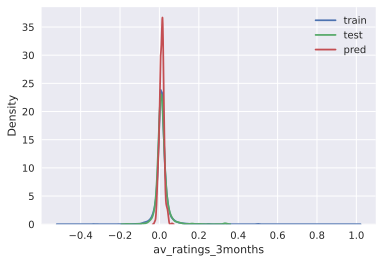

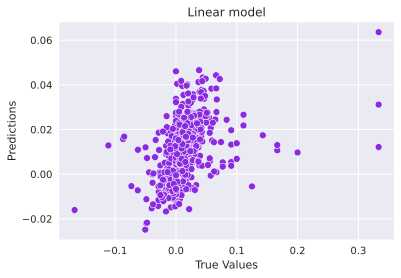

In [84]:
target_distr_linear(y_train, y_test, y_pred)   

In [85]:
cat_model.save_model('cat_reg_okko_ratings_ohe')

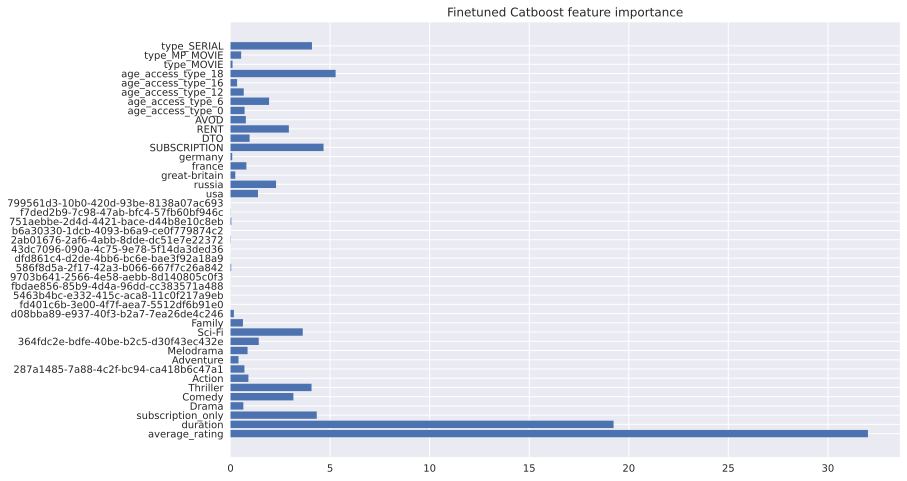

In [86]:
get_feature_imp(cat_model, train_dataset)

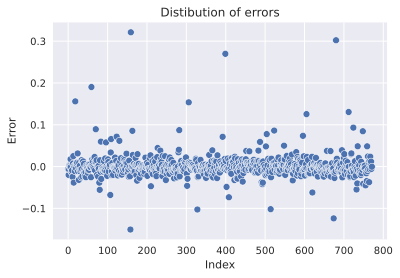

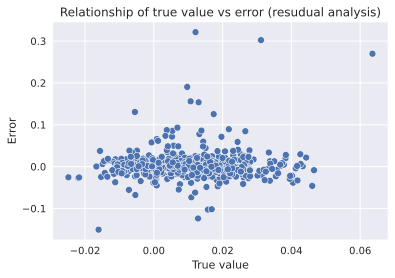

In [87]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

# Tuning

In [51]:
train_dataset = cat.Pool(X_train, 
                         y_train,
#                          cat_features=cat_features
                        )

test_dataset = cat.Pool(X_test, 
                        y_test,
#                         cat_features=cat_features
                       )

cat_params = {
    'loss_function': 'RMSE',
    'eval_metric': 'MAE',
    'verbose': True,
    'random_seed': 321,
    'allow_writing_files': False, 
#     'cat_features': cat_features
}

In [52]:
parameters_distr = {'depth': randint(3, 7),
              'learning_rate': uniform(0.01, 0.1),
              'iterations': [100, 1000, 5000]
             }

cat_model = cat.CatBoostRegressor(**cat_params)
grid = RandomizedSearchCV(estimator=cat_model, param_distributions=parameters_distr, 
                            cv=5, 
#                           n_jobs=-1,
                          verbose=3)

grid.fit(X_train, y_train)

import pickle
with open('bestimator_ratings_okko_tune', 'wb') as f:
    pickle.dump(grid.best_estimator_, f)
grid.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.0182923	total: 47.8ms	remaining: 47.8s
1:	learn: 0.0182375	total: 50ms	remaining: 24.9s
2:	learn: 0.0181810	total: 51.8ms	remaining: 17.2s
3:	learn: 0.0181322	total: 53.9ms	remaining: 13.4s
4:	learn: 0.0180771	total: 55.8ms	remaining: 11.1s
5:	learn: 0.0180269	total: 57.6ms	remaining: 9.54s
6:	learn: 0.0179758	total: 59.2ms	remaining: 8.4s
7:	learn: 0.0179242	total: 61ms	remaining: 7.56s
8:	learn: 0.0178727	total: 62.8ms	remaining: 6.92s
9:	learn: 0.0178279	total: 64.5ms	remaining: 6.39s
10:	learn: 0.0177843	total: 65.8ms	remaining: 5.91s
11:	learn: 0.0177414	total: 67.3ms	remaining: 5.54s
12:	learn: 0.0177046	total: 68.7ms	remaining: 5.22s
13:	learn: 0.0176653	total: 70.1ms	remaining: 4.93s
14:	learn: 0.0176279	total: 72.1ms	remaining: 4.74s
15:	learn: 0.0175887	total: 73.9ms	remaining: 4.54s
16:	learn: 0.0175528	total: 75.7ms	remaining: 4.38s
17:	learn: 0.0175255	total: 76.9ms	remaining: 4.2s
18:	learn: 0.017493

213:	learn: 0.0163297	total: 371ms	remaining: 1.36s
214:	learn: 0.0163290	total: 373ms	remaining: 1.36s
215:	learn: 0.0163285	total: 375ms	remaining: 1.36s
216:	learn: 0.0163259	total: 376ms	remaining: 1.36s
217:	learn: 0.0163265	total: 378ms	remaining: 1.35s
218:	learn: 0.0163252	total: 379ms	remaining: 1.35s
219:	learn: 0.0163228	total: 381ms	remaining: 1.35s
220:	learn: 0.0163219	total: 382ms	remaining: 1.34s
221:	learn: 0.0163230	total: 383ms	remaining: 1.34s
222:	learn: 0.0163218	total: 384ms	remaining: 1.34s
223:	learn: 0.0163207	total: 385ms	remaining: 1.33s
224:	learn: 0.0163191	total: 387ms	remaining: 1.33s
225:	learn: 0.0163176	total: 388ms	remaining: 1.33s
226:	learn: 0.0163173	total: 389ms	remaining: 1.32s
227:	learn: 0.0163159	total: 391ms	remaining: 1.32s
228:	learn: 0.0163148	total: 392ms	remaining: 1.32s
229:	learn: 0.0163146	total: 393ms	remaining: 1.31s
230:	learn: 0.0163134	total: 394ms	remaining: 1.31s
231:	learn: 0.0163137	total: 396ms	remaining: 1.31s
232:	learn: 

479:	learn: 0.0161764	total: 765ms	remaining: 829ms
480:	learn: 0.0161755	total: 767ms	remaining: 828ms
481:	learn: 0.0161737	total: 769ms	remaining: 826ms
482:	learn: 0.0161724	total: 770ms	remaining: 825ms
483:	learn: 0.0161725	total: 772ms	remaining: 823ms
484:	learn: 0.0161709	total: 773ms	remaining: 821ms
485:	learn: 0.0161696	total: 775ms	remaining: 820ms
486:	learn: 0.0161700	total: 777ms	remaining: 818ms
487:	learn: 0.0161687	total: 778ms	remaining: 816ms
488:	learn: 0.0161680	total: 780ms	remaining: 815ms
489:	learn: 0.0161677	total: 781ms	remaining: 813ms
490:	learn: 0.0161664	total: 783ms	remaining: 812ms
491:	learn: 0.0161648	total: 784ms	remaining: 810ms
492:	learn: 0.0161644	total: 786ms	remaining: 808ms
493:	learn: 0.0161643	total: 787ms	remaining: 806ms
494:	learn: 0.0161635	total: 789ms	remaining: 805ms
495:	learn: 0.0161634	total: 790ms	remaining: 803ms
496:	learn: 0.0161635	total: 792ms	remaining: 802ms
497:	learn: 0.0161636	total: 793ms	remaining: 800ms
498:	learn: 

743:	learn: 0.0160448	total: 1.16s	remaining: 399ms
744:	learn: 0.0160438	total: 1.16s	remaining: 398ms
745:	learn: 0.0160438	total: 1.16s	remaining: 396ms
746:	learn: 0.0160438	total: 1.17s	remaining: 395ms
747:	learn: 0.0160432	total: 1.17s	remaining: 393ms
748:	learn: 0.0160430	total: 1.17s	remaining: 392ms
749:	learn: 0.0160426	total: 1.17s	remaining: 390ms
750:	learn: 0.0160419	total: 1.17s	remaining: 388ms
751:	learn: 0.0160419	total: 1.17s	remaining: 387ms
752:	learn: 0.0160421	total: 1.17s	remaining: 385ms
753:	learn: 0.0160415	total: 1.18s	remaining: 384ms
754:	learn: 0.0160408	total: 1.18s	remaining: 382ms
755:	learn: 0.0160382	total: 1.18s	remaining: 380ms
756:	learn: 0.0160382	total: 1.18s	remaining: 379ms
757:	learn: 0.0160385	total: 1.18s	remaining: 377ms
758:	learn: 0.0160379	total: 1.18s	remaining: 376ms
759:	learn: 0.0160377	total: 1.18s	remaining: 374ms
760:	learn: 0.0160368	total: 1.19s	remaining: 372ms
761:	learn: 0.0160368	total: 1.19s	remaining: 371ms
762:	learn: 

0:	learn: 0.0192480	total: 1.4ms	remaining: 1.4s
1:	learn: 0.0191901	total: 2.93ms	remaining: 1.46s
2:	learn: 0.0191346	total: 4.19ms	remaining: 1.39s
3:	learn: 0.0190805	total: 5.67ms	remaining: 1.41s
4:	learn: 0.0190330	total: 7.27ms	remaining: 1.45s
5:	learn: 0.0189831	total: 8.91ms	remaining: 1.48s
6:	learn: 0.0189284	total: 10.4ms	remaining: 1.47s
7:	learn: 0.0188824	total: 12ms	remaining: 1.48s
8:	learn: 0.0188420	total: 13.2ms	remaining: 1.46s
9:	learn: 0.0188021	total: 14.7ms	remaining: 1.45s
10:	learn: 0.0187614	total: 16ms	remaining: 1.44s
11:	learn: 0.0187226	total: 17.4ms	remaining: 1.43s
12:	learn: 0.0186853	total: 18.8ms	remaining: 1.43s
13:	learn: 0.0186447	total: 20.2ms	remaining: 1.42s
14:	learn: 0.0186057	total: 21.7ms	remaining: 1.42s
15:	learn: 0.0185680	total: 23ms	remaining: 1.41s
16:	learn: 0.0185356	total: 24.5ms	remaining: 1.41s
17:	learn: 0.0185021	total: 25.8ms	remaining: 1.41s
18:	learn: 0.0184713	total: 27.5ms	remaining: 1.42s
19:	learn: 0.0184388	total: 28

274:	learn: 0.0172108	total: 395ms	remaining: 1.04s
275:	learn: 0.0172099	total: 397ms	remaining: 1.04s
276:	learn: 0.0172110	total: 398ms	remaining: 1.04s
277:	learn: 0.0172111	total: 400ms	remaining: 1.04s
278:	learn: 0.0172102	total: 401ms	remaining: 1.04s
279:	learn: 0.0172081	total: 402ms	remaining: 1.03s
280:	learn: 0.0172078	total: 404ms	remaining: 1.03s
281:	learn: 0.0172064	total: 405ms	remaining: 1.03s
282:	learn: 0.0172050	total: 407ms	remaining: 1.03s
283:	learn: 0.0172047	total: 408ms	remaining: 1.03s
284:	learn: 0.0172047	total: 410ms	remaining: 1.03s
285:	learn: 0.0172037	total: 411ms	remaining: 1.03s
286:	learn: 0.0172019	total: 413ms	remaining: 1.02s
287:	learn: 0.0172007	total: 414ms	remaining: 1.02s
288:	learn: 0.0172015	total: 415ms	remaining: 1.02s
289:	learn: 0.0172000	total: 417ms	remaining: 1.02s
290:	learn: 0.0171996	total: 418ms	remaining: 1.02s
291:	learn: 0.0171992	total: 419ms	remaining: 1.02s
292:	learn: 0.0171994	total: 421ms	remaining: 1.01s
293:	learn: 

545:	learn: 0.0170549	total: 789ms	remaining: 656ms
546:	learn: 0.0170555	total: 791ms	remaining: 655ms
547:	learn: 0.0170559	total: 793ms	remaining: 654ms
548:	learn: 0.0170560	total: 794ms	remaining: 652ms
549:	learn: 0.0170555	total: 796ms	remaining: 651ms
550:	learn: 0.0170553	total: 797ms	remaining: 650ms
551:	learn: 0.0170559	total: 798ms	remaining: 648ms
552:	learn: 0.0170553	total: 800ms	remaining: 647ms
553:	learn: 0.0170549	total: 801ms	remaining: 645ms
554:	learn: 0.0170555	total: 803ms	remaining: 644ms
555:	learn: 0.0170548	total: 804ms	remaining: 642ms
556:	learn: 0.0170541	total: 806ms	remaining: 641ms
557:	learn: 0.0170536	total: 807ms	remaining: 639ms
558:	learn: 0.0170535	total: 809ms	remaining: 638ms
559:	learn: 0.0170530	total: 810ms	remaining: 637ms
560:	learn: 0.0170534	total: 812ms	remaining: 635ms
561:	learn: 0.0170541	total: 813ms	remaining: 634ms
562:	learn: 0.0170541	total: 814ms	remaining: 632ms
563:	learn: 0.0170537	total: 816ms	remaining: 631ms
564:	learn: 

814:	learn: 0.0169558	total: 1.18s	remaining: 269ms
815:	learn: 0.0169547	total: 1.19s	remaining: 267ms
816:	learn: 0.0169533	total: 1.19s	remaining: 266ms
817:	learn: 0.0169519	total: 1.19s	remaining: 264ms
818:	learn: 0.0169512	total: 1.19s	remaining: 263ms
819:	learn: 0.0169499	total: 1.19s	remaining: 261ms
820:	learn: 0.0169495	total: 1.19s	remaining: 260ms
821:	learn: 0.0169502	total: 1.19s	remaining: 259ms
822:	learn: 0.0169488	total: 1.2s	remaining: 257ms
823:	learn: 0.0169476	total: 1.2s	remaining: 256ms
824:	learn: 0.0169463	total: 1.2s	remaining: 254ms
825:	learn: 0.0169459	total: 1.2s	remaining: 253ms
826:	learn: 0.0169455	total: 1.2s	remaining: 251ms
827:	learn: 0.0169453	total: 1.2s	remaining: 250ms
828:	learn: 0.0169449	total: 1.2s	remaining: 249ms
829:	learn: 0.0169436	total: 1.21s	remaining: 247ms
830:	learn: 0.0169431	total: 1.21s	remaining: 246ms
831:	learn: 0.0169426	total: 1.21s	remaining: 244ms
832:	learn: 0.0169419	total: 1.21s	remaining: 243ms
833:	learn: 0.01694

67:	learn: 0.0175310	total: 101ms	remaining: 1.39s
68:	learn: 0.0175245	total: 103ms	remaining: 1.39s
69:	learn: 0.0175143	total: 104ms	remaining: 1.39s
70:	learn: 0.0175035	total: 106ms	remaining: 1.39s
71:	learn: 0.0174967	total: 108ms	remaining: 1.39s
72:	learn: 0.0174864	total: 109ms	remaining: 1.39s
73:	learn: 0.0174773	total: 111ms	remaining: 1.39s
74:	learn: 0.0174692	total: 112ms	remaining: 1.39s
75:	learn: 0.0174618	total: 114ms	remaining: 1.39s
76:	learn: 0.0174528	total: 116ms	remaining: 1.38s
77:	learn: 0.0174448	total: 117ms	remaining: 1.38s
78:	learn: 0.0174405	total: 118ms	remaining: 1.38s
79:	learn: 0.0174326	total: 120ms	remaining: 1.38s
80:	learn: 0.0174284	total: 121ms	remaining: 1.38s
81:	learn: 0.0174215	total: 123ms	remaining: 1.37s
82:	learn: 0.0174145	total: 124ms	remaining: 1.37s
83:	learn: 0.0174076	total: 125ms	remaining: 1.37s
84:	learn: 0.0174044	total: 127ms	remaining: 1.37s
85:	learn: 0.0173975	total: 129ms	remaining: 1.37s
86:	learn: 0.0173929	total: 130

327:	learn: 0.0170918	total: 495ms	remaining: 1.01s
328:	learn: 0.0170922	total: 496ms	remaining: 1.01s
329:	learn: 0.0170922	total: 498ms	remaining: 1.01s
330:	learn: 0.0170908	total: 500ms	remaining: 1.01s
331:	learn: 0.0170909	total: 502ms	remaining: 1.01s
332:	learn: 0.0170901	total: 503ms	remaining: 1.01s
333:	learn: 0.0170891	total: 505ms	remaining: 1.01s
334:	learn: 0.0170892	total: 506ms	remaining: 1s
335:	learn: 0.0170895	total: 508ms	remaining: 1s
336:	learn: 0.0170891	total: 509ms	remaining: 1s
337:	learn: 0.0170885	total: 511ms	remaining: 1s
338:	learn: 0.0170879	total: 512ms	remaining: 999ms
339:	learn: 0.0170876	total: 514ms	remaining: 997ms
340:	learn: 0.0170884	total: 515ms	remaining: 995ms
341:	learn: 0.0170869	total: 516ms	remaining: 994ms
342:	learn: 0.0170850	total: 518ms	remaining: 992ms
343:	learn: 0.0170860	total: 520ms	remaining: 991ms
344:	learn: 0.0170852	total: 521ms	remaining: 989ms
345:	learn: 0.0170859	total: 523ms	remaining: 988ms
346:	learn: 0.0170857	to

593:	learn: 0.0169397	total: 887ms	remaining: 606ms
594:	learn: 0.0169392	total: 888ms	remaining: 605ms
595:	learn: 0.0169396	total: 890ms	remaining: 603ms
596:	learn: 0.0169384	total: 892ms	remaining: 602ms
597:	learn: 0.0169386	total: 893ms	remaining: 600ms
598:	learn: 0.0169376	total: 894ms	remaining: 599ms
599:	learn: 0.0169377	total: 896ms	remaining: 597ms
600:	learn: 0.0169364	total: 897ms	remaining: 595ms
601:	learn: 0.0169351	total: 898ms	remaining: 594ms
602:	learn: 0.0169349	total: 900ms	remaining: 592ms
603:	learn: 0.0169343	total: 901ms	remaining: 591ms
604:	learn: 0.0169335	total: 903ms	remaining: 589ms
605:	learn: 0.0169341	total: 904ms	remaining: 588ms
606:	learn: 0.0169328	total: 906ms	remaining: 586ms
607:	learn: 0.0169322	total: 907ms	remaining: 585ms
608:	learn: 0.0169322	total: 908ms	remaining: 583ms
609:	learn: 0.0169310	total: 910ms	remaining: 582ms
610:	learn: 0.0169293	total: 911ms	remaining: 580ms
611:	learn: 0.0169280	total: 913ms	remaining: 579ms
612:	learn: 

861:	learn: 0.0167356	total: 1.28s	remaining: 205ms
862:	learn: 0.0167345	total: 1.28s	remaining: 204ms
863:	learn: 0.0167346	total: 1.28s	remaining: 202ms
864:	learn: 0.0167345	total: 1.28s	remaining: 201ms
865:	learn: 0.0167343	total: 1.29s	remaining: 199ms
866:	learn: 0.0167342	total: 1.29s	remaining: 198ms
867:	learn: 0.0167338	total: 1.29s	remaining: 196ms
868:	learn: 0.0167351	total: 1.29s	remaining: 195ms
869:	learn: 0.0167344	total: 1.29s	remaining: 193ms
870:	learn: 0.0167343	total: 1.29s	remaining: 192ms
871:	learn: 0.0167340	total: 1.29s	remaining: 190ms
872:	learn: 0.0167337	total: 1.3s	remaining: 189ms
873:	learn: 0.0167320	total: 1.3s	remaining: 187ms
874:	learn: 0.0167316	total: 1.3s	remaining: 186ms
875:	learn: 0.0167315	total: 1.3s	remaining: 184ms
876:	learn: 0.0167306	total: 1.3s	remaining: 183ms
877:	learn: 0.0167296	total: 1.3s	remaining: 181ms
878:	learn: 0.0167288	total: 1.3s	remaining: 180ms
879:	learn: 0.0167272	total: 1.31s	remaining: 178ms
880:	learn: 0.01672

86:	learn: 0.0170688	total: 138ms	remaining: 1.45s
87:	learn: 0.0170619	total: 140ms	remaining: 1.45s
88:	learn: 0.0170567	total: 141ms	remaining: 1.45s
89:	learn: 0.0170533	total: 143ms	remaining: 1.44s
90:	learn: 0.0170474	total: 144ms	remaining: 1.44s
91:	learn: 0.0170434	total: 146ms	remaining: 1.44s
92:	learn: 0.0170398	total: 147ms	remaining: 1.44s
93:	learn: 0.0170342	total: 149ms	remaining: 1.43s
94:	learn: 0.0170305	total: 151ms	remaining: 1.43s
95:	learn: 0.0170255	total: 152ms	remaining: 1.43s
96:	learn: 0.0170211	total: 153ms	remaining: 1.43s
97:	learn: 0.0170172	total: 155ms	remaining: 1.43s
98:	learn: 0.0170119	total: 156ms	remaining: 1.42s
99:	learn: 0.0170101	total: 158ms	remaining: 1.42s
100:	learn: 0.0170066	total: 159ms	remaining: 1.42s
101:	learn: 0.0170028	total: 161ms	remaining: 1.42s
102:	learn: 0.0169981	total: 163ms	remaining: 1.42s
103:	learn: 0.0169965	total: 164ms	remaining: 1.41s
104:	learn: 0.0169962	total: 166ms	remaining: 1.41s
105:	learn: 0.0169953	tota

353:	learn: 0.0167961	total: 531ms	remaining: 968ms
354:	learn: 0.0167956	total: 532ms	remaining: 967ms
355:	learn: 0.0167960	total: 534ms	remaining: 965ms
356:	learn: 0.0167962	total: 535ms	remaining: 964ms
357:	learn: 0.0167971	total: 537ms	remaining: 962ms
358:	learn: 0.0167970	total: 538ms	remaining: 961ms
359:	learn: 0.0167972	total: 539ms	remaining: 959ms
360:	learn: 0.0167953	total: 541ms	remaining: 957ms
361:	learn: 0.0167932	total: 542ms	remaining: 956ms
362:	learn: 0.0167921	total: 544ms	remaining: 954ms
363:	learn: 0.0167910	total: 545ms	remaining: 952ms
364:	learn: 0.0167912	total: 547ms	remaining: 951ms
365:	learn: 0.0167931	total: 548ms	remaining: 949ms
366:	learn: 0.0167917	total: 549ms	remaining: 948ms
367:	learn: 0.0167919	total: 551ms	remaining: 946ms
368:	learn: 0.0167910	total: 552ms	remaining: 945ms
369:	learn: 0.0167902	total: 554ms	remaining: 943ms
370:	learn: 0.0167902	total: 556ms	remaining: 942ms
371:	learn: 0.0167883	total: 557ms	remaining: 941ms
372:	learn: 

620:	learn: 0.0166424	total: 925ms	remaining: 564ms
621:	learn: 0.0166413	total: 926ms	remaining: 563ms
622:	learn: 0.0166411	total: 928ms	remaining: 561ms
623:	learn: 0.0166410	total: 929ms	remaining: 560ms
624:	learn: 0.0166412	total: 931ms	remaining: 559ms
625:	learn: 0.0166409	total: 932ms	remaining: 557ms
626:	learn: 0.0166413	total: 934ms	remaining: 555ms
627:	learn: 0.0166402	total: 935ms	remaining: 554ms
628:	learn: 0.0166400	total: 936ms	remaining: 552ms
629:	learn: 0.0166396	total: 938ms	remaining: 551ms
630:	learn: 0.0166393	total: 939ms	remaining: 549ms
631:	learn: 0.0166380	total: 941ms	remaining: 548ms
632:	learn: 0.0166369	total: 942ms	remaining: 546ms
633:	learn: 0.0166368	total: 943ms	remaining: 545ms
634:	learn: 0.0166360	total: 945ms	remaining: 543ms
635:	learn: 0.0166358	total: 946ms	remaining: 541ms
636:	learn: 0.0166347	total: 947ms	remaining: 540ms
637:	learn: 0.0166337	total: 948ms	remaining: 538ms
638:	learn: 0.0166335	total: 950ms	remaining: 537ms
639:	learn: 

892:	learn: 0.0164817	total: 1.32s	remaining: 158ms
893:	learn: 0.0164810	total: 1.32s	remaining: 156ms
894:	learn: 0.0164808	total: 1.32s	remaining: 155ms
895:	learn: 0.0164792	total: 1.32s	remaining: 154ms
896:	learn: 0.0164794	total: 1.32s	remaining: 152ms
897:	learn: 0.0164793	total: 1.32s	remaining: 151ms
898:	learn: 0.0164783	total: 1.33s	remaining: 149ms
899:	learn: 0.0164782	total: 1.33s	remaining: 148ms
900:	learn: 0.0164775	total: 1.33s	remaining: 146ms
901:	learn: 0.0164768	total: 1.33s	remaining: 145ms
902:	learn: 0.0164767	total: 1.33s	remaining: 143ms
903:	learn: 0.0164760	total: 1.33s	remaining: 142ms
904:	learn: 0.0164750	total: 1.33s	remaining: 140ms
905:	learn: 0.0164750	total: 1.34s	remaining: 139ms
906:	learn: 0.0164746	total: 1.34s	remaining: 137ms
907:	learn: 0.0164736	total: 1.34s	remaining: 136ms
908:	learn: 0.0164729	total: 1.34s	remaining: 134ms
909:	learn: 0.0164723	total: 1.34s	remaining: 133ms
910:	learn: 0.0164718	total: 1.34s	remaining: 131ms
911:	learn: 

144:	learn: 0.0160378	total: 219ms	remaining: 1.29s
145:	learn: 0.0160350	total: 220ms	remaining: 1.29s
146:	learn: 0.0160334	total: 222ms	remaining: 1.29s
147:	learn: 0.0160325	total: 224ms	remaining: 1.29s
148:	learn: 0.0160314	total: 226ms	remaining: 1.29s
149:	learn: 0.0160295	total: 227ms	remaining: 1.29s
150:	learn: 0.0160298	total: 228ms	remaining: 1.28s
151:	learn: 0.0160299	total: 230ms	remaining: 1.28s
152:	learn: 0.0160301	total: 232ms	remaining: 1.28s
153:	learn: 0.0160285	total: 233ms	remaining: 1.28s
154:	learn: 0.0160266	total: 234ms	remaining: 1.28s
155:	learn: 0.0160256	total: 236ms	remaining: 1.27s
156:	learn: 0.0160239	total: 237ms	remaining: 1.27s
157:	learn: 0.0160238	total: 239ms	remaining: 1.27s
158:	learn: 0.0160236	total: 240ms	remaining: 1.27s
159:	learn: 0.0160228	total: 241ms	remaining: 1.27s
160:	learn: 0.0160223	total: 243ms	remaining: 1.26s
161:	learn: 0.0160195	total: 244ms	remaining: 1.26s
162:	learn: 0.0160199	total: 246ms	remaining: 1.26s
163:	learn: 

410:	learn: 0.0158198	total: 612ms	remaining: 877ms
411:	learn: 0.0158194	total: 613ms	remaining: 875ms
412:	learn: 0.0158186	total: 615ms	remaining: 874ms
413:	learn: 0.0158177	total: 616ms	remaining: 872ms
414:	learn: 0.0158186	total: 618ms	remaining: 871ms
415:	learn: 0.0158182	total: 619ms	remaining: 869ms
416:	learn: 0.0158175	total: 621ms	remaining: 868ms
417:	learn: 0.0158169	total: 622ms	remaining: 867ms
418:	learn: 0.0158170	total: 624ms	remaining: 865ms
419:	learn: 0.0158167	total: 626ms	remaining: 864ms
420:	learn: 0.0158147	total: 627ms	remaining: 862ms
421:	learn: 0.0158130	total: 629ms	remaining: 861ms
422:	learn: 0.0158101	total: 630ms	remaining: 860ms
423:	learn: 0.0158097	total: 631ms	remaining: 858ms
424:	learn: 0.0158094	total: 633ms	remaining: 856ms
425:	learn: 0.0158072	total: 634ms	remaining: 855ms
426:	learn: 0.0158067	total: 636ms	remaining: 853ms
427:	learn: 0.0158065	total: 637ms	remaining: 852ms
428:	learn: 0.0158074	total: 639ms	remaining: 850ms
429:	learn: 

678:	learn: 0.0156429	total: 1.01s	remaining: 476ms
679:	learn: 0.0156417	total: 1.01s	remaining: 474ms
680:	learn: 0.0156415	total: 1.01s	remaining: 473ms
681:	learn: 0.0156410	total: 1.01s	remaining: 471ms
682:	learn: 0.0156399	total: 1.01s	remaining: 470ms
683:	learn: 0.0156397	total: 1.01s	remaining: 468ms
684:	learn: 0.0156391	total: 1.01s	remaining: 467ms
685:	learn: 0.0156383	total: 1.02s	remaining: 465ms
686:	learn: 0.0156373	total: 1.02s	remaining: 464ms
687:	learn: 0.0156369	total: 1.02s	remaining: 462ms
688:	learn: 0.0156362	total: 1.02s	remaining: 461ms
689:	learn: 0.0156348	total: 1.02s	remaining: 459ms
690:	learn: 0.0156331	total: 1.02s	remaining: 458ms
691:	learn: 0.0156326	total: 1.02s	remaining: 456ms
692:	learn: 0.0156320	total: 1.03s	remaining: 455ms
693:	learn: 0.0156314	total: 1.03s	remaining: 454ms
694:	learn: 0.0156312	total: 1.03s	remaining: 452ms
695:	learn: 0.0156309	total: 1.03s	remaining: 451ms
696:	learn: 0.0156302	total: 1.03s	remaining: 449ms
697:	learn: 

942:	learn: 0.0154589	total: 1.4s	remaining: 84.5ms
943:	learn: 0.0154587	total: 1.4s	remaining: 83.1ms
944:	learn: 0.0154576	total: 1.4s	remaining: 81.6ms
945:	learn: 0.0154573	total: 1.4s	remaining: 80.1ms
946:	learn: 0.0154569	total: 1.41s	remaining: 78.6ms
947:	learn: 0.0154565	total: 1.41s	remaining: 77.1ms
948:	learn: 0.0154549	total: 1.41s	remaining: 75.6ms
949:	learn: 0.0154552	total: 1.41s	remaining: 74.2ms
950:	learn: 0.0154541	total: 1.41s	remaining: 72.7ms
951:	learn: 0.0154529	total: 1.41s	remaining: 71.2ms
952:	learn: 0.0154523	total: 1.41s	remaining: 69.7ms
953:	learn: 0.0154521	total: 1.41s	remaining: 68.2ms
954:	learn: 0.0154506	total: 1.42s	remaining: 66.7ms
955:	learn: 0.0154495	total: 1.42s	remaining: 65.3ms
956:	learn: 0.0154482	total: 1.42s	remaining: 63.8ms
957:	learn: 0.0154474	total: 1.42s	remaining: 62.3ms
958:	learn: 0.0154469	total: 1.42s	remaining: 60.8ms
959:	learn: 0.0154434	total: 1.42s	remaining: 59.3ms
960:	learn: 0.0154421	total: 1.43s	remaining: 57.9

158:	learn: 0.0158356	total: 291ms	remaining: 1.54s
159:	learn: 0.0158343	total: 293ms	remaining: 1.54s
160:	learn: 0.0158330	total: 294ms	remaining: 1.53s
161:	learn: 0.0158289	total: 296ms	remaining: 1.53s
162:	learn: 0.0158249	total: 298ms	remaining: 1.53s
163:	learn: 0.0158214	total: 300ms	remaining: 1.53s
164:	learn: 0.0158176	total: 302ms	remaining: 1.53s
165:	learn: 0.0158171	total: 304ms	remaining: 1.52s
166:	learn: 0.0158154	total: 305ms	remaining: 1.52s
167:	learn: 0.0158145	total: 307ms	remaining: 1.52s
168:	learn: 0.0158105	total: 310ms	remaining: 1.52s
169:	learn: 0.0158079	total: 311ms	remaining: 1.52s
170:	learn: 0.0157992	total: 313ms	remaining: 1.52s
171:	learn: 0.0157941	total: 315ms	remaining: 1.51s
172:	learn: 0.0157911	total: 317ms	remaining: 1.51s
173:	learn: 0.0157879	total: 318ms	remaining: 1.51s
174:	learn: 0.0157844	total: 320ms	remaining: 1.51s
175:	learn: 0.0157812	total: 322ms	remaining: 1.51s
176:	learn: 0.0157805	total: 324ms	remaining: 1.51s
177:	learn: 

361:	learn: 0.0153111	total: 686ms	remaining: 1.21s
362:	learn: 0.0153094	total: 688ms	remaining: 1.21s
363:	learn: 0.0153044	total: 689ms	remaining: 1.2s
364:	learn: 0.0153011	total: 691ms	remaining: 1.2s
365:	learn: 0.0153001	total: 693ms	remaining: 1.2s
366:	learn: 0.0152977	total: 695ms	remaining: 1.2s
367:	learn: 0.0152937	total: 697ms	remaining: 1.2s
368:	learn: 0.0152900	total: 700ms	remaining: 1.2s
369:	learn: 0.0152901	total: 702ms	remaining: 1.19s
370:	learn: 0.0152903	total: 704ms	remaining: 1.19s
371:	learn: 0.0152898	total: 705ms	remaining: 1.19s
372:	learn: 0.0152835	total: 707ms	remaining: 1.19s
373:	learn: 0.0152830	total: 709ms	remaining: 1.19s
374:	learn: 0.0152749	total: 711ms	remaining: 1.18s
375:	learn: 0.0152744	total: 713ms	remaining: 1.18s
376:	learn: 0.0152729	total: 715ms	remaining: 1.18s
377:	learn: 0.0152702	total: 717ms	remaining: 1.18s
378:	learn: 0.0152689	total: 720ms	remaining: 1.18s
379:	learn: 0.0152649	total: 723ms	remaining: 1.18s
380:	learn: 0.0152

560:	learn: 0.0148489	total: 1.08s	remaining: 846ms
561:	learn: 0.0148445	total: 1.08s	remaining: 845ms
562:	learn: 0.0148421	total: 1.09s	remaining: 843ms
563:	learn: 0.0148389	total: 1.09s	remaining: 841ms
564:	learn: 0.0148353	total: 1.09s	remaining: 839ms
565:	learn: 0.0148338	total: 1.09s	remaining: 837ms
566:	learn: 0.0148312	total: 1.09s	remaining: 835ms
567:	learn: 0.0148282	total: 1.09s	remaining: 833ms
568:	learn: 0.0148269	total: 1.1s	remaining: 833ms
569:	learn: 0.0148253	total: 1.1s	remaining: 830ms
570:	learn: 0.0148222	total: 1.1s	remaining: 829ms
571:	learn: 0.0148216	total: 1.1s	remaining: 826ms
572:	learn: 0.0148183	total: 1.11s	remaining: 824ms
573:	learn: 0.0148164	total: 1.11s	remaining: 824ms
574:	learn: 0.0148152	total: 1.11s	remaining: 822ms
575:	learn: 0.0148120	total: 1.11s	remaining: 821ms
576:	learn: 0.0148092	total: 1.12s	remaining: 819ms
577:	learn: 0.0148067	total: 1.12s	remaining: 817ms
578:	learn: 0.0148043	total: 1.12s	remaining: 816ms
579:	learn: 0.01

754:	learn: 0.0144393	total: 1.48s	remaining: 479ms
755:	learn: 0.0144377	total: 1.48s	remaining: 477ms
756:	learn: 0.0144369	total: 1.48s	remaining: 475ms
757:	learn: 0.0144350	total: 1.48s	remaining: 473ms
758:	learn: 0.0144327	total: 1.48s	remaining: 471ms
759:	learn: 0.0144289	total: 1.49s	remaining: 469ms
760:	learn: 0.0144270	total: 1.49s	remaining: 467ms
761:	learn: 0.0144256	total: 1.49s	remaining: 465ms
762:	learn: 0.0144241	total: 1.49s	remaining: 463ms
763:	learn: 0.0144228	total: 1.49s	remaining: 461ms
764:	learn: 0.0144226	total: 1.49s	remaining: 459ms
765:	learn: 0.0144195	total: 1.5s	remaining: 457ms
766:	learn: 0.0144139	total: 1.5s	remaining: 455ms
767:	learn: 0.0144141	total: 1.5s	remaining: 453ms
768:	learn: 0.0144126	total: 1.5s	remaining: 451ms
769:	learn: 0.0144098	total: 1.5s	remaining: 449ms
770:	learn: 0.0144086	total: 1.5s	remaining: 447ms
771:	learn: 0.0144066	total: 1.51s	remaining: 446ms
772:	learn: 0.0144051	total: 1.51s	remaining: 444ms
773:	learn: 0.0144

951:	learn: 0.0140868	total: 1.87s	remaining: 94.3ms
952:	learn: 0.0140836	total: 1.87s	remaining: 92.5ms
953:	learn: 0.0140818	total: 1.88s	remaining: 90.5ms
954:	learn: 0.0140799	total: 1.88s	remaining: 88.5ms
955:	learn: 0.0140784	total: 1.88s	remaining: 86.5ms
956:	learn: 0.0140778	total: 1.88s	remaining: 84.6ms
957:	learn: 0.0140763	total: 1.88s	remaining: 82.6ms
958:	learn: 0.0140754	total: 1.89s	remaining: 80.7ms
959:	learn: 0.0140735	total: 1.89s	remaining: 78.7ms
960:	learn: 0.0140697	total: 1.89s	remaining: 76.7ms
961:	learn: 0.0140686	total: 1.89s	remaining: 74.7ms
962:	learn: 0.0140670	total: 1.89s	remaining: 72.8ms
963:	learn: 0.0140663	total: 1.9s	remaining: 70.8ms
964:	learn: 0.0140652	total: 1.9s	remaining: 68.8ms
965:	learn: 0.0140633	total: 1.9s	remaining: 66.8ms
966:	learn: 0.0140619	total: 1.9s	remaining: 64.9ms
967:	learn: 0.0140598	total: 1.9s	remaining: 62.9ms
968:	learn: 0.0140587	total: 1.9s	remaining: 60.9ms
969:	learn: 0.0140572	total: 1.91s	remaining: 59ms
9

140:	learn: 0.0168734	total: 280ms	remaining: 1.7s
141:	learn: 0.0168706	total: 283ms	remaining: 1.71s
142:	learn: 0.0168643	total: 284ms	remaining: 1.7s
143:	learn: 0.0168595	total: 286ms	remaining: 1.7s
144:	learn: 0.0168561	total: 288ms	remaining: 1.7s
145:	learn: 0.0168551	total: 290ms	remaining: 1.7s
146:	learn: 0.0168516	total: 292ms	remaining: 1.69s
147:	learn: 0.0168494	total: 294ms	remaining: 1.69s
148:	learn: 0.0168499	total: 296ms	remaining: 1.69s
149:	learn: 0.0168490	total: 297ms	remaining: 1.69s
150:	learn: 0.0168451	total: 299ms	remaining: 1.68s
151:	learn: 0.0168410	total: 301ms	remaining: 1.68s
152:	learn: 0.0168350	total: 303ms	remaining: 1.68s
153:	learn: 0.0168308	total: 304ms	remaining: 1.67s
154:	learn: 0.0168256	total: 306ms	remaining: 1.67s
155:	learn: 0.0168223	total: 308ms	remaining: 1.67s
156:	learn: 0.0168196	total: 310ms	remaining: 1.66s
157:	learn: 0.0168148	total: 312ms	remaining: 1.66s
158:	learn: 0.0168121	total: 314ms	remaining: 1.66s
159:	learn: 0.016

354:	learn: 0.0162061	total: 675ms	remaining: 1.23s
355:	learn: 0.0162045	total: 677ms	remaining: 1.22s
356:	learn: 0.0162025	total: 679ms	remaining: 1.22s
357:	learn: 0.0162012	total: 681ms	remaining: 1.22s
358:	learn: 0.0161978	total: 682ms	remaining: 1.22s
359:	learn: 0.0161955	total: 684ms	remaining: 1.22s
360:	learn: 0.0161933	total: 686ms	remaining: 1.21s
361:	learn: 0.0161911	total: 688ms	remaining: 1.21s
362:	learn: 0.0161859	total: 690ms	remaining: 1.21s
363:	learn: 0.0161861	total: 691ms	remaining: 1.21s
364:	learn: 0.0161857	total: 693ms	remaining: 1.21s
365:	learn: 0.0161836	total: 695ms	remaining: 1.2s
366:	learn: 0.0161773	total: 697ms	remaining: 1.2s
367:	learn: 0.0161740	total: 699ms	remaining: 1.2s
368:	learn: 0.0161723	total: 701ms	remaining: 1.2s
369:	learn: 0.0161702	total: 703ms	remaining: 1.2s
370:	learn: 0.0161708	total: 705ms	remaining: 1.19s
371:	learn: 0.0161663	total: 707ms	remaining: 1.19s
372:	learn: 0.0161641	total: 709ms	remaining: 1.19s
373:	learn: 0.016

568:	learn: 0.0156603	total: 1.07s	remaining: 811ms
569:	learn: 0.0156589	total: 1.07s	remaining: 809ms
570:	learn: 0.0156548	total: 1.07s	remaining: 807ms
571:	learn: 0.0156515	total: 1.07s	remaining: 805ms
572:	learn: 0.0156508	total: 1.08s	remaining: 803ms
573:	learn: 0.0156476	total: 1.08s	remaining: 801ms
574:	learn: 0.0156464	total: 1.08s	remaining: 799ms
575:	learn: 0.0156437	total: 1.08s	remaining: 797ms
576:	learn: 0.0156412	total: 1.08s	remaining: 795ms
577:	learn: 0.0156410	total: 1.09s	remaining: 793ms
578:	learn: 0.0156407	total: 1.09s	remaining: 791ms
579:	learn: 0.0156379	total: 1.09s	remaining: 790ms
580:	learn: 0.0156363	total: 1.09s	remaining: 788ms
581:	learn: 0.0156361	total: 1.09s	remaining: 786ms
582:	learn: 0.0156342	total: 1.09s	remaining: 784ms
583:	learn: 0.0156310	total: 1.1s	remaining: 782ms
584:	learn: 0.0156300	total: 1.1s	remaining: 780ms
585:	learn: 0.0156287	total: 1.1s	remaining: 778ms
586:	learn: 0.0156253	total: 1.1s	remaining: 776ms
587:	learn: 0.01

786:	learn: 0.0152266	total: 1.46s	remaining: 396ms
787:	learn: 0.0152258	total: 1.47s	remaining: 395ms
788:	learn: 0.0152237	total: 1.47s	remaining: 393ms
789:	learn: 0.0152245	total: 1.47s	remaining: 391ms
790:	learn: 0.0152240	total: 1.47s	remaining: 389ms
791:	learn: 0.0152225	total: 1.47s	remaining: 387ms
792:	learn: 0.0152231	total: 1.48s	remaining: 385ms
793:	learn: 0.0152214	total: 1.48s	remaining: 383ms
794:	learn: 0.0152201	total: 1.48s	remaining: 382ms
795:	learn: 0.0152180	total: 1.48s	remaining: 380ms
796:	learn: 0.0152127	total: 1.48s	remaining: 378ms
797:	learn: 0.0152105	total: 1.49s	remaining: 376ms
798:	learn: 0.0152077	total: 1.49s	remaining: 374ms
799:	learn: 0.0152068	total: 1.49s	remaining: 372ms
800:	learn: 0.0152055	total: 1.49s	remaining: 370ms
801:	learn: 0.0152038	total: 1.49s	remaining: 369ms
802:	learn: 0.0152029	total: 1.49s	remaining: 367ms
803:	learn: 0.0152017	total: 1.5s	remaining: 365ms
804:	learn: 0.0151991	total: 1.5s	remaining: 363ms
805:	learn: 0.

[CV 2/5] END depth=5, iterations=1000, learning_rate=0.06966595075719871;, score=0.068 total time=   1.9s
0:	learn: 0.0190615	total: 2.07ms	remaining: 2.07s
1:	learn: 0.0188410	total: 4.04ms	remaining: 2.02s
2:	learn: 0.0186725	total: 5.97ms	remaining: 1.98s
3:	learn: 0.0185167	total: 7.82ms	remaining: 1.95s
4:	learn: 0.0183648	total: 9.62ms	remaining: 1.92s
5:	learn: 0.0182374	total: 11.5ms	remaining: 1.91s
6:	learn: 0.0181030	total: 13.5ms	remaining: 1.91s
7:	learn: 0.0180262	total: 15.2ms	remaining: 1.89s
8:	learn: 0.0179205	total: 17.1ms	remaining: 1.88s
9:	learn: 0.0178201	total: 18.8ms	remaining: 1.86s
10:	learn: 0.0177250	total: 21ms	remaining: 1.89s
11:	learn: 0.0176703	total: 22.7ms	remaining: 1.87s
12:	learn: 0.0176154	total: 24.4ms	remaining: 1.86s
13:	learn: 0.0175434	total: 26.4ms	remaining: 1.86s
14:	learn: 0.0175030	total: 28.1ms	remaining: 1.85s
15:	learn: 0.0174630	total: 29.9ms	remaining: 1.83s
16:	learn: 0.0174168	total: 31.7ms	remaining: 1.83s
17:	learn: 0.0173822	t

211:	learn: 0.0165522	total: 387ms	remaining: 1.44s
212:	learn: 0.0165489	total: 389ms	remaining: 1.44s
213:	learn: 0.0165468	total: 391ms	remaining: 1.43s
214:	learn: 0.0165435	total: 393ms	remaining: 1.43s
215:	learn: 0.0165371	total: 394ms	remaining: 1.43s
216:	learn: 0.0165384	total: 396ms	remaining: 1.43s
217:	learn: 0.0165342	total: 398ms	remaining: 1.43s
218:	learn: 0.0165309	total: 399ms	remaining: 1.42s
219:	learn: 0.0165280	total: 401ms	remaining: 1.42s
220:	learn: 0.0165267	total: 403ms	remaining: 1.42s
221:	learn: 0.0165233	total: 405ms	remaining: 1.42s
222:	learn: 0.0165212	total: 406ms	remaining: 1.42s
223:	learn: 0.0165180	total: 408ms	remaining: 1.41s
224:	learn: 0.0165156	total: 410ms	remaining: 1.41s
225:	learn: 0.0165150	total: 412ms	remaining: 1.41s
226:	learn: 0.0165123	total: 413ms	remaining: 1.41s
227:	learn: 0.0165105	total: 415ms	remaining: 1.41s
228:	learn: 0.0165092	total: 417ms	remaining: 1.4s
229:	learn: 0.0164989	total: 419ms	remaining: 1.4s
230:	learn: 0.

430:	learn: 0.0159101	total: 782ms	remaining: 1.03s
431:	learn: 0.0159064	total: 783ms	remaining: 1.03s
432:	learn: 0.0159042	total: 785ms	remaining: 1.03s
433:	learn: 0.0159039	total: 787ms	remaining: 1.03s
434:	learn: 0.0158992	total: 789ms	remaining: 1.02s
435:	learn: 0.0158989	total: 790ms	remaining: 1.02s
436:	learn: 0.0158973	total: 792ms	remaining: 1.02s
437:	learn: 0.0158937	total: 794ms	remaining: 1.02s
438:	learn: 0.0158918	total: 796ms	remaining: 1.02s
439:	learn: 0.0158906	total: 798ms	remaining: 1.01s
440:	learn: 0.0158902	total: 799ms	remaining: 1.01s
441:	learn: 0.0158878	total: 801ms	remaining: 1.01s
442:	learn: 0.0158848	total: 803ms	remaining: 1.01s
443:	learn: 0.0158818	total: 805ms	remaining: 1.01s
444:	learn: 0.0158805	total: 807ms	remaining: 1.01s
445:	learn: 0.0158772	total: 809ms	remaining: 1s
446:	learn: 0.0158762	total: 810ms	remaining: 1s
447:	learn: 0.0158733	total: 812ms	remaining: 1s
448:	learn: 0.0158727	total: 814ms	remaining: 999ms
449:	learn: 0.0158719

652:	learn: 0.0153839	total: 1.18s	remaining: 625ms
653:	learn: 0.0153820	total: 1.18s	remaining: 623ms
654:	learn: 0.0153773	total: 1.18s	remaining: 622ms
655:	learn: 0.0153753	total: 1.18s	remaining: 620ms
656:	learn: 0.0153714	total: 1.18s	remaining: 618ms
657:	learn: 0.0153700	total: 1.19s	remaining: 616ms
658:	learn: 0.0153673	total: 1.19s	remaining: 614ms
659:	learn: 0.0153666	total: 1.19s	remaining: 613ms
660:	learn: 0.0153655	total: 1.19s	remaining: 611ms
661:	learn: 0.0153631	total: 1.19s	remaining: 609ms
662:	learn: 0.0153602	total: 1.19s	remaining: 607ms
663:	learn: 0.0153586	total: 1.2s	remaining: 605ms
664:	learn: 0.0153570	total: 1.2s	remaining: 604ms
665:	learn: 0.0153571	total: 1.2s	remaining: 602ms
666:	learn: 0.0153553	total: 1.2s	remaining: 600ms
667:	learn: 0.0153484	total: 1.2s	remaining: 598ms
668:	learn: 0.0153463	total: 1.21s	remaining: 597ms
669:	learn: 0.0153442	total: 1.21s	remaining: 595ms
670:	learn: 0.0153438	total: 1.21s	remaining: 593ms
671:	learn: 0.015

861:	learn: 0.0149633	total: 1.57s	remaining: 251ms
862:	learn: 0.0149631	total: 1.57s	remaining: 249ms
863:	learn: 0.0149611	total: 1.57s	remaining: 248ms
864:	learn: 0.0149595	total: 1.57s	remaining: 246ms
865:	learn: 0.0149550	total: 1.57s	remaining: 244ms
866:	learn: 0.0149535	total: 1.58s	remaining: 242ms
867:	learn: 0.0149531	total: 1.58s	remaining: 240ms
868:	learn: 0.0149522	total: 1.58s	remaining: 238ms
869:	learn: 0.0149513	total: 1.58s	remaining: 237ms
870:	learn: 0.0149493	total: 1.58s	remaining: 235ms
871:	learn: 0.0149483	total: 1.59s	remaining: 233ms
872:	learn: 0.0149489	total: 1.59s	remaining: 231ms
873:	learn: 0.0149462	total: 1.59s	remaining: 229ms
874:	learn: 0.0149439	total: 1.59s	remaining: 228ms
875:	learn: 0.0149438	total: 1.59s	remaining: 226ms
876:	learn: 0.0149389	total: 1.6s	remaining: 224ms
877:	learn: 0.0149387	total: 1.6s	remaining: 222ms
878:	learn: 0.0149365	total: 1.6s	remaining: 220ms
879:	learn: 0.0149352	total: 1.6s	remaining: 218ms
880:	learn: 0.01

61:	learn: 0.0167762	total: 117ms	remaining: 1.77s
62:	learn: 0.0167730	total: 119ms	remaining: 1.77s
63:	learn: 0.0167656	total: 121ms	remaining: 1.77s
64:	learn: 0.0167591	total: 123ms	remaining: 1.76s
65:	learn: 0.0167553	total: 124ms	remaining: 1.76s
66:	learn: 0.0167431	total: 126ms	remaining: 1.76s
67:	learn: 0.0167420	total: 128ms	remaining: 1.76s
68:	learn: 0.0167406	total: 130ms	remaining: 1.76s
69:	learn: 0.0167407	total: 132ms	remaining: 1.75s
70:	learn: 0.0167398	total: 134ms	remaining: 1.75s
71:	learn: 0.0167349	total: 136ms	remaining: 1.75s
72:	learn: 0.0167353	total: 137ms	remaining: 1.74s
73:	learn: 0.0167263	total: 139ms	remaining: 1.74s
74:	learn: 0.0167282	total: 141ms	remaining: 1.74s
75:	learn: 0.0167217	total: 143ms	remaining: 1.74s
76:	learn: 0.0167148	total: 144ms	remaining: 1.73s
77:	learn: 0.0167068	total: 146ms	remaining: 1.73s
78:	learn: 0.0167033	total: 148ms	remaining: 1.72s
79:	learn: 0.0167009	total: 150ms	remaining: 1.72s
80:	learn: 0.0166940	total: 151

278:	learn: 0.0161186	total: 511ms	remaining: 1.32s
279:	learn: 0.0161205	total: 512ms	remaining: 1.32s
280:	learn: 0.0161195	total: 514ms	remaining: 1.31s
281:	learn: 0.0161176	total: 516ms	remaining: 1.31s
282:	learn: 0.0161144	total: 518ms	remaining: 1.31s
283:	learn: 0.0161081	total: 519ms	remaining: 1.31s
284:	learn: 0.0161022	total: 521ms	remaining: 1.31s
285:	learn: 0.0161005	total: 523ms	remaining: 1.3s
286:	learn: 0.0160984	total: 524ms	remaining: 1.3s
287:	learn: 0.0160915	total: 526ms	remaining: 1.3s
288:	learn: 0.0160835	total: 528ms	remaining: 1.3s
289:	learn: 0.0160798	total: 530ms	remaining: 1.3s
290:	learn: 0.0160779	total: 532ms	remaining: 1.29s
291:	learn: 0.0160770	total: 533ms	remaining: 1.29s
292:	learn: 0.0160723	total: 535ms	remaining: 1.29s
293:	learn: 0.0160686	total: 537ms	remaining: 1.29s
294:	learn: 0.0160676	total: 539ms	remaining: 1.29s
295:	learn: 0.0160698	total: 541ms	remaining: 1.28s
296:	learn: 0.0160658	total: 542ms	remaining: 1.28s
297:	learn: 0.016

492:	learn: 0.0155611	total: 906ms	remaining: 932ms
493:	learn: 0.0155590	total: 908ms	remaining: 930ms
494:	learn: 0.0155572	total: 910ms	remaining: 928ms
495:	learn: 0.0155528	total: 912ms	remaining: 926ms
496:	learn: 0.0155511	total: 913ms	remaining: 924ms
497:	learn: 0.0155477	total: 915ms	remaining: 923ms
498:	learn: 0.0155460	total: 917ms	remaining: 921ms
499:	learn: 0.0155442	total: 919ms	remaining: 919ms
500:	learn: 0.0155421	total: 921ms	remaining: 917ms
501:	learn: 0.0155398	total: 922ms	remaining: 915ms
502:	learn: 0.0155382	total: 924ms	remaining: 913ms
503:	learn: 0.0155365	total: 926ms	remaining: 911ms
504:	learn: 0.0155348	total: 928ms	remaining: 909ms
505:	learn: 0.0155311	total: 929ms	remaining: 907ms
506:	learn: 0.0155269	total: 931ms	remaining: 905ms
507:	learn: 0.0155253	total: 933ms	remaining: 903ms
508:	learn: 0.0155214	total: 934ms	remaining: 901ms
509:	learn: 0.0155215	total: 936ms	remaining: 899ms
510:	learn: 0.0155204	total: 938ms	remaining: 898ms
511:	learn: 

704:	learn: 0.0151071	total: 1.3s	remaining: 545ms
705:	learn: 0.0151058	total: 1.3s	remaining: 543ms
706:	learn: 0.0151047	total: 1.3s	remaining: 541ms
707:	learn: 0.0151022	total: 1.31s	remaining: 539ms
708:	learn: 0.0151011	total: 1.31s	remaining: 537ms
709:	learn: 0.0150998	total: 1.31s	remaining: 535ms
710:	learn: 0.0150950	total: 1.31s	remaining: 533ms
711:	learn: 0.0150920	total: 1.31s	remaining: 532ms
712:	learn: 0.0150882	total: 1.32s	remaining: 530ms
713:	learn: 0.0150840	total: 1.32s	remaining: 528ms
714:	learn: 0.0150825	total: 1.32s	remaining: 526ms
715:	learn: 0.0150787	total: 1.32s	remaining: 524ms
716:	learn: 0.0150773	total: 1.32s	remaining: 523ms
717:	learn: 0.0150769	total: 1.32s	remaining: 521ms
718:	learn: 0.0150755	total: 1.33s	remaining: 519ms
719:	learn: 0.0150736	total: 1.33s	remaining: 517ms
720:	learn: 0.0150714	total: 1.33s	remaining: 515ms
721:	learn: 0.0150697	total: 1.33s	remaining: 513ms
722:	learn: 0.0150729	total: 1.33s	remaining: 511ms
723:	learn: 0.0

912:	learn: 0.0147440	total: 1.7s	remaining: 162ms
913:	learn: 0.0147392	total: 1.7s	remaining: 160ms
914:	learn: 0.0147379	total: 1.7s	remaining: 158ms
915:	learn: 0.0147367	total: 1.7s	remaining: 156ms
916:	learn: 0.0147357	total: 1.7s	remaining: 154ms
917:	learn: 0.0147323	total: 1.7s	remaining: 152ms
918:	learn: 0.0147294	total: 1.71s	remaining: 150ms
919:	learn: 0.0147285	total: 1.71s	remaining: 149ms
920:	learn: 0.0147256	total: 1.71s	remaining: 147ms
921:	learn: 0.0147230	total: 1.71s	remaining: 145ms
922:	learn: 0.0147199	total: 1.71s	remaining: 143ms
923:	learn: 0.0147199	total: 1.72s	remaining: 141ms
924:	learn: 0.0147180	total: 1.72s	remaining: 139ms
925:	learn: 0.0147169	total: 1.72s	remaining: 137ms
926:	learn: 0.0147149	total: 1.72s	remaining: 136ms
927:	learn: 0.0147120	total: 1.72s	remaining: 134ms
928:	learn: 0.0147062	total: 1.72s	remaining: 132ms
929:	learn: 0.0147052	total: 1.73s	remaining: 130ms
930:	learn: 0.0147036	total: 1.73s	remaining: 128ms
931:	learn: 0.0147

107:	learn: 0.0156234	total: 207ms	remaining: 1.71s
108:	learn: 0.0156191	total: 209ms	remaining: 1.71s
109:	learn: 0.0156116	total: 211ms	remaining: 1.7s
110:	learn: 0.0156022	total: 212ms	remaining: 1.7s
111:	learn: 0.0155988	total: 214ms	remaining: 1.7s
112:	learn: 0.0155977	total: 216ms	remaining: 1.7s
113:	learn: 0.0155948	total: 218ms	remaining: 1.69s
114:	learn: 0.0155934	total: 219ms	remaining: 1.69s
115:	learn: 0.0155904	total: 221ms	remaining: 1.68s
116:	learn: 0.0155911	total: 223ms	remaining: 1.68s
117:	learn: 0.0155921	total: 225ms	remaining: 1.68s
118:	learn: 0.0155925	total: 227ms	remaining: 1.68s
119:	learn: 0.0155875	total: 228ms	remaining: 1.68s
120:	learn: 0.0155860	total: 230ms	remaining: 1.67s
121:	learn: 0.0155821	total: 232ms	remaining: 1.67s
122:	learn: 0.0155751	total: 234ms	remaining: 1.67s
123:	learn: 0.0155716	total: 236ms	remaining: 1.67s
124:	learn: 0.0155685	total: 238ms	remaining: 1.66s
125:	learn: 0.0155671	total: 240ms	remaining: 1.66s
126:	learn: 0.01

323:	learn: 0.0149205	total: 602ms	remaining: 1.25s
324:	learn: 0.0149175	total: 604ms	remaining: 1.25s
325:	learn: 0.0149133	total: 606ms	remaining: 1.25s
326:	learn: 0.0149076	total: 607ms	remaining: 1.25s
327:	learn: 0.0149042	total: 609ms	remaining: 1.25s
328:	learn: 0.0149014	total: 611ms	remaining: 1.25s
329:	learn: 0.0148991	total: 613ms	remaining: 1.24s
330:	learn: 0.0148972	total: 615ms	remaining: 1.24s
331:	learn: 0.0148943	total: 617ms	remaining: 1.24s
332:	learn: 0.0148941	total: 619ms	remaining: 1.24s
333:	learn: 0.0148907	total: 621ms	remaining: 1.24s
334:	learn: 0.0148874	total: 622ms	remaining: 1.24s
335:	learn: 0.0148831	total: 625ms	remaining: 1.24s
336:	learn: 0.0148805	total: 627ms	remaining: 1.23s
337:	learn: 0.0148767	total: 629ms	remaining: 1.23s
338:	learn: 0.0148773	total: 630ms	remaining: 1.23s
339:	learn: 0.0148752	total: 632ms	remaining: 1.23s
340:	learn: 0.0148706	total: 634ms	remaining: 1.22s
341:	learn: 0.0148654	total: 636ms	remaining: 1.22s
342:	learn: 

534:	learn: 0.0144170	total: 997ms	remaining: 866ms
535:	learn: 0.0144137	total: 999ms	remaining: 865ms
536:	learn: 0.0144103	total: 1s	remaining: 863ms
537:	learn: 0.0144102	total: 1s	remaining: 861ms
538:	learn: 0.0144078	total: 1s	remaining: 859ms
539:	learn: 0.0144077	total: 1s	remaining: 857ms
540:	learn: 0.0144055	total: 1.01s	remaining: 855ms
541:	learn: 0.0144046	total: 1.01s	remaining: 853ms
542:	learn: 0.0144006	total: 1.01s	remaining: 851ms
543:	learn: 0.0143971	total: 1.01s	remaining: 849ms
544:	learn: 0.0143948	total: 1.01s	remaining: 847ms
545:	learn: 0.0143937	total: 1.02s	remaining: 846ms
546:	learn: 0.0143905	total: 1.02s	remaining: 844ms
547:	learn: 0.0143890	total: 1.02s	remaining: 842ms
548:	learn: 0.0143880	total: 1.02s	remaining: 840ms
549:	learn: 0.0143866	total: 1.02s	remaining: 838ms
550:	learn: 0.0143865	total: 1.02s	remaining: 836ms
551:	learn: 0.0143839	total: 1.03s	remaining: 834ms
552:	learn: 0.0143839	total: 1.03s	remaining: 832ms
553:	learn: 0.0143825	to

753:	learn: 0.0139994	total: 1.39s	remaining: 454ms
754:	learn: 0.0139954	total: 1.39s	remaining: 452ms
755:	learn: 0.0139920	total: 1.39s	remaining: 450ms
756:	learn: 0.0139916	total: 1.4s	remaining: 448ms
757:	learn: 0.0139901	total: 1.4s	remaining: 446ms
758:	learn: 0.0139892	total: 1.4s	remaining: 444ms
759:	learn: 0.0139822	total: 1.4s	remaining: 443ms
760:	learn: 0.0139787	total: 1.4s	remaining: 441ms
761:	learn: 0.0139764	total: 1.41s	remaining: 439ms
762:	learn: 0.0139745	total: 1.41s	remaining: 437ms
763:	learn: 0.0139712	total: 1.41s	remaining: 435ms
764:	learn: 0.0139672	total: 1.41s	remaining: 433ms
765:	learn: 0.0139661	total: 1.41s	remaining: 432ms
766:	learn: 0.0139639	total: 1.41s	remaining: 430ms
767:	learn: 0.0139632	total: 1.42s	remaining: 428ms
768:	learn: 0.0139609	total: 1.42s	remaining: 426ms
769:	learn: 0.0139594	total: 1.42s	remaining: 424ms
770:	learn: 0.0139563	total: 1.42s	remaining: 422ms
771:	learn: 0.0139537	total: 1.42s	remaining: 420ms
772:	learn: 0.013

973:	learn: 0.0135994	total: 1.78s	remaining: 47.7ms
974:	learn: 0.0135962	total: 1.79s	remaining: 45.8ms
975:	learn: 0.0135928	total: 1.79s	remaining: 44ms
976:	learn: 0.0135910	total: 1.79s	remaining: 42.2ms
977:	learn: 0.0135883	total: 1.79s	remaining: 40.3ms
978:	learn: 0.0135872	total: 1.79s	remaining: 38.5ms
979:	learn: 0.0135852	total: 1.8s	remaining: 36.7ms
980:	learn: 0.0135830	total: 1.8s	remaining: 34.8ms
981:	learn: 0.0135814	total: 1.8s	remaining: 33ms
982:	learn: 0.0135799	total: 1.8s	remaining: 31.2ms
983:	learn: 0.0135758	total: 1.8s	remaining: 29.3ms
984:	learn: 0.0135739	total: 1.8s	remaining: 27.5ms
985:	learn: 0.0135713	total: 1.81s	remaining: 25.7ms
986:	learn: 0.0135678	total: 1.81s	remaining: 23.8ms
987:	learn: 0.0135657	total: 1.81s	remaining: 22ms
988:	learn: 0.0135648	total: 1.81s	remaining: 20.2ms
989:	learn: 0.0135621	total: 1.81s	remaining: 18.3ms
990:	learn: 0.0135596	total: 1.82s	remaining: 16.5ms
991:	learn: 0.0135582	total: 1.82s	remaining: 14.7ms
992:	

178:	learn: 0.0155964	total: 323ms	remaining: 1.48s
179:	learn: 0.0155965	total: 325ms	remaining: 1.48s
180:	learn: 0.0155950	total: 326ms	remaining: 1.48s
181:	learn: 0.0155903	total: 328ms	remaining: 1.47s
182:	learn: 0.0155902	total: 330ms	remaining: 1.47s
183:	learn: 0.0155881	total: 331ms	remaining: 1.47s
184:	learn: 0.0155872	total: 333ms	remaining: 1.47s
185:	learn: 0.0155871	total: 335ms	remaining: 1.47s
186:	learn: 0.0155863	total: 337ms	remaining: 1.46s
187:	learn: 0.0155831	total: 338ms	remaining: 1.46s
188:	learn: 0.0155811	total: 340ms	remaining: 1.46s
189:	learn: 0.0155752	total: 342ms	remaining: 1.46s
190:	learn: 0.0155620	total: 344ms	remaining: 1.46s
191:	learn: 0.0155577	total: 347ms	remaining: 1.46s
192:	learn: 0.0155530	total: 348ms	remaining: 1.46s
193:	learn: 0.0155511	total: 350ms	remaining: 1.45s
194:	learn: 0.0155489	total: 352ms	remaining: 1.45s
195:	learn: 0.0155416	total: 354ms	remaining: 1.45s
196:	learn: 0.0155412	total: 355ms	remaining: 1.45s
197:	learn: 

395:	learn: 0.0147592	total: 717ms	remaining: 1.09s
396:	learn: 0.0147552	total: 719ms	remaining: 1.09s
397:	learn: 0.0147524	total: 721ms	remaining: 1.09s
398:	learn: 0.0147506	total: 723ms	remaining: 1.09s
399:	learn: 0.0147482	total: 724ms	remaining: 1.09s
400:	learn: 0.0147459	total: 726ms	remaining: 1.08s
401:	learn: 0.0147447	total: 728ms	remaining: 1.08s
402:	learn: 0.0147436	total: 730ms	remaining: 1.08s
403:	learn: 0.0147431	total: 732ms	remaining: 1.08s
404:	learn: 0.0147407	total: 734ms	remaining: 1.08s
405:	learn: 0.0147362	total: 736ms	remaining: 1.08s
406:	learn: 0.0147351	total: 737ms	remaining: 1.07s
407:	learn: 0.0147296	total: 739ms	remaining: 1.07s
408:	learn: 0.0147287	total: 741ms	remaining: 1.07s
409:	learn: 0.0147251	total: 743ms	remaining: 1.07s
410:	learn: 0.0147224	total: 745ms	remaining: 1.07s
411:	learn: 0.0147198	total: 746ms	remaining: 1.06s
412:	learn: 0.0147176	total: 748ms	remaining: 1.06s
413:	learn: 0.0147171	total: 750ms	remaining: 1.06s
414:	learn: 

612:	learn: 0.0141594	total: 1.11s	remaining: 704ms
613:	learn: 0.0141587	total: 1.12s	remaining: 704ms
614:	learn: 0.0141566	total: 1.12s	remaining: 703ms
615:	learn: 0.0141581	total: 1.13s	remaining: 702ms
616:	learn: 0.0141555	total: 1.13s	remaining: 700ms
617:	learn: 0.0141525	total: 1.13s	remaining: 699ms
618:	learn: 0.0141507	total: 1.13s	remaining: 697ms
619:	learn: 0.0141485	total: 1.14s	remaining: 696ms
620:	learn: 0.0141450	total: 1.14s	remaining: 694ms
621:	learn: 0.0141373	total: 1.14s	remaining: 693ms
622:	learn: 0.0141357	total: 1.14s	remaining: 691ms
623:	learn: 0.0141301	total: 1.14s	remaining: 689ms
624:	learn: 0.0141280	total: 1.15s	remaining: 688ms
625:	learn: 0.0141243	total: 1.15s	remaining: 686ms
626:	learn: 0.0141232	total: 1.15s	remaining: 685ms
627:	learn: 0.0141217	total: 1.15s	remaining: 683ms
628:	learn: 0.0141193	total: 1.16s	remaining: 681ms
629:	learn: 0.0141121	total: 1.16s	remaining: 679ms
630:	learn: 0.0141067	total: 1.16s	remaining: 678ms
631:	learn: 

824:	learn: 0.0136534	total: 1.51s	remaining: 321ms
825:	learn: 0.0136527	total: 1.51s	remaining: 319ms
826:	learn: 0.0136510	total: 1.51s	remaining: 317ms
827:	learn: 0.0136480	total: 1.52s	remaining: 315ms
828:	learn: 0.0136442	total: 1.52s	remaining: 313ms
829:	learn: 0.0136426	total: 1.52s	remaining: 311ms
830:	learn: 0.0136411	total: 1.52s	remaining: 310ms
831:	learn: 0.0136401	total: 1.52s	remaining: 308ms
832:	learn: 0.0136388	total: 1.53s	remaining: 306ms
833:	learn: 0.0136373	total: 1.53s	remaining: 304ms
834:	learn: 0.0136348	total: 1.53s	remaining: 302ms
835:	learn: 0.0136328	total: 1.53s	remaining: 300ms
836:	learn: 0.0136306	total: 1.53s	remaining: 299ms
837:	learn: 0.0136287	total: 1.53s	remaining: 297ms
838:	learn: 0.0136261	total: 1.54s	remaining: 295ms
839:	learn: 0.0136218	total: 1.54s	remaining: 293ms
840:	learn: 0.0136197	total: 1.54s	remaining: 291ms
841:	learn: 0.0136189	total: 1.54s	remaining: 290ms
842:	learn: 0.0136164	total: 1.54s	remaining: 288ms
843:	learn: 

18:	learn: 0.0172956	total: 38.4ms	remaining: 1.98s
19:	learn: 0.0172749	total: 40.4ms	remaining: 1.98s
20:	learn: 0.0172528	total: 42.2ms	remaining: 1.97s
21:	learn: 0.0172477	total: 44ms	remaining: 1.95s
22:	learn: 0.0172256	total: 45.5ms	remaining: 1.93s
23:	learn: 0.0172069	total: 47.2ms	remaining: 1.92s
24:	learn: 0.0172034	total: 49.3ms	remaining: 1.92s
25:	learn: 0.0171992	total: 51.1ms	remaining: 1.91s
26:	learn: 0.0171899	total: 52.7ms	remaining: 1.9s
27:	learn: 0.0171893	total: 54.6ms	remaining: 1.9s
28:	learn: 0.0171874	total: 56.3ms	remaining: 1.88s
29:	learn: 0.0171808	total: 58ms	remaining: 1.88s
30:	learn: 0.0171731	total: 59.8ms	remaining: 1.87s
31:	learn: 0.0171724	total: 61.7ms	remaining: 1.87s
32:	learn: 0.0171569	total: 63.6ms	remaining: 1.86s
33:	learn: 0.0171582	total: 65.2ms	remaining: 1.85s
34:	learn: 0.0171495	total: 66.9ms	remaining: 1.84s
35:	learn: 0.0171559	total: 69.4ms	remaining: 1.86s
36:	learn: 0.0171475	total: 71ms	remaining: 1.85s
37:	learn: 0.0171463

230:	learn: 0.0162999	total: 435ms	remaining: 1.45s
231:	learn: 0.0162937	total: 437ms	remaining: 1.45s
232:	learn: 0.0162907	total: 438ms	remaining: 1.44s
233:	learn: 0.0162864	total: 440ms	remaining: 1.44s
234:	learn: 0.0162773	total: 442ms	remaining: 1.44s
235:	learn: 0.0162714	total: 444ms	remaining: 1.44s
236:	learn: 0.0162673	total: 446ms	remaining: 1.43s
237:	learn: 0.0162665	total: 447ms	remaining: 1.43s
238:	learn: 0.0162638	total: 449ms	remaining: 1.43s
239:	learn: 0.0162589	total: 451ms	remaining: 1.43s
240:	learn: 0.0162543	total: 453ms	remaining: 1.43s
241:	learn: 0.0162474	total: 456ms	remaining: 1.43s
242:	learn: 0.0162447	total: 458ms	remaining: 1.43s
243:	learn: 0.0162408	total: 459ms	remaining: 1.42s
244:	learn: 0.0162326	total: 461ms	remaining: 1.42s
245:	learn: 0.0162254	total: 463ms	remaining: 1.42s
246:	learn: 0.0162206	total: 465ms	remaining: 1.42s
247:	learn: 0.0162139	total: 467ms	remaining: 1.42s
248:	learn: 0.0162100	total: 469ms	remaining: 1.42s
249:	learn: 

441:	learn: 0.0154889	total: 829ms	remaining: 1.05s
442:	learn: 0.0154852	total: 830ms	remaining: 1.04s
443:	learn: 0.0154809	total: 832ms	remaining: 1.04s
444:	learn: 0.0154785	total: 834ms	remaining: 1.04s
445:	learn: 0.0154778	total: 836ms	remaining: 1.04s
446:	learn: 0.0154739	total: 838ms	remaining: 1.04s
447:	learn: 0.0154665	total: 839ms	remaining: 1.03s
448:	learn: 0.0154606	total: 841ms	remaining: 1.03s
449:	learn: 0.0154591	total: 843ms	remaining: 1.03s
450:	learn: 0.0154537	total: 845ms	remaining: 1.03s
451:	learn: 0.0154514	total: 846ms	remaining: 1.03s
452:	learn: 0.0154474	total: 848ms	remaining: 1.02s
453:	learn: 0.0154411	total: 850ms	remaining: 1.02s
454:	learn: 0.0154372	total: 852ms	remaining: 1.02s
455:	learn: 0.0154355	total: 854ms	remaining: 1.02s
456:	learn: 0.0154338	total: 856ms	remaining: 1.02s
457:	learn: 0.0154321	total: 858ms	remaining: 1.01s
458:	learn: 0.0154296	total: 859ms	remaining: 1.01s
459:	learn: 0.0154238	total: 861ms	remaining: 1.01s
460:	learn: 

650:	learn: 0.0148619	total: 1.22s	remaining: 656ms
651:	learn: 0.0148620	total: 1.23s	remaining: 654ms
652:	learn: 0.0148565	total: 1.23s	remaining: 653ms
653:	learn: 0.0148547	total: 1.23s	remaining: 651ms
654:	learn: 0.0148519	total: 1.23s	remaining: 649ms
655:	learn: 0.0148504	total: 1.23s	remaining: 647ms
656:	learn: 0.0148502	total: 1.24s	remaining: 645ms
657:	learn: 0.0148431	total: 1.24s	remaining: 643ms
658:	learn: 0.0148412	total: 1.24s	remaining: 641ms
659:	learn: 0.0148373	total: 1.24s	remaining: 639ms
660:	learn: 0.0148334	total: 1.24s	remaining: 637ms
661:	learn: 0.0148312	total: 1.24s	remaining: 635ms
662:	learn: 0.0148275	total: 1.25s	remaining: 633ms
663:	learn: 0.0148228	total: 1.25s	remaining: 632ms
664:	learn: 0.0148232	total: 1.25s	remaining: 630ms
665:	learn: 0.0148215	total: 1.25s	remaining: 628ms
666:	learn: 0.0148190	total: 1.25s	remaining: 626ms
667:	learn: 0.0148151	total: 1.26s	remaining: 624ms
668:	learn: 0.0148133	total: 1.26s	remaining: 622ms
669:	learn: 

863:	learn: 0.0143500	total: 1.62s	remaining: 255ms
864:	learn: 0.0143451	total: 1.62s	remaining: 253ms
865:	learn: 0.0143408	total: 1.62s	remaining: 251ms
866:	learn: 0.0143379	total: 1.63s	remaining: 249ms
867:	learn: 0.0143376	total: 1.63s	remaining: 247ms
868:	learn: 0.0143322	total: 1.63s	remaining: 246ms
869:	learn: 0.0143306	total: 1.63s	remaining: 244ms
870:	learn: 0.0143287	total: 1.63s	remaining: 242ms
871:	learn: 0.0143251	total: 1.63s	remaining: 240ms
872:	learn: 0.0143238	total: 1.64s	remaining: 238ms
873:	learn: 0.0143208	total: 1.64s	remaining: 236ms
874:	learn: 0.0143198	total: 1.64s	remaining: 234ms
875:	learn: 0.0143184	total: 1.64s	remaining: 232ms
876:	learn: 0.0143163	total: 1.64s	remaining: 231ms
877:	learn: 0.0143145	total: 1.65s	remaining: 229ms
878:	learn: 0.0143110	total: 1.65s	remaining: 227ms
879:	learn: 0.0143120	total: 1.65s	remaining: 225ms
880:	learn: 0.0143107	total: 1.65s	remaining: 223ms
881:	learn: 0.0143043	total: 1.65s	remaining: 221ms
882:	learn: 

61:	learn: 0.0170245	total: 120ms	remaining: 1.82s
62:	learn: 0.0170243	total: 121ms	remaining: 1.8s
63:	learn: 0.0170196	total: 123ms	remaining: 1.8s
64:	learn: 0.0170163	total: 126ms	remaining: 1.81s
65:	learn: 0.0170132	total: 127ms	remaining: 1.8s
66:	learn: 0.0170152	total: 129ms	remaining: 1.8s
67:	learn: 0.0170104	total: 131ms	remaining: 1.79s
68:	learn: 0.0170004	total: 133ms	remaining: 1.79s
69:	learn: 0.0169923	total: 135ms	remaining: 1.79s
70:	learn: 0.0169907	total: 136ms	remaining: 1.78s
71:	learn: 0.0169873	total: 138ms	remaining: 1.77s
72:	learn: 0.0169930	total: 140ms	remaining: 1.77s
73:	learn: 0.0169874	total: 141ms	remaining: 1.77s
74:	learn: 0.0169876	total: 144ms	remaining: 1.77s
75:	learn: 0.0169837	total: 145ms	remaining: 1.76s
76:	learn: 0.0169775	total: 147ms	remaining: 1.76s
77:	learn: 0.0169689	total: 149ms	remaining: 1.76s
78:	learn: 0.0169650	total: 151ms	remaining: 1.76s
79:	learn: 0.0169554	total: 152ms	remaining: 1.75s
80:	learn: 0.0169487	total: 154ms	r

274:	learn: 0.0160464	total: 515ms	remaining: 1.36s
275:	learn: 0.0160399	total: 517ms	remaining: 1.35s
276:	learn: 0.0160380	total: 519ms	remaining: 1.35s
277:	learn: 0.0160362	total: 520ms	remaining: 1.35s
278:	learn: 0.0160349	total: 522ms	remaining: 1.35s
279:	learn: 0.0160304	total: 524ms	remaining: 1.35s
280:	learn: 0.0160280	total: 525ms	remaining: 1.34s
281:	learn: 0.0160194	total: 527ms	remaining: 1.34s
282:	learn: 0.0160158	total: 529ms	remaining: 1.34s
283:	learn: 0.0160160	total: 531ms	remaining: 1.34s
284:	learn: 0.0160134	total: 533ms	remaining: 1.34s
285:	learn: 0.0160107	total: 535ms	remaining: 1.33s
286:	learn: 0.0160007	total: 537ms	remaining: 1.33s
287:	learn: 0.0160008	total: 539ms	remaining: 1.33s
288:	learn: 0.0159963	total: 540ms	remaining: 1.33s
289:	learn: 0.0159929	total: 542ms	remaining: 1.33s
290:	learn: 0.0159925	total: 544ms	remaining: 1.32s
291:	learn: 0.0159868	total: 546ms	remaining: 1.32s
292:	learn: 0.0159839	total: 548ms	remaining: 1.32s
293:	learn: 

491:	learn: 0.0153573	total: 910ms	remaining: 940ms
492:	learn: 0.0153499	total: 912ms	remaining: 938ms
493:	learn: 0.0153482	total: 914ms	remaining: 936ms
494:	learn: 0.0153456	total: 916ms	remaining: 934ms
495:	learn: 0.0153424	total: 917ms	remaining: 932ms
496:	learn: 0.0153359	total: 919ms	remaining: 930ms
497:	learn: 0.0153300	total: 921ms	remaining: 929ms
498:	learn: 0.0153280	total: 923ms	remaining: 927ms
499:	learn: 0.0153259	total: 925ms	remaining: 925ms
500:	learn: 0.0153241	total: 927ms	remaining: 923ms
501:	learn: 0.0153214	total: 929ms	remaining: 921ms
502:	learn: 0.0153199	total: 931ms	remaining: 920ms
503:	learn: 0.0153173	total: 933ms	remaining: 918ms
504:	learn: 0.0153140	total: 934ms	remaining: 916ms
505:	learn: 0.0153066	total: 936ms	remaining: 914ms
506:	learn: 0.0153032	total: 938ms	remaining: 912ms
507:	learn: 0.0152989	total: 939ms	remaining: 910ms
508:	learn: 0.0152965	total: 941ms	remaining: 908ms
509:	learn: 0.0152932	total: 943ms	remaining: 906ms
510:	learn: 

708:	learn: 0.0147379	total: 1.3s	remaining: 536ms
709:	learn: 0.0147357	total: 1.31s	remaining: 534ms
710:	learn: 0.0147338	total: 1.31s	remaining: 532ms
711:	learn: 0.0147309	total: 1.31s	remaining: 530ms
712:	learn: 0.0147298	total: 1.31s	remaining: 528ms
713:	learn: 0.0147282	total: 1.31s	remaining: 527ms
714:	learn: 0.0147242	total: 1.32s	remaining: 525ms
715:	learn: 0.0147217	total: 1.32s	remaining: 523ms
716:	learn: 0.0147203	total: 1.32s	remaining: 521ms
717:	learn: 0.0147150	total: 1.32s	remaining: 519ms
718:	learn: 0.0147150	total: 1.32s	remaining: 518ms
719:	learn: 0.0147133	total: 1.33s	remaining: 516ms
720:	learn: 0.0147101	total: 1.33s	remaining: 514ms
721:	learn: 0.0147059	total: 1.33s	remaining: 512ms
722:	learn: 0.0147049	total: 1.33s	remaining: 510ms
723:	learn: 0.0147010	total: 1.33s	remaining: 508ms
724:	learn: 0.0146981	total: 1.33s	remaining: 506ms
725:	learn: 0.0146934	total: 1.34s	remaining: 504ms
726:	learn: 0.0146847	total: 1.34s	remaining: 503ms
727:	learn: 0

926:	learn: 0.0141905	total: 1.7s	remaining: 134ms
927:	learn: 0.0141898	total: 1.7s	remaining: 132ms
928:	learn: 0.0141884	total: 1.7s	remaining: 130ms
929:	learn: 0.0141859	total: 1.71s	remaining: 128ms
930:	learn: 0.0141838	total: 1.71s	remaining: 127ms
931:	learn: 0.0141808	total: 1.71s	remaining: 125ms
932:	learn: 0.0141809	total: 1.71s	remaining: 123ms
933:	learn: 0.0141766	total: 1.71s	remaining: 121ms
934:	learn: 0.0141735	total: 1.71s	remaining: 119ms
935:	learn: 0.0141722	total: 1.72s	remaining: 117ms
936:	learn: 0.0141707	total: 1.72s	remaining: 116ms
937:	learn: 0.0141683	total: 1.72s	remaining: 114ms
938:	learn: 0.0141662	total: 1.72s	remaining: 112ms
939:	learn: 0.0141645	total: 1.72s	remaining: 110ms
940:	learn: 0.0141601	total: 1.73s	remaining: 108ms
941:	learn: 0.0141596	total: 1.73s	remaining: 106ms
942:	learn: 0.0141568	total: 1.73s	remaining: 105ms
943:	learn: 0.0141552	total: 1.73s	remaining: 103ms
944:	learn: 0.0141523	total: 1.73s	remaining: 101ms
945:	learn: 0.0

135:	learn: 0.0163799	total: 242ms	remaining: 1.53s
136:	learn: 0.0163752	total: 243ms	remaining: 1.53s
137:	learn: 0.0163720	total: 245ms	remaining: 1.53s
138:	learn: 0.0163690	total: 247ms	remaining: 1.53s
139:	learn: 0.0163652	total: 249ms	remaining: 1.53s
140:	learn: 0.0163625	total: 251ms	remaining: 1.53s
141:	learn: 0.0163607	total: 252ms	remaining: 1.52s
142:	learn: 0.0163559	total: 254ms	remaining: 1.52s
143:	learn: 0.0163556	total: 256ms	remaining: 1.52s
144:	learn: 0.0163492	total: 258ms	remaining: 1.52s
145:	learn: 0.0163473	total: 260ms	remaining: 1.52s
146:	learn: 0.0163430	total: 261ms	remaining: 1.52s
147:	learn: 0.0163400	total: 263ms	remaining: 1.51s
148:	learn: 0.0163387	total: 265ms	remaining: 1.51s
149:	learn: 0.0163337	total: 267ms	remaining: 1.51s
150:	learn: 0.0163378	total: 269ms	remaining: 1.51s
151:	learn: 0.0163328	total: 270ms	remaining: 1.51s
152:	learn: 0.0163292	total: 272ms	remaining: 1.51s
153:	learn: 0.0163267	total: 274ms	remaining: 1.5s
154:	learn: 0

355:	learn: 0.0155558	total: 636ms	remaining: 1.15s
356:	learn: 0.0155539	total: 638ms	remaining: 1.15s
357:	learn: 0.0155519	total: 639ms	remaining: 1.15s
358:	learn: 0.0155511	total: 641ms	remaining: 1.14s
359:	learn: 0.0155479	total: 643ms	remaining: 1.14s
360:	learn: 0.0155454	total: 645ms	remaining: 1.14s
361:	learn: 0.0155418	total: 647ms	remaining: 1.14s
362:	learn: 0.0155397	total: 648ms	remaining: 1.14s
363:	learn: 0.0155369	total: 650ms	remaining: 1.14s
364:	learn: 0.0155352	total: 652ms	remaining: 1.13s
365:	learn: 0.0155315	total: 654ms	remaining: 1.13s
366:	learn: 0.0155304	total: 655ms	remaining: 1.13s
367:	learn: 0.0155290	total: 657ms	remaining: 1.13s
368:	learn: 0.0155266	total: 659ms	remaining: 1.13s
369:	learn: 0.0155235	total: 660ms	remaining: 1.12s
370:	learn: 0.0155163	total: 662ms	remaining: 1.12s
371:	learn: 0.0155115	total: 664ms	remaining: 1.12s
372:	learn: 0.0155080	total: 666ms	remaining: 1.12s
373:	learn: 0.0155014	total: 668ms	remaining: 1.12s
374:	learn: 

576:	learn: 0.0148551	total: 1.03s	remaining: 756ms
577:	learn: 0.0148474	total: 1.03s	remaining: 754ms
578:	learn: 0.0148478	total: 1.03s	remaining: 752ms
579:	learn: 0.0148469	total: 1.04s	remaining: 751ms
580:	learn: 0.0148443	total: 1.04s	remaining: 749ms
581:	learn: 0.0148410	total: 1.04s	remaining: 747ms
582:	learn: 0.0148402	total: 1.04s	remaining: 745ms
583:	learn: 0.0148408	total: 1.04s	remaining: 744ms
584:	learn: 0.0148381	total: 1.04s	remaining: 742ms
585:	learn: 0.0148373	total: 1.05s	remaining: 740ms
586:	learn: 0.0148301	total: 1.05s	remaining: 738ms
587:	learn: 0.0148290	total: 1.05s	remaining: 736ms
588:	learn: 0.0148261	total: 1.05s	remaining: 734ms
589:	learn: 0.0148217	total: 1.06s	remaining: 739ms
590:	learn: 0.0148155	total: 1.07s	remaining: 739ms
591:	learn: 0.0148145	total: 1.07s	remaining: 739ms
592:	learn: 0.0148110	total: 1.07s	remaining: 737ms
593:	learn: 0.0148079	total: 1.08s	remaining: 736ms
594:	learn: 0.0148006	total: 1.08s	remaining: 735ms
595:	learn: 

781:	learn: 0.0142962	total: 1.43s	remaining: 398ms
782:	learn: 0.0142948	total: 1.43s	remaining: 396ms
783:	learn: 0.0142922	total: 1.43s	remaining: 395ms
784:	learn: 0.0142872	total: 1.43s	remaining: 393ms
785:	learn: 0.0142860	total: 1.44s	remaining: 391ms
786:	learn: 0.0142838	total: 1.44s	remaining: 389ms
787:	learn: 0.0142824	total: 1.44s	remaining: 387ms
788:	learn: 0.0142786	total: 1.44s	remaining: 385ms
789:	learn: 0.0142772	total: 1.44s	remaining: 384ms
790:	learn: 0.0142741	total: 1.44s	remaining: 382ms
791:	learn: 0.0142714	total: 1.45s	remaining: 380ms
792:	learn: 0.0142682	total: 1.45s	remaining: 378ms
793:	learn: 0.0142658	total: 1.45s	remaining: 376ms
794:	learn: 0.0142588	total: 1.45s	remaining: 374ms
795:	learn: 0.0142573	total: 1.45s	remaining: 372ms
796:	learn: 0.0142547	total: 1.46s	remaining: 371ms
797:	learn: 0.0142547	total: 1.46s	remaining: 369ms
798:	learn: 0.0142511	total: 1.46s	remaining: 367ms
799:	learn: 0.0142475	total: 1.46s	remaining: 365ms
800:	learn: 

995:	learn: 0.0137663	total: 1.82s	remaining: 7.32ms
996:	learn: 0.0137640	total: 1.82s	remaining: 5.49ms
997:	learn: 0.0137587	total: 1.83s	remaining: 3.66ms
998:	learn: 0.0137573	total: 1.83s	remaining: 1.83ms
999:	learn: 0.0137568	total: 1.83s	remaining: 0us
[CV 4/5] END depth=5, iterations=1000, learning_rate=0.10278032075840214;, score=0.036 total time=   1.9s
0:	learn: 0.0176242	total: 1.82ms	remaining: 1.82s
1:	learn: 0.0173286	total: 3.63ms	remaining: 1.81s
2:	learn: 0.0170859	total: 5.52ms	remaining: 1.83s
3:	learn: 0.0169027	total: 7.15ms	remaining: 1.78s
4:	learn: 0.0167761	total: 9.22ms	remaining: 1.83s
5:	learn: 0.0166434	total: 10.9ms	remaining: 1.8s
6:	learn: 0.0165345	total: 12.5ms	remaining: 1.77s
7:	learn: 0.0164426	total: 14.3ms	remaining: 1.78s
8:	learn: 0.0163592	total: 16.2ms	remaining: 1.79s
9:	learn: 0.0162897	total: 18.7ms	remaining: 1.85s
10:	learn: 0.0162263	total: 20.4ms	remaining: 1.83s
11:	learn: 0.0161782	total: 22.3ms	remaining: 1.84s
12:	learn: 0.016128

198:	learn: 0.0150130	total: 357ms	remaining: 1.44s
199:	learn: 0.0150076	total: 359ms	remaining: 1.43s
200:	learn: 0.0150043	total: 360ms	remaining: 1.43s
201:	learn: 0.0150028	total: 362ms	remaining: 1.43s
202:	learn: 0.0150031	total: 364ms	remaining: 1.43s
203:	learn: 0.0149999	total: 366ms	remaining: 1.43s
204:	learn: 0.0150007	total: 368ms	remaining: 1.43s
205:	learn: 0.0149978	total: 369ms	remaining: 1.42s
206:	learn: 0.0149984	total: 371ms	remaining: 1.42s
207:	learn: 0.0149930	total: 373ms	remaining: 1.42s
208:	learn: 0.0149865	total: 375ms	remaining: 1.42s
209:	learn: 0.0149855	total: 377ms	remaining: 1.42s
210:	learn: 0.0149781	total: 378ms	remaining: 1.42s
211:	learn: 0.0149768	total: 380ms	remaining: 1.41s
212:	learn: 0.0149760	total: 382ms	remaining: 1.41s
213:	learn: 0.0149713	total: 384ms	remaining: 1.41s
214:	learn: 0.0149669	total: 386ms	remaining: 1.41s
215:	learn: 0.0149574	total: 388ms	remaining: 1.41s
216:	learn: 0.0149559	total: 390ms	remaining: 1.41s
217:	learn: 

408:	learn: 0.0142837	total: 752ms	remaining: 1.09s
409:	learn: 0.0142829	total: 755ms	remaining: 1.08s
410:	learn: 0.0142769	total: 756ms	remaining: 1.08s
411:	learn: 0.0142723	total: 758ms	remaining: 1.08s
412:	learn: 0.0142671	total: 760ms	remaining: 1.08s
413:	learn: 0.0142646	total: 762ms	remaining: 1.08s
414:	learn: 0.0142617	total: 763ms	remaining: 1.08s
415:	learn: 0.0142577	total: 765ms	remaining: 1.07s
416:	learn: 0.0142562	total: 767ms	remaining: 1.07s
417:	learn: 0.0142523	total: 769ms	remaining: 1.07s
418:	learn: 0.0142508	total: 771ms	remaining: 1.07s
419:	learn: 0.0142468	total: 773ms	remaining: 1.07s
420:	learn: 0.0142475	total: 775ms	remaining: 1.06s
421:	learn: 0.0142402	total: 776ms	remaining: 1.06s
422:	learn: 0.0142391	total: 778ms	remaining: 1.06s
423:	learn: 0.0142364	total: 780ms	remaining: 1.06s
424:	learn: 0.0142309	total: 781ms	remaining: 1.06s
425:	learn: 0.0142283	total: 783ms	remaining: 1.05s
426:	learn: 0.0142240	total: 785ms	remaining: 1.05s
427:	learn: 

621:	learn: 0.0136701	total: 1.15s	remaining: 697ms
622:	learn: 0.0136643	total: 1.15s	remaining: 696ms
623:	learn: 0.0136591	total: 1.15s	remaining: 694ms
624:	learn: 0.0136557	total: 1.15s	remaining: 692ms
625:	learn: 0.0136510	total: 1.15s	remaining: 690ms
626:	learn: 0.0136459	total: 1.16s	remaining: 688ms
627:	learn: 0.0136477	total: 1.16s	remaining: 686ms
628:	learn: 0.0136444	total: 1.16s	remaining: 684ms
629:	learn: 0.0136424	total: 1.16s	remaining: 682ms
630:	learn: 0.0136417	total: 1.16s	remaining: 681ms
631:	learn: 0.0136392	total: 1.17s	remaining: 679ms
632:	learn: 0.0136385	total: 1.17s	remaining: 677ms
633:	learn: 0.0136350	total: 1.17s	remaining: 676ms
634:	learn: 0.0136346	total: 1.17s	remaining: 674ms
635:	learn: 0.0136330	total: 1.17s	remaining: 672ms
636:	learn: 0.0136277	total: 1.18s	remaining: 670ms
637:	learn: 0.0136236	total: 1.18s	remaining: 668ms
638:	learn: 0.0136216	total: 1.18s	remaining: 667ms
639:	learn: 0.0136195	total: 1.18s	remaining: 665ms
640:	learn: 

835:	learn: 0.0131917	total: 1.54s	remaining: 303ms
836:	learn: 0.0131900	total: 1.54s	remaining: 301ms
837:	learn: 0.0131879	total: 1.55s	remaining: 299ms
838:	learn: 0.0131863	total: 1.55s	remaining: 297ms
839:	learn: 0.0131842	total: 1.55s	remaining: 295ms
840:	learn: 0.0131825	total: 1.55s	remaining: 294ms
841:	learn: 0.0131779	total: 1.55s	remaining: 292ms
842:	learn: 0.0131731	total: 1.56s	remaining: 290ms
843:	learn: 0.0131720	total: 1.56s	remaining: 288ms
844:	learn: 0.0131718	total: 1.56s	remaining: 286ms
845:	learn: 0.0131698	total: 1.56s	remaining: 284ms
846:	learn: 0.0131689	total: 1.56s	remaining: 282ms
847:	learn: 0.0131660	total: 1.56s	remaining: 281ms
848:	learn: 0.0131655	total: 1.57s	remaining: 279ms
849:	learn: 0.0131654	total: 1.57s	remaining: 277ms
850:	learn: 0.0131618	total: 1.57s	remaining: 275ms
851:	learn: 0.0131602	total: 1.57s	remaining: 273ms
852:	learn: 0.0131594	total: 1.57s	remaining: 271ms
853:	learn: 0.0131562	total: 1.57s	remaining: 269ms
854:	learn: 

37:	learn: 0.0163853	total: 70ms	remaining: 114ms
38:	learn: 0.0163897	total: 71.4ms	remaining: 112ms
39:	learn: 0.0163937	total: 73.5ms	remaining: 110ms
40:	learn: 0.0163873	total: 76.6ms	remaining: 110ms
41:	learn: 0.0163831	total: 78.3ms	remaining: 108ms
42:	learn: 0.0163807	total: 79.8ms	remaining: 106ms
43:	learn: 0.0163798	total: 82ms	remaining: 104ms
44:	learn: 0.0163786	total: 83.9ms	remaining: 103ms
45:	learn: 0.0163676	total: 86ms	remaining: 101ms
46:	learn: 0.0163610	total: 88ms	remaining: 99.3ms
47:	learn: 0.0163513	total: 90.1ms	remaining: 97.6ms
48:	learn: 0.0163546	total: 92ms	remaining: 95.7ms
49:	learn: 0.0163434	total: 93.9ms	remaining: 93.9ms
50:	learn: 0.0163407	total: 95.8ms	remaining: 92.1ms
51:	learn: 0.0163412	total: 98ms	remaining: 90.5ms
52:	learn: 0.0163394	total: 99.5ms	remaining: 88.3ms
53:	learn: 0.0163394	total: 101ms	remaining: 86.2ms
54:	learn: 0.0163415	total: 103ms	remaining: 84.1ms
55:	learn: 0.0163444	total: 104ms	remaining: 81.9ms
56:	learn: 0.0163

64:	learn: 0.0171029	total: 102ms	remaining: 54.8ms
65:	learn: 0.0171002	total: 105ms	remaining: 54ms
66:	learn: 0.0171031	total: 106ms	remaining: 52.4ms
67:	learn: 0.0171064	total: 108ms	remaining: 50.8ms
68:	learn: 0.0171025	total: 109ms	remaining: 49.2ms
69:	learn: 0.0171042	total: 111ms	remaining: 47.4ms
70:	learn: 0.0170975	total: 112ms	remaining: 45.9ms
71:	learn: 0.0170922	total: 114ms	remaining: 44.3ms
72:	learn: 0.0170912	total: 115ms	remaining: 42.6ms
73:	learn: 0.0171005	total: 117ms	remaining: 41ms
74:	learn: 0.0171015	total: 118ms	remaining: 39.3ms
75:	learn: 0.0170986	total: 120ms	remaining: 37.8ms
76:	learn: 0.0170969	total: 122ms	remaining: 36.3ms
77:	learn: 0.0170923	total: 124ms	remaining: 34.9ms
78:	learn: 0.0170926	total: 125ms	remaining: 33.4ms
79:	learn: 0.0170891	total: 128ms	remaining: 31.9ms
80:	learn: 0.0170873	total: 129ms	remaining: 30.4ms
81:	learn: 0.0170854	total: 132ms	remaining: 28.9ms
82:	learn: 0.0170815	total: 134ms	remaining: 27.3ms
83:	learn: 0.017

[CV 5/5] END depth=4, iterations=100, learning_rate=0.08601320033511904;, score=0.045 total time=   0.2s
0:	learn: 0.0181342	total: 2.67ms	remaining: 13.4s
1:	learn: 0.0179325	total: 5.34ms	remaining: 13.3s
2:	learn: 0.0177668	total: 7.82ms	remaining: 13s
3:	learn: 0.0176183	total: 10.8ms	remaining: 13.4s
4:	learn: 0.0174856	total: 13.3ms	remaining: 13.3s
5:	learn: 0.0173618	total: 15.6ms	remaining: 13s
6:	learn: 0.0172522	total: 18ms	remaining: 12.9s
7:	learn: 0.0171604	total: 20.2ms	remaining: 12.6s
8:	learn: 0.0170594	total: 22.5ms	remaining: 12.5s
9:	learn: 0.0169880	total: 26ms	remaining: 13s
10:	learn: 0.0169164	total: 28.1ms	remaining: 12.7s
11:	learn: 0.0168459	total: 30.4ms	remaining: 12.6s
12:	learn: 0.0167750	total: 33ms	remaining: 12.7s
13:	learn: 0.0167332	total: 35.5ms	remaining: 12.7s
14:	learn: 0.0166785	total: 37.6ms	remaining: 12.5s
15:	learn: 0.0166468	total: 40ms	remaining: 12.5s
16:	learn: 0.0166036	total: 42.3ms	remaining: 12.4s
17:	learn: 0.0165650	total: 44.5ms	

174:	learn: 0.0156512	total: 390ms	remaining: 10.7s
175:	learn: 0.0156492	total: 392ms	remaining: 10.7s
176:	learn: 0.0156460	total: 394ms	remaining: 10.7s
177:	learn: 0.0156430	total: 396ms	remaining: 10.7s
178:	learn: 0.0156398	total: 398ms	remaining: 10.7s
179:	learn: 0.0156387	total: 401ms	remaining: 10.7s
180:	learn: 0.0156363	total: 403ms	remaining: 10.7s
181:	learn: 0.0156304	total: 405ms	remaining: 10.7s
182:	learn: 0.0156257	total: 408ms	remaining: 10.7s
183:	learn: 0.0156243	total: 410ms	remaining: 10.7s
184:	learn: 0.0156209	total: 412ms	remaining: 10.7s
185:	learn: 0.0156175	total: 415ms	remaining: 10.7s
186:	learn: 0.0156127	total: 417ms	remaining: 10.7s
187:	learn: 0.0156116	total: 419ms	remaining: 10.7s
188:	learn: 0.0156043	total: 421ms	remaining: 10.7s
189:	learn: 0.0156004	total: 423ms	remaining: 10.7s
190:	learn: 0.0155971	total: 425ms	remaining: 10.7s
191:	learn: 0.0155910	total: 427ms	remaining: 10.7s
192:	learn: 0.0155877	total: 430ms	remaining: 10.7s
193:	learn: 

349:	learn: 0.0151199	total: 784ms	remaining: 10.4s
350:	learn: 0.0151173	total: 787ms	remaining: 10.4s
351:	learn: 0.0151120	total: 789ms	remaining: 10.4s
352:	learn: 0.0151086	total: 791ms	remaining: 10.4s
353:	learn: 0.0151064	total: 793ms	remaining: 10.4s
354:	learn: 0.0151043	total: 795ms	remaining: 10.4s
355:	learn: 0.0151022	total: 797ms	remaining: 10.4s
356:	learn: 0.0151010	total: 799ms	remaining: 10.4s
357:	learn: 0.0150975	total: 801ms	remaining: 10.4s
358:	learn: 0.0150921	total: 804ms	remaining: 10.4s
359:	learn: 0.0150891	total: 806ms	remaining: 10.4s
360:	learn: 0.0150868	total: 808ms	remaining: 10.4s
361:	learn: 0.0150839	total: 811ms	remaining: 10.4s
362:	learn: 0.0150799	total: 813ms	remaining: 10.4s
363:	learn: 0.0150791	total: 815ms	remaining: 10.4s
364:	learn: 0.0150782	total: 817ms	remaining: 10.4s
365:	learn: 0.0150769	total: 820ms	remaining: 10.4s
366:	learn: 0.0150768	total: 822ms	remaining: 10.4s
367:	learn: 0.0150759	total: 824ms	remaining: 10.4s
368:	learn: 

524:	learn: 0.0146004	total: 1.18s	remaining: 10.1s
525:	learn: 0.0145972	total: 1.18s	remaining: 10.1s
526:	learn: 0.0145966	total: 1.18s	remaining: 10.1s
527:	learn: 0.0145921	total: 1.19s	remaining: 10.1s
528:	learn: 0.0145888	total: 1.19s	remaining: 10s
529:	learn: 0.0145845	total: 1.19s	remaining: 10s
530:	learn: 0.0145812	total: 1.19s	remaining: 10s
531:	learn: 0.0145786	total: 1.2s	remaining: 10s
532:	learn: 0.0145755	total: 1.2s	remaining: 10s
533:	learn: 0.0145741	total: 1.2s	remaining: 10s
534:	learn: 0.0145735	total: 1.2s	remaining: 10s
535:	learn: 0.0145623	total: 1.2s	remaining: 10s
536:	learn: 0.0145551	total: 1.21s	remaining: 10s
537:	learn: 0.0145531	total: 1.21s	remaining: 10s
538:	learn: 0.0145504	total: 1.21s	remaining: 10s
539:	learn: 0.0145494	total: 1.21s	remaining: 10s
540:	learn: 0.0145449	total: 1.21s	remaining: 10s
541:	learn: 0.0145427	total: 1.22s	remaining: 10s
542:	learn: 0.0145427	total: 1.22s	remaining: 10s
543:	learn: 0.0145401	total: 1.22s	remaining: 1

704:	learn: 0.0141500	total: 1.57s	remaining: 9.59s
705:	learn: 0.0141482	total: 1.58s	remaining: 9.59s
706:	learn: 0.0141465	total: 1.58s	remaining: 9.59s
707:	learn: 0.0141429	total: 1.58s	remaining: 9.59s
708:	learn: 0.0141413	total: 1.58s	remaining: 9.59s
709:	learn: 0.0141406	total: 1.59s	remaining: 9.58s
710:	learn: 0.0141380	total: 1.59s	remaining: 9.58s
711:	learn: 0.0141354	total: 1.59s	remaining: 9.58s
712:	learn: 0.0141272	total: 1.59s	remaining: 9.58s
713:	learn: 0.0141262	total: 1.59s	remaining: 9.58s
714:	learn: 0.0141254	total: 1.6s	remaining: 9.57s
715:	learn: 0.0141237	total: 1.6s	remaining: 9.57s
716:	learn: 0.0141205	total: 1.6s	remaining: 9.56s
717:	learn: 0.0141196	total: 1.6s	remaining: 9.56s
718:	learn: 0.0141160	total: 1.6s	remaining: 9.55s
719:	learn: 0.0141143	total: 1.61s	remaining: 9.55s
720:	learn: 0.0141140	total: 1.61s	remaining: 9.55s
721:	learn: 0.0141115	total: 1.61s	remaining: 9.54s
722:	learn: 0.0141097	total: 1.61s	remaining: 9.54s
723:	learn: 0.014

884:	learn: 0.0137536	total: 1.97s	remaining: 9.16s
885:	learn: 0.0137502	total: 1.97s	remaining: 9.15s
886:	learn: 0.0137474	total: 1.97s	remaining: 9.15s
887:	learn: 0.0137467	total: 1.98s	remaining: 9.15s
888:	learn: 0.0137446	total: 1.98s	remaining: 9.15s
889:	learn: 0.0137438	total: 1.98s	remaining: 9.15s
890:	learn: 0.0137423	total: 1.98s	remaining: 9.14s
891:	learn: 0.0137408	total: 1.99s	remaining: 9.14s
892:	learn: 0.0137405	total: 1.99s	remaining: 9.14s
893:	learn: 0.0137394	total: 1.99s	remaining: 9.14s
894:	learn: 0.0137353	total: 1.99s	remaining: 9.14s
895:	learn: 0.0137349	total: 1.99s	remaining: 9.13s
896:	learn: 0.0137333	total: 2s	remaining: 9.13s
897:	learn: 0.0137315	total: 2s	remaining: 9.13s
898:	learn: 0.0137312	total: 2s	remaining: 9.13s
899:	learn: 0.0137286	total: 2s	remaining: 9.13s
900:	learn: 0.0137282	total: 2s	remaining: 9.12s
901:	learn: 0.0137270	total: 2.01s	remaining: 9.12s
902:	learn: 0.0137242	total: 2.01s	remaining: 9.12s
903:	learn: 0.0137226	total

1062:	learn: 0.0133553	total: 2.36s	remaining: 8.76s
1063:	learn: 0.0133548	total: 2.37s	remaining: 8.76s
1064:	learn: 0.0133530	total: 2.37s	remaining: 8.75s
1065:	learn: 0.0133519	total: 2.37s	remaining: 8.75s
1066:	learn: 0.0133507	total: 2.37s	remaining: 8.75s
1067:	learn: 0.0133478	total: 2.38s	remaining: 8.75s
1068:	learn: 0.0133455	total: 2.38s	remaining: 8.75s
1069:	learn: 0.0133448	total: 2.38s	remaining: 8.74s
1070:	learn: 0.0133434	total: 2.38s	remaining: 8.74s
1071:	learn: 0.0133394	total: 2.38s	remaining: 8.74s
1072:	learn: 0.0133382	total: 2.39s	remaining: 8.74s
1073:	learn: 0.0133364	total: 2.39s	remaining: 8.73s
1074:	learn: 0.0133349	total: 2.39s	remaining: 8.73s
1075:	learn: 0.0133323	total: 2.39s	remaining: 8.73s
1076:	learn: 0.0133311	total: 2.4s	remaining: 8.73s
1077:	learn: 0.0133301	total: 2.4s	remaining: 8.72s
1078:	learn: 0.0133283	total: 2.4s	remaining: 8.72s
1079:	learn: 0.0133265	total: 2.4s	remaining: 8.72s
1080:	learn: 0.0133232	total: 2.4s	remaining: 8.72

1242:	learn: 0.0129873	total: 2.76s	remaining: 8.34s
1243:	learn: 0.0129859	total: 2.76s	remaining: 8.34s
1244:	learn: 0.0129817	total: 2.76s	remaining: 8.34s
1245:	learn: 0.0129793	total: 2.77s	remaining: 8.34s
1246:	learn: 0.0129775	total: 2.77s	remaining: 8.33s
1247:	learn: 0.0129766	total: 2.77s	remaining: 8.33s
1248:	learn: 0.0129729	total: 2.77s	remaining: 8.33s
1249:	learn: 0.0129713	total: 2.77s	remaining: 8.33s
1250:	learn: 0.0129694	total: 2.78s	remaining: 8.32s
1251:	learn: 0.0129668	total: 2.78s	remaining: 8.32s
1252:	learn: 0.0129647	total: 2.78s	remaining: 8.32s
1253:	learn: 0.0129638	total: 2.78s	remaining: 8.32s
1254:	learn: 0.0129619	total: 2.79s	remaining: 8.31s
1255:	learn: 0.0129605	total: 2.79s	remaining: 8.31s
1256:	learn: 0.0129590	total: 2.79s	remaining: 8.31s
1257:	learn: 0.0129587	total: 2.79s	remaining: 8.31s
1258:	learn: 0.0129567	total: 2.79s	remaining: 8.31s
1259:	learn: 0.0129541	total: 2.8s	remaining: 8.3s
1260:	learn: 0.0129523	total: 2.8s	remaining: 8.

1423:	learn: 0.0126543	total: 3.16s	remaining: 7.92s
1424:	learn: 0.0126533	total: 3.16s	remaining: 7.92s
1425:	learn: 0.0126522	total: 3.16s	remaining: 7.92s
1426:	learn: 0.0126510	total: 3.16s	remaining: 7.92s
1427:	learn: 0.0126474	total: 3.16s	remaining: 7.92s
1428:	learn: 0.0126455	total: 3.17s	remaining: 7.91s
1429:	learn: 0.0126424	total: 3.17s	remaining: 7.91s
1430:	learn: 0.0126410	total: 3.17s	remaining: 7.91s
1431:	learn: 0.0126396	total: 3.17s	remaining: 7.91s
1432:	learn: 0.0126386	total: 3.17s	remaining: 7.9s
1433:	learn: 0.0126373	total: 3.18s	remaining: 7.9s
1434:	learn: 0.0126344	total: 3.18s	remaining: 7.9s
1435:	learn: 0.0126320	total: 3.18s	remaining: 7.9s
1436:	learn: 0.0126305	total: 3.18s	remaining: 7.89s
1437:	learn: 0.0126309	total: 3.19s	remaining: 7.89s
1438:	learn: 0.0126289	total: 3.19s	remaining: 7.89s
1439:	learn: 0.0126282	total: 3.19s	remaining: 7.89s
1440:	learn: 0.0126238	total: 3.19s	remaining: 7.88s
1441:	learn: 0.0126211	total: 3.19s	remaining: 7.8

1604:	learn: 0.0123136	total: 3.55s	remaining: 7.51s
1605:	learn: 0.0123088	total: 3.55s	remaining: 7.51s
1606:	learn: 0.0123063	total: 3.56s	remaining: 7.51s
1607:	learn: 0.0123015	total: 3.56s	remaining: 7.51s
1608:	learn: 0.0122991	total: 3.56s	remaining: 7.5s
1609:	learn: 0.0122974	total: 3.56s	remaining: 7.5s
1610:	learn: 0.0122954	total: 3.56s	remaining: 7.5s
1611:	learn: 0.0122943	total: 3.57s	remaining: 7.5s
1612:	learn: 0.0122919	total: 3.57s	remaining: 7.5s
1613:	learn: 0.0122888	total: 3.57s	remaining: 7.49s
1614:	learn: 0.0122859	total: 3.57s	remaining: 7.49s
1615:	learn: 0.0122841	total: 3.58s	remaining: 7.49s
1616:	learn: 0.0122831	total: 3.58s	remaining: 7.49s
1617:	learn: 0.0122789	total: 3.58s	remaining: 7.49s
1618:	learn: 0.0122768	total: 3.58s	remaining: 7.48s
1619:	learn: 0.0122759	total: 3.58s	remaining: 7.48s
1620:	learn: 0.0122743	total: 3.59s	remaining: 7.48s
1621:	learn: 0.0122710	total: 3.59s	remaining: 7.48s
1622:	learn: 0.0122694	total: 3.59s	remaining: 7.47

1785:	learn: 0.0119747	total: 3.95s	remaining: 7.1s
1786:	learn: 0.0119709	total: 3.95s	remaining: 7.1s
1787:	learn: 0.0119688	total: 3.95s	remaining: 7.1s
1788:	learn: 0.0119671	total: 3.95s	remaining: 7.1s
1789:	learn: 0.0119628	total: 3.96s	remaining: 7.09s
1790:	learn: 0.0119611	total: 3.96s	remaining: 7.09s
1791:	learn: 0.0119590	total: 3.96s	remaining: 7.09s
1792:	learn: 0.0119567	total: 3.96s	remaining: 7.09s
1793:	learn: 0.0119557	total: 3.96s	remaining: 7.08s
1794:	learn: 0.0119522	total: 3.97s	remaining: 7.08s
1795:	learn: 0.0119497	total: 3.97s	remaining: 7.08s
1796:	learn: 0.0119489	total: 3.97s	remaining: 7.08s
1797:	learn: 0.0119464	total: 3.97s	remaining: 7.08s
1798:	learn: 0.0119454	total: 3.98s	remaining: 7.07s
1799:	learn: 0.0119447	total: 3.98s	remaining: 7.07s
1800:	learn: 0.0119421	total: 3.98s	remaining: 7.07s
1801:	learn: 0.0119397	total: 3.98s	remaining: 7.07s
1802:	learn: 0.0119381	total: 3.98s	remaining: 7.07s
1803:	learn: 0.0119366	total: 3.99s	remaining: 7.0

1964:	learn: 0.0116537	total: 4.34s	remaining: 6.71s
1965:	learn: 0.0116515	total: 4.34s	remaining: 6.7s
1966:	learn: 0.0116494	total: 4.35s	remaining: 6.7s
1967:	learn: 0.0116484	total: 4.35s	remaining: 6.7s
1968:	learn: 0.0116468	total: 4.35s	remaining: 6.7s
1969:	learn: 0.0116459	total: 4.35s	remaining: 6.7s
1970:	learn: 0.0116451	total: 4.36s	remaining: 6.69s
1971:	learn: 0.0116444	total: 4.36s	remaining: 6.69s
1972:	learn: 0.0116422	total: 4.36s	remaining: 6.69s
1973:	learn: 0.0116420	total: 4.36s	remaining: 6.69s
1974:	learn: 0.0116411	total: 4.36s	remaining: 6.68s
1975:	learn: 0.0116393	total: 4.37s	remaining: 6.68s
1976:	learn: 0.0116383	total: 4.37s	remaining: 6.68s
1977:	learn: 0.0116365	total: 4.37s	remaining: 6.68s
1978:	learn: 0.0116356	total: 4.37s	remaining: 6.68s
1979:	learn: 0.0116349	total: 4.38s	remaining: 6.67s
1980:	learn: 0.0116321	total: 4.38s	remaining: 6.67s
1981:	learn: 0.0116288	total: 4.38s	remaining: 6.67s
1982:	learn: 0.0116274	total: 4.38s	remaining: 6.67

2145:	learn: 0.0113599	total: 4.74s	remaining: 6.3s
2146:	learn: 0.0113597	total: 4.74s	remaining: 6.3s
2147:	learn: 0.0113578	total: 4.74s	remaining: 6.29s
2148:	learn: 0.0113568	total: 4.74s	remaining: 6.29s
2149:	learn: 0.0113556	total: 4.75s	remaining: 6.29s
2150:	learn: 0.0113551	total: 4.75s	remaining: 6.29s
2151:	learn: 0.0113530	total: 4.75s	remaining: 6.29s
2152:	learn: 0.0113515	total: 4.75s	remaining: 6.29s
2153:	learn: 0.0113504	total: 4.75s	remaining: 6.28s
2154:	learn: 0.0113496	total: 4.76s	remaining: 6.28s
2155:	learn: 0.0113474	total: 4.76s	remaining: 6.28s
2156:	learn: 0.0113462	total: 4.76s	remaining: 6.28s
2157:	learn: 0.0113444	total: 4.76s	remaining: 6.27s
2158:	learn: 0.0113416	total: 4.77s	remaining: 6.27s
2159:	learn: 0.0113411	total: 4.77s	remaining: 6.27s
2160:	learn: 0.0113399	total: 4.77s	remaining: 6.27s
2161:	learn: 0.0113390	total: 4.77s	remaining: 6.26s
2162:	learn: 0.0113372	total: 4.77s	remaining: 6.26s
2163:	learn: 0.0113365	total: 4.78s	remaining: 6

2324:	learn: 0.0110900	total: 5.13s	remaining: 5.9s
2325:	learn: 0.0110892	total: 5.13s	remaining: 5.9s
2326:	learn: 0.0110882	total: 5.14s	remaining: 5.9s
2327:	learn: 0.0110873	total: 5.14s	remaining: 5.9s
2328:	learn: 0.0110859	total: 5.14s	remaining: 5.89s
2329:	learn: 0.0110852	total: 5.14s	remaining: 5.89s
2330:	learn: 0.0110840	total: 5.14s	remaining: 5.89s
2331:	learn: 0.0110827	total: 5.15s	remaining: 5.89s
2332:	learn: 0.0110813	total: 5.15s	remaining: 5.89s
2333:	learn: 0.0110798	total: 5.15s	remaining: 5.88s
2334:	learn: 0.0110783	total: 5.15s	remaining: 5.88s
2335:	learn: 0.0110773	total: 5.16s	remaining: 5.88s
2336:	learn: 0.0110764	total: 5.16s	remaining: 5.88s
2337:	learn: 0.0110750	total: 5.16s	remaining: 5.88s
2338:	learn: 0.0110744	total: 5.16s	remaining: 5.87s
2339:	learn: 0.0110717	total: 5.17s	remaining: 5.87s
2340:	learn: 0.0110695	total: 5.17s	remaining: 5.87s
2341:	learn: 0.0110684	total: 5.17s	remaining: 5.87s
2342:	learn: 0.0110655	total: 5.17s	remaining: 5.8

2504:	learn: 0.0108501	total: 5.53s	remaining: 5.5s
2505:	learn: 0.0108493	total: 5.53s	remaining: 5.5s
2506:	learn: 0.0108488	total: 5.53s	remaining: 5.5s
2507:	learn: 0.0108479	total: 5.53s	remaining: 5.5s
2508:	learn: 0.0108472	total: 5.54s	remaining: 5.5s
2509:	learn: 0.0108463	total: 5.54s	remaining: 5.49s
2510:	learn: 0.0108450	total: 5.54s	remaining: 5.49s
2511:	learn: 0.0108440	total: 5.54s	remaining: 5.49s
2512:	learn: 0.0108413	total: 5.54s	remaining: 5.49s
2513:	learn: 0.0108404	total: 5.55s	remaining: 5.48s
2514:	learn: 0.0108395	total: 5.55s	remaining: 5.48s
2515:	learn: 0.0108370	total: 5.55s	remaining: 5.48s
2516:	learn: 0.0108353	total: 5.55s	remaining: 5.48s
2517:	learn: 0.0108336	total: 5.55s	remaining: 5.47s
2518:	learn: 0.0108330	total: 5.56s	remaining: 5.47s
2519:	learn: 0.0108314	total: 5.56s	remaining: 5.47s
2520:	learn: 0.0108310	total: 5.56s	remaining: 5.47s
2521:	learn: 0.0108284	total: 5.56s	remaining: 5.47s
2522:	learn: 0.0108280	total: 5.57s	remaining: 5.46

2684:	learn: 0.0105906	total: 5.92s	remaining: 5.11s
2685:	learn: 0.0105894	total: 5.92s	remaining: 5.1s
2686:	learn: 0.0105878	total: 5.93s	remaining: 5.1s
2687:	learn: 0.0105869	total: 5.93s	remaining: 5.1s
2688:	learn: 0.0105844	total: 5.93s	remaining: 5.1s
2689:	learn: 0.0105833	total: 5.93s	remaining: 5.09s
2690:	learn: 0.0105823	total: 5.93s	remaining: 5.09s
2691:	learn: 0.0105814	total: 5.94s	remaining: 5.09s
2692:	learn: 0.0105804	total: 5.94s	remaining: 5.09s
2693:	learn: 0.0105784	total: 5.94s	remaining: 5.09s
2694:	learn: 0.0105775	total: 5.94s	remaining: 5.08s
2695:	learn: 0.0105768	total: 5.95s	remaining: 5.08s
2696:	learn: 0.0105770	total: 5.95s	remaining: 5.08s
2697:	learn: 0.0105755	total: 5.95s	remaining: 5.08s
2698:	learn: 0.0105715	total: 5.95s	remaining: 5.07s
2699:	learn: 0.0105709	total: 5.95s	remaining: 5.07s
2700:	learn: 0.0105696	total: 5.96s	remaining: 5.07s
2701:	learn: 0.0105669	total: 5.96s	remaining: 5.07s
2702:	learn: 0.0105656	total: 5.96s	remaining: 5.0

2865:	learn: 0.0103532	total: 6.32s	remaining: 4.7s
2866:	learn: 0.0103517	total: 6.32s	remaining: 4.7s
2867:	learn: 0.0103506	total: 6.32s	remaining: 4.7s
2868:	learn: 0.0103488	total: 6.32s	remaining: 4.7s
2869:	learn: 0.0103473	total: 6.33s	remaining: 4.69s
2870:	learn: 0.0103459	total: 6.33s	remaining: 4.69s
2871:	learn: 0.0103452	total: 6.33s	remaining: 4.69s
2872:	learn: 0.0103446	total: 6.33s	remaining: 4.69s
2873:	learn: 0.0103435	total: 6.33s	remaining: 4.68s
2874:	learn: 0.0103431	total: 6.34s	remaining: 4.68s
2875:	learn: 0.0103412	total: 6.34s	remaining: 4.68s
2876:	learn: 0.0103405	total: 6.34s	remaining: 4.68s
2877:	learn: 0.0103398	total: 6.34s	remaining: 4.68s
2878:	learn: 0.0103376	total: 6.34s	remaining: 4.67s
2879:	learn: 0.0103364	total: 6.35s	remaining: 4.67s
2880:	learn: 0.0103355	total: 6.35s	remaining: 4.67s
2881:	learn: 0.0103340	total: 6.35s	remaining: 4.67s
2882:	learn: 0.0103332	total: 6.35s	remaining: 4.67s
2883:	learn: 0.0103318	total: 6.36s	remaining: 4.6

3045:	learn: 0.0101181	total: 6.71s	remaining: 4.31s
3046:	learn: 0.0101171	total: 6.71s	remaining: 4.3s
3047:	learn: 0.0101165	total: 6.72s	remaining: 4.3s
3048:	learn: 0.0101157	total: 6.72s	remaining: 4.3s
3049:	learn: 0.0101141	total: 6.72s	remaining: 4.3s
3050:	learn: 0.0101134	total: 6.72s	remaining: 4.29s
3051:	learn: 0.0101122	total: 6.73s	remaining: 4.29s
3052:	learn: 0.0101097	total: 6.73s	remaining: 4.29s
3053:	learn: 0.0101079	total: 6.73s	remaining: 4.29s
3054:	learn: 0.0101070	total: 6.73s	remaining: 4.29s
3055:	learn: 0.0101057	total: 6.74s	remaining: 4.29s
3056:	learn: 0.0101049	total: 6.74s	remaining: 4.28s
3057:	learn: 0.0101034	total: 6.74s	remaining: 4.28s
3058:	learn: 0.0101019	total: 6.74s	remaining: 4.28s
3059:	learn: 0.0100983	total: 6.75s	remaining: 4.28s
3060:	learn: 0.0100977	total: 6.75s	remaining: 4.27s
3061:	learn: 0.0100966	total: 6.75s	remaining: 4.27s
3062:	learn: 0.0100950	total: 6.75s	remaining: 4.27s
3063:	learn: 0.0100936	total: 6.75s	remaining: 4.2

3224:	learn: 0.0099090	total: 7.11s	remaining: 3.91s
3225:	learn: 0.0099070	total: 7.11s	remaining: 3.91s
3226:	learn: 0.0099052	total: 7.11s	remaining: 3.91s
3227:	learn: 0.0099028	total: 7.11s	remaining: 3.9s
3228:	learn: 0.0099021	total: 7.12s	remaining: 3.9s
3229:	learn: 0.0099020	total: 7.12s	remaining: 3.9s
3230:	learn: 0.0099004	total: 7.12s	remaining: 3.9s
3231:	learn: 0.0098996	total: 7.12s	remaining: 3.9s
3232:	learn: 0.0098991	total: 7.13s	remaining: 3.89s
3233:	learn: 0.0098986	total: 7.13s	remaining: 3.89s
3234:	learn: 0.0098978	total: 7.13s	remaining: 3.89s
3235:	learn: 0.0098968	total: 7.13s	remaining: 3.89s
3236:	learn: 0.0098957	total: 7.13s	remaining: 3.89s
3237:	learn: 0.0098946	total: 7.14s	remaining: 3.88s
3238:	learn: 0.0098939	total: 7.14s	remaining: 3.88s
3239:	learn: 0.0098928	total: 7.14s	remaining: 3.88s
3240:	learn: 0.0098915	total: 7.14s	remaining: 3.88s
3241:	learn: 0.0098909	total: 7.15s	remaining: 3.88s
3242:	learn: 0.0098909	total: 7.15s	remaining: 3.87

3403:	learn: 0.0097151	total: 7.5s	remaining: 3.52s
3404:	learn: 0.0097136	total: 7.5s	remaining: 3.52s
3405:	learn: 0.0097115	total: 7.51s	remaining: 3.51s
3406:	learn: 0.0097106	total: 7.51s	remaining: 3.51s
3407:	learn: 0.0097097	total: 7.51s	remaining: 3.51s
3408:	learn: 0.0097078	total: 7.51s	remaining: 3.51s
3409:	learn: 0.0097077	total: 7.51s	remaining: 3.5s
3410:	learn: 0.0097077	total: 7.52s	remaining: 3.5s
3411:	learn: 0.0097055	total: 7.52s	remaining: 3.5s
3412:	learn: 0.0097041	total: 7.52s	remaining: 3.5s
3413:	learn: 0.0097017	total: 7.52s	remaining: 3.5s
3414:	learn: 0.0097006	total: 7.53s	remaining: 3.49s
3415:	learn: 0.0096993	total: 7.53s	remaining: 3.49s
3416:	learn: 0.0096981	total: 7.53s	remaining: 3.49s
3417:	learn: 0.0096981	total: 7.53s	remaining: 3.49s
3418:	learn: 0.0096967	total: 7.54s	remaining: 3.48s
3419:	learn: 0.0096950	total: 7.54s	remaining: 3.48s
3420:	learn: 0.0096936	total: 7.54s	remaining: 3.48s
3421:	learn: 0.0096930	total: 7.54s	remaining: 3.48s


3582:	learn: 0.0095257	total: 7.9s	remaining: 3.12s
3583:	learn: 0.0095233	total: 7.9s	remaining: 3.12s
3584:	learn: 0.0095225	total: 7.9s	remaining: 3.12s
3585:	learn: 0.0095212	total: 7.9s	remaining: 3.12s
3586:	learn: 0.0095203	total: 7.91s	remaining: 3.11s
3587:	learn: 0.0095184	total: 7.91s	remaining: 3.11s
3588:	learn: 0.0095180	total: 7.91s	remaining: 3.11s
3589:	learn: 0.0095168	total: 7.91s	remaining: 3.11s
3590:	learn: 0.0095150	total: 7.91s	remaining: 3.1s
3591:	learn: 0.0095124	total: 7.92s	remaining: 3.1s
3592:	learn: 0.0095113	total: 7.92s	remaining: 3.1s
3593:	learn: 0.0095108	total: 7.92s	remaining: 3.1s
3594:	learn: 0.0095103	total: 7.92s	remaining: 3.1s
3595:	learn: 0.0095091	total: 7.93s	remaining: 3.09s
3596:	learn: 0.0095082	total: 7.93s	remaining: 3.09s
3597:	learn: 0.0095077	total: 7.93s	remaining: 3.09s
3598:	learn: 0.0095060	total: 7.93s	remaining: 3.09s
3599:	learn: 0.0095057	total: 7.93s	remaining: 3.08s
3600:	learn: 0.0095050	total: 7.94s	remaining: 3.08s
36

3765:	learn: 0.0093425	total: 8.29s	remaining: 2.72s
3766:	learn: 0.0093413	total: 8.3s	remaining: 2.71s
3767:	learn: 0.0093394	total: 8.3s	remaining: 2.71s
3768:	learn: 0.0093383	total: 8.3s	remaining: 2.71s
3769:	learn: 0.0093374	total: 8.3s	remaining: 2.71s
3770:	learn: 0.0093369	total: 8.3s	remaining: 2.71s
3771:	learn: 0.0093359	total: 8.31s	remaining: 2.7s
3772:	learn: 0.0093349	total: 8.31s	remaining: 2.7s
3773:	learn: 0.0093331	total: 8.31s	remaining: 2.7s
3774:	learn: 0.0093313	total: 8.31s	remaining: 2.7s
3775:	learn: 0.0093302	total: 8.32s	remaining: 2.69s
3776:	learn: 0.0093293	total: 8.32s	remaining: 2.69s
3777:	learn: 0.0093290	total: 8.32s	remaining: 2.69s
3778:	learn: 0.0093284	total: 8.32s	remaining: 2.69s
3779:	learn: 0.0093277	total: 8.32s	remaining: 2.69s
3780:	learn: 0.0093264	total: 8.33s	remaining: 2.68s
3781:	learn: 0.0093259	total: 8.33s	remaining: 2.68s
3782:	learn: 0.0093236	total: 8.33s	remaining: 2.68s
3783:	learn: 0.0093223	total: 8.33s	remaining: 2.68s
37

3944:	learn: 0.0091624	total: 8.69s	remaining: 2.32s
3945:	learn: 0.0091614	total: 8.69s	remaining: 2.32s
3946:	learn: 0.0091609	total: 8.69s	remaining: 2.32s
3947:	learn: 0.0091589	total: 8.7s	remaining: 2.32s
3948:	learn: 0.0091580	total: 8.7s	remaining: 2.31s
3949:	learn: 0.0091573	total: 8.7s	remaining: 2.31s
3950:	learn: 0.0091559	total: 8.7s	remaining: 2.31s
3951:	learn: 0.0091551	total: 8.71s	remaining: 2.31s
3952:	learn: 0.0091542	total: 8.71s	remaining: 2.31s
3953:	learn: 0.0091541	total: 8.71s	remaining: 2.3s
3954:	learn: 0.0091529	total: 8.71s	remaining: 2.3s
3955:	learn: 0.0091517	total: 8.71s	remaining: 2.3s
3956:	learn: 0.0091510	total: 8.72s	remaining: 2.3s
3957:	learn: 0.0091496	total: 8.72s	remaining: 2.29s
3958:	learn: 0.0091482	total: 8.72s	remaining: 2.29s
3959:	learn: 0.0091471	total: 8.72s	remaining: 2.29s
3960:	learn: 0.0091461	total: 8.72s	remaining: 2.29s
3961:	learn: 0.0091450	total: 8.73s	remaining: 2.29s
3962:	learn: 0.0091444	total: 8.73s	remaining: 2.28s
3

4123:	learn: 0.0089820	total: 9.09s	remaining: 1.93s
4124:	learn: 0.0089813	total: 9.09s	remaining: 1.93s
4125:	learn: 0.0089804	total: 9.09s	remaining: 1.93s
4126:	learn: 0.0089791	total: 9.09s	remaining: 1.92s
4127:	learn: 0.0089785	total: 9.1s	remaining: 1.92s
4128:	learn: 0.0089782	total: 9.1s	remaining: 1.92s
4129:	learn: 0.0089773	total: 9.1s	remaining: 1.92s
4130:	learn: 0.0089755	total: 9.1s	remaining: 1.91s
4131:	learn: 0.0089749	total: 9.1s	remaining: 1.91s
4132:	learn: 0.0089735	total: 9.11s	remaining: 1.91s
4133:	learn: 0.0089728	total: 9.11s	remaining: 1.91s
4134:	learn: 0.0089721	total: 9.11s	remaining: 1.91s
4135:	learn: 0.0089717	total: 9.11s	remaining: 1.9s
4136:	learn: 0.0089713	total: 9.11s	remaining: 1.9s
4137:	learn: 0.0089710	total: 9.12s	remaining: 1.9s
4138:	learn: 0.0089703	total: 9.12s	remaining: 1.9s
4139:	learn: 0.0089694	total: 9.12s	remaining: 1.89s
4140:	learn: 0.0089687	total: 9.12s	remaining: 1.89s
4141:	learn: 0.0089682	total: 9.13s	remaining: 1.89s
41

4302:	learn: 0.0088238	total: 9.48s	remaining: 1.54s
4303:	learn: 0.0088231	total: 9.48s	remaining: 1.53s
4304:	learn: 0.0088227	total: 9.49s	remaining: 1.53s
4305:	learn: 0.0088207	total: 9.49s	remaining: 1.53s
4306:	learn: 0.0088203	total: 9.49s	remaining: 1.53s
4307:	learn: 0.0088187	total: 9.49s	remaining: 1.52s
4308:	learn: 0.0088182	total: 9.49s	remaining: 1.52s
4309:	learn: 0.0088177	total: 9.5s	remaining: 1.52s
4310:	learn: 0.0088164	total: 9.5s	remaining: 1.52s
4311:	learn: 0.0088163	total: 9.5s	remaining: 1.52s
4312:	learn: 0.0088152	total: 9.5s	remaining: 1.51s
4313:	learn: 0.0088138	total: 9.51s	remaining: 1.51s
4314:	learn: 0.0088132	total: 9.51s	remaining: 1.51s
4315:	learn: 0.0088120	total: 9.51s	remaining: 1.51s
4316:	learn: 0.0088111	total: 9.51s	remaining: 1.5s
4317:	learn: 0.0088104	total: 9.51s	remaining: 1.5s
4318:	learn: 0.0088085	total: 9.52s	remaining: 1.5s
4319:	learn: 0.0088083	total: 9.52s	remaining: 1.5s
4320:	learn: 0.0088079	total: 9.52s	remaining: 1.5s
43

4482:	learn: 0.0086594	total: 9.88s	remaining: 1.14s
4483:	learn: 0.0086587	total: 9.88s	remaining: 1.14s
4484:	learn: 0.0086579	total: 9.88s	remaining: 1.13s
4485:	learn: 0.0086575	total: 9.88s	remaining: 1.13s
4486:	learn: 0.0086572	total: 9.89s	remaining: 1.13s
4487:	learn: 0.0086565	total: 9.89s	remaining: 1.13s
4488:	learn: 0.0086560	total: 9.89s	remaining: 1.13s
4489:	learn: 0.0086557	total: 9.89s	remaining: 1.12s
4490:	learn: 0.0086545	total: 9.9s	remaining: 1.12s
4491:	learn: 0.0086535	total: 9.9s	remaining: 1.12s
4492:	learn: 0.0086526	total: 9.9s	remaining: 1.12s
4493:	learn: 0.0086524	total: 9.9s	remaining: 1.11s
4494:	learn: 0.0086508	total: 9.9s	remaining: 1.11s
4495:	learn: 0.0086505	total: 9.91s	remaining: 1.11s
4496:	learn: 0.0086498	total: 9.91s	remaining: 1.11s
4497:	learn: 0.0086487	total: 9.91s	remaining: 1.11s
4498:	learn: 0.0086479	total: 9.91s	remaining: 1.1s
4499:	learn: 0.0086466	total: 9.92s	remaining: 1.1s
4500:	learn: 0.0086460	total: 9.92s	remaining: 1.1s
4

4661:	learn: 0.0085094	total: 10.3s	remaining: 745ms
4662:	learn: 0.0085084	total: 10.3s	remaining: 743ms
4663:	learn: 0.0085073	total: 10.3s	remaining: 740ms
4664:	learn: 0.0085065	total: 10.3s	remaining: 738ms
4665:	learn: 0.0085060	total: 10.3s	remaining: 736ms
4666:	learn: 0.0085045	total: 10.3s	remaining: 734ms
4667:	learn: 0.0085039	total: 10.3s	remaining: 732ms
4668:	learn: 0.0085026	total: 10.3s	remaining: 729ms
4669:	learn: 0.0085023	total: 10.3s	remaining: 727ms
4670:	learn: 0.0085014	total: 10.3s	remaining: 725ms
4671:	learn: 0.0085011	total: 10.3s	remaining: 723ms
4672:	learn: 0.0084997	total: 10.3s	remaining: 721ms
4673:	learn: 0.0084968	total: 10.3s	remaining: 718ms
4674:	learn: 0.0084960	total: 10.3s	remaining: 716ms
4675:	learn: 0.0084956	total: 10.3s	remaining: 714ms
4676:	learn: 0.0084953	total: 10.3s	remaining: 712ms
4677:	learn: 0.0084948	total: 10.3s	remaining: 710ms
4678:	learn: 0.0084945	total: 10.3s	remaining: 707ms
4679:	learn: 0.0084936	total: 10.3s	remaining:

4839:	learn: 0.0083606	total: 10.7s	remaining: 353ms
4840:	learn: 0.0083604	total: 10.7s	remaining: 350ms
4841:	learn: 0.0083599	total: 10.7s	remaining: 348ms
4842:	learn: 0.0083595	total: 10.7s	remaining: 346ms
4843:	learn: 0.0083593	total: 10.7s	remaining: 344ms
4844:	learn: 0.0083591	total: 10.7s	remaining: 342ms
4845:	learn: 0.0083581	total: 10.7s	remaining: 339ms
4846:	learn: 0.0083569	total: 10.7s	remaining: 337ms
4847:	learn: 0.0083563	total: 10.7s	remaining: 335ms
4848:	learn: 0.0083559	total: 10.7s	remaining: 333ms
4849:	learn: 0.0083557	total: 10.7s	remaining: 331ms
4850:	learn: 0.0083549	total: 10.7s	remaining: 328ms
4851:	learn: 0.0083540	total: 10.7s	remaining: 326ms
4852:	learn: 0.0083534	total: 10.7s	remaining: 324ms
4853:	learn: 0.0083530	total: 10.7s	remaining: 322ms
4854:	learn: 0.0083524	total: 10.7s	remaining: 320ms
4855:	learn: 0.0083517	total: 10.7s	remaining: 317ms
4856:	learn: 0.0083502	total: 10.7s	remaining: 315ms
4857:	learn: 0.0083499	total: 10.7s	remaining:

[CV 1/5] END depth=6, iterations=5000, learning_rate=0.06068173162416994;, score=0.053 total time=  11.3s
0:	learn: 0.0190935	total: 2.49ms	remaining: 12.5s
1:	learn: 0.0188935	total: 4.78ms	remaining: 12s
2:	learn: 0.0186983	total: 7.05ms	remaining: 11.7s
3:	learn: 0.0185449	total: 9.37ms	remaining: 11.7s
4:	learn: 0.0183966	total: 11.6ms	remaining: 11.6s
5:	learn: 0.0182731	total: 13.7ms	remaining: 11.4s
6:	learn: 0.0181667	total: 15.9ms	remaining: 11.4s
7:	learn: 0.0180555	total: 18.2ms	remaining: 11.4s
8:	learn: 0.0179560	total: 20.3ms	remaining: 11.3s
9:	learn: 0.0178800	total: 22.5ms	remaining: 11.2s
10:	learn: 0.0177999	total: 24.7ms	remaining: 11.2s
11:	learn: 0.0177285	total: 27.1ms	remaining: 11.3s
12:	learn: 0.0176731	total: 29.4ms	remaining: 11.3s
13:	learn: 0.0176227	total: 31.8ms	remaining: 11.3s
14:	learn: 0.0175622	total: 33.8ms	remaining: 11.2s
15:	learn: 0.0175045	total: 36ms	remaining: 11.2s
16:	learn: 0.0174695	total: 38.1ms	remaining: 11.2s
17:	learn: 0.0174339	tot

174:	learn: 0.0165611	total: 387ms	remaining: 10.7s
175:	learn: 0.0165619	total: 389ms	remaining: 10.7s
176:	learn: 0.0165595	total: 391ms	remaining: 10.7s
177:	learn: 0.0165504	total: 393ms	remaining: 10.7s
178:	learn: 0.0165477	total: 396ms	remaining: 10.7s
179:	learn: 0.0165435	total: 398ms	remaining: 10.7s
180:	learn: 0.0165317	total: 400ms	remaining: 10.7s
181:	learn: 0.0165269	total: 402ms	remaining: 10.7s
182:	learn: 0.0165262	total: 405ms	remaining: 10.7s
183:	learn: 0.0165227	total: 407ms	remaining: 10.7s
184:	learn: 0.0165182	total: 410ms	remaining: 10.7s
185:	learn: 0.0165198	total: 412ms	remaining: 10.7s
186:	learn: 0.0165145	total: 414ms	remaining: 10.7s
187:	learn: 0.0165113	total: 416ms	remaining: 10.7s
188:	learn: 0.0165073	total: 419ms	remaining: 10.7s
189:	learn: 0.0165045	total: 421ms	remaining: 10.7s
190:	learn: 0.0165016	total: 423ms	remaining: 10.7s
191:	learn: 0.0164995	total: 425ms	remaining: 10.6s
192:	learn: 0.0164975	total: 428ms	remaining: 10.6s
193:	learn: 

351:	learn: 0.0159625	total: 782ms	remaining: 10.3s
352:	learn: 0.0159595	total: 784ms	remaining: 10.3s
353:	learn: 0.0159585	total: 786ms	remaining: 10.3s
354:	learn: 0.0159576	total: 788ms	remaining: 10.3s
355:	learn: 0.0159592	total: 790ms	remaining: 10.3s
356:	learn: 0.0159557	total: 792ms	remaining: 10.3s
357:	learn: 0.0159524	total: 794ms	remaining: 10.3s
358:	learn: 0.0159498	total: 797ms	remaining: 10.3s
359:	learn: 0.0159464	total: 799ms	remaining: 10.3s
360:	learn: 0.0159436	total: 801ms	remaining: 10.3s
361:	learn: 0.0159409	total: 803ms	remaining: 10.3s
362:	learn: 0.0159394	total: 805ms	remaining: 10.3s
363:	learn: 0.0159376	total: 808ms	remaining: 10.3s
364:	learn: 0.0159368	total: 810ms	remaining: 10.3s
365:	learn: 0.0159358	total: 812ms	remaining: 10.3s
366:	learn: 0.0159310	total: 814ms	remaining: 10.3s
367:	learn: 0.0159283	total: 816ms	remaining: 10.3s
368:	learn: 0.0159252	total: 819ms	remaining: 10.3s
369:	learn: 0.0159228	total: 821ms	remaining: 10.3s
370:	learn: 

529:	learn: 0.0154057	total: 1.18s	remaining: 9.94s
530:	learn: 0.0153994	total: 1.18s	remaining: 9.93s
531:	learn: 0.0153971	total: 1.18s	remaining: 9.93s
532:	learn: 0.0153934	total: 1.18s	remaining: 9.92s
533:	learn: 0.0153912	total: 1.19s	remaining: 9.92s
534:	learn: 0.0153913	total: 1.19s	remaining: 9.92s
535:	learn: 0.0153864	total: 1.19s	remaining: 9.92s
536:	learn: 0.0153827	total: 1.19s	remaining: 9.91s
537:	learn: 0.0153807	total: 1.19s	remaining: 9.91s
538:	learn: 0.0153764	total: 1.2s	remaining: 9.91s
539:	learn: 0.0153753	total: 1.2s	remaining: 9.91s
540:	learn: 0.0153726	total: 1.2s	remaining: 9.9s
541:	learn: 0.0153724	total: 1.2s	remaining: 9.9s
542:	learn: 0.0153704	total: 1.21s	remaining: 9.9s
543:	learn: 0.0153667	total: 1.21s	remaining: 9.9s
544:	learn: 0.0153638	total: 1.21s	remaining: 9.9s
545:	learn: 0.0153628	total: 1.21s	remaining: 9.89s
546:	learn: 0.0153603	total: 1.22s	remaining: 9.89s
547:	learn: 0.0153576	total: 1.22s	remaining: 9.89s
548:	learn: 0.0153550

706:	learn: 0.0149619	total: 1.57s	remaining: 9.55s
707:	learn: 0.0149595	total: 1.57s	remaining: 9.54s
708:	learn: 0.0149571	total: 1.58s	remaining: 9.54s
709:	learn: 0.0149557	total: 1.58s	remaining: 9.54s
710:	learn: 0.0149536	total: 1.58s	remaining: 9.54s
711:	learn: 0.0149485	total: 1.58s	remaining: 9.53s
712:	learn: 0.0149476	total: 1.58s	remaining: 9.53s
713:	learn: 0.0149447	total: 1.59s	remaining: 9.53s
714:	learn: 0.0149426	total: 1.59s	remaining: 9.53s
715:	learn: 0.0149415	total: 1.59s	remaining: 9.53s
716:	learn: 0.0149401	total: 1.59s	remaining: 9.52s
717:	learn: 0.0149369	total: 1.6s	remaining: 9.52s
718:	learn: 0.0149355	total: 1.6s	remaining: 9.52s
719:	learn: 0.0149303	total: 1.6s	remaining: 9.52s
720:	learn: 0.0149265	total: 1.6s	remaining: 9.52s
721:	learn: 0.0149224	total: 1.6s	remaining: 9.51s
722:	learn: 0.0149202	total: 1.61s	remaining: 9.51s
723:	learn: 0.0149176	total: 1.61s	remaining: 9.51s
724:	learn: 0.0149149	total: 1.61s	remaining: 9.5s
725:	learn: 0.0149

884:	learn: 0.0145443	total: 1.97s	remaining: 9.15s
885:	learn: 0.0145436	total: 1.97s	remaining: 9.15s
886:	learn: 0.0145413	total: 1.97s	remaining: 9.15s
887:	learn: 0.0145394	total: 1.97s	remaining: 9.14s
888:	learn: 0.0145385	total: 1.98s	remaining: 9.14s
889:	learn: 0.0145373	total: 1.98s	remaining: 9.14s
890:	learn: 0.0145343	total: 1.98s	remaining: 9.14s
891:	learn: 0.0145321	total: 1.98s	remaining: 9.13s
892:	learn: 0.0145301	total: 1.99s	remaining: 9.13s
893:	learn: 0.0145295	total: 1.99s	remaining: 9.13s
894:	learn: 0.0145262	total: 1.99s	remaining: 9.13s
895:	learn: 0.0145218	total: 1.99s	remaining: 9.13s
896:	learn: 0.0145195	total: 1.99s	remaining: 9.12s
897:	learn: 0.0145158	total: 2s	remaining: 9.12s
898:	learn: 0.0145135	total: 2s	remaining: 9.12s
899:	learn: 0.0145063	total: 2s	remaining: 9.12s
900:	learn: 0.0145032	total: 2s	remaining: 9.12s
901:	learn: 0.0145047	total: 2.01s	remaining: 9.12s
902:	learn: 0.0145025	total: 2.01s	remaining: 9.11s
903:	learn: 0.0145008	to

1062:	learn: 0.0141631	total: 2.36s	remaining: 8.75s
1063:	learn: 0.0141596	total: 2.37s	remaining: 8.75s
1064:	learn: 0.0141581	total: 2.37s	remaining: 8.75s
1065:	learn: 0.0141569	total: 2.37s	remaining: 8.75s
1066:	learn: 0.0141554	total: 2.37s	remaining: 8.75s
1067:	learn: 0.0141549	total: 2.38s	remaining: 8.74s
1068:	learn: 0.0141528	total: 2.38s	remaining: 8.74s
1069:	learn: 0.0141511	total: 2.38s	remaining: 8.74s
1070:	learn: 0.0141492	total: 2.38s	remaining: 8.74s
1071:	learn: 0.0141481	total: 2.38s	remaining: 8.74s
1072:	learn: 0.0141447	total: 2.39s	remaining: 8.73s
1073:	learn: 0.0141420	total: 2.39s	remaining: 8.73s
1074:	learn: 0.0141406	total: 2.39s	remaining: 8.73s
1075:	learn: 0.0141379	total: 2.39s	remaining: 8.73s
1076:	learn: 0.0141333	total: 2.4s	remaining: 8.73s
1077:	learn: 0.0141336	total: 2.4s	remaining: 8.72s
1078:	learn: 0.0141320	total: 2.4s	remaining: 8.72s
1079:	learn: 0.0141298	total: 2.4s	remaining: 8.72s
1080:	learn: 0.0141291	total: 2.4s	remaining: 8.72

1238:	learn: 0.0138509	total: 2.76s	remaining: 8.38s
1239:	learn: 0.0138498	total: 2.76s	remaining: 8.38s
1240:	learn: 0.0138492	total: 2.76s	remaining: 8.37s
1241:	learn: 0.0138447	total: 2.77s	remaining: 8.37s
1242:	learn: 0.0138423	total: 2.77s	remaining: 8.37s
1243:	learn: 0.0138407	total: 2.77s	remaining: 8.37s
1244:	learn: 0.0138386	total: 2.77s	remaining: 8.36s
1245:	learn: 0.0138376	total: 2.77s	remaining: 8.36s
1246:	learn: 0.0138366	total: 2.78s	remaining: 8.36s
1247:	learn: 0.0138356	total: 2.78s	remaining: 8.36s
1248:	learn: 0.0138326	total: 2.78s	remaining: 8.36s
1249:	learn: 0.0138308	total: 2.78s	remaining: 8.35s
1250:	learn: 0.0138292	total: 2.79s	remaining: 8.35s
1251:	learn: 0.0138286	total: 2.79s	remaining: 8.35s
1252:	learn: 0.0138255	total: 2.79s	remaining: 8.35s
1253:	learn: 0.0138231	total: 2.79s	remaining: 8.35s
1254:	learn: 0.0138189	total: 2.79s	remaining: 8.34s
1255:	learn: 0.0138166	total: 2.8s	remaining: 8.34s
1256:	learn: 0.0138148	total: 2.8s	remaining: 8

1417:	learn: 0.0135172	total: 3.16s	remaining: 7.97s
1418:	learn: 0.0135156	total: 3.16s	remaining: 7.97s
1419:	learn: 0.0135149	total: 3.16s	remaining: 7.97s
1420:	learn: 0.0135133	total: 3.16s	remaining: 7.97s
1421:	learn: 0.0135134	total: 3.17s	remaining: 7.97s
1422:	learn: 0.0135132	total: 3.17s	remaining: 7.96s
1423:	learn: 0.0135120	total: 3.17s	remaining: 7.96s
1424:	learn: 0.0135081	total: 3.17s	remaining: 7.96s
1425:	learn: 0.0135068	total: 3.17s	remaining: 7.96s
1426:	learn: 0.0135044	total: 3.18s	remaining: 7.96s
1427:	learn: 0.0135041	total: 3.18s	remaining: 7.95s
1428:	learn: 0.0135018	total: 3.18s	remaining: 7.95s
1429:	learn: 0.0135013	total: 3.18s	remaining: 7.95s
1430:	learn: 0.0134994	total: 3.19s	remaining: 7.95s
1431:	learn: 0.0134980	total: 3.19s	remaining: 7.95s
1432:	learn: 0.0134960	total: 3.19s	remaining: 7.94s
1433:	learn: 0.0134941	total: 3.19s	remaining: 7.94s
1434:	learn: 0.0134919	total: 3.19s	remaining: 7.94s
1435:	learn: 0.0134910	total: 3.2s	remaining: 

1595:	learn: 0.0132069	total: 3.55s	remaining: 7.58s
1596:	learn: 0.0132051	total: 3.55s	remaining: 7.57s
1597:	learn: 0.0132044	total: 3.56s	remaining: 7.57s
1598:	learn: 0.0132042	total: 3.56s	remaining: 7.57s
1599:	learn: 0.0132031	total: 3.56s	remaining: 7.57s
1600:	learn: 0.0131987	total: 3.56s	remaining: 7.56s
1601:	learn: 0.0131959	total: 3.56s	remaining: 7.56s
1602:	learn: 0.0131935	total: 3.57s	remaining: 7.56s
1603:	learn: 0.0131933	total: 3.57s	remaining: 7.56s
1604:	learn: 0.0131921	total: 3.57s	remaining: 7.55s
1605:	learn: 0.0131906	total: 3.57s	remaining: 7.55s
1606:	learn: 0.0131891	total: 3.58s	remaining: 7.55s
1607:	learn: 0.0131875	total: 3.58s	remaining: 7.55s
1608:	learn: 0.0131867	total: 3.58s	remaining: 7.55s
1609:	learn: 0.0131855	total: 3.58s	remaining: 7.54s
1610:	learn: 0.0131852	total: 3.58s	remaining: 7.54s
1611:	learn: 0.0131848	total: 3.59s	remaining: 7.54s
1612:	learn: 0.0131836	total: 3.59s	remaining: 7.54s
1613:	learn: 0.0131828	total: 3.59s	remaining:

1773:	learn: 0.0128974	total: 3.95s	remaining: 7.18s
1774:	learn: 0.0128956	total: 3.95s	remaining: 7.17s
1775:	learn: 0.0128953	total: 3.95s	remaining: 7.17s
1776:	learn: 0.0128942	total: 3.95s	remaining: 7.17s
1777:	learn: 0.0128924	total: 3.96s	remaining: 7.17s
1778:	learn: 0.0128902	total: 3.96s	remaining: 7.17s
1779:	learn: 0.0128902	total: 3.96s	remaining: 7.16s
1780:	learn: 0.0128896	total: 3.96s	remaining: 7.16s
1781:	learn: 0.0128877	total: 3.96s	remaining: 7.16s
1782:	learn: 0.0128869	total: 3.97s	remaining: 7.16s
1783:	learn: 0.0128862	total: 3.97s	remaining: 7.16s
1784:	learn: 0.0128839	total: 3.97s	remaining: 7.15s
1785:	learn: 0.0128817	total: 3.97s	remaining: 7.15s
1786:	learn: 0.0128776	total: 3.98s	remaining: 7.15s
1787:	learn: 0.0128753	total: 3.98s	remaining: 7.14s
1788:	learn: 0.0128729	total: 3.98s	remaining: 7.14s
1789:	learn: 0.0128691	total: 3.98s	remaining: 7.14s
1790:	learn: 0.0128680	total: 3.98s	remaining: 7.14s
1791:	learn: 0.0128665	total: 3.99s	remaining:

1953:	learn: 0.0125930	total: 4.34s	remaining: 6.77s
1954:	learn: 0.0125924	total: 4.35s	remaining: 6.77s
1955:	learn: 0.0125914	total: 4.35s	remaining: 6.77s
1956:	learn: 0.0125905	total: 4.35s	remaining: 6.77s
1957:	learn: 0.0125888	total: 4.35s	remaining: 6.76s
1958:	learn: 0.0125868	total: 4.36s	remaining: 6.76s
1959:	learn: 0.0125850	total: 4.36s	remaining: 6.76s
1960:	learn: 0.0125842	total: 4.36s	remaining: 6.76s
1961:	learn: 0.0125837	total: 4.36s	remaining: 6.75s
1962:	learn: 0.0125821	total: 4.36s	remaining: 6.75s
1963:	learn: 0.0125811	total: 4.37s	remaining: 6.75s
1964:	learn: 0.0125791	total: 4.37s	remaining: 6.75s
1965:	learn: 0.0125758	total: 4.37s	remaining: 6.75s
1966:	learn: 0.0125743	total: 4.37s	remaining: 6.74s
1967:	learn: 0.0125730	total: 4.38s	remaining: 6.74s
1968:	learn: 0.0125716	total: 4.38s	remaining: 6.74s
1969:	learn: 0.0125708	total: 4.38s	remaining: 6.74s
1970:	learn: 0.0125697	total: 4.38s	remaining: 6.73s
1971:	learn: 0.0125686	total: 4.38s	remaining:

2131:	learn: 0.0122878	total: 4.74s	remaining: 6.37s
2132:	learn: 0.0122850	total: 4.74s	remaining: 6.37s
2133:	learn: 0.0122830	total: 4.74s	remaining: 6.37s
2134:	learn: 0.0122812	total: 4.75s	remaining: 6.37s
2135:	learn: 0.0122797	total: 4.75s	remaining: 6.37s
2136:	learn: 0.0122785	total: 4.75s	remaining: 6.36s
2137:	learn: 0.0122775	total: 4.75s	remaining: 6.36s
2138:	learn: 0.0122764	total: 4.75s	remaining: 6.36s
2139:	learn: 0.0122757	total: 4.76s	remaining: 6.36s
2140:	learn: 0.0122739	total: 4.76s	remaining: 6.35s
2141:	learn: 0.0122732	total: 4.76s	remaining: 6.35s
2142:	learn: 0.0122700	total: 4.76s	remaining: 6.35s
2143:	learn: 0.0122690	total: 4.76s	remaining: 6.35s
2144:	learn: 0.0122673	total: 4.77s	remaining: 6.34s
2145:	learn: 0.0122642	total: 4.77s	remaining: 6.34s
2146:	learn: 0.0122613	total: 4.77s	remaining: 6.34s
2147:	learn: 0.0122600	total: 4.77s	remaining: 6.34s
2148:	learn: 0.0122593	total: 4.78s	remaining: 6.33s
2149:	learn: 0.0122588	total: 4.78s	remaining:

2308:	learn: 0.0119904	total: 5.13s	remaining: 5.98s
2309:	learn: 0.0119895	total: 5.14s	remaining: 5.98s
2310:	learn: 0.0119877	total: 5.14s	remaining: 5.98s
2311:	learn: 0.0119846	total: 5.14s	remaining: 5.98s
2312:	learn: 0.0119834	total: 5.14s	remaining: 5.97s
2313:	learn: 0.0119813	total: 5.14s	remaining: 5.97s
2314:	learn: 0.0119806	total: 5.15s	remaining: 5.97s
2315:	learn: 0.0119796	total: 5.15s	remaining: 5.97s
2316:	learn: 0.0119762	total: 5.15s	remaining: 5.97s
2317:	learn: 0.0119756	total: 5.15s	remaining: 5.96s
2318:	learn: 0.0119736	total: 5.16s	remaining: 5.96s
2319:	learn: 0.0119717	total: 5.16s	remaining: 5.96s
2320:	learn: 0.0119710	total: 5.16s	remaining: 5.96s
2321:	learn: 0.0119697	total: 5.16s	remaining: 5.96s
2322:	learn: 0.0119651	total: 5.17s	remaining: 5.95s
2323:	learn: 0.0119645	total: 5.17s	remaining: 5.95s
2324:	learn: 0.0119625	total: 5.17s	remaining: 5.95s
2325:	learn: 0.0119609	total: 5.17s	remaining: 5.95s
2326:	learn: 0.0119592	total: 5.17s	remaining:

2486:	learn: 0.0117048	total: 5.53s	remaining: 5.59s
2487:	learn: 0.0117032	total: 5.53s	remaining: 5.59s
2488:	learn: 0.0116983	total: 5.54s	remaining: 5.58s
2489:	learn: 0.0116969	total: 5.54s	remaining: 5.58s
2490:	learn: 0.0116945	total: 5.54s	remaining: 5.58s
2491:	learn: 0.0116936	total: 5.54s	remaining: 5.58s
2492:	learn: 0.0116925	total: 5.54s	remaining: 5.58s
2493:	learn: 0.0116893	total: 5.55s	remaining: 5.57s
2494:	learn: 0.0116885	total: 5.55s	remaining: 5.57s
2495:	learn: 0.0116876	total: 5.55s	remaining: 5.57s
2496:	learn: 0.0116852	total: 5.55s	remaining: 5.57s
2497:	learn: 0.0116841	total: 5.56s	remaining: 5.57s
2498:	learn: 0.0116835	total: 5.56s	remaining: 5.56s
2499:	learn: 0.0116824	total: 5.56s	remaining: 5.56s
2500:	learn: 0.0116817	total: 5.56s	remaining: 5.56s
2501:	learn: 0.0116810	total: 5.57s	remaining: 5.56s
2502:	learn: 0.0116792	total: 5.57s	remaining: 5.55s
2503:	learn: 0.0116781	total: 5.57s	remaining: 5.55s
2504:	learn: 0.0116773	total: 5.57s	remaining:

2666:	learn: 0.0114426	total: 5.93s	remaining: 5.18s
2667:	learn: 0.0114407	total: 5.93s	remaining: 5.18s
2668:	learn: 0.0114398	total: 5.93s	remaining: 5.18s
2669:	learn: 0.0114392	total: 5.93s	remaining: 5.18s
2670:	learn: 0.0114363	total: 5.94s	remaining: 5.18s
2671:	learn: 0.0114352	total: 5.94s	remaining: 5.17s
2672:	learn: 0.0114346	total: 5.94s	remaining: 5.17s
2673:	learn: 0.0114343	total: 5.94s	remaining: 5.17s
2674:	learn: 0.0114326	total: 5.95s	remaining: 5.17s
2675:	learn: 0.0114290	total: 5.95s	remaining: 5.16s
2676:	learn: 0.0114278	total: 5.95s	remaining: 5.16s
2677:	learn: 0.0114267	total: 5.95s	remaining: 5.16s
2678:	learn: 0.0114261	total: 5.95s	remaining: 5.16s
2679:	learn: 0.0114259	total: 5.96s	remaining: 5.16s
2680:	learn: 0.0114251	total: 5.96s	remaining: 5.15s
2681:	learn: 0.0114239	total: 5.96s	remaining: 5.15s
2682:	learn: 0.0114232	total: 5.96s	remaining: 5.15s
2683:	learn: 0.0114216	total: 5.96s	remaining: 5.15s
2684:	learn: 0.0114211	total: 5.97s	remaining:

2844:	learn: 0.0111976	total: 6.32s	remaining: 4.79s
2845:	learn: 0.0111954	total: 6.33s	remaining: 4.79s
2846:	learn: 0.0111947	total: 6.33s	remaining: 4.78s
2847:	learn: 0.0111934	total: 6.33s	remaining: 4.78s
2848:	learn: 0.0111910	total: 6.33s	remaining: 4.78s
2849:	learn: 0.0111888	total: 6.33s	remaining: 4.78s
2850:	learn: 0.0111882	total: 6.33s	remaining: 4.78s
2851:	learn: 0.0111866	total: 6.34s	remaining: 4.77s
2852:	learn: 0.0111845	total: 6.34s	remaining: 4.77s
2853:	learn: 0.0111836	total: 6.34s	remaining: 4.77s
2854:	learn: 0.0111829	total: 6.34s	remaining: 4.77s
2855:	learn: 0.0111809	total: 6.35s	remaining: 4.76s
2856:	learn: 0.0111791	total: 6.35s	remaining: 4.76s
2857:	learn: 0.0111781	total: 6.35s	remaining: 4.76s
2858:	learn: 0.0111771	total: 6.35s	remaining: 4.76s
2859:	learn: 0.0111752	total: 6.35s	remaining: 4.75s
2860:	learn: 0.0111743	total: 6.36s	remaining: 4.75s
2861:	learn: 0.0111731	total: 6.36s	remaining: 4.75s
2862:	learn: 0.0111713	total: 6.36s	remaining:

3024:	learn: 0.0109462	total: 6.72s	remaining: 4.38s
3025:	learn: 0.0109456	total: 6.72s	remaining: 4.38s
3026:	learn: 0.0109436	total: 6.72s	remaining: 4.38s
3027:	learn: 0.0109422	total: 6.72s	remaining: 4.38s
3028:	learn: 0.0109412	total: 6.73s	remaining: 4.38s
3029:	learn: 0.0109400	total: 6.73s	remaining: 4.37s
3030:	learn: 0.0109394	total: 6.73s	remaining: 4.37s
3031:	learn: 0.0109393	total: 6.73s	remaining: 4.37s
3032:	learn: 0.0109389	total: 6.74s	remaining: 4.37s
3033:	learn: 0.0109380	total: 6.74s	remaining: 4.37s
3034:	learn: 0.0109378	total: 6.74s	remaining: 4.36s
3035:	learn: 0.0109369	total: 6.74s	remaining: 4.36s
3036:	learn: 0.0109361	total: 6.74s	remaining: 4.36s
3037:	learn: 0.0109350	total: 6.75s	remaining: 4.36s
3038:	learn: 0.0109335	total: 6.75s	remaining: 4.35s
3039:	learn: 0.0109329	total: 6.75s	remaining: 4.35s
3040:	learn: 0.0109322	total: 6.75s	remaining: 4.35s
3041:	learn: 0.0109320	total: 6.75s	remaining: 4.35s
3042:	learn: 0.0109303	total: 6.76s	remaining:

3204:	learn: 0.0107198	total: 7.11s	remaining: 3.98s
3205:	learn: 0.0107191	total: 7.11s	remaining: 3.98s
3206:	learn: 0.0107186	total: 7.12s	remaining: 3.98s
3207:	learn: 0.0107176	total: 7.12s	remaining: 3.98s
3208:	learn: 0.0107171	total: 7.12s	remaining: 3.97s
3209:	learn: 0.0107162	total: 7.12s	remaining: 3.97s
3210:	learn: 0.0107148	total: 7.13s	remaining: 3.97s
3211:	learn: 0.0107145	total: 7.13s	remaining: 3.97s
3212:	learn: 0.0107130	total: 7.13s	remaining: 3.96s
3213:	learn: 0.0107122	total: 7.13s	remaining: 3.96s
3214:	learn: 0.0107100	total: 7.13s	remaining: 3.96s
3215:	learn: 0.0107100	total: 7.14s	remaining: 3.96s
3216:	learn: 0.0107083	total: 7.14s	remaining: 3.96s
3217:	learn: 0.0107080	total: 7.14s	remaining: 3.95s
3218:	learn: 0.0107063	total: 7.14s	remaining: 3.95s
3219:	learn: 0.0107049	total: 7.14s	remaining: 3.95s
3220:	learn: 0.0107035	total: 7.15s	remaining: 3.95s
3221:	learn: 0.0107015	total: 7.15s	remaining: 3.94s
3222:	learn: 0.0106989	total: 7.15s	remaining:

3384:	learn: 0.0104748	total: 7.51s	remaining: 3.58s
3385:	learn: 0.0104741	total: 7.51s	remaining: 3.58s
3386:	learn: 0.0104727	total: 7.51s	remaining: 3.58s
3387:	learn: 0.0104718	total: 7.51s	remaining: 3.58s
3388:	learn: 0.0104711	total: 7.52s	remaining: 3.57s
3389:	learn: 0.0104693	total: 7.52s	remaining: 3.57s
3390:	learn: 0.0104686	total: 7.52s	remaining: 3.57s
3391:	learn: 0.0104676	total: 7.52s	remaining: 3.57s
3392:	learn: 0.0104675	total: 7.53s	remaining: 3.56s
3393:	learn: 0.0104658	total: 7.53s	remaining: 3.56s
3394:	learn: 0.0104654	total: 7.53s	remaining: 3.56s
3395:	learn: 0.0104635	total: 7.53s	remaining: 3.56s
3396:	learn: 0.0104631	total: 7.53s	remaining: 3.56s
3397:	learn: 0.0104616	total: 7.54s	remaining: 3.55s
3398:	learn: 0.0104608	total: 7.54s	remaining: 3.55s
3399:	learn: 0.0104599	total: 7.54s	remaining: 3.55s
3400:	learn: 0.0104600	total: 7.54s	remaining: 3.55s
3401:	learn: 0.0104586	total: 7.54s	remaining: 3.54s
3402:	learn: 0.0104566	total: 7.55s	remaining:

3563:	learn: 0.0102697	total: 7.9s	remaining: 3.18s
3564:	learn: 0.0102690	total: 7.9s	remaining: 3.18s
3565:	learn: 0.0102679	total: 7.9s	remaining: 3.18s
3566:	learn: 0.0102677	total: 7.91s	remaining: 3.18s
3567:	learn: 0.0102647	total: 7.91s	remaining: 3.17s
3568:	learn: 0.0102624	total: 7.91s	remaining: 3.17s
3569:	learn: 0.0102615	total: 7.91s	remaining: 3.17s
3570:	learn: 0.0102611	total: 7.92s	remaining: 3.17s
3571:	learn: 0.0102610	total: 7.92s	remaining: 3.17s
3572:	learn: 0.0102597	total: 7.92s	remaining: 3.16s
3573:	learn: 0.0102593	total: 7.92s	remaining: 3.16s
3574:	learn: 0.0102589	total: 7.92s	remaining: 3.16s
3575:	learn: 0.0102582	total: 7.93s	remaining: 3.16s
3576:	learn: 0.0102575	total: 7.93s	remaining: 3.15s
3577:	learn: 0.0102567	total: 7.93s	remaining: 3.15s
3578:	learn: 0.0102554	total: 7.93s	remaining: 3.15s
3579:	learn: 0.0102546	total: 7.93s	remaining: 3.15s
3580:	learn: 0.0102535	total: 7.94s	remaining: 3.15s
3581:	learn: 0.0102523	total: 7.94s	remaining: 3.

3741:	learn: 0.0100711	total: 8.29s	remaining: 2.79s
3742:	learn: 0.0100689	total: 8.3s	remaining: 2.79s
3743:	learn: 0.0100686	total: 8.3s	remaining: 2.78s
3744:	learn: 0.0100671	total: 8.3s	remaining: 2.78s
3745:	learn: 0.0100661	total: 8.3s	remaining: 2.78s
3746:	learn: 0.0100641	total: 8.31s	remaining: 2.78s
3747:	learn: 0.0100635	total: 8.31s	remaining: 2.77s
3748:	learn: 0.0100618	total: 8.31s	remaining: 2.77s
3749:	learn: 0.0100599	total: 8.31s	remaining: 2.77s
3750:	learn: 0.0100592	total: 8.31s	remaining: 2.77s
3751:	learn: 0.0100577	total: 8.32s	remaining: 2.77s
3752:	learn: 0.0100561	total: 8.32s	remaining: 2.76s
3753:	learn: 0.0100540	total: 8.32s	remaining: 2.76s
3754:	learn: 0.0100527	total: 8.32s	remaining: 2.76s
3755:	learn: 0.0100521	total: 8.33s	remaining: 2.76s
3756:	learn: 0.0100514	total: 8.33s	remaining: 2.75s
3757:	learn: 0.0100506	total: 8.33s	remaining: 2.75s
3758:	learn: 0.0100486	total: 8.33s	remaining: 2.75s
3759:	learn: 0.0100472	total: 8.33s	remaining: 2.7

3920:	learn: 0.0098842	total: 8.69s	remaining: 2.39s
3921:	learn: 0.0098823	total: 8.69s	remaining: 2.39s
3922:	learn: 0.0098820	total: 8.7s	remaining: 2.39s
3923:	learn: 0.0098815	total: 8.7s	remaining: 2.38s
3924:	learn: 0.0098804	total: 8.7s	remaining: 2.38s
3925:	learn: 0.0098792	total: 8.7s	remaining: 2.38s
3926:	learn: 0.0098788	total: 8.71s	remaining: 2.38s
3927:	learn: 0.0098774	total: 8.71s	remaining: 2.38s
3928:	learn: 0.0098759	total: 8.71s	remaining: 2.37s
3929:	learn: 0.0098754	total: 8.71s	remaining: 2.37s
3930:	learn: 0.0098743	total: 8.71s	remaining: 2.37s
3931:	learn: 0.0098714	total: 8.72s	remaining: 2.37s
3932:	learn: 0.0098709	total: 8.72s	remaining: 2.37s
3933:	learn: 0.0098701	total: 8.72s	remaining: 2.36s
3934:	learn: 0.0098689	total: 8.72s	remaining: 2.36s
3935:	learn: 0.0098682	total: 8.73s	remaining: 2.36s
3936:	learn: 0.0098677	total: 8.73s	remaining: 2.36s
3937:	learn: 0.0098663	total: 8.73s	remaining: 2.35s
3938:	learn: 0.0098648	total: 8.73s	remaining: 2.3

4098:	learn: 0.0096947	total: 9.09s	remaining: 2s
4099:	learn: 0.0096947	total: 9.09s	remaining: 2s
4100:	learn: 0.0096937	total: 9.09s	remaining: 1.99s
4101:	learn: 0.0096917	total: 9.09s	remaining: 1.99s
4102:	learn: 0.0096913	total: 9.09s	remaining: 1.99s
4103:	learn: 0.0096903	total: 9.1s	remaining: 1.99s
4104:	learn: 0.0096887	total: 9.1s	remaining: 1.98s
4105:	learn: 0.0096880	total: 9.1s	remaining: 1.98s
4106:	learn: 0.0096871	total: 9.1s	remaining: 1.98s
4107:	learn: 0.0096860	total: 9.11s	remaining: 1.98s
4108:	learn: 0.0096828	total: 9.11s	remaining: 1.98s
4109:	learn: 0.0096797	total: 9.11s	remaining: 1.97s
4110:	learn: 0.0096790	total: 9.11s	remaining: 1.97s
4111:	learn: 0.0096777	total: 9.12s	remaining: 1.97s
4112:	learn: 0.0096772	total: 9.12s	remaining: 1.97s
4113:	learn: 0.0096755	total: 9.12s	remaining: 1.96s
4114:	learn: 0.0096749	total: 9.12s	remaining: 1.96s
4115:	learn: 0.0096741	total: 9.12s	remaining: 1.96s
4116:	learn: 0.0096735	total: 9.13s	remaining: 1.96s
411

4275:	learn: 0.0095123	total: 9.48s	remaining: 1.6s
4276:	learn: 0.0095095	total: 9.48s	remaining: 1.6s
4277:	learn: 0.0095081	total: 9.48s	remaining: 1.6s
4278:	learn: 0.0095069	total: 9.49s	remaining: 1.6s
4279:	learn: 0.0095051	total: 9.49s	remaining: 1.6s
4280:	learn: 0.0095041	total: 9.49s	remaining: 1.59s
4281:	learn: 0.0095031	total: 9.49s	remaining: 1.59s
4282:	learn: 0.0095019	total: 9.5s	remaining: 1.59s
4283:	learn: 0.0095010	total: 9.5s	remaining: 1.59s
4284:	learn: 0.0095011	total: 9.5s	remaining: 1.58s
4285:	learn: 0.0094990	total: 9.5s	remaining: 1.58s
4286:	learn: 0.0094980	total: 9.51s	remaining: 1.58s
4287:	learn: 0.0094974	total: 9.51s	remaining: 1.58s
4288:	learn: 0.0094973	total: 9.51s	remaining: 1.58s
4289:	learn: 0.0094965	total: 9.51s	remaining: 1.57s
4290:	learn: 0.0094960	total: 9.51s	remaining: 1.57s
4291:	learn: 0.0094956	total: 9.52s	remaining: 1.57s
4292:	learn: 0.0094938	total: 9.52s	remaining: 1.57s
4293:	learn: 0.0094932	total: 9.52s	remaining: 1.56s
42

4455:	learn: 0.0093362	total: 9.88s	remaining: 1.21s
4456:	learn: 0.0093327	total: 9.88s	remaining: 1.2s
4457:	learn: 0.0093325	total: 9.88s	remaining: 1.2s
4458:	learn: 0.0093307	total: 9.88s	remaining: 1.2s
4459:	learn: 0.0093305	total: 9.88s	remaining: 1.2s
4460:	learn: 0.0093299	total: 9.89s	remaining: 1.19s
4461:	learn: 0.0093288	total: 9.89s	remaining: 1.19s
4462:	learn: 0.0093280	total: 9.89s	remaining: 1.19s
4463:	learn: 0.0093275	total: 9.89s	remaining: 1.19s
4464:	learn: 0.0093269	total: 9.9s	remaining: 1.19s
4465:	learn: 0.0093258	total: 9.9s	remaining: 1.18s
4466:	learn: 0.0093248	total: 9.9s	remaining: 1.18s
4467:	learn: 0.0093240	total: 9.9s	remaining: 1.18s
4468:	learn: 0.0093237	total: 9.91s	remaining: 1.18s
4469:	learn: 0.0093236	total: 9.91s	remaining: 1.17s
4470:	learn: 0.0093211	total: 9.91s	remaining: 1.17s
4471:	learn: 0.0093205	total: 9.91s	remaining: 1.17s
4472:	learn: 0.0093196	total: 9.91s	remaining: 1.17s
4473:	learn: 0.0093180	total: 9.92s	remaining: 1.17s
4

4633:	learn: 0.0091522	total: 10.3s	remaining: 811ms
4634:	learn: 0.0091507	total: 10.3s	remaining: 809ms
4635:	learn: 0.0091490	total: 10.3s	remaining: 807ms
4636:	learn: 0.0091488	total: 10.3s	remaining: 805ms
4637:	learn: 0.0091483	total: 10.3s	remaining: 802ms
4638:	learn: 0.0091480	total: 10.3s	remaining: 800ms
4639:	learn: 0.0091478	total: 10.3s	remaining: 798ms
4640:	learn: 0.0091471	total: 10.3s	remaining: 796ms
4641:	learn: 0.0091465	total: 10.3s	remaining: 794ms
4642:	learn: 0.0091453	total: 10.3s	remaining: 791ms
4643:	learn: 0.0091446	total: 10.3s	remaining: 789ms
4644:	learn: 0.0091442	total: 10.3s	remaining: 787ms
4645:	learn: 0.0091437	total: 10.3s	remaining: 785ms
4646:	learn: 0.0091429	total: 10.3s	remaining: 782ms
4647:	learn: 0.0091406	total: 10.3s	remaining: 780ms
4648:	learn: 0.0091402	total: 10.3s	remaining: 778ms
4649:	learn: 0.0091402	total: 10.3s	remaining: 776ms
4650:	learn: 0.0091401	total: 10.3s	remaining: 774ms
4651:	learn: 0.0091393	total: 10.3s	remaining:

4812:	learn: 0.0090011	total: 10.7s	remaining: 414ms
4813:	learn: 0.0090001	total: 10.7s	remaining: 412ms
4814:	learn: 0.0089996	total: 10.7s	remaining: 410ms
4815:	learn: 0.0089983	total: 10.7s	remaining: 408ms
4816:	learn: 0.0089969	total: 10.7s	remaining: 406ms
4817:	learn: 0.0089965	total: 10.7s	remaining: 403ms
4818:	learn: 0.0089963	total: 10.7s	remaining: 401ms
4819:	learn: 0.0089952	total: 10.7s	remaining: 399ms
4820:	learn: 0.0089946	total: 10.7s	remaining: 397ms
4821:	learn: 0.0089927	total: 10.7s	remaining: 395ms
4822:	learn: 0.0089921	total: 10.7s	remaining: 392ms
4823:	learn: 0.0089920	total: 10.7s	remaining: 390ms
4824:	learn: 0.0089905	total: 10.7s	remaining: 388ms
4825:	learn: 0.0089899	total: 10.7s	remaining: 386ms
4826:	learn: 0.0089889	total: 10.7s	remaining: 383ms
4827:	learn: 0.0089886	total: 10.7s	remaining: 381ms
4828:	learn: 0.0089879	total: 10.7s	remaining: 379ms
4829:	learn: 0.0089853	total: 10.7s	remaining: 377ms
4830:	learn: 0.0089840	total: 10.7s	remaining:

4990:	learn: 0.0088449	total: 11.1s	remaining: 20ms
4991:	learn: 0.0088440	total: 11.1s	remaining: 17.7ms
4992:	learn: 0.0088423	total: 11.1s	remaining: 15.5ms
4993:	learn: 0.0088407	total: 11.1s	remaining: 13.3ms
4994:	learn: 0.0088386	total: 11.1s	remaining: 11.1ms
4995:	learn: 0.0088379	total: 11.1s	remaining: 8.87ms
4996:	learn: 0.0088369	total: 11.1s	remaining: 6.65ms
4997:	learn: 0.0088359	total: 11.1s	remaining: 4.43ms
4998:	learn: 0.0088353	total: 11.1s	remaining: 2.22ms
4999:	learn: 0.0088349	total: 11.1s	remaining: 0us
[CV 2/5] END depth=6, iterations=5000, learning_rate=0.06068173162416994;, score=-0.112 total time=  11.4s
0:	learn: 0.0190890	total: 2.32ms	remaining: 11.6s
1:	learn: 0.0188956	total: 4.48ms	remaining: 11.2s
2:	learn: 0.0187236	total: 6.36ms	remaining: 10.6s
3:	learn: 0.0185633	total: 8.7ms	remaining: 10.9s
4:	learn: 0.0184458	total: 10.9ms	remaining: 10.8s
5:	learn: 0.0183022	total: 13ms	remaining: 10.8s
6:	learn: 0.0181726	total: 15.3ms	remaining: 10.9s
7:	l

235:	learn: 0.0162172	total: 520ms	remaining: 10.5s
236:	learn: 0.0162157	total: 522ms	remaining: 10.5s
237:	learn: 0.0162150	total: 524ms	remaining: 10.5s
238:	learn: 0.0162118	total: 527ms	remaining: 10.5s
239:	learn: 0.0162094	total: 529ms	remaining: 10.5s
240:	learn: 0.0162061	total: 531ms	remaining: 10.5s
241:	learn: 0.0162003	total: 533ms	remaining: 10.5s
242:	learn: 0.0161978	total: 535ms	remaining: 10.5s
243:	learn: 0.0161938	total: 538ms	remaining: 10.5s
244:	learn: 0.0161910	total: 540ms	remaining: 10.5s
245:	learn: 0.0161873	total: 542ms	remaining: 10.5s
246:	learn: 0.0161812	total: 544ms	remaining: 10.5s
247:	learn: 0.0161707	total: 546ms	remaining: 10.5s
248:	learn: 0.0161673	total: 548ms	remaining: 10.5s
249:	learn: 0.0161640	total: 550ms	remaining: 10.5s
250:	learn: 0.0161610	total: 553ms	remaining: 10.5s
251:	learn: 0.0161597	total: 555ms	remaining: 10.5s
252:	learn: 0.0161562	total: 557ms	remaining: 10.5s
253:	learn: 0.0161534	total: 560ms	remaining: 10.5s
254:	learn: 

416:	learn: 0.0155985	total: 917ms	remaining: 10.1s
417:	learn: 0.0155934	total: 919ms	remaining: 10.1s
418:	learn: 0.0155926	total: 922ms	remaining: 10.1s
419:	learn: 0.0155913	total: 924ms	remaining: 10.1s
420:	learn: 0.0155887	total: 926ms	remaining: 10.1s
421:	learn: 0.0155872	total: 928ms	remaining: 10.1s
422:	learn: 0.0155861	total: 930ms	remaining: 10.1s
423:	learn: 0.0155808	total: 932ms	remaining: 10.1s
424:	learn: 0.0155772	total: 934ms	remaining: 10.1s
425:	learn: 0.0155743	total: 936ms	remaining: 10.1s
426:	learn: 0.0155691	total: 939ms	remaining: 10.1s
427:	learn: 0.0155659	total: 941ms	remaining: 10.1s
428:	learn: 0.0155603	total: 943ms	remaining: 10s
429:	learn: 0.0155559	total: 946ms	remaining: 10s
430:	learn: 0.0155541	total: 948ms	remaining: 10s
431:	learn: 0.0155518	total: 950ms	remaining: 10s
432:	learn: 0.0155497	total: 952ms	remaining: 10s
433:	learn: 0.0155420	total: 954ms	remaining: 10s
434:	learn: 0.0155405	total: 956ms	remaining: 10s
435:	learn: 0.0155388	tota

598:	learn: 0.0150921	total: 1.31s	remaining: 9.65s
599:	learn: 0.0150901	total: 1.31s	remaining: 9.65s
600:	learn: 0.0150871	total: 1.32s	remaining: 9.65s
601:	learn: 0.0150817	total: 1.32s	remaining: 9.64s
602:	learn: 0.0150812	total: 1.32s	remaining: 9.64s
603:	learn: 0.0150765	total: 1.32s	remaining: 9.64s
604:	learn: 0.0150735	total: 1.33s	remaining: 9.64s
605:	learn: 0.0150717	total: 1.33s	remaining: 9.64s
606:	learn: 0.0150712	total: 1.33s	remaining: 9.63s
607:	learn: 0.0150697	total: 1.33s	remaining: 9.63s
608:	learn: 0.0150688	total: 1.33s	remaining: 9.63s
609:	learn: 0.0150662	total: 1.34s	remaining: 9.63s
610:	learn: 0.0150631	total: 1.34s	remaining: 9.63s
611:	learn: 0.0150616	total: 1.34s	remaining: 9.62s
612:	learn: 0.0150597	total: 1.34s	remaining: 9.62s
613:	learn: 0.0150563	total: 1.35s	remaining: 9.62s
614:	learn: 0.0150475	total: 1.35s	remaining: 9.62s
615:	learn: 0.0150456	total: 1.35s	remaining: 9.62s
616:	learn: 0.0150445	total: 1.35s	remaining: 9.61s
617:	learn: 

777:	learn: 0.0146532	total: 1.71s	remaining: 9.28s
778:	learn: 0.0146510	total: 1.71s	remaining: 9.28s
779:	learn: 0.0146486	total: 1.71s	remaining: 9.27s
780:	learn: 0.0146472	total: 1.72s	remaining: 9.27s
781:	learn: 0.0146431	total: 1.72s	remaining: 9.27s
782:	learn: 0.0146400	total: 1.72s	remaining: 9.27s
783:	learn: 0.0146361	total: 1.72s	remaining: 9.26s
784:	learn: 0.0146348	total: 1.72s	remaining: 9.26s
785:	learn: 0.0146336	total: 1.73s	remaining: 9.26s
786:	learn: 0.0146314	total: 1.73s	remaining: 9.26s
787:	learn: 0.0146297	total: 1.73s	remaining: 9.25s
788:	learn: 0.0146275	total: 1.73s	remaining: 9.25s
789:	learn: 0.0146253	total: 1.74s	remaining: 9.25s
790:	learn: 0.0146219	total: 1.74s	remaining: 9.25s
791:	learn: 0.0146214	total: 1.74s	remaining: 9.24s
792:	learn: 0.0146207	total: 1.74s	remaining: 9.24s
793:	learn: 0.0146198	total: 1.74s	remaining: 9.24s
794:	learn: 0.0146192	total: 1.75s	remaining: 9.24s
795:	learn: 0.0146166	total: 1.75s	remaining: 9.23s
796:	learn: 

956:	learn: 0.0142422	total: 2.1s	remaining: 8.89s
957:	learn: 0.0142409	total: 2.11s	remaining: 8.89s
958:	learn: 0.0142379	total: 2.11s	remaining: 8.89s
959:	learn: 0.0142356	total: 2.11s	remaining: 8.88s
960:	learn: 0.0142344	total: 2.11s	remaining: 8.88s
961:	learn: 0.0142325	total: 2.12s	remaining: 8.88s
962:	learn: 0.0142315	total: 2.12s	remaining: 8.88s
963:	learn: 0.0142296	total: 2.12s	remaining: 8.88s
964:	learn: 0.0142258	total: 2.12s	remaining: 8.87s
965:	learn: 0.0142238	total: 2.12s	remaining: 8.87s
966:	learn: 0.0142198	total: 2.13s	remaining: 8.87s
967:	learn: 0.0142179	total: 2.13s	remaining: 8.86s
968:	learn: 0.0142159	total: 2.13s	remaining: 8.86s
969:	learn: 0.0142137	total: 2.13s	remaining: 8.86s
970:	learn: 0.0142139	total: 2.13s	remaining: 8.86s
971:	learn: 0.0142129	total: 2.14s	remaining: 8.85s
972:	learn: 0.0142104	total: 2.14s	remaining: 8.85s
973:	learn: 0.0142074	total: 2.14s	remaining: 8.85s
974:	learn: 0.0142065	total: 2.14s	remaining: 8.85s
975:	learn: 0

1134:	learn: 0.0138924	total: 2.5s	remaining: 8.51s
1135:	learn: 0.0138907	total: 2.5s	remaining: 8.51s
1136:	learn: 0.0138893	total: 2.5s	remaining: 8.51s
1137:	learn: 0.0138874	total: 2.51s	remaining: 8.51s
1138:	learn: 0.0138843	total: 2.51s	remaining: 8.5s
1139:	learn: 0.0138823	total: 2.51s	remaining: 8.5s
1140:	learn: 0.0138801	total: 2.51s	remaining: 8.5s
1141:	learn: 0.0138784	total: 2.52s	remaining: 8.5s
1142:	learn: 0.0138765	total: 2.52s	remaining: 8.49s
1143:	learn: 0.0138752	total: 2.52s	remaining: 8.49s
1144:	learn: 0.0138741	total: 2.52s	remaining: 8.49s
1145:	learn: 0.0138729	total: 2.52s	remaining: 8.49s
1146:	learn: 0.0138711	total: 2.52s	remaining: 8.48s
1147:	learn: 0.0138704	total: 2.53s	remaining: 8.48s
1148:	learn: 0.0138684	total: 2.53s	remaining: 8.48s
1149:	learn: 0.0138657	total: 2.53s	remaining: 8.48s
1150:	learn: 0.0138625	total: 2.53s	remaining: 8.48s
1151:	learn: 0.0138606	total: 2.54s	remaining: 8.47s
1152:	learn: 0.0138587	total: 2.54s	remaining: 8.47s


1314:	learn: 0.0135598	total: 2.9s	remaining: 8.12s
1315:	learn: 0.0135568	total: 2.9s	remaining: 8.12s
1316:	learn: 0.0135539	total: 2.9s	remaining: 8.11s
1317:	learn: 0.0135532	total: 2.9s	remaining: 8.11s
1318:	learn: 0.0135514	total: 2.9s	remaining: 8.11s
1319:	learn: 0.0135503	total: 2.91s	remaining: 8.11s
1320:	learn: 0.0135495	total: 2.91s	remaining: 8.1s
1321:	learn: 0.0135485	total: 2.91s	remaining: 8.1s
1322:	learn: 0.0135467	total: 2.91s	remaining: 8.1s
1323:	learn: 0.0135447	total: 2.92s	remaining: 8.1s
1324:	learn: 0.0135432	total: 2.92s	remaining: 8.1s
1325:	learn: 0.0135399	total: 2.92s	remaining: 8.09s
1326:	learn: 0.0135392	total: 2.92s	remaining: 8.09s
1327:	learn: 0.0135360	total: 2.92s	remaining: 8.09s
1328:	learn: 0.0135345	total: 2.93s	remaining: 8.09s
1329:	learn: 0.0135327	total: 2.93s	remaining: 8.09s
1330:	learn: 0.0135303	total: 2.93s	remaining: 8.08s
1331:	learn: 0.0135288	total: 2.93s	remaining: 8.08s
1332:	learn: 0.0135276	total: 2.94s	remaining: 8.08s
133

1493:	learn: 0.0132153	total: 3.29s	remaining: 7.72s
1494:	learn: 0.0132141	total: 3.29s	remaining: 7.72s
1495:	learn: 0.0132139	total: 3.3s	remaining: 7.72s
1496:	learn: 0.0132130	total: 3.3s	remaining: 7.72s
1497:	learn: 0.0132108	total: 3.3s	remaining: 7.72s
1498:	learn: 0.0132081	total: 3.3s	remaining: 7.71s
1499:	learn: 0.0132075	total: 3.31s	remaining: 7.71s
1500:	learn: 0.0132058	total: 3.31s	remaining: 7.71s
1501:	learn: 0.0132033	total: 3.31s	remaining: 7.71s
1502:	learn: 0.0132018	total: 3.31s	remaining: 7.71s
1503:	learn: 0.0132002	total: 3.31s	remaining: 7.7s
1504:	learn: 0.0131990	total: 3.32s	remaining: 7.7s
1505:	learn: 0.0131981	total: 3.32s	remaining: 7.7s
1506:	learn: 0.0131969	total: 3.32s	remaining: 7.7s
1507:	learn: 0.0131954	total: 3.32s	remaining: 7.7s
1508:	learn: 0.0131935	total: 3.33s	remaining: 7.69s
1509:	learn: 0.0131924	total: 3.33s	remaining: 7.69s
1510:	learn: 0.0131903	total: 3.33s	remaining: 7.69s
1511:	learn: 0.0131903	total: 3.33s	remaining: 7.69s
15

1672:	learn: 0.0129209	total: 3.69s	remaining: 7.33s
1673:	learn: 0.0129197	total: 3.69s	remaining: 7.33s
1674:	learn: 0.0129159	total: 3.69s	remaining: 7.33s
1675:	learn: 0.0129148	total: 3.69s	remaining: 7.32s
1676:	learn: 0.0129140	total: 3.69s	remaining: 7.32s
1677:	learn: 0.0129126	total: 3.7s	remaining: 7.32s
1678:	learn: 0.0129105	total: 3.7s	remaining: 7.32s
1679:	learn: 0.0129090	total: 3.7s	remaining: 7.31s
1680:	learn: 0.0129071	total: 3.7s	remaining: 7.31s
1681:	learn: 0.0129053	total: 3.71s	remaining: 7.31s
1682:	learn: 0.0129041	total: 3.71s	remaining: 7.31s
1683:	learn: 0.0129003	total: 3.71s	remaining: 7.31s
1684:	learn: 0.0128988	total: 3.71s	remaining: 7.3s
1685:	learn: 0.0128981	total: 3.71s	remaining: 7.3s
1686:	learn: 0.0128964	total: 3.72s	remaining: 7.3s
1687:	learn: 0.0128946	total: 3.72s	remaining: 7.3s
1688:	learn: 0.0128933	total: 3.72s	remaining: 7.29s
1689:	learn: 0.0128919	total: 3.72s	remaining: 7.29s
1690:	learn: 0.0128924	total: 3.73s	remaining: 7.29s
1

1852:	learn: 0.0125912	total: 4.08s	remaining: 6.93s
1853:	learn: 0.0125907	total: 4.08s	remaining: 6.93s
1854:	learn: 0.0125860	total: 4.08s	remaining: 6.93s
1855:	learn: 0.0125851	total: 4.09s	remaining: 6.92s
1856:	learn: 0.0125827	total: 4.09s	remaining: 6.92s
1857:	learn: 0.0125819	total: 4.09s	remaining: 6.92s
1858:	learn: 0.0125812	total: 4.09s	remaining: 6.92s
1859:	learn: 0.0125786	total: 4.1s	remaining: 6.91s
1860:	learn: 0.0125776	total: 4.1s	remaining: 6.91s
1861:	learn: 0.0125765	total: 4.1s	remaining: 6.91s
1862:	learn: 0.0125755	total: 4.1s	remaining: 6.91s
1863:	learn: 0.0125743	total: 4.1s	remaining: 6.91s
1864:	learn: 0.0125736	total: 4.11s	remaining: 6.9s
1865:	learn: 0.0125722	total: 4.11s	remaining: 6.9s
1866:	learn: 0.0125712	total: 4.11s	remaining: 6.9s
1867:	learn: 0.0125697	total: 4.11s	remaining: 6.9s
1868:	learn: 0.0125668	total: 4.12s	remaining: 6.89s
1869:	learn: 0.0125659	total: 4.12s	remaining: 6.89s
1870:	learn: 0.0125636	total: 4.12s	remaining: 6.89s
18

2030:	learn: 0.0123150	total: 4.47s	remaining: 6.54s
2031:	learn: 0.0123135	total: 4.48s	remaining: 6.54s
2032:	learn: 0.0123119	total: 4.48s	remaining: 6.54s
2033:	learn: 0.0123093	total: 4.48s	remaining: 6.54s
2034:	learn: 0.0123068	total: 4.48s	remaining: 6.53s
2035:	learn: 0.0123062	total: 4.49s	remaining: 6.53s
2036:	learn: 0.0123050	total: 4.49s	remaining: 6.53s
2037:	learn: 0.0123044	total: 4.49s	remaining: 6.53s
2038:	learn: 0.0123016	total: 4.49s	remaining: 6.53s
2039:	learn: 0.0123011	total: 4.5s	remaining: 6.52s
2040:	learn: 0.0122990	total: 4.5s	remaining: 6.52s
2041:	learn: 0.0122979	total: 4.5s	remaining: 6.52s
2042:	learn: 0.0122960	total: 4.5s	remaining: 6.52s
2043:	learn: 0.0122936	total: 4.5s	remaining: 6.51s
2044:	learn: 0.0122924	total: 4.51s	remaining: 6.51s
2045:	learn: 0.0122905	total: 4.51s	remaining: 6.51s
2046:	learn: 0.0122896	total: 4.51s	remaining: 6.51s
2047:	learn: 0.0122881	total: 4.51s	remaining: 6.51s
2048:	learn: 0.0122859	total: 4.52s	remaining: 6.5s

2207:	learn: 0.0120499	total: 4.87s	remaining: 6.16s
2208:	learn: 0.0120492	total: 4.87s	remaining: 6.16s
2209:	learn: 0.0120480	total: 4.87s	remaining: 6.15s
2210:	learn: 0.0120471	total: 4.88s	remaining: 6.15s
2211:	learn: 0.0120438	total: 4.88s	remaining: 6.15s
2212:	learn: 0.0120427	total: 4.88s	remaining: 6.15s
2213:	learn: 0.0120416	total: 4.88s	remaining: 6.14s
2214:	learn: 0.0120384	total: 4.88s	remaining: 6.14s
2215:	learn: 0.0120378	total: 4.89s	remaining: 6.14s
2216:	learn: 0.0120361	total: 4.89s	remaining: 6.14s
2217:	learn: 0.0120346	total: 4.89s	remaining: 6.13s
2218:	learn: 0.0120339	total: 4.89s	remaining: 6.13s
2219:	learn: 0.0120319	total: 4.9s	remaining: 6.13s
2220:	learn: 0.0120307	total: 4.9s	remaining: 6.13s
2221:	learn: 0.0120294	total: 4.9s	remaining: 6.13s
2222:	learn: 0.0120288	total: 4.9s	remaining: 6.12s
2223:	learn: 0.0120267	total: 4.91s	remaining: 6.12s
2224:	learn: 0.0120254	total: 4.91s	remaining: 6.12s
2225:	learn: 0.0120244	total: 4.91s	remaining: 6.1

2382:	learn: 0.0117992	total: 5.26s	remaining: 5.78s
2383:	learn: 0.0117981	total: 5.27s	remaining: 5.78s
2384:	learn: 0.0117965	total: 5.27s	remaining: 5.78s
2385:	learn: 0.0117933	total: 5.27s	remaining: 5.78s
2386:	learn: 0.0117915	total: 5.27s	remaining: 5.77s
2387:	learn: 0.0117902	total: 5.28s	remaining: 5.77s
2388:	learn: 0.0117874	total: 5.28s	remaining: 5.77s
2389:	learn: 0.0117867	total: 5.28s	remaining: 5.77s
2390:	learn: 0.0117855	total: 5.28s	remaining: 5.76s
2391:	learn: 0.0117836	total: 5.29s	remaining: 5.76s
2392:	learn: 0.0117826	total: 5.29s	remaining: 5.76s
2393:	learn: 0.0117820	total: 5.29s	remaining: 5.76s
2394:	learn: 0.0117814	total: 5.29s	remaining: 5.75s
2395:	learn: 0.0117802	total: 5.29s	remaining: 5.75s
2396:	learn: 0.0117785	total: 5.29s	remaining: 5.75s
2397:	learn: 0.0117772	total: 5.3s	remaining: 5.75s
2398:	learn: 0.0117766	total: 5.3s	remaining: 5.75s
2399:	learn: 0.0117746	total: 5.3s	remaining: 5.74s
2400:	learn: 0.0117733	total: 5.3s	remaining: 5.7

2560:	learn: 0.0115637	total: 5.66s	remaining: 5.39s
2561:	learn: 0.0115625	total: 5.66s	remaining: 5.39s
2562:	learn: 0.0115607	total: 5.67s	remaining: 5.39s
2563:	learn: 0.0115591	total: 5.67s	remaining: 5.38s
2564:	learn: 0.0115578	total: 5.67s	remaining: 5.38s
2565:	learn: 0.0115559	total: 5.67s	remaining: 5.38s
2566:	learn: 0.0115534	total: 5.67s	remaining: 5.38s
2567:	learn: 0.0115523	total: 5.68s	remaining: 5.38s
2568:	learn: 0.0115517	total: 5.68s	remaining: 5.37s
2569:	learn: 0.0115502	total: 5.68s	remaining: 5.37s
2570:	learn: 0.0115467	total: 5.68s	remaining: 5.37s
2571:	learn: 0.0115456	total: 5.69s	remaining: 5.37s
2572:	learn: 0.0115444	total: 5.69s	remaining: 5.37s
2573:	learn: 0.0115431	total: 5.69s	remaining: 5.36s
2574:	learn: 0.0115424	total: 5.69s	remaining: 5.36s
2575:	learn: 0.0115405	total: 5.7s	remaining: 5.36s
2576:	learn: 0.0115397	total: 5.7s	remaining: 5.36s
2577:	learn: 0.0115391	total: 5.7s	remaining: 5.35s
2578:	learn: 0.0115387	total: 5.7s	remaining: 5.3

2737:	learn: 0.0113240	total: 6.06s	remaining: 5s
2738:	learn: 0.0113233	total: 6.06s	remaining: 5s
2739:	learn: 0.0113217	total: 6.06s	remaining: 5s
2740:	learn: 0.0113198	total: 6.06s	remaining: 5s
2741:	learn: 0.0113192	total: 6.07s	remaining: 5s
2742:	learn: 0.0113179	total: 6.07s	remaining: 4.99s
2743:	learn: 0.0113165	total: 6.07s	remaining: 4.99s
2744:	learn: 0.0113151	total: 6.07s	remaining: 4.99s
2745:	learn: 0.0113136	total: 6.08s	remaining: 4.99s
2746:	learn: 0.0113117	total: 6.08s	remaining: 4.98s
2747:	learn: 0.0113091	total: 6.08s	remaining: 4.98s
2748:	learn: 0.0113073	total: 6.08s	remaining: 4.98s
2749:	learn: 0.0113057	total: 6.08s	remaining: 4.98s
2750:	learn: 0.0113013	total: 6.09s	remaining: 4.98s
2751:	learn: 0.0113009	total: 6.09s	remaining: 4.97s
2752:	learn: 0.0112991	total: 6.09s	remaining: 4.97s
2753:	learn: 0.0112982	total: 6.09s	remaining: 4.97s
2754:	learn: 0.0112966	total: 6.09s	remaining: 4.97s
2755:	learn: 0.0112955	total: 6.1s	remaining: 4.96s
2756:	lea

2917:	learn: 0.0110829	total: 6.45s	remaining: 4.6s
2918:	learn: 0.0110824	total: 6.46s	remaining: 4.6s
2919:	learn: 0.0110816	total: 6.46s	remaining: 4.6s
2920:	learn: 0.0110786	total: 6.46s	remaining: 4.6s
2921:	learn: 0.0110781	total: 6.46s	remaining: 4.6s
2922:	learn: 0.0110756	total: 6.46s	remaining: 4.59s
2923:	learn: 0.0110752	total: 6.47s	remaining: 4.59s
2924:	learn: 0.0110739	total: 6.47s	remaining: 4.59s
2925:	learn: 0.0110725	total: 6.47s	remaining: 4.59s
2926:	learn: 0.0110720	total: 6.47s	remaining: 4.58s
2927:	learn: 0.0110714	total: 6.48s	remaining: 4.58s
2928:	learn: 0.0110691	total: 6.48s	remaining: 4.58s
2929:	learn: 0.0110686	total: 6.48s	remaining: 4.58s
2930:	learn: 0.0110668	total: 6.48s	remaining: 4.58s
2931:	learn: 0.0110665	total: 6.49s	remaining: 4.57s
2932:	learn: 0.0110640	total: 6.49s	remaining: 4.57s
2933:	learn: 0.0110628	total: 6.49s	remaining: 4.57s
2934:	learn: 0.0110621	total: 6.49s	remaining: 4.57s
2935:	learn: 0.0110610	total: 6.49s	remaining: 4.57

3095:	learn: 0.0108625	total: 6.85s	remaining: 4.21s
3096:	learn: 0.0108614	total: 6.85s	remaining: 4.21s
3097:	learn: 0.0108595	total: 6.85s	remaining: 4.21s
3098:	learn: 0.0108583	total: 6.86s	remaining: 4.21s
3099:	learn: 0.0108560	total: 6.86s	remaining: 4.2s
3100:	learn: 0.0108553	total: 6.86s	remaining: 4.2s
3101:	learn: 0.0108546	total: 6.86s	remaining: 4.2s
3102:	learn: 0.0108530	total: 6.86s	remaining: 4.2s
3103:	learn: 0.0108524	total: 6.87s	remaining: 4.19s
3104:	learn: 0.0108506	total: 6.87s	remaining: 4.19s
3105:	learn: 0.0108500	total: 6.87s	remaining: 4.19s
3106:	learn: 0.0108503	total: 6.87s	remaining: 4.19s
3107:	learn: 0.0108488	total: 6.88s	remaining: 4.18s
3108:	learn: 0.0108472	total: 6.88s	remaining: 4.18s
3109:	learn: 0.0108470	total: 6.88s	remaining: 4.18s
3110:	learn: 0.0108456	total: 6.88s	remaining: 4.18s
3111:	learn: 0.0108452	total: 6.88s	remaining: 4.18s
3112:	learn: 0.0108444	total: 6.89s	remaining: 4.17s
3113:	learn: 0.0108431	total: 6.89s	remaining: 4.1

3273:	learn: 0.0106567	total: 7.24s	remaining: 3.82s
3274:	learn: 0.0106553	total: 7.24s	remaining: 3.81s
3275:	learn: 0.0106540	total: 7.25s	remaining: 3.81s
3276:	learn: 0.0106531	total: 7.25s	remaining: 3.81s
3277:	learn: 0.0106520	total: 7.25s	remaining: 3.81s
3278:	learn: 0.0106512	total: 7.25s	remaining: 3.81s
3279:	learn: 0.0106503	total: 7.25s	remaining: 3.8s
3280:	learn: 0.0106487	total: 7.26s	remaining: 3.8s
3281:	learn: 0.0106476	total: 7.26s	remaining: 3.8s
3282:	learn: 0.0106466	total: 7.26s	remaining: 3.8s
3283:	learn: 0.0106458	total: 7.26s	remaining: 3.79s
3284:	learn: 0.0106442	total: 7.27s	remaining: 3.79s
3285:	learn: 0.0106423	total: 7.27s	remaining: 3.79s
3286:	learn: 0.0106412	total: 7.27s	remaining: 3.79s
3287:	learn: 0.0106401	total: 7.27s	remaining: 3.79s
3288:	learn: 0.0106394	total: 7.28s	remaining: 3.78s
3289:	learn: 0.0106375	total: 7.28s	remaining: 3.78s
3290:	learn: 0.0106362	total: 7.28s	remaining: 3.78s
3291:	learn: 0.0106340	total: 7.28s	remaining: 3.7

3451:	learn: 0.0104273	total: 7.64s	remaining: 3.42s
3452:	learn: 0.0104254	total: 7.64s	remaining: 3.42s
3453:	learn: 0.0104244	total: 7.64s	remaining: 3.42s
3454:	learn: 0.0104227	total: 7.64s	remaining: 3.42s
3455:	learn: 0.0104218	total: 7.65s	remaining: 3.42s
3456:	learn: 0.0104213	total: 7.65s	remaining: 3.41s
3457:	learn: 0.0104187	total: 7.65s	remaining: 3.41s
3458:	learn: 0.0104184	total: 7.65s	remaining: 3.41s
3459:	learn: 0.0104175	total: 7.66s	remaining: 3.41s
3460:	learn: 0.0104165	total: 7.66s	remaining: 3.4s
3461:	learn: 0.0104143	total: 7.66s	remaining: 3.4s
3462:	learn: 0.0104128	total: 7.66s	remaining: 3.4s
3463:	learn: 0.0104115	total: 7.66s	remaining: 3.4s
3464:	learn: 0.0104087	total: 7.67s	remaining: 3.4s
3465:	learn: 0.0104067	total: 7.67s	remaining: 3.39s
3466:	learn: 0.0104058	total: 7.67s	remaining: 3.39s
3467:	learn: 0.0104048	total: 7.67s	remaining: 3.39s
3468:	learn: 0.0104035	total: 7.67s	remaining: 3.39s
3469:	learn: 0.0104026	total: 7.68s	remaining: 3.38

3629:	learn: 0.0102118	total: 8.03s	remaining: 3.03s
3630:	learn: 0.0102111	total: 8.04s	remaining: 3.03s
3631:	learn: 0.0102111	total: 8.04s	remaining: 3.03s
3632:	learn: 0.0102100	total: 8.04s	remaining: 3.02s
3633:	learn: 0.0102089	total: 8.04s	remaining: 3.02s
3634:	learn: 0.0102079	total: 8.04s	remaining: 3.02s
3635:	learn: 0.0102073	total: 8.05s	remaining: 3.02s
3636:	learn: 0.0102060	total: 8.05s	remaining: 3.02s
3637:	learn: 0.0102055	total: 8.05s	remaining: 3.01s
3638:	learn: 0.0102051	total: 8.05s	remaining: 3.01s
3639:	learn: 0.0102034	total: 8.05s	remaining: 3.01s
3640:	learn: 0.0102010	total: 8.06s	remaining: 3.01s
3641:	learn: 0.0101997	total: 8.06s	remaining: 3s
3642:	learn: 0.0101989	total: 8.06s	remaining: 3s
3643:	learn: 0.0101973	total: 8.06s	remaining: 3s
3644:	learn: 0.0101966	total: 8.07s	remaining: 3s
3645:	learn: 0.0101941	total: 8.07s	remaining: 3s
3646:	learn: 0.0101923	total: 8.07s	remaining: 2.99s
3647:	learn: 0.0101913	total: 8.07s	remaining: 2.99s
3648:	le

3808:	learn: 0.0099915	total: 8.43s	remaining: 2.63s
3809:	learn: 0.0099909	total: 8.43s	remaining: 2.63s
3810:	learn: 0.0099888	total: 8.43s	remaining: 2.63s
3811:	learn: 0.0099870	total: 8.44s	remaining: 2.63s
3812:	learn: 0.0099868	total: 8.44s	remaining: 2.63s
3813:	learn: 0.0099859	total: 8.44s	remaining: 2.62s
3814:	learn: 0.0099853	total: 8.44s	remaining: 2.62s
3815:	learn: 0.0099848	total: 8.44s	remaining: 2.62s
3816:	learn: 0.0099835	total: 8.45s	remaining: 2.62s
3817:	learn: 0.0099825	total: 8.45s	remaining: 2.62s
3818:	learn: 0.0099817	total: 8.45s	remaining: 2.61s
3819:	learn: 0.0099810	total: 8.45s	remaining: 2.61s
3820:	learn: 0.0099802	total: 8.46s	remaining: 2.61s
3821:	learn: 0.0099793	total: 8.46s	remaining: 2.61s
3822:	learn: 0.0099787	total: 8.46s	remaining: 2.6s
3823:	learn: 0.0099780	total: 8.46s	remaining: 2.6s
3824:	learn: 0.0099766	total: 8.46s	remaining: 2.6s
3825:	learn: 0.0099758	total: 8.47s	remaining: 2.6s
3826:	learn: 0.0099758	total: 8.47s	remaining: 2.6

3986:	learn: 0.0097954	total: 8.82s	remaining: 2.24s
3987:	learn: 0.0097946	total: 8.83s	remaining: 2.24s
3988:	learn: 0.0097940	total: 8.83s	remaining: 2.24s
3989:	learn: 0.0097933	total: 8.83s	remaining: 2.23s
3990:	learn: 0.0097905	total: 8.83s	remaining: 2.23s
3991:	learn: 0.0097897	total: 8.84s	remaining: 2.23s
3992:	learn: 0.0097880	total: 8.84s	remaining: 2.23s
3993:	learn: 0.0097876	total: 8.84s	remaining: 2.23s
3994:	learn: 0.0097867	total: 8.84s	remaining: 2.22s
3995:	learn: 0.0097864	total: 8.84s	remaining: 2.22s
3996:	learn: 0.0097860	total: 8.85s	remaining: 2.22s
3997:	learn: 0.0097852	total: 8.85s	remaining: 2.22s
3998:	learn: 0.0097841	total: 8.85s	remaining: 2.21s
3999:	learn: 0.0097824	total: 8.85s	remaining: 2.21s
4000:	learn: 0.0097805	total: 8.86s	remaining: 2.21s
4001:	learn: 0.0097789	total: 8.86s	remaining: 2.21s
4002:	learn: 0.0097775	total: 8.86s	remaining: 2.21s
4003:	learn: 0.0097770	total: 8.86s	remaining: 2.2s
4004:	learn: 0.0097762	total: 8.86s	remaining: 

4162:	learn: 0.0095975	total: 9.22s	remaining: 1.85s
4163:	learn: 0.0095967	total: 9.22s	remaining: 1.85s
4164:	learn: 0.0095962	total: 9.22s	remaining: 1.85s
4165:	learn: 0.0095955	total: 9.22s	remaining: 1.85s
4166:	learn: 0.0095950	total: 9.23s	remaining: 1.84s
4167:	learn: 0.0095944	total: 9.23s	remaining: 1.84s
4168:	learn: 0.0095938	total: 9.23s	remaining: 1.84s
4169:	learn: 0.0095928	total: 9.23s	remaining: 1.84s
4170:	learn: 0.0095925	total: 9.23s	remaining: 1.83s
4171:	learn: 0.0095914	total: 9.24s	remaining: 1.83s
4172:	learn: 0.0095910	total: 9.24s	remaining: 1.83s
4173:	learn: 0.0095903	total: 9.24s	remaining: 1.83s
4174:	learn: 0.0095896	total: 9.24s	remaining: 1.83s
4175:	learn: 0.0095877	total: 9.25s	remaining: 1.82s
4176:	learn: 0.0095860	total: 9.25s	remaining: 1.82s
4177:	learn: 0.0095855	total: 9.25s	remaining: 1.82s
4178:	learn: 0.0095849	total: 9.25s	remaining: 1.82s
4179:	learn: 0.0095832	total: 9.26s	remaining: 1.81s
4180:	learn: 0.0095810	total: 9.26s	remaining:

4340:	learn: 0.0094222	total: 9.61s	remaining: 1.46s
4341:	learn: 0.0094209	total: 9.61s	remaining: 1.46s
4342:	learn: 0.0094199	total: 9.62s	remaining: 1.45s
4343:	learn: 0.0094194	total: 9.62s	remaining: 1.45s
4344:	learn: 0.0094189	total: 9.62s	remaining: 1.45s
4345:	learn: 0.0094171	total: 9.62s	remaining: 1.45s
4346:	learn: 0.0094162	total: 9.62s	remaining: 1.45s
4347:	learn: 0.0094147	total: 9.63s	remaining: 1.44s
4348:	learn: 0.0094145	total: 9.63s	remaining: 1.44s
4349:	learn: 0.0094134	total: 9.63s	remaining: 1.44s
4350:	learn: 0.0094127	total: 9.63s	remaining: 1.44s
4351:	learn: 0.0094116	total: 9.63s	remaining: 1.43s
4352:	learn: 0.0094106	total: 9.64s	remaining: 1.43s
4353:	learn: 0.0094103	total: 9.64s	remaining: 1.43s
4354:	learn: 0.0094091	total: 9.64s	remaining: 1.43s
4355:	learn: 0.0094087	total: 9.64s	remaining: 1.43s
4356:	learn: 0.0094079	total: 9.65s	remaining: 1.42s
4357:	learn: 0.0094071	total: 9.65s	remaining: 1.42s
4358:	learn: 0.0094057	total: 9.65s	remaining:

4521:	learn: 0.0092552	total: 10s	remaining: 1.06s
4522:	learn: 0.0092537	total: 10s	remaining: 1.05s
4523:	learn: 0.0092523	total: 10s	remaining: 1.05s
4524:	learn: 0.0092508	total: 10s	remaining: 1.05s
4525:	learn: 0.0092492	total: 10s	remaining: 1.05s
4526:	learn: 0.0092491	total: 10s	remaining: 1.05s
4527:	learn: 0.0092487	total: 10s	remaining: 1.04s
4528:	learn: 0.0092471	total: 10s	remaining: 1.04s
4529:	learn: 0.0092462	total: 10s	remaining: 1.04s
4530:	learn: 0.0092447	total: 10s	remaining: 1.04s
4531:	learn: 0.0092442	total: 10s	remaining: 1.03s
4532:	learn: 0.0092432	total: 10s	remaining: 1.03s
4533:	learn: 0.0092412	total: 10s	remaining: 1.03s
4534:	learn: 0.0092403	total: 10s	remaining: 1.03s
4535:	learn: 0.0092397	total: 10s	remaining: 1.03s
4536:	learn: 0.0092388	total: 10s	remaining: 1.02s
4537:	learn: 0.0092387	total: 10s	remaining: 1.02s
4538:	learn: 0.0092382	total: 10s	remaining: 1.02s
4539:	learn: 0.0092374	total: 10s	remaining: 1.02s
4540:	learn: 0.0092368	total: 1

4703:	learn: 0.0090842	total: 10.4s	remaining: 655ms
4704:	learn: 0.0090842	total: 10.4s	remaining: 652ms
4705:	learn: 0.0090834	total: 10.4s	remaining: 650ms
4706:	learn: 0.0090829	total: 10.4s	remaining: 648ms
4707:	learn: 0.0090824	total: 10.4s	remaining: 646ms
4708:	learn: 0.0090811	total: 10.4s	remaining: 644ms
4709:	learn: 0.0090806	total: 10.4s	remaining: 641ms
4710:	learn: 0.0090797	total: 10.4s	remaining: 639ms
4711:	learn: 0.0090783	total: 10.4s	remaining: 637ms
4712:	learn: 0.0090771	total: 10.4s	remaining: 635ms
4713:	learn: 0.0090768	total: 10.4s	remaining: 633ms
4714:	learn: 0.0090765	total: 10.4s	remaining: 630ms
4715:	learn: 0.0090757	total: 10.4s	remaining: 628ms
4716:	learn: 0.0090748	total: 10.4s	remaining: 626ms
4717:	learn: 0.0090735	total: 10.4s	remaining: 624ms
4718:	learn: 0.0090731	total: 10.4s	remaining: 621ms
4719:	learn: 0.0090723	total: 10.4s	remaining: 619ms
4720:	learn: 0.0090720	total: 10.4s	remaining: 617ms
4721:	learn: 0.0090713	total: 10.4s	remaining:

4885:	learn: 0.0089171	total: 10.8s	remaining: 252ms
4886:	learn: 0.0089165	total: 10.8s	remaining: 250ms
4887:	learn: 0.0089159	total: 10.8s	remaining: 248ms
4888:	learn: 0.0089156	total: 10.8s	remaining: 245ms
4889:	learn: 0.0089150	total: 10.8s	remaining: 243ms
4890:	learn: 0.0089133	total: 10.8s	remaining: 241ms
4891:	learn: 0.0089120	total: 10.8s	remaining: 239ms
4892:	learn: 0.0089115	total: 10.8s	remaining: 236ms
4893:	learn: 0.0089112	total: 10.8s	remaining: 234ms
4894:	learn: 0.0089101	total: 10.8s	remaining: 232ms
4895:	learn: 0.0089087	total: 10.8s	remaining: 230ms
4896:	learn: 0.0089080	total: 10.8s	remaining: 228ms
4897:	learn: 0.0089076	total: 10.8s	remaining: 225ms
4898:	learn: 0.0089060	total: 10.8s	remaining: 223ms
4899:	learn: 0.0089056	total: 10.8s	remaining: 221ms
4900:	learn: 0.0089049	total: 10.8s	remaining: 219ms
4901:	learn: 0.0089036	total: 10.8s	remaining: 217ms
4902:	learn: 0.0089024	total: 10.8s	remaining: 214ms
4903:	learn: 0.0089020	total: 10.8s	remaining:

128:	learn: 0.0162855	total: 288ms	remaining: 10.9s
129:	learn: 0.0162825	total: 290ms	remaining: 10.9s
130:	learn: 0.0162806	total: 292ms	remaining: 10.8s
131:	learn: 0.0162761	total: 294ms	remaining: 10.8s
132:	learn: 0.0162758	total: 296ms	remaining: 10.8s
133:	learn: 0.0162681	total: 298ms	remaining: 10.8s
134:	learn: 0.0162671	total: 300ms	remaining: 10.8s
135:	learn: 0.0162657	total: 303ms	remaining: 10.8s
136:	learn: 0.0162629	total: 305ms	remaining: 10.8s
137:	learn: 0.0162600	total: 307ms	remaining: 10.8s
138:	learn: 0.0162591	total: 309ms	remaining: 10.8s
139:	learn: 0.0162571	total: 311ms	remaining: 10.8s
140:	learn: 0.0162512	total: 313ms	remaining: 10.8s
141:	learn: 0.0162454	total: 315ms	remaining: 10.8s
142:	learn: 0.0162426	total: 318ms	remaining: 10.8s
143:	learn: 0.0162384	total: 320ms	remaining: 10.8s
144:	learn: 0.0162334	total: 322ms	remaining: 10.8s
145:	learn: 0.0162290	total: 324ms	remaining: 10.8s
146:	learn: 0.0162237	total: 327ms	remaining: 10.8s
147:	learn: 

309:	learn: 0.0157006	total: 683ms	remaining: 10.3s
310:	learn: 0.0156973	total: 685ms	remaining: 10.3s
311:	learn: 0.0156963	total: 687ms	remaining: 10.3s
312:	learn: 0.0156937	total: 689ms	remaining: 10.3s
313:	learn: 0.0156915	total: 692ms	remaining: 10.3s
314:	learn: 0.0156878	total: 694ms	remaining: 10.3s
315:	learn: 0.0156813	total: 696ms	remaining: 10.3s
316:	learn: 0.0156777	total: 699ms	remaining: 10.3s
317:	learn: 0.0156757	total: 701ms	remaining: 10.3s
318:	learn: 0.0156713	total: 703ms	remaining: 10.3s
319:	learn: 0.0156693	total: 705ms	remaining: 10.3s
320:	learn: 0.0156664	total: 707ms	remaining: 10.3s
321:	learn: 0.0156651	total: 710ms	remaining: 10.3s
322:	learn: 0.0156649	total: 712ms	remaining: 10.3s
323:	learn: 0.0156628	total: 714ms	remaining: 10.3s
324:	learn: 0.0156605	total: 716ms	remaining: 10.3s
325:	learn: 0.0156584	total: 719ms	remaining: 10.3s
326:	learn: 0.0156575	total: 721ms	remaining: 10.3s
327:	learn: 0.0156522	total: 723ms	remaining: 10.3s
328:	learn: 

490:	learn: 0.0151900	total: 1.08s	remaining: 9.93s
491:	learn: 0.0151883	total: 1.08s	remaining: 9.92s
492:	learn: 0.0151901	total: 1.08s	remaining: 9.92s
493:	learn: 0.0151884	total: 1.09s	remaining: 9.92s
494:	learn: 0.0151859	total: 1.09s	remaining: 9.92s
495:	learn: 0.0151806	total: 1.09s	remaining: 9.91s
496:	learn: 0.0151776	total: 1.09s	remaining: 9.91s
497:	learn: 0.0151757	total: 1.09s	remaining: 9.91s
498:	learn: 0.0151738	total: 1.1s	remaining: 9.9s
499:	learn: 0.0151705	total: 1.1s	remaining: 9.9s
500:	learn: 0.0151688	total: 1.1s	remaining: 9.9s
501:	learn: 0.0151666	total: 1.1s	remaining: 9.89s
502:	learn: 0.0151628	total: 1.11s	remaining: 9.89s
503:	learn: 0.0151601	total: 1.11s	remaining: 9.89s
504:	learn: 0.0151562	total: 1.11s	remaining: 9.89s
505:	learn: 0.0151547	total: 1.11s	remaining: 9.89s
506:	learn: 0.0151522	total: 1.11s	remaining: 9.88s
507:	learn: 0.0151464	total: 1.12s	remaining: 9.88s
508:	learn: 0.0151453	total: 1.12s	remaining: 9.88s
509:	learn: 0.01514

670:	learn: 0.0146944	total: 1.48s	remaining: 9.54s
671:	learn: 0.0146903	total: 1.48s	remaining: 9.54s
672:	learn: 0.0146888	total: 1.48s	remaining: 9.54s
673:	learn: 0.0146852	total: 1.49s	remaining: 9.54s
674:	learn: 0.0146834	total: 1.49s	remaining: 9.53s
675:	learn: 0.0146799	total: 1.49s	remaining: 9.53s
676:	learn: 0.0146797	total: 1.49s	remaining: 9.53s
677:	learn: 0.0146784	total: 1.49s	remaining: 9.52s
678:	learn: 0.0146767	total: 1.5s	remaining: 9.52s
679:	learn: 0.0146727	total: 1.5s	remaining: 9.52s
680:	learn: 0.0146711	total: 1.5s	remaining: 9.52s
681:	learn: 0.0146691	total: 1.5s	remaining: 9.52s
682:	learn: 0.0146654	total: 1.5s	remaining: 9.51s
683:	learn: 0.0146643	total: 1.51s	remaining: 9.51s
684:	learn: 0.0146625	total: 1.51s	remaining: 9.51s
685:	learn: 0.0146598	total: 1.51s	remaining: 9.51s
686:	learn: 0.0146555	total: 1.51s	remaining: 9.51s
687:	learn: 0.0146535	total: 1.52s	remaining: 9.51s
688:	learn: 0.0146492	total: 1.52s	remaining: 9.5s
689:	learn: 0.0146

850:	learn: 0.0143035	total: 1.87s	remaining: 9.13s
851:	learn: 0.0143026	total: 1.88s	remaining: 9.13s
852:	learn: 0.0143016	total: 1.88s	remaining: 9.13s
853:	learn: 0.0142998	total: 1.88s	remaining: 9.13s
854:	learn: 0.0142981	total: 1.88s	remaining: 9.13s
855:	learn: 0.0142961	total: 1.88s	remaining: 9.12s
856:	learn: 0.0142919	total: 1.89s	remaining: 9.12s
857:	learn: 0.0142913	total: 1.89s	remaining: 9.12s
858:	learn: 0.0142895	total: 1.89s	remaining: 9.12s
859:	learn: 0.0142883	total: 1.89s	remaining: 9.11s
860:	learn: 0.0142867	total: 1.9s	remaining: 9.11s
861:	learn: 0.0142840	total: 1.9s	remaining: 9.11s
862:	learn: 0.0142827	total: 1.9s	remaining: 9.11s
863:	learn: 0.0142805	total: 1.9s	remaining: 9.11s
864:	learn: 0.0142779	total: 1.9s	remaining: 9.11s
865:	learn: 0.0142768	total: 1.91s	remaining: 9.1s
866:	learn: 0.0142741	total: 1.91s	remaining: 9.1s
867:	learn: 0.0142705	total: 1.91s	remaining: 9.1s
868:	learn: 0.0142693	total: 1.91s	remaining: 9.1s
869:	learn: 0.0142653

1030:	learn: 0.0138905	total: 2.27s	remaining: 8.74s
1031:	learn: 0.0138891	total: 2.27s	remaining: 8.74s
1032:	learn: 0.0138866	total: 2.27s	remaining: 8.74s
1033:	learn: 0.0138853	total: 2.28s	remaining: 8.73s
1034:	learn: 0.0138840	total: 2.28s	remaining: 8.73s
1035:	learn: 0.0138826	total: 2.28s	remaining: 8.73s
1036:	learn: 0.0138802	total: 2.28s	remaining: 8.73s
1037:	learn: 0.0138768	total: 2.29s	remaining: 8.72s
1038:	learn: 0.0138745	total: 2.29s	remaining: 8.72s
1039:	learn: 0.0138741	total: 2.29s	remaining: 8.72s
1040:	learn: 0.0138725	total: 2.29s	remaining: 8.72s
1041:	learn: 0.0138709	total: 2.29s	remaining: 8.72s
1042:	learn: 0.0138689	total: 2.3s	remaining: 8.71s
1043:	learn: 0.0138684	total: 2.3s	remaining: 8.71s
1044:	learn: 0.0138676	total: 2.3s	remaining: 8.71s
1045:	learn: 0.0138634	total: 2.3s	remaining: 8.71s
1046:	learn: 0.0138599	total: 2.31s	remaining: 8.71s
1047:	learn: 0.0138550	total: 2.31s	remaining: 8.7s
1048:	learn: 0.0138540	total: 2.31s	remaining: 8.7s

1210:	learn: 0.0135040	total: 2.67s	remaining: 8.35s
1211:	learn: 0.0135014	total: 2.67s	remaining: 8.35s
1212:	learn: 0.0134989	total: 2.67s	remaining: 8.34s
1213:	learn: 0.0134984	total: 2.67s	remaining: 8.34s
1214:	learn: 0.0134938	total: 2.68s	remaining: 8.34s
1215:	learn: 0.0134910	total: 2.68s	remaining: 8.34s
1216:	learn: 0.0134887	total: 2.68s	remaining: 8.34s
1217:	learn: 0.0134865	total: 2.68s	remaining: 8.33s
1218:	learn: 0.0134820	total: 2.69s	remaining: 8.33s
1219:	learn: 0.0134781	total: 2.69s	remaining: 8.33s
1220:	learn: 0.0134783	total: 2.69s	remaining: 8.32s
1221:	learn: 0.0134761	total: 2.69s	remaining: 8.32s
1222:	learn: 0.0134750	total: 2.69s	remaining: 8.32s
1223:	learn: 0.0134707	total: 2.7s	remaining: 8.32s
1224:	learn: 0.0134680	total: 2.7s	remaining: 8.32s
1225:	learn: 0.0134674	total: 2.7s	remaining: 8.31s
1226:	learn: 0.0134670	total: 2.7s	remaining: 8.31s
1227:	learn: 0.0134653	total: 2.71s	remaining: 8.31s
1228:	learn: 0.0134617	total: 2.71s	remaining: 8.3

1390:	learn: 0.0131513	total: 3.06s	remaining: 7.95s
1391:	learn: 0.0131503	total: 3.06s	remaining: 7.94s
1392:	learn: 0.0131462	total: 3.07s	remaining: 7.94s
1393:	learn: 0.0131435	total: 3.07s	remaining: 7.94s
1394:	learn: 0.0131405	total: 3.07s	remaining: 7.94s
1395:	learn: 0.0131387	total: 3.07s	remaining: 7.93s
1396:	learn: 0.0131352	total: 3.08s	remaining: 7.93s
1397:	learn: 0.0131322	total: 3.08s	remaining: 7.93s
1398:	learn: 0.0131314	total: 3.08s	remaining: 7.93s
1399:	learn: 0.0131296	total: 3.08s	remaining: 7.92s
1400:	learn: 0.0131275	total: 3.08s	remaining: 7.92s
1401:	learn: 0.0131274	total: 3.09s	remaining: 7.92s
1402:	learn: 0.0131257	total: 3.09s	remaining: 7.92s
1403:	learn: 0.0131249	total: 3.09s	remaining: 7.92s
1404:	learn: 0.0131222	total: 3.09s	remaining: 7.91s
1405:	learn: 0.0131205	total: 3.1s	remaining: 7.91s
1406:	learn: 0.0131194	total: 3.1s	remaining: 7.91s
1407:	learn: 0.0131189	total: 3.1s	remaining: 7.91s
1408:	learn: 0.0131151	total: 3.1s	remaining: 7.9

1569:	learn: 0.0127866	total: 3.46s	remaining: 7.55s
1570:	learn: 0.0127841	total: 3.46s	remaining: 7.55s
1571:	learn: 0.0127832	total: 3.46s	remaining: 7.55s
1572:	learn: 0.0127819	total: 3.46s	remaining: 7.55s
1573:	learn: 0.0127813	total: 3.47s	remaining: 7.55s
1574:	learn: 0.0127801	total: 3.47s	remaining: 7.54s
1575:	learn: 0.0127794	total: 3.47s	remaining: 7.54s
1576:	learn: 0.0127769	total: 3.47s	remaining: 7.54s
1577:	learn: 0.0127760	total: 3.48s	remaining: 7.54s
1578:	learn: 0.0127751	total: 3.48s	remaining: 7.54s
1579:	learn: 0.0127739	total: 3.48s	remaining: 7.53s
1580:	learn: 0.0127732	total: 3.48s	remaining: 7.53s
1581:	learn: 0.0127715	total: 3.48s	remaining: 7.53s
1582:	learn: 0.0127704	total: 3.49s	remaining: 7.53s
1583:	learn: 0.0127687	total: 3.49s	remaining: 7.53s
1584:	learn: 0.0127670	total: 3.49s	remaining: 7.52s
1585:	learn: 0.0127642	total: 3.49s	remaining: 7.52s
1586:	learn: 0.0127624	total: 3.5s	remaining: 7.52s
1587:	learn: 0.0127615	total: 3.5s	remaining: 7

1747:	learn: 0.0124900	total: 3.85s	remaining: 7.17s
1748:	learn: 0.0124881	total: 3.86s	remaining: 7.17s
1749:	learn: 0.0124862	total: 3.86s	remaining: 7.16s
1750:	learn: 0.0124852	total: 3.86s	remaining: 7.16s
1751:	learn: 0.0124839	total: 3.86s	remaining: 7.16s
1752:	learn: 0.0124820	total: 3.86s	remaining: 7.16s
1753:	learn: 0.0124798	total: 3.87s	remaining: 7.16s
1754:	learn: 0.0124778	total: 3.87s	remaining: 7.15s
1755:	learn: 0.0124748	total: 3.87s	remaining: 7.15s
1756:	learn: 0.0124710	total: 3.87s	remaining: 7.15s
1757:	learn: 0.0124695	total: 3.88s	remaining: 7.15s
1758:	learn: 0.0124686	total: 3.88s	remaining: 7.15s
1759:	learn: 0.0124677	total: 3.88s	remaining: 7.14s
1760:	learn: 0.0124630	total: 3.88s	remaining: 7.14s
1761:	learn: 0.0124600	total: 3.88s	remaining: 7.14s
1762:	learn: 0.0124574	total: 3.89s	remaining: 7.14s
1763:	learn: 0.0124561	total: 3.89s	remaining: 7.13s
1764:	learn: 0.0124540	total: 3.89s	remaining: 7.13s
1765:	learn: 0.0124523	total: 3.89s	remaining:

1935:	learn: 0.0121732	total: 4.25s	remaining: 6.72s
1936:	learn: 0.0121718	total: 4.25s	remaining: 6.72s
1937:	learn: 0.0121688	total: 4.25s	remaining: 6.72s
1938:	learn: 0.0121669	total: 4.25s	remaining: 6.72s
1939:	learn: 0.0121644	total: 4.26s	remaining: 6.71s
1940:	learn: 0.0121636	total: 4.26s	remaining: 6.71s
1941:	learn: 0.0121591	total: 4.26s	remaining: 6.71s
1942:	learn: 0.0121579	total: 4.26s	remaining: 6.71s
1943:	learn: 0.0121568	total: 4.26s	remaining: 6.71s
1944:	learn: 0.0121544	total: 4.27s	remaining: 6.7s
1945:	learn: 0.0121525	total: 4.27s	remaining: 6.7s
1946:	learn: 0.0121509	total: 4.27s	remaining: 6.7s
1947:	learn: 0.0121498	total: 4.27s	remaining: 6.7s
1948:	learn: 0.0121493	total: 4.28s	remaining: 6.69s
1949:	learn: 0.0121480	total: 4.28s	remaining: 6.69s
1950:	learn: 0.0121463	total: 4.28s	remaining: 6.69s
1951:	learn: 0.0121446	total: 4.28s	remaining: 6.69s
1952:	learn: 0.0121433	total: 4.29s	remaining: 6.68s
1953:	learn: 0.0121423	total: 4.29s	remaining: 6.6

2124:	learn: 0.0118592	total: 4.64s	remaining: 6.28s
2125:	learn: 0.0118540	total: 4.65s	remaining: 6.28s
2126:	learn: 0.0118512	total: 4.65s	remaining: 6.28s
2127:	learn: 0.0118503	total: 4.65s	remaining: 6.28s
2128:	learn: 0.0118485	total: 4.65s	remaining: 6.27s
2129:	learn: 0.0118479	total: 4.65s	remaining: 6.27s
2130:	learn: 0.0118470	total: 4.66s	remaining: 6.27s
2131:	learn: 0.0118460	total: 4.66s	remaining: 6.27s
2132:	learn: 0.0118453	total: 4.66s	remaining: 6.26s
2133:	learn: 0.0118438	total: 4.66s	remaining: 6.26s
2134:	learn: 0.0118415	total: 4.67s	remaining: 6.26s
2135:	learn: 0.0118391	total: 4.67s	remaining: 6.26s
2136:	learn: 0.0118381	total: 4.67s	remaining: 6.25s
2137:	learn: 0.0118355	total: 4.67s	remaining: 6.25s
2138:	learn: 0.0118344	total: 4.67s	remaining: 6.25s
2139:	learn: 0.0118330	total: 4.68s	remaining: 6.25s
2140:	learn: 0.0118313	total: 4.68s	remaining: 6.25s
2141:	learn: 0.0118298	total: 4.68s	remaining: 6.24s
2142:	learn: 0.0118288	total: 4.68s	remaining:

2303:	learn: 0.0115789	total: 5.04s	remaining: 5.9s
2304:	learn: 0.0115775	total: 5.04s	remaining: 5.89s
2305:	learn: 0.0115762	total: 5.04s	remaining: 5.89s
2306:	learn: 0.0115752	total: 5.04s	remaining: 5.89s
2307:	learn: 0.0115739	total: 5.05s	remaining: 5.89s
2308:	learn: 0.0115733	total: 5.05s	remaining: 5.88s
2309:	learn: 0.0115721	total: 5.05s	remaining: 5.88s
2310:	learn: 0.0115705	total: 5.05s	remaining: 5.88s
2311:	learn: 0.0115698	total: 5.06s	remaining: 5.88s
2312:	learn: 0.0115693	total: 5.06s	remaining: 5.88s
2313:	learn: 0.0115672	total: 5.06s	remaining: 5.87s
2314:	learn: 0.0115671	total: 5.06s	remaining: 5.87s
2315:	learn: 0.0115653	total: 5.07s	remaining: 5.87s
2316:	learn: 0.0115641	total: 5.07s	remaining: 5.87s
2317:	learn: 0.0115621	total: 5.07s	remaining: 5.87s
2318:	learn: 0.0115603	total: 5.07s	remaining: 5.86s
2319:	learn: 0.0115582	total: 5.07s	remaining: 5.86s
2320:	learn: 0.0115566	total: 5.08s	remaining: 5.86s
2321:	learn: 0.0115556	total: 5.08s	remaining: 

2483:	learn: 0.0113232	total: 5.43s	remaining: 5.5s
2484:	learn: 0.0113225	total: 5.44s	remaining: 5.5s
2485:	learn: 0.0113220	total: 5.44s	remaining: 5.5s
2486:	learn: 0.0113208	total: 5.44s	remaining: 5.5s
2487:	learn: 0.0113206	total: 5.44s	remaining: 5.5s
2488:	learn: 0.0113191	total: 5.45s	remaining: 5.49s
2489:	learn: 0.0113178	total: 5.45s	remaining: 5.49s
2490:	learn: 0.0113171	total: 5.45s	remaining: 5.49s
2491:	learn: 0.0113148	total: 5.45s	remaining: 5.49s
2492:	learn: 0.0113143	total: 5.45s	remaining: 5.49s
2493:	learn: 0.0113117	total: 5.46s	remaining: 5.48s
2494:	learn: 0.0113089	total: 5.46s	remaining: 5.48s
2495:	learn: 0.0113077	total: 5.46s	remaining: 5.48s
2496:	learn: 0.0113064	total: 5.46s	remaining: 5.48s
2497:	learn: 0.0113054	total: 5.46s	remaining: 5.47s
2498:	learn: 0.0113041	total: 5.47s	remaining: 5.47s
2499:	learn: 0.0113029	total: 5.47s	remaining: 5.47s
2500:	learn: 0.0113025	total: 5.47s	remaining: 5.47s
2501:	learn: 0.0113017	total: 5.47s	remaining: 5.46

2664:	learn: 0.0110765	total: 5.83s	remaining: 5.11s
2665:	learn: 0.0110734	total: 5.83s	remaining: 5.11s
2666:	learn: 0.0110726	total: 5.84s	remaining: 5.11s
2667:	learn: 0.0110724	total: 5.84s	remaining: 5.1s
2668:	learn: 0.0110717	total: 5.84s	remaining: 5.1s
2669:	learn: 0.0110707	total: 5.84s	remaining: 5.1s
2670:	learn: 0.0110689	total: 5.84s	remaining: 5.1s
2671:	learn: 0.0110678	total: 5.85s	remaining: 5.09s
2672:	learn: 0.0110658	total: 5.85s	remaining: 5.09s
2673:	learn: 0.0110653	total: 5.85s	remaining: 5.09s
2674:	learn: 0.0110630	total: 5.85s	remaining: 5.09s
2675:	learn: 0.0110628	total: 5.86s	remaining: 5.09s
2676:	learn: 0.0110622	total: 5.86s	remaining: 5.08s
2677:	learn: 0.0110606	total: 5.86s	remaining: 5.08s
2678:	learn: 0.0110589	total: 5.86s	remaining: 5.08s
2679:	learn: 0.0110578	total: 5.87s	remaining: 5.08s
2680:	learn: 0.0110567	total: 5.87s	remaining: 5.08s
2681:	learn: 0.0110555	total: 5.87s	remaining: 5.07s
2682:	learn: 0.0110544	total: 5.87s	remaining: 5.0

2844:	learn: 0.0108622	total: 6.23s	remaining: 4.72s
2845:	learn: 0.0108614	total: 6.23s	remaining: 4.71s
2846:	learn: 0.0108594	total: 6.23s	remaining: 4.71s
2847:	learn: 0.0108584	total: 6.23s	remaining: 4.71s
2848:	learn: 0.0108579	total: 6.24s	remaining: 4.71s
2849:	learn: 0.0108573	total: 6.24s	remaining: 4.71s
2850:	learn: 0.0108560	total: 6.24s	remaining: 4.7s
2851:	learn: 0.0108555	total: 6.24s	remaining: 4.7s
2852:	learn: 0.0108550	total: 6.24s	remaining: 4.7s
2853:	learn: 0.0108535	total: 6.25s	remaining: 4.7s
2854:	learn: 0.0108517	total: 6.25s	remaining: 4.7s
2855:	learn: 0.0108510	total: 6.25s	remaining: 4.69s
2856:	learn: 0.0108501	total: 6.25s	remaining: 4.69s
2857:	learn: 0.0108479	total: 6.25s	remaining: 4.69s
2858:	learn: 0.0108470	total: 6.26s	remaining: 4.69s
2859:	learn: 0.0108459	total: 6.26s	remaining: 4.68s
2860:	learn: 0.0108456	total: 6.26s	remaining: 4.68s
2861:	learn: 0.0108450	total: 6.26s	remaining: 4.68s
2862:	learn: 0.0108446	total: 6.27s	remaining: 4.68

3026:	learn: 0.0106423	total: 6.62s	remaining: 4.32s
3027:	learn: 0.0106414	total: 6.63s	remaining: 4.32s
3028:	learn: 0.0106391	total: 6.63s	remaining: 4.31s
3029:	learn: 0.0106373	total: 6.63s	remaining: 4.31s
3030:	learn: 0.0106347	total: 6.63s	remaining: 4.31s
3031:	learn: 0.0106334	total: 6.63s	remaining: 4.31s
3032:	learn: 0.0106318	total: 6.64s	remaining: 4.3s
3033:	learn: 0.0106312	total: 6.64s	remaining: 4.3s
3034:	learn: 0.0106299	total: 6.64s	remaining: 4.3s
3035:	learn: 0.0106291	total: 6.64s	remaining: 4.3s
3036:	learn: 0.0106284	total: 6.64s	remaining: 4.29s
3037:	learn: 0.0106269	total: 6.65s	remaining: 4.29s
3038:	learn: 0.0106245	total: 6.65s	remaining: 4.29s
3039:	learn: 0.0106243	total: 6.65s	remaining: 4.29s
3040:	learn: 0.0106235	total: 6.65s	remaining: 4.29s
3041:	learn: 0.0106228	total: 6.66s	remaining: 4.28s
3042:	learn: 0.0106222	total: 6.66s	remaining: 4.28s
3043:	learn: 0.0106212	total: 6.66s	remaining: 4.28s
3044:	learn: 0.0106201	total: 6.66s	remaining: 4.2

3207:	learn: 0.0104151	total: 7.02s	remaining: 3.92s
3208:	learn: 0.0104137	total: 7.02s	remaining: 3.92s
3209:	learn: 0.0104124	total: 7.02s	remaining: 3.92s
3210:	learn: 0.0104117	total: 7.03s	remaining: 3.91s
3211:	learn: 0.0104103	total: 7.03s	remaining: 3.91s
3212:	learn: 0.0104097	total: 7.03s	remaining: 3.91s
3213:	learn: 0.0104076	total: 7.03s	remaining: 3.91s
3214:	learn: 0.0104050	total: 7.04s	remaining: 3.91s
3215:	learn: 0.0104042	total: 7.04s	remaining: 3.9s
3216:	learn: 0.0104027	total: 7.04s	remaining: 3.9s
3217:	learn: 0.0104018	total: 7.04s	remaining: 3.9s
3218:	learn: 0.0103997	total: 7.04s	remaining: 3.9s
3219:	learn: 0.0103978	total: 7.04s	remaining: 3.89s
3220:	learn: 0.0103975	total: 7.05s	remaining: 3.89s
3221:	learn: 0.0103955	total: 7.05s	remaining: 3.89s
3222:	learn: 0.0103950	total: 7.05s	remaining: 3.89s
3223:	learn: 0.0103941	total: 7.05s	remaining: 3.89s
3224:	learn: 0.0103938	total: 7.06s	remaining: 3.88s
3225:	learn: 0.0103922	total: 7.06s	remaining: 3.8

3389:	learn: 0.0102050	total: 7.42s	remaining: 3.52s
3390:	learn: 0.0102038	total: 7.42s	remaining: 3.52s
3391:	learn: 0.0102025	total: 7.42s	remaining: 3.52s
3392:	learn: 0.0102021	total: 7.42s	remaining: 3.52s
3393:	learn: 0.0102013	total: 7.42s	remaining: 3.51s
3394:	learn: 0.0102011	total: 7.43s	remaining: 3.51s
3395:	learn: 0.0102007	total: 7.43s	remaining: 3.51s
3396:	learn: 0.0101992	total: 7.43s	remaining: 3.51s
3397:	learn: 0.0101973	total: 7.43s	remaining: 3.5s
3398:	learn: 0.0101958	total: 7.44s	remaining: 3.5s
3399:	learn: 0.0101943	total: 7.44s	remaining: 3.5s
3400:	learn: 0.0101936	total: 7.44s	remaining: 3.5s
3401:	learn: 0.0101926	total: 7.44s	remaining: 3.5s
3402:	learn: 0.0101913	total: 7.45s	remaining: 3.49s
3403:	learn: 0.0101899	total: 7.45s	remaining: 3.49s
3404:	learn: 0.0101894	total: 7.45s	remaining: 3.49s
3405:	learn: 0.0101880	total: 7.45s	remaining: 3.49s
3406:	learn: 0.0101871	total: 7.45s	remaining: 3.48s
3407:	learn: 0.0101861	total: 7.46s	remaining: 3.48

3569:	learn: 0.0100040	total: 7.81s	remaining: 3.13s
3570:	learn: 0.0100029	total: 7.81s	remaining: 3.13s
3571:	learn: 0.0100022	total: 7.82s	remaining: 3.12s
3572:	learn: 0.0100003	total: 7.82s	remaining: 3.12s
3573:	learn: 0.0099999	total: 7.82s	remaining: 3.12s
3574:	learn: 0.0099994	total: 7.82s	remaining: 3.12s
3575:	learn: 0.0099972	total: 7.83s	remaining: 3.12s
3576:	learn: 0.0099960	total: 7.83s	remaining: 3.11s
3577:	learn: 0.0099951	total: 7.83s	remaining: 3.11s
3578:	learn: 0.0099941	total: 7.83s	remaining: 3.11s
3579:	learn: 0.0099934	total: 7.83s	remaining: 3.11s
3580:	learn: 0.0099923	total: 7.84s	remaining: 3.1s
3581:	learn: 0.0099905	total: 7.84s	remaining: 3.1s
3582:	learn: 0.0099900	total: 7.84s	remaining: 3.1s
3583:	learn: 0.0099898	total: 7.84s	remaining: 3.1s
3584:	learn: 0.0099895	total: 7.84s	remaining: 3.1s
3585:	learn: 0.0099887	total: 7.85s	remaining: 3.09s
3586:	learn: 0.0099881	total: 7.85s	remaining: 3.09s
3587:	learn: 0.0099876	total: 7.85s	remaining: 3.09

3750:	learn: 0.0097996	total: 8.21s	remaining: 2.73s
3751:	learn: 0.0097988	total: 8.21s	remaining: 2.73s
3752:	learn: 0.0097969	total: 8.21s	remaining: 2.73s
3753:	learn: 0.0097959	total: 8.21s	remaining: 2.73s
3754:	learn: 0.0097951	total: 8.22s	remaining: 2.72s
3755:	learn: 0.0097946	total: 8.22s	remaining: 2.72s
3756:	learn: 0.0097940	total: 8.22s	remaining: 2.72s
3757:	learn: 0.0097920	total: 8.22s	remaining: 2.72s
3758:	learn: 0.0097895	total: 8.23s	remaining: 2.72s
3759:	learn: 0.0097889	total: 8.23s	remaining: 2.71s
3760:	learn: 0.0097878	total: 8.23s	remaining: 2.71s
3761:	learn: 0.0097875	total: 8.23s	remaining: 2.71s
3762:	learn: 0.0097864	total: 8.24s	remaining: 2.71s
3763:	learn: 0.0097851	total: 8.24s	remaining: 2.71s
3764:	learn: 0.0097836	total: 8.24s	remaining: 2.7s
3765:	learn: 0.0097828	total: 8.24s	remaining: 2.7s
3766:	learn: 0.0097806	total: 8.24s	remaining: 2.7s
3767:	learn: 0.0097790	total: 8.25s	remaining: 2.7s
3768:	learn: 0.0097788	total: 8.25s	remaining: 2.6

3929:	learn: 0.0096183	total: 8.6s	remaining: 2.34s
3930:	learn: 0.0096162	total: 8.61s	remaining: 2.34s
3931:	learn: 0.0096153	total: 8.61s	remaining: 2.34s
3932:	learn: 0.0096148	total: 8.61s	remaining: 2.33s
3933:	learn: 0.0096136	total: 8.61s	remaining: 2.33s
3934:	learn: 0.0096129	total: 8.62s	remaining: 2.33s
3935:	learn: 0.0096113	total: 8.62s	remaining: 2.33s
3936:	learn: 0.0096099	total: 8.62s	remaining: 2.33s
3937:	learn: 0.0096103	total: 8.62s	remaining: 2.33s
3938:	learn: 0.0096086	total: 8.62s	remaining: 2.32s
3939:	learn: 0.0096084	total: 8.63s	remaining: 2.32s
3940:	learn: 0.0096070	total: 8.63s	remaining: 2.32s
3941:	learn: 0.0096063	total: 8.63s	remaining: 2.32s
3942:	learn: 0.0096056	total: 8.63s	remaining: 2.31s
3943:	learn: 0.0096054	total: 8.63s	remaining: 2.31s
3944:	learn: 0.0096047	total: 8.64s	remaining: 2.31s
3945:	learn: 0.0096044	total: 8.64s	remaining: 2.31s
3946:	learn: 0.0096035	total: 8.64s	remaining: 2.31s
3947:	learn: 0.0096021	total: 8.64s	remaining: 

4108:	learn: 0.0094571	total: 9s	remaining: 1.95s
4109:	learn: 0.0094564	total: 9s	remaining: 1.95s
4110:	learn: 0.0094557	total: 9s	remaining: 1.95s
4111:	learn: 0.0094553	total: 9.01s	remaining: 1.94s
4112:	learn: 0.0094533	total: 9.01s	remaining: 1.94s
4113:	learn: 0.0094514	total: 9.01s	remaining: 1.94s
4114:	learn: 0.0094499	total: 9.01s	remaining: 1.94s
4115:	learn: 0.0094497	total: 9.01s	remaining: 1.94s
4116:	learn: 0.0094489	total: 9.02s	remaining: 1.93s
4117:	learn: 0.0094478	total: 9.02s	remaining: 1.93s
4118:	learn: 0.0094468	total: 9.02s	remaining: 1.93s
4119:	learn: 0.0094461	total: 9.02s	remaining: 1.93s
4120:	learn: 0.0094454	total: 9.03s	remaining: 1.93s
4121:	learn: 0.0094446	total: 9.03s	remaining: 1.92s
4122:	learn: 0.0094440	total: 9.03s	remaining: 1.92s
4123:	learn: 0.0094430	total: 9.03s	remaining: 1.92s
4124:	learn: 0.0094403	total: 9.03s	remaining: 1.92s
4125:	learn: 0.0094401	total: 9.04s	remaining: 1.91s
4126:	learn: 0.0094398	total: 9.04s	remaining: 1.91s
41

4289:	learn: 0.0092809	total: 9.4s	remaining: 1.55s
4290:	learn: 0.0092795	total: 9.4s	remaining: 1.55s
4291:	learn: 0.0092789	total: 9.4s	remaining: 1.55s
4292:	learn: 0.0092784	total: 9.4s	remaining: 1.55s
4293:	learn: 0.0092781	total: 9.4s	remaining: 1.55s
4294:	learn: 0.0092784	total: 9.41s	remaining: 1.54s
4295:	learn: 0.0092767	total: 9.41s	remaining: 1.54s
4296:	learn: 0.0092752	total: 9.41s	remaining: 1.54s
4297:	learn: 0.0092740	total: 9.41s	remaining: 1.54s
4298:	learn: 0.0092733	total: 9.42s	remaining: 1.53s
4299:	learn: 0.0092705	total: 9.42s	remaining: 1.53s
4300:	learn: 0.0092699	total: 9.42s	remaining: 1.53s
4301:	learn: 0.0092694	total: 9.42s	remaining: 1.53s
4302:	learn: 0.0092689	total: 9.43s	remaining: 1.53s
4303:	learn: 0.0092686	total: 9.43s	remaining: 1.52s
4304:	learn: 0.0092682	total: 9.43s	remaining: 1.52s
4305:	learn: 0.0092674	total: 9.43s	remaining: 1.52s
4306:	learn: 0.0092665	total: 9.43s	remaining: 1.52s
4307:	learn: 0.0092656	total: 9.44s	remaining: 1.51

4468:	learn: 0.0091061	total: 9.79s	remaining: 1.16s
4469:	learn: 0.0091053	total: 9.8s	remaining: 1.16s
4470:	learn: 0.0091036	total: 9.8s	remaining: 1.16s
4471:	learn: 0.0091028	total: 9.8s	remaining: 1.16s
4472:	learn: 0.0091017	total: 9.8s	remaining: 1.15s
4473:	learn: 0.0091013	total: 9.8s	remaining: 1.15s
4474:	learn: 0.0091011	total: 9.81s	remaining: 1.15s
4475:	learn: 0.0090990	total: 9.81s	remaining: 1.15s
4476:	learn: 0.0090978	total: 9.81s	remaining: 1.15s
4477:	learn: 0.0090972	total: 9.81s	remaining: 1.14s
4478:	learn: 0.0090968	total: 9.81s	remaining: 1.14s
4479:	learn: 0.0090964	total: 9.82s	remaining: 1.14s
4480:	learn: 0.0090959	total: 9.82s	remaining: 1.14s
4481:	learn: 0.0090961	total: 9.82s	remaining: 1.14s
4482:	learn: 0.0090952	total: 9.82s	remaining: 1.13s
4483:	learn: 0.0090945	total: 9.83s	remaining: 1.13s
4484:	learn: 0.0090936	total: 9.83s	remaining: 1.13s
4485:	learn: 0.0090933	total: 9.83s	remaining: 1.13s
4486:	learn: 0.0090924	total: 9.83s	remaining: 1.12

4648:	learn: 0.0089449	total: 10.2s	remaining: 769ms
4649:	learn: 0.0089438	total: 10.2s	remaining: 767ms
4650:	learn: 0.0089417	total: 10.2s	remaining: 765ms
4651:	learn: 0.0089411	total: 10.2s	remaining: 763ms
4652:	learn: 0.0089396	total: 10.2s	remaining: 761ms
4653:	learn: 0.0089393	total: 10.2s	remaining: 758ms
4654:	learn: 0.0089385	total: 10.2s	remaining: 756ms
4655:	learn: 0.0089381	total: 10.2s	remaining: 754ms
4656:	learn: 0.0089369	total: 10.2s	remaining: 752ms
4657:	learn: 0.0089364	total: 10.2s	remaining: 750ms
4658:	learn: 0.0089361	total: 10.2s	remaining: 747ms
4659:	learn: 0.0089351	total: 10.2s	remaining: 745ms
4660:	learn: 0.0089345	total: 10.2s	remaining: 743ms
4661:	learn: 0.0089338	total: 10.2s	remaining: 741ms
4662:	learn: 0.0089334	total: 10.2s	remaining: 739ms
4663:	learn: 0.0089330	total: 10.2s	remaining: 736ms
4664:	learn: 0.0089319	total: 10.2s	remaining: 734ms
4665:	learn: 0.0089314	total: 10.2s	remaining: 732ms
4666:	learn: 0.0089307	total: 10.2s	remaining:

4828:	learn: 0.0087916	total: 10.6s	remaining: 375ms
4829:	learn: 0.0087908	total: 10.6s	remaining: 373ms
4830:	learn: 0.0087884	total: 10.6s	remaining: 370ms
4831:	learn: 0.0087874	total: 10.6s	remaining: 368ms
4832:	learn: 0.0087855	total: 10.6s	remaining: 366ms
4833:	learn: 0.0087847	total: 10.6s	remaining: 364ms
4834:	learn: 0.0087841	total: 10.6s	remaining: 362ms
4835:	learn: 0.0087840	total: 10.6s	remaining: 359ms
4836:	learn: 0.0087830	total: 10.6s	remaining: 357ms
4837:	learn: 0.0087823	total: 10.6s	remaining: 355ms
4838:	learn: 0.0087816	total: 10.6s	remaining: 353ms
4839:	learn: 0.0087802	total: 10.6s	remaining: 351ms
4840:	learn: 0.0087794	total: 10.6s	remaining: 349ms
4841:	learn: 0.0087792	total: 10.6s	remaining: 346ms
4842:	learn: 0.0087773	total: 10.6s	remaining: 344ms
4843:	learn: 0.0087764	total: 10.6s	remaining: 342ms
4844:	learn: 0.0087762	total: 10.6s	remaining: 340ms
4845:	learn: 0.0087755	total: 10.6s	remaining: 338ms
4846:	learn: 0.0087743	total: 10.6s	remaining:

[CV 4/5] END depth=6, iterations=5000, learning_rate=0.06068173162416994;, score=-0.062 total time=  11.2s
0:	learn: 0.0177521	total: 3.02ms	remaining: 15.1s
1:	learn: 0.0175498	total: 5.31ms	remaining: 13.3s
2:	learn: 0.0173762	total: 7.43ms	remaining: 12.4s
3:	learn: 0.0172168	total: 9.81ms	remaining: 12.2s
4:	learn: 0.0170872	total: 11.9ms	remaining: 11.9s
5:	learn: 0.0169634	total: 14.1ms	remaining: 11.7s
6:	learn: 0.0168491	total: 16.2ms	remaining: 11.6s
7:	learn: 0.0167631	total: 18.4ms	remaining: 11.5s
8:	learn: 0.0166752	total: 20.8ms	remaining: 11.5s
9:	learn: 0.0165969	total: 23.1ms	remaining: 11.5s
10:	learn: 0.0165082	total: 25.3ms	remaining: 11.5s
11:	learn: 0.0164396	total: 27.4ms	remaining: 11.4s
12:	learn: 0.0163861	total: 29.6ms	remaining: 11.3s
13:	learn: 0.0163253	total: 31.9ms	remaining: 11.4s
14:	learn: 0.0162777	total: 33.9ms	remaining: 11.3s
15:	learn: 0.0162283	total: 36.1ms	remaining: 11.2s
16:	learn: 0.0161988	total: 38.3ms	remaining: 11.2s
17:	learn: 0.016172

178:	learn: 0.0152043	total: 389ms	remaining: 10.5s
179:	learn: 0.0151963	total: 391ms	remaining: 10.5s
180:	learn: 0.0151921	total: 394ms	remaining: 10.5s
181:	learn: 0.0151914	total: 395ms	remaining: 10.5s
182:	learn: 0.0151886	total: 398ms	remaining: 10.5s
183:	learn: 0.0151852	total: 400ms	remaining: 10.5s
184:	learn: 0.0151783	total: 402ms	remaining: 10.5s
185:	learn: 0.0151774	total: 404ms	remaining: 10.4s
186:	learn: 0.0151776	total: 406ms	remaining: 10.4s
187:	learn: 0.0151702	total: 408ms	remaining: 10.4s
188:	learn: 0.0151677	total: 410ms	remaining: 10.4s
189:	learn: 0.0151650	total: 412ms	remaining: 10.4s
190:	learn: 0.0151588	total: 415ms	remaining: 10.4s
191:	learn: 0.0151550	total: 417ms	remaining: 10.4s
192:	learn: 0.0151514	total: 419ms	remaining: 10.4s
193:	learn: 0.0151457	total: 421ms	remaining: 10.4s
194:	learn: 0.0151450	total: 423ms	remaining: 10.4s
195:	learn: 0.0151417	total: 425ms	remaining: 10.4s
196:	learn: 0.0151356	total: 428ms	remaining: 10.4s
197:	learn: 

360:	learn: 0.0145505	total: 787ms	remaining: 10.1s
361:	learn: 0.0145459	total: 789ms	remaining: 10.1s
362:	learn: 0.0145427	total: 791ms	remaining: 10.1s
363:	learn: 0.0145410	total: 793ms	remaining: 10.1s
364:	learn: 0.0145386	total: 795ms	remaining: 10.1s
365:	learn: 0.0145337	total: 797ms	remaining: 10.1s
366:	learn: 0.0145337	total: 799ms	remaining: 10.1s
367:	learn: 0.0145314	total: 802ms	remaining: 10.1s
368:	learn: 0.0145263	total: 804ms	remaining: 10.1s
369:	learn: 0.0145232	total: 806ms	remaining: 10.1s
370:	learn: 0.0145202	total: 808ms	remaining: 10.1s
371:	learn: 0.0145193	total: 810ms	remaining: 10.1s
372:	learn: 0.0145159	total: 813ms	remaining: 10.1s
373:	learn: 0.0145121	total: 815ms	remaining: 10.1s
374:	learn: 0.0145103	total: 817ms	remaining: 10.1s
375:	learn: 0.0145041	total: 819ms	remaining: 10.1s
376:	learn: 0.0145035	total: 821ms	remaining: 10.1s
377:	learn: 0.0144979	total: 824ms	remaining: 10.1s
378:	learn: 0.0144931	total: 826ms	remaining: 10.1s
379:	learn: 

542:	learn: 0.0140228	total: 1.18s	remaining: 9.71s
543:	learn: 0.0140201	total: 1.18s	remaining: 9.71s
544:	learn: 0.0140142	total: 1.19s	remaining: 9.71s
545:	learn: 0.0140095	total: 1.19s	remaining: 9.7s
546:	learn: 0.0140094	total: 1.19s	remaining: 9.7s
547:	learn: 0.0140083	total: 1.19s	remaining: 9.69s
548:	learn: 0.0140066	total: 1.2s	remaining: 9.69s
549:	learn: 0.0140061	total: 1.2s	remaining: 9.69s
550:	learn: 0.0140065	total: 1.2s	remaining: 9.69s
551:	learn: 0.0140038	total: 1.2s	remaining: 9.68s
552:	learn: 0.0140007	total: 1.2s	remaining: 9.68s
553:	learn: 0.0139972	total: 1.21s	remaining: 9.68s
554:	learn: 0.0139925	total: 1.21s	remaining: 9.67s
555:	learn: 0.0139897	total: 1.21s	remaining: 9.67s
556:	learn: 0.0139830	total: 1.21s	remaining: 9.67s
557:	learn: 0.0139811	total: 1.21s	remaining: 9.67s
558:	learn: 0.0139794	total: 1.22s	remaining: 9.66s
559:	learn: 0.0139765	total: 1.22s	remaining: 9.66s
560:	learn: 0.0139752	total: 1.22s	remaining: 9.66s
561:	learn: 0.01397

725:	learn: 0.0135817	total: 1.58s	remaining: 9.29s
726:	learn: 0.0135790	total: 1.58s	remaining: 9.29s
727:	learn: 0.0135774	total: 1.58s	remaining: 9.29s
728:	learn: 0.0135728	total: 1.58s	remaining: 9.28s
729:	learn: 0.0135723	total: 1.59s	remaining: 9.28s
730:	learn: 0.0135677	total: 1.59s	remaining: 9.28s
731:	learn: 0.0135669	total: 1.59s	remaining: 9.28s
732:	learn: 0.0135663	total: 1.59s	remaining: 9.27s
733:	learn: 0.0135647	total: 1.59s	remaining: 9.27s
734:	learn: 0.0135603	total: 1.6s	remaining: 9.27s
735:	learn: 0.0135595	total: 1.6s	remaining: 9.27s
736:	learn: 0.0135562	total: 1.6s	remaining: 9.27s
737:	learn: 0.0135538	total: 1.6s	remaining: 9.26s
738:	learn: 0.0135491	total: 1.61s	remaining: 9.26s
739:	learn: 0.0135479	total: 1.61s	remaining: 9.26s
740:	learn: 0.0135463	total: 1.61s	remaining: 9.26s
741:	learn: 0.0135444	total: 1.61s	remaining: 9.26s
742:	learn: 0.0135423	total: 1.61s	remaining: 9.25s
743:	learn: 0.0135390	total: 1.62s	remaining: 9.25s
744:	learn: 0.01

906:	learn: 0.0131944	total: 1.97s	remaining: 8.91s
907:	learn: 0.0131917	total: 1.98s	remaining: 8.91s
908:	learn: 0.0131859	total: 1.98s	remaining: 8.91s
909:	learn: 0.0131833	total: 1.98s	remaining: 8.9s
910:	learn: 0.0131820	total: 1.98s	remaining: 8.9s
911:	learn: 0.0131811	total: 1.99s	remaining: 8.9s
912:	learn: 0.0131777	total: 1.99s	remaining: 8.9s
913:	learn: 0.0131761	total: 1.99s	remaining: 8.9s
914:	learn: 0.0131750	total: 1.99s	remaining: 8.89s
915:	learn: 0.0131739	total: 1.99s	remaining: 8.89s
916:	learn: 0.0131712	total: 2s	remaining: 8.89s
917:	learn: 0.0131690	total: 2s	remaining: 8.89s
918:	learn: 0.0131673	total: 2s	remaining: 8.88s
919:	learn: 0.0131643	total: 2s	remaining: 8.88s
920:	learn: 0.0131633	total: 2s	remaining: 8.88s
921:	learn: 0.0131612	total: 2.01s	remaining: 8.88s
922:	learn: 0.0131592	total: 2.01s	remaining: 8.88s
923:	learn: 0.0131590	total: 2.01s	remaining: 8.87s
924:	learn: 0.0131580	total: 2.01s	remaining: 8.87s
925:	learn: 0.0131554	total: 2.0

1089:	learn: 0.0128296	total: 2.37s	remaining: 8.51s
1090:	learn: 0.0128278	total: 2.37s	remaining: 8.5s
1091:	learn: 0.0128262	total: 2.38s	remaining: 8.5s
1092:	learn: 0.0128243	total: 2.38s	remaining: 8.5s
1093:	learn: 0.0128228	total: 2.38s	remaining: 8.5s
1094:	learn: 0.0128214	total: 2.38s	remaining: 8.49s
1095:	learn: 0.0128183	total: 2.38s	remaining: 8.49s
1096:	learn: 0.0128168	total: 2.39s	remaining: 8.49s
1097:	learn: 0.0128137	total: 2.39s	remaining: 8.49s
1098:	learn: 0.0128123	total: 2.39s	remaining: 8.48s
1099:	learn: 0.0128104	total: 2.39s	remaining: 8.48s
1100:	learn: 0.0128085	total: 2.39s	remaining: 8.48s
1101:	learn: 0.0128050	total: 2.4s	remaining: 8.48s
1102:	learn: 0.0128046	total: 2.4s	remaining: 8.48s
1103:	learn: 0.0128024	total: 2.4s	remaining: 8.47s
1104:	learn: 0.0128001	total: 2.4s	remaining: 8.47s
1105:	learn: 0.0127988	total: 2.4s	remaining: 8.47s
1106:	learn: 0.0127968	total: 2.41s	remaining: 8.47s
1107:	learn: 0.0127938	total: 2.41s	remaining: 8.46s
11

1271:	learn: 0.0124931	total: 2.77s	remaining: 8.11s
1272:	learn: 0.0124913	total: 2.77s	remaining: 8.11s
1273:	learn: 0.0124897	total: 2.77s	remaining: 8.1s
1274:	learn: 0.0124881	total: 2.77s	remaining: 8.1s
1275:	learn: 0.0124869	total: 2.77s	remaining: 8.1s
1276:	learn: 0.0124836	total: 2.78s	remaining: 8.1s
1277:	learn: 0.0124808	total: 2.78s	remaining: 8.09s
1278:	learn: 0.0124789	total: 2.78s	remaining: 8.09s
1279:	learn: 0.0124776	total: 2.78s	remaining: 8.09s
1280:	learn: 0.0124751	total: 2.79s	remaining: 8.09s
1281:	learn: 0.0124717	total: 2.79s	remaining: 8.09s
1282:	learn: 0.0124670	total: 2.79s	remaining: 8.08s
1283:	learn: 0.0124656	total: 2.79s	remaining: 8.08s
1284:	learn: 0.0124644	total: 2.79s	remaining: 8.08s
1285:	learn: 0.0124624	total: 2.8s	remaining: 8.08s
1286:	learn: 0.0124604	total: 2.8s	remaining: 8.07s
1287:	learn: 0.0124593	total: 2.8s	remaining: 8.07s
1288:	learn: 0.0124555	total: 2.8s	remaining: 8.07s
1289:	learn: 0.0124533	total: 2.81s	remaining: 8.07s
1

1453:	learn: 0.0121813	total: 3.16s	remaining: 7.71s
1454:	learn: 0.0121800	total: 3.17s	remaining: 7.71s
1455:	learn: 0.0121786	total: 3.17s	remaining: 7.71s
1456:	learn: 0.0121776	total: 3.17s	remaining: 7.71s
1457:	learn: 0.0121740	total: 3.17s	remaining: 7.71s
1458:	learn: 0.0121732	total: 3.17s	remaining: 7.7s
1459:	learn: 0.0121718	total: 3.18s	remaining: 7.7s
1460:	learn: 0.0121691	total: 3.18s	remaining: 7.7s
1461:	learn: 0.0121683	total: 3.18s	remaining: 7.7s
1462:	learn: 0.0121674	total: 3.18s	remaining: 7.7s
1463:	learn: 0.0121670	total: 3.18s	remaining: 7.69s
1464:	learn: 0.0121660	total: 3.19s	remaining: 7.69s
1465:	learn: 0.0121654	total: 3.19s	remaining: 7.69s
1466:	learn: 0.0121627	total: 3.19s	remaining: 7.68s
1467:	learn: 0.0121618	total: 3.19s	remaining: 7.68s
1468:	learn: 0.0121569	total: 3.19s	remaining: 7.68s
1469:	learn: 0.0121556	total: 3.2s	remaining: 7.68s
1470:	learn: 0.0121543	total: 3.2s	remaining: 7.67s
1471:	learn: 0.0121538	total: 3.2s	remaining: 7.67s
1

1636:	learn: 0.0118572	total: 3.56s	remaining: 7.31s
1637:	learn: 0.0118561	total: 3.56s	remaining: 7.31s
1638:	learn: 0.0118545	total: 3.56s	remaining: 7.31s
1639:	learn: 0.0118532	total: 3.56s	remaining: 7.3s
1640:	learn: 0.0118521	total: 3.57s	remaining: 7.3s
1641:	learn: 0.0118499	total: 3.57s	remaining: 7.3s
1642:	learn: 0.0118468	total: 3.57s	remaining: 7.3s
1643:	learn: 0.0118426	total: 3.57s	remaining: 7.3s
1644:	learn: 0.0118408	total: 3.58s	remaining: 7.29s
1645:	learn: 0.0118379	total: 3.58s	remaining: 7.29s
1646:	learn: 0.0118364	total: 3.58s	remaining: 7.29s
1647:	learn: 0.0118350	total: 3.58s	remaining: 7.29s
1648:	learn: 0.0118344	total: 3.58s	remaining: 7.29s
1649:	learn: 0.0118337	total: 3.59s	remaining: 7.28s
1650:	learn: 0.0118330	total: 3.59s	remaining: 7.28s
1651:	learn: 0.0118305	total: 3.59s	remaining: 7.28s
1652:	learn: 0.0118282	total: 3.59s	remaining: 7.28s
1653:	learn: 0.0118269	total: 3.6s	remaining: 7.28s
1654:	learn: 0.0118253	total: 3.6s	remaining: 7.27s


1816:	learn: 0.0115848	total: 3.95s	remaining: 6.92s
1817:	learn: 0.0115817	total: 3.96s	remaining: 6.92s
1818:	learn: 0.0115804	total: 3.96s	remaining: 6.92s
1819:	learn: 0.0115798	total: 3.96s	remaining: 6.92s
1820:	learn: 0.0115757	total: 3.96s	remaining: 6.92s
1821:	learn: 0.0115751	total: 3.96s	remaining: 6.91s
1822:	learn: 0.0115736	total: 3.96s	remaining: 6.91s
1823:	learn: 0.0115724	total: 3.97s	remaining: 6.91s
1824:	learn: 0.0115703	total: 3.97s	remaining: 6.91s
1825:	learn: 0.0115683	total: 3.97s	remaining: 6.9s
1826:	learn: 0.0115670	total: 3.97s	remaining: 6.9s
1827:	learn: 0.0115656	total: 3.98s	remaining: 6.9s
1828:	learn: 0.0115652	total: 3.98s	remaining: 6.9s
1829:	learn: 0.0115633	total: 3.98s	remaining: 6.89s
1830:	learn: 0.0115605	total: 3.98s	remaining: 6.89s
1831:	learn: 0.0115575	total: 3.98s	remaining: 6.89s
1832:	learn: 0.0115555	total: 3.99s	remaining: 6.89s
1833:	learn: 0.0115537	total: 3.99s	remaining: 6.89s
1834:	learn: 0.0115523	total: 3.99s	remaining: 6.8

1997:	learn: 0.0112934	total: 4.35s	remaining: 6.54s
1998:	learn: 0.0112919	total: 4.35s	remaining: 6.53s
1999:	learn: 0.0112900	total: 4.35s	remaining: 6.53s
2000:	learn: 0.0112892	total: 4.36s	remaining: 6.53s
2001:	learn: 0.0112885	total: 4.36s	remaining: 6.53s
2002:	learn: 0.0112869	total: 4.36s	remaining: 6.53s
2003:	learn: 0.0112871	total: 4.36s	remaining: 6.52s
2004:	learn: 0.0112853	total: 4.37s	remaining: 6.52s
2005:	learn: 0.0112845	total: 4.37s	remaining: 6.52s
2006:	learn: 0.0112832	total: 4.37s	remaining: 6.52s
2007:	learn: 0.0112818	total: 4.37s	remaining: 6.51s
2008:	learn: 0.0112805	total: 4.37s	remaining: 6.51s
2009:	learn: 0.0112792	total: 4.38s	remaining: 6.51s
2010:	learn: 0.0112771	total: 4.38s	remaining: 6.51s
2011:	learn: 0.0112743	total: 4.38s	remaining: 6.51s
2012:	learn: 0.0112711	total: 4.38s	remaining: 6.5s
2013:	learn: 0.0112700	total: 4.38s	remaining: 6.5s
2014:	learn: 0.0112686	total: 4.39s	remaining: 6.5s
2015:	learn: 0.0112676	total: 4.39s	remaining: 6.

2178:	learn: 0.0110232	total: 4.75s	remaining: 6.15s
2179:	learn: 0.0110217	total: 4.75s	remaining: 6.14s
2180:	learn: 0.0110203	total: 4.75s	remaining: 6.14s
2181:	learn: 0.0110185	total: 4.75s	remaining: 6.14s
2182:	learn: 0.0110177	total: 4.76s	remaining: 6.14s
2183:	learn: 0.0110152	total: 4.76s	remaining: 6.13s
2184:	learn: 0.0110141	total: 4.76s	remaining: 6.13s
2185:	learn: 0.0110132	total: 4.76s	remaining: 6.13s
2186:	learn: 0.0110120	total: 4.76s	remaining: 6.13s
2187:	learn: 0.0110104	total: 4.77s	remaining: 6.13s
2188:	learn: 0.0110085	total: 4.77s	remaining: 6.13s
2189:	learn: 0.0110075	total: 4.77s	remaining: 6.12s
2190:	learn: 0.0110068	total: 4.77s	remaining: 6.12s
2191:	learn: 0.0110061	total: 4.78s	remaining: 6.12s
2192:	learn: 0.0110052	total: 4.78s	remaining: 6.12s
2193:	learn: 0.0110046	total: 4.78s	remaining: 6.11s
2194:	learn: 0.0110021	total: 4.78s	remaining: 6.11s
2195:	learn: 0.0110004	total: 4.78s	remaining: 6.11s
2196:	learn: 0.0109989	total: 4.79s	remaining:

2359:	learn: 0.0107692	total: 5.14s	remaining: 5.76s
2360:	learn: 0.0107686	total: 5.15s	remaining: 5.75s
2361:	learn: 0.0107671	total: 5.15s	remaining: 5.75s
2362:	learn: 0.0107660	total: 5.15s	remaining: 5.75s
2363:	learn: 0.0107642	total: 5.15s	remaining: 5.75s
2364:	learn: 0.0107618	total: 5.16s	remaining: 5.75s
2365:	learn: 0.0107609	total: 5.16s	remaining: 5.74s
2366:	learn: 0.0107603	total: 5.16s	remaining: 5.74s
2367:	learn: 0.0107600	total: 5.16s	remaining: 5.74s
2368:	learn: 0.0107572	total: 5.17s	remaining: 5.74s
2369:	learn: 0.0107552	total: 5.17s	remaining: 5.73s
2370:	learn: 0.0107547	total: 5.17s	remaining: 5.73s
2371:	learn: 0.0107536	total: 5.17s	remaining: 5.73s
2372:	learn: 0.0107520	total: 5.17s	remaining: 5.73s
2373:	learn: 0.0107504	total: 5.17s	remaining: 5.72s
2374:	learn: 0.0107493	total: 5.18s	remaining: 5.72s
2375:	learn: 0.0107485	total: 5.18s	remaining: 5.72s
2376:	learn: 0.0107470	total: 5.18s	remaining: 5.72s
2377:	learn: 0.0107459	total: 5.18s	remaining:

2540:	learn: 0.0105112	total: 5.54s	remaining: 5.36s
2541:	learn: 0.0105101	total: 5.54s	remaining: 5.36s
2542:	learn: 0.0105092	total: 5.55s	remaining: 5.36s
2543:	learn: 0.0105071	total: 5.55s	remaining: 5.36s
2544:	learn: 0.0105057	total: 5.55s	remaining: 5.35s
2545:	learn: 0.0105028	total: 5.55s	remaining: 5.35s
2546:	learn: 0.0105016	total: 5.55s	remaining: 5.35s
2547:	learn: 0.0105000	total: 5.56s	remaining: 5.35s
2548:	learn: 0.0104994	total: 5.56s	remaining: 5.34s
2549:	learn: 0.0104973	total: 5.56s	remaining: 5.34s
2550:	learn: 0.0104960	total: 5.56s	remaining: 5.34s
2551:	learn: 0.0104925	total: 5.57s	remaining: 5.34s
2552:	learn: 0.0104922	total: 5.57s	remaining: 5.34s
2553:	learn: 0.0104923	total: 5.57s	remaining: 5.33s
2554:	learn: 0.0104905	total: 5.57s	remaining: 5.33s
2555:	learn: 0.0104884	total: 5.57s	remaining: 5.33s
2556:	learn: 0.0104864	total: 5.58s	remaining: 5.33s
2557:	learn: 0.0104836	total: 5.58s	remaining: 5.33s
2558:	learn: 0.0104832	total: 5.58s	remaining:

2721:	learn: 0.0102650	total: 5.94s	remaining: 4.97s
2722:	learn: 0.0102646	total: 5.94s	remaining: 4.97s
2723:	learn: 0.0102628	total: 5.94s	remaining: 4.96s
2724:	learn: 0.0102624	total: 5.95s	remaining: 4.96s
2725:	learn: 0.0102615	total: 5.95s	remaining: 4.96s
2726:	learn: 0.0102580	total: 5.95s	remaining: 4.96s
2727:	learn: 0.0102571	total: 5.95s	remaining: 4.96s
2728:	learn: 0.0102562	total: 5.95s	remaining: 4.95s
2729:	learn: 0.0102555	total: 5.96s	remaining: 4.95s
2730:	learn: 0.0102531	total: 5.96s	remaining: 4.95s
2731:	learn: 0.0102521	total: 5.96s	remaining: 4.95s
2732:	learn: 0.0102503	total: 5.96s	remaining: 4.95s
2733:	learn: 0.0102486	total: 5.96s	remaining: 4.94s
2734:	learn: 0.0102468	total: 5.97s	remaining: 4.94s
2735:	learn: 0.0102454	total: 5.97s	remaining: 4.94s
2736:	learn: 0.0102440	total: 5.97s	remaining: 4.94s
2737:	learn: 0.0102424	total: 5.97s	remaining: 4.93s
2738:	learn: 0.0102414	total: 5.98s	remaining: 4.93s
2739:	learn: 0.0102398	total: 5.98s	remaining:

2903:	learn: 0.0100296	total: 6.33s	remaining: 4.57s
2904:	learn: 0.0100288	total: 6.34s	remaining: 4.57s
2905:	learn: 0.0100271	total: 6.34s	remaining: 4.57s
2906:	learn: 0.0100257	total: 6.34s	remaining: 4.57s
2907:	learn: 0.0100234	total: 6.34s	remaining: 4.56s
2908:	learn: 0.0100223	total: 6.35s	remaining: 4.56s
2909:	learn: 0.0100201	total: 6.35s	remaining: 4.56s
2910:	learn: 0.0100196	total: 6.35s	remaining: 4.56s
2911:	learn: 0.0100185	total: 6.35s	remaining: 4.55s
2912:	learn: 0.0100172	total: 6.36s	remaining: 4.55s
2913:	learn: 0.0100146	total: 6.36s	remaining: 4.55s
2914:	learn: 0.0100139	total: 6.36s	remaining: 4.55s
2915:	learn: 0.0100122	total: 6.36s	remaining: 4.55s
2916:	learn: 0.0100112	total: 6.36s	remaining: 4.54s
2917:	learn: 0.0100093	total: 6.37s	remaining: 4.54s
2918:	learn: 0.0100083	total: 6.37s	remaining: 4.54s
2919:	learn: 0.0100074	total: 6.37s	remaining: 4.54s
2920:	learn: 0.0100066	total: 6.37s	remaining: 4.54s
2921:	learn: 0.0100057	total: 6.38s	remaining:

3083:	learn: 0.0098122	total: 6.73s	remaining: 4.18s
3084:	learn: 0.0098097	total: 6.73s	remaining: 4.18s
3085:	learn: 0.0098088	total: 6.74s	remaining: 4.18s
3086:	learn: 0.0098077	total: 6.74s	remaining: 4.17s
3087:	learn: 0.0098055	total: 6.74s	remaining: 4.17s
3088:	learn: 0.0098041	total: 6.74s	remaining: 4.17s
3089:	learn: 0.0098037	total: 6.74s	remaining: 4.17s
3090:	learn: 0.0098011	total: 6.75s	remaining: 4.17s
3091:	learn: 0.0097993	total: 6.75s	remaining: 4.16s
3092:	learn: 0.0097987	total: 6.75s	remaining: 4.16s
3093:	learn: 0.0097980	total: 6.75s	remaining: 4.16s
3094:	learn: 0.0097979	total: 6.75s	remaining: 4.16s
3095:	learn: 0.0097972	total: 6.76s	remaining: 4.16s
3096:	learn: 0.0097961	total: 6.76s	remaining: 4.15s
3097:	learn: 0.0097954	total: 6.76s	remaining: 4.15s
3098:	learn: 0.0097945	total: 6.76s	remaining: 4.15s
3099:	learn: 0.0097928	total: 6.76s	remaining: 4.15s
3100:	learn: 0.0097919	total: 6.77s	remaining: 4.14s
3101:	learn: 0.0097897	total: 6.77s	remaining:

3265:	learn: 0.0095931	total: 7.13s	remaining: 3.78s
3266:	learn: 0.0095915	total: 7.13s	remaining: 3.78s
3267:	learn: 0.0095909	total: 7.13s	remaining: 3.78s
3268:	learn: 0.0095904	total: 7.13s	remaining: 3.78s
3269:	learn: 0.0095891	total: 7.14s	remaining: 3.77s
3270:	learn: 0.0095881	total: 7.14s	remaining: 3.77s
3271:	learn: 0.0095868	total: 7.14s	remaining: 3.77s
3272:	learn: 0.0095867	total: 7.14s	remaining: 3.77s
3273:	learn: 0.0095843	total: 7.14s	remaining: 3.77s
3274:	learn: 0.0095823	total: 7.15s	remaining: 3.76s
3275:	learn: 0.0095811	total: 7.15s	remaining: 3.76s
3276:	learn: 0.0095806	total: 7.15s	remaining: 3.76s
3277:	learn: 0.0095797	total: 7.15s	remaining: 3.76s
3278:	learn: 0.0095791	total: 7.16s	remaining: 3.75s
3279:	learn: 0.0095786	total: 7.16s	remaining: 3.75s
3280:	learn: 0.0095782	total: 7.16s	remaining: 3.75s
3281:	learn: 0.0095775	total: 7.16s	remaining: 3.75s
3282:	learn: 0.0095772	total: 7.17s	remaining: 3.75s
3283:	learn: 0.0095751	total: 7.17s	remaining:

3447:	learn: 0.0093853	total: 7.52s	remaining: 3.39s
3448:	learn: 0.0093835	total: 7.53s	remaining: 3.38s
3449:	learn: 0.0093826	total: 7.53s	remaining: 3.38s
3450:	learn: 0.0093816	total: 7.53s	remaining: 3.38s
3451:	learn: 0.0093809	total: 7.53s	remaining: 3.38s
3452:	learn: 0.0093799	total: 7.53s	remaining: 3.38s
3453:	learn: 0.0093787	total: 7.54s	remaining: 3.37s
3454:	learn: 0.0093780	total: 7.54s	remaining: 3.37s
3455:	learn: 0.0093772	total: 7.54s	remaining: 3.37s
3456:	learn: 0.0093766	total: 7.54s	remaining: 3.37s
3457:	learn: 0.0093757	total: 7.54s	remaining: 3.36s
3458:	learn: 0.0093742	total: 7.55s	remaining: 3.36s
3459:	learn: 0.0093733	total: 7.55s	remaining: 3.36s
3460:	learn: 0.0093729	total: 7.55s	remaining: 3.36s
3461:	learn: 0.0093724	total: 7.55s	remaining: 3.35s
3462:	learn: 0.0093719	total: 7.55s	remaining: 3.35s
3463:	learn: 0.0093711	total: 7.56s	remaining: 3.35s
3464:	learn: 0.0093692	total: 7.56s	remaining: 3.35s
3465:	learn: 0.0093672	total: 7.56s	remaining:

3627:	learn: 0.0091944	total: 7.92s	remaining: 2.99s
3628:	learn: 0.0091920	total: 7.92s	remaining: 2.99s
3629:	learn: 0.0091913	total: 7.92s	remaining: 2.99s
3630:	learn: 0.0091904	total: 7.92s	remaining: 2.99s
3631:	learn: 0.0091888	total: 7.93s	remaining: 2.98s
3632:	learn: 0.0091881	total: 7.93s	remaining: 2.98s
3633:	learn: 0.0091869	total: 7.93s	remaining: 2.98s
3634:	learn: 0.0091865	total: 7.93s	remaining: 2.98s
3635:	learn: 0.0091859	total: 7.94s	remaining: 2.98s
3636:	learn: 0.0091855	total: 7.94s	remaining: 2.98s
3637:	learn: 0.0091847	total: 7.94s	remaining: 2.97s
3638:	learn: 0.0091840	total: 7.94s	remaining: 2.97s
3639:	learn: 0.0091831	total: 7.95s	remaining: 2.97s
3640:	learn: 0.0091822	total: 7.95s	remaining: 2.97s
3641:	learn: 0.0091808	total: 7.95s	remaining: 2.96s
3642:	learn: 0.0091801	total: 7.95s	remaining: 2.96s
3643:	learn: 0.0091796	total: 7.95s	remaining: 2.96s
3644:	learn: 0.0091782	total: 7.96s	remaining: 2.96s
3645:	learn: 0.0091772	total: 7.96s	remaining:

3804:	learn: 0.0090170	total: 8.32s	remaining: 2.61s
3805:	learn: 0.0090159	total: 8.32s	remaining: 2.61s
3806:	learn: 0.0090158	total: 8.32s	remaining: 2.61s
3807:	learn: 0.0090131	total: 8.32s	remaining: 2.6s
3808:	learn: 0.0090126	total: 8.32s	remaining: 2.6s
3809:	learn: 0.0090121	total: 8.33s	remaining: 2.6s
3810:	learn: 0.0090108	total: 8.33s	remaining: 2.6s
3811:	learn: 0.0090081	total: 8.33s	remaining: 2.6s
3812:	learn: 0.0090075	total: 8.33s	remaining: 2.59s
3813:	learn: 0.0090070	total: 8.34s	remaining: 2.59s
3814:	learn: 0.0090060	total: 8.34s	remaining: 2.59s
3815:	learn: 0.0090058	total: 8.34s	remaining: 2.59s
3816:	learn: 0.0090053	total: 8.34s	remaining: 2.58s
3817:	learn: 0.0090048	total: 8.35s	remaining: 2.58s
3818:	learn: 0.0090040	total: 8.35s	remaining: 2.58s
3819:	learn: 0.0090032	total: 8.35s	remaining: 2.58s
3820:	learn: 0.0090026	total: 8.35s	remaining: 2.58s
3821:	learn: 0.0090013	total: 8.35s	remaining: 2.57s
3822:	learn: 0.0090000	total: 8.36s	remaining: 2.57

3987:	learn: 0.0088310	total: 8.71s	remaining: 2.21s
3988:	learn: 0.0088297	total: 8.71s	remaining: 2.21s
3989:	learn: 0.0088287	total: 8.72s	remaining: 2.21s
3990:	learn: 0.0088272	total: 8.72s	remaining: 2.2s
3991:	learn: 0.0088259	total: 8.72s	remaining: 2.2s
3992:	learn: 0.0088253	total: 8.72s	remaining: 2.2s
3993:	learn: 0.0088246	total: 8.73s	remaining: 2.2s
3994:	learn: 0.0088238	total: 8.73s	remaining: 2.19s
3995:	learn: 0.0088228	total: 8.73s	remaining: 2.19s
3996:	learn: 0.0088225	total: 8.73s	remaining: 2.19s
3997:	learn: 0.0088220	total: 8.73s	remaining: 2.19s
3998:	learn: 0.0088215	total: 8.74s	remaining: 2.19s
3999:	learn: 0.0088207	total: 8.74s	remaining: 2.18s
4000:	learn: 0.0088192	total: 8.74s	remaining: 2.18s
4001:	learn: 0.0088174	total: 8.74s	remaining: 2.18s
4002:	learn: 0.0088165	total: 8.74s	remaining: 2.18s
4003:	learn: 0.0088163	total: 8.75s	remaining: 2.17s
4004:	learn: 0.0088161	total: 8.75s	remaining: 2.17s
4005:	learn: 0.0088159	total: 8.75s	remaining: 2.1

4170:	learn: 0.0086611	total: 9.11s	remaining: 1.81s
4171:	learn: 0.0086602	total: 9.11s	remaining: 1.81s
4172:	learn: 0.0086591	total: 9.11s	remaining: 1.81s
4173:	learn: 0.0086581	total: 9.12s	remaining: 1.8s
4174:	learn: 0.0086568	total: 9.12s	remaining: 1.8s
4175:	learn: 0.0086562	total: 9.12s	remaining: 1.8s
4176:	learn: 0.0086546	total: 9.12s	remaining: 1.8s
4177:	learn: 0.0086536	total: 9.13s	remaining: 1.79s
4178:	learn: 0.0086531	total: 9.13s	remaining: 1.79s
4179:	learn: 0.0086518	total: 9.13s	remaining: 1.79s
4180:	learn: 0.0086511	total: 9.13s	remaining: 1.79s
4181:	learn: 0.0086506	total: 9.13s	remaining: 1.79s
4182:	learn: 0.0086498	total: 9.14s	remaining: 1.78s
4183:	learn: 0.0086481	total: 9.14s	remaining: 1.78s
4184:	learn: 0.0086474	total: 9.14s	remaining: 1.78s
4185:	learn: 0.0086468	total: 9.14s	remaining: 1.78s
4186:	learn: 0.0086458	total: 9.14s	remaining: 1.77s
4187:	learn: 0.0086447	total: 9.15s	remaining: 1.77s
4188:	learn: 0.0086438	total: 9.15s	remaining: 1.7

4353:	learn: 0.0084977	total: 9.51s	remaining: 1.41s
4354:	learn: 0.0084966	total: 9.51s	remaining: 1.41s
4355:	learn: 0.0084961	total: 9.51s	remaining: 1.41s
4356:	learn: 0.0084958	total: 9.51s	remaining: 1.4s
4357:	learn: 0.0084949	total: 9.52s	remaining: 1.4s
4358:	learn: 0.0084945	total: 9.52s	remaining: 1.4s
4359:	learn: 0.0084930	total: 9.52s	remaining: 1.4s
4360:	learn: 0.0084916	total: 9.52s	remaining: 1.4s
4361:	learn: 0.0084907	total: 9.53s	remaining: 1.39s
4362:	learn: 0.0084896	total: 9.53s	remaining: 1.39s
4363:	learn: 0.0084894	total: 9.53s	remaining: 1.39s
4364:	learn: 0.0084880	total: 9.53s	remaining: 1.39s
4365:	learn: 0.0084871	total: 9.53s	remaining: 1.38s
4366:	learn: 0.0084848	total: 9.54s	remaining: 1.38s
4367:	learn: 0.0084845	total: 9.54s	remaining: 1.38s
4368:	learn: 0.0084830	total: 9.54s	remaining: 1.38s
4369:	learn: 0.0084819	total: 9.54s	remaining: 1.38s
4370:	learn: 0.0084812	total: 9.54s	remaining: 1.37s
4371:	learn: 0.0084805	total: 9.55s	remaining: 1.37

4537:	learn: 0.0083309	total: 9.9s	remaining: 1.01s
4538:	learn: 0.0083297	total: 9.91s	remaining: 1.01s
4539:	learn: 0.0083288	total: 9.91s	remaining: 1s
4540:	learn: 0.0083282	total: 9.91s	remaining: 1s
4541:	learn: 0.0083274	total: 9.91s	remaining: 1000ms
4542:	learn: 0.0083267	total: 9.91s	remaining: 997ms
4543:	learn: 0.0083261	total: 9.92s	remaining: 995ms
4544:	learn: 0.0083257	total: 9.92s	remaining: 993ms
4545:	learn: 0.0083245	total: 9.92s	remaining: 991ms
4546:	learn: 0.0083239	total: 9.92s	remaining: 989ms
4547:	learn: 0.0083238	total: 9.93s	remaining: 987ms
4548:	learn: 0.0083223	total: 9.93s	remaining: 984ms
4549:	learn: 0.0083209	total: 9.93s	remaining: 982ms
4550:	learn: 0.0083193	total: 9.94s	remaining: 980ms
4551:	learn: 0.0083188	total: 9.94s	remaining: 978ms
4552:	learn: 0.0083187	total: 9.94s	remaining: 976ms
4553:	learn: 0.0083178	total: 9.94s	remaining: 974ms
4554:	learn: 0.0083165	total: 9.94s	remaining: 972ms
4555:	learn: 0.0083163	total: 9.95s	remaining: 969ms

4718:	learn: 0.0081755	total: 10.3s	remaining: 613ms
4719:	learn: 0.0081747	total: 10.3s	remaining: 611ms
4720:	learn: 0.0081732	total: 10.3s	remaining: 609ms
4721:	learn: 0.0081724	total: 10.3s	remaining: 607ms
4722:	learn: 0.0081721	total: 10.3s	remaining: 605ms
4723:	learn: 0.0081708	total: 10.3s	remaining: 602ms
4724:	learn: 0.0081703	total: 10.3s	remaining: 600ms
4725:	learn: 0.0081696	total: 10.3s	remaining: 598ms
4726:	learn: 0.0081686	total: 10.3s	remaining: 596ms
4727:	learn: 0.0081679	total: 10.3s	remaining: 594ms
4728:	learn: 0.0081657	total: 10.3s	remaining: 592ms
4729:	learn: 0.0081647	total: 10.3s	remaining: 589ms
4730:	learn: 0.0081634	total: 10.3s	remaining: 587ms
4731:	learn: 0.0081627	total: 10.3s	remaining: 585ms
4732:	learn: 0.0081618	total: 10.3s	remaining: 583ms
4733:	learn: 0.0081603	total: 10.3s	remaining: 581ms
4734:	learn: 0.0081597	total: 10.3s	remaining: 578ms
4735:	learn: 0.0081594	total: 10.3s	remaining: 576ms
4736:	learn: 0.0081589	total: 10.3s	remaining:

4899:	learn: 0.0080306	total: 10.7s	remaining: 218ms
4900:	learn: 0.0080298	total: 10.7s	remaining: 216ms
4901:	learn: 0.0080294	total: 10.7s	remaining: 214ms
4902:	learn: 0.0080290	total: 10.7s	remaining: 212ms
4903:	learn: 0.0080284	total: 10.7s	remaining: 210ms
4904:	learn: 0.0080278	total: 10.7s	remaining: 207ms
4905:	learn: 0.0080273	total: 10.7s	remaining: 205ms
4906:	learn: 0.0080253	total: 10.7s	remaining: 203ms
4907:	learn: 0.0080249	total: 10.7s	remaining: 201ms
4908:	learn: 0.0080243	total: 10.7s	remaining: 199ms
4909:	learn: 0.0080238	total: 10.7s	remaining: 196ms
4910:	learn: 0.0080230	total: 10.7s	remaining: 194ms
4911:	learn: 0.0080213	total: 10.7s	remaining: 192ms
4912:	learn: 0.0080210	total: 10.7s	remaining: 190ms
4913:	learn: 0.0080204	total: 10.7s	remaining: 188ms
4914:	learn: 0.0080197	total: 10.7s	remaining: 186ms
4915:	learn: 0.0080189	total: 10.7s	remaining: 183ms
4916:	learn: 0.0080182	total: 10.7s	remaining: 181ms
4917:	learn: 0.0080176	total: 10.7s	remaining:

88:	learn: 0.0163556	total: 115ms	remaining: 14.2ms
89:	learn: 0.0163608	total: 116ms	remaining: 12.9ms
90:	learn: 0.0163663	total: 117ms	remaining: 11.6ms
91:	learn: 0.0163635	total: 119ms	remaining: 10.3ms
92:	learn: 0.0163640	total: 120ms	remaining: 9.05ms
93:	learn: 0.0163590	total: 121ms	remaining: 7.74ms
94:	learn: 0.0163593	total: 123ms	remaining: 6.45ms
95:	learn: 0.0163555	total: 124ms	remaining: 5.16ms
96:	learn: 0.0163578	total: 125ms	remaining: 3.86ms
97:	learn: 0.0163588	total: 127ms	remaining: 2.59ms
98:	learn: 0.0163591	total: 128ms	remaining: 1.29ms
99:	learn: 0.0163548	total: 129ms	remaining: 0us
[CV 1/5] END depth=3, iterations=100, learning_rate=0.08277490591539183;, score=0.068 total time=   0.2s
0:	learn: 0.0190617	total: 1.26ms	remaining: 125ms
1:	learn: 0.0188590	total: 2.74ms	remaining: 134ms
2:	learn: 0.0186901	total: 4.1ms	remaining: 133ms
3:	learn: 0.0185347	total: 5.26ms	remaining: 126ms
4:	learn: 0.0183777	total: 6.31ms	remaining: 120ms
5:	learn: 0.0182683	

59:	learn: 0.0170285	total: 74.7ms	remaining: 49.8ms
60:	learn: 0.0170209	total: 76.1ms	remaining: 48.6ms
61:	learn: 0.0170170	total: 77.4ms	remaining: 47.4ms
62:	learn: 0.0170155	total: 78.4ms	remaining: 46ms
63:	learn: 0.0170099	total: 79.8ms	remaining: 44.9ms
64:	learn: 0.0170121	total: 81ms	remaining: 43.6ms
65:	learn: 0.0170126	total: 82.1ms	remaining: 42.3ms
66:	learn: 0.0170128	total: 83.2ms	remaining: 41ms
67:	learn: 0.0170079	total: 84.7ms	remaining: 39.8ms
68:	learn: 0.0169999	total: 86ms	remaining: 38.6ms
69:	learn: 0.0170086	total: 87.2ms	remaining: 37.4ms
70:	learn: 0.0170058	total: 88.4ms	remaining: 36.1ms
71:	learn: 0.0170054	total: 89.7ms	remaining: 34.9ms
72:	learn: 0.0170058	total: 90.8ms	remaining: 33.6ms
73:	learn: 0.0170036	total: 91.9ms	remaining: 32.3ms
74:	learn: 0.0169972	total: 93.1ms	remaining: 31ms
75:	learn: 0.0169952	total: 94.2ms	remaining: 29.8ms
76:	learn: 0.0169898	total: 95.6ms	remaining: 28.6ms
77:	learn: 0.0169930	total: 96.7ms	remaining: 27.3ms
78:

102:	learn: 0.0159319	total: 191ms	remaining: 9.08s
103:	learn: 0.0159319	total: 193ms	remaining: 9.07s
104:	learn: 0.0159278	total: 195ms	remaining: 9.07s
105:	learn: 0.0159259	total: 196ms	remaining: 9.07s
106:	learn: 0.0159244	total: 198ms	remaining: 9.06s
107:	learn: 0.0159188	total: 200ms	remaining: 9.05s
108:	learn: 0.0159140	total: 202ms	remaining: 9.05s
109:	learn: 0.0159143	total: 203ms	remaining: 9.04s
110:	learn: 0.0159085	total: 205ms	remaining: 9.04s
111:	learn: 0.0159062	total: 207ms	remaining: 9.04s
112:	learn: 0.0159064	total: 209ms	remaining: 9.04s
113:	learn: 0.0159061	total: 211ms	remaining: 9.04s
114:	learn: 0.0158993	total: 213ms	remaining: 9.04s
115:	learn: 0.0158927	total: 214ms	remaining: 9.03s
116:	learn: 0.0158869	total: 216ms	remaining: 9.02s
117:	learn: 0.0158828	total: 218ms	remaining: 9.02s
118:	learn: 0.0158828	total: 220ms	remaining: 9.02s
119:	learn: 0.0158813	total: 222ms	remaining: 9.01s
120:	learn: 0.0158758	total: 223ms	remaining: 9s
121:	learn: 0.0

320:	learn: 0.0151702	total: 586ms	remaining: 8.55s
321:	learn: 0.0151672	total: 588ms	remaining: 8.55s
322:	learn: 0.0151656	total: 590ms	remaining: 8.54s
323:	learn: 0.0151607	total: 591ms	remaining: 8.54s
324:	learn: 0.0151560	total: 593ms	remaining: 8.53s
325:	learn: 0.0151503	total: 595ms	remaining: 8.53s
326:	learn: 0.0151492	total: 597ms	remaining: 8.53s
327:	learn: 0.0151463	total: 599ms	remaining: 8.53s
328:	learn: 0.0151424	total: 600ms	remaining: 8.52s
329:	learn: 0.0151360	total: 602ms	remaining: 8.52s
330:	learn: 0.0151360	total: 603ms	remaining: 8.51s
331:	learn: 0.0151307	total: 605ms	remaining: 8.51s
332:	learn: 0.0151270	total: 607ms	remaining: 8.5s
333:	learn: 0.0151268	total: 608ms	remaining: 8.5s
334:	learn: 0.0151275	total: 610ms	remaining: 8.49s
335:	learn: 0.0151285	total: 612ms	remaining: 8.49s
336:	learn: 0.0151271	total: 613ms	remaining: 8.49s
337:	learn: 0.0151250	total: 615ms	remaining: 8.48s
338:	learn: 0.0151236	total: 617ms	remaining: 8.48s
339:	learn: 0.

538:	learn: 0.0145774	total: 980ms	remaining: 8.11s
539:	learn: 0.0145730	total: 982ms	remaining: 8.11s
540:	learn: 0.0145719	total: 984ms	remaining: 8.11s
541:	learn: 0.0145686	total: 985ms	remaining: 8.11s
542:	learn: 0.0145640	total: 987ms	remaining: 8.1s
543:	learn: 0.0145607	total: 989ms	remaining: 8.1s
544:	learn: 0.0145568	total: 991ms	remaining: 8.1s
545:	learn: 0.0145548	total: 992ms	remaining: 8.09s
546:	learn: 0.0145528	total: 994ms	remaining: 8.09s
547:	learn: 0.0145493	total: 996ms	remaining: 8.09s
548:	learn: 0.0145472	total: 997ms	remaining: 8.08s
549:	learn: 0.0145465	total: 999ms	remaining: 8.08s
550:	learn: 0.0145437	total: 1s	remaining: 8.08s
551:	learn: 0.0145399	total: 1s	remaining: 8.08s
552:	learn: 0.0145373	total: 1s	remaining: 8.08s
553:	learn: 0.0145349	total: 1.01s	remaining: 8.07s
554:	learn: 0.0145215	total: 1.01s	remaining: 8.07s
555:	learn: 0.0145182	total: 1.01s	remaining: 8.07s
556:	learn: 0.0145190	total: 1.01s	remaining: 8.07s
557:	learn: 0.0145171	to

758:	learn: 0.0140295	total: 1.38s	remaining: 7.69s
759:	learn: 0.0140272	total: 1.38s	remaining: 7.69s
760:	learn: 0.0140265	total: 1.38s	remaining: 7.69s
761:	learn: 0.0140234	total: 1.38s	remaining: 7.68s
762:	learn: 0.0140228	total: 1.38s	remaining: 7.68s
763:	learn: 0.0140173	total: 1.39s	remaining: 7.68s
764:	learn: 0.0140149	total: 1.39s	remaining: 7.68s
765:	learn: 0.0140159	total: 1.39s	remaining: 7.68s
766:	learn: 0.0140143	total: 1.39s	remaining: 7.67s
767:	learn: 0.0140114	total: 1.39s	remaining: 7.67s
768:	learn: 0.0140091	total: 1.39s	remaining: 7.67s
769:	learn: 0.0140070	total: 1.4s	remaining: 7.67s
770:	learn: 0.0140043	total: 1.4s	remaining: 7.67s
771:	learn: 0.0140022	total: 1.4s	remaining: 7.66s
772:	learn: 0.0139971	total: 1.4s	remaining: 7.66s
773:	learn: 0.0139958	total: 1.4s	remaining: 7.66s
774:	learn: 0.0139932	total: 1.4s	remaining: 7.66s
775:	learn: 0.0139917	total: 1.41s	remaining: 7.66s
776:	learn: 0.0139899	total: 1.41s	remaining: 7.65s
777:	learn: 0.0139

976:	learn: 0.0135304	total: 1.77s	remaining: 7.29s
977:	learn: 0.0135283	total: 1.77s	remaining: 7.29s
978:	learn: 0.0135241	total: 1.77s	remaining: 7.29s
979:	learn: 0.0135233	total: 1.78s	remaining: 7.29s
980:	learn: 0.0135219	total: 1.78s	remaining: 7.28s
981:	learn: 0.0135216	total: 1.78s	remaining: 7.28s
982:	learn: 0.0135155	total: 1.78s	remaining: 7.28s
983:	learn: 0.0135122	total: 1.78s	remaining: 7.28s
984:	learn: 0.0135106	total: 1.78s	remaining: 7.28s
985:	learn: 0.0135087	total: 1.79s	remaining: 7.28s
986:	learn: 0.0135071	total: 1.79s	remaining: 7.27s
987:	learn: 0.0135059	total: 1.79s	remaining: 7.27s
988:	learn: 0.0135058	total: 1.79s	remaining: 7.27s
989:	learn: 0.0135034	total: 1.79s	remaining: 7.27s
990:	learn: 0.0135019	total: 1.79s	remaining: 7.26s
991:	learn: 0.0134990	total: 1.8s	remaining: 7.26s
992:	learn: 0.0134977	total: 1.8s	remaining: 7.26s
993:	learn: 0.0134958	total: 1.8s	remaining: 7.26s
994:	learn: 0.0134889	total: 1.8s	remaining: 7.26s
995:	learn: 0.01

1198:	learn: 0.0130726	total: 2.16s	remaining: 6.86s
1199:	learn: 0.0130721	total: 2.17s	remaining: 6.86s
1200:	learn: 0.0130705	total: 2.17s	remaining: 6.86s
1201:	learn: 0.0130693	total: 2.17s	remaining: 6.86s
1202:	learn: 0.0130677	total: 2.17s	remaining: 6.85s
1203:	learn: 0.0130665	total: 2.17s	remaining: 6.85s
1204:	learn: 0.0130647	total: 2.17s	remaining: 6.85s
1205:	learn: 0.0130617	total: 2.18s	remaining: 6.85s
1206:	learn: 0.0130605	total: 2.18s	remaining: 6.85s
1207:	learn: 0.0130606	total: 2.18s	remaining: 6.84s
1208:	learn: 0.0130601	total: 2.18s	remaining: 6.84s
1209:	learn: 0.0130584	total: 2.18s	remaining: 6.84s
1210:	learn: 0.0130561	total: 2.19s	remaining: 6.84s
1211:	learn: 0.0130554	total: 2.19s	remaining: 6.84s
1212:	learn: 0.0130540	total: 2.19s	remaining: 6.83s
1213:	learn: 0.0130515	total: 2.19s	remaining: 6.83s
1214:	learn: 0.0130490	total: 2.19s	remaining: 6.83s
1215:	learn: 0.0130463	total: 2.19s	remaining: 6.83s
1216:	learn: 0.0130446	total: 2.2s	remaining: 

1418:	learn: 0.0126768	total: 2.56s	remaining: 6.46s
1419:	learn: 0.0126755	total: 2.56s	remaining: 6.45s
1420:	learn: 0.0126734	total: 2.56s	remaining: 6.45s
1421:	learn: 0.0126691	total: 2.56s	remaining: 6.45s
1422:	learn: 0.0126688	total: 2.56s	remaining: 6.45s
1423:	learn: 0.0126688	total: 2.57s	remaining: 6.45s
1424:	learn: 0.0126663	total: 2.57s	remaining: 6.45s
1425:	learn: 0.0126645	total: 2.57s	remaining: 6.44s
1426:	learn: 0.0126628	total: 2.57s	remaining: 6.44s
1427:	learn: 0.0126583	total: 2.57s	remaining: 6.44s
1428:	learn: 0.0126571	total: 2.58s	remaining: 6.44s
1429:	learn: 0.0126558	total: 2.58s	remaining: 6.44s
1430:	learn: 0.0126527	total: 2.58s	remaining: 6.43s
1431:	learn: 0.0126509	total: 2.58s	remaining: 6.43s
1432:	learn: 0.0126503	total: 2.58s	remaining: 6.43s
1433:	learn: 0.0126451	total: 2.58s	remaining: 6.43s
1434:	learn: 0.0126447	total: 2.59s	remaining: 6.43s
1435:	learn: 0.0126438	total: 2.59s	remaining: 6.42s
1436:	learn: 0.0126423	total: 2.59s	remaining:

1639:	learn: 0.0123058	total: 2.95s	remaining: 6.05s
1640:	learn: 0.0123018	total: 2.95s	remaining: 6.05s
1641:	learn: 0.0123014	total: 2.96s	remaining: 6.04s
1642:	learn: 0.0122986	total: 2.96s	remaining: 6.04s
1643:	learn: 0.0122971	total: 2.96s	remaining: 6.04s
1644:	learn: 0.0122946	total: 2.96s	remaining: 6.04s
1645:	learn: 0.0122925	total: 2.96s	remaining: 6.04s
1646:	learn: 0.0122908	total: 2.96s	remaining: 6.04s
1647:	learn: 0.0122878	total: 2.97s	remaining: 6.03s
1648:	learn: 0.0122856	total: 2.97s	remaining: 6.03s
1649:	learn: 0.0122837	total: 2.97s	remaining: 6.03s
1650:	learn: 0.0122841	total: 2.97s	remaining: 6.03s
1651:	learn: 0.0122828	total: 2.97s	remaining: 6.03s
1652:	learn: 0.0122813	total: 2.98s	remaining: 6.02s
1653:	learn: 0.0122796	total: 2.98s	remaining: 6.02s
1654:	learn: 0.0122771	total: 2.98s	remaining: 6.02s
1655:	learn: 0.0122769	total: 2.98s	remaining: 6.02s
1656:	learn: 0.0122754	total: 2.98s	remaining: 6.02s
1657:	learn: 0.0122737	total: 2.98s	remaining:

1860:	learn: 0.0119276	total: 3.35s	remaining: 5.64s
1861:	learn: 0.0119268	total: 3.35s	remaining: 5.64s
1862:	learn: 0.0119242	total: 3.35s	remaining: 5.64s
1863:	learn: 0.0119216	total: 3.35s	remaining: 5.64s
1864:	learn: 0.0119202	total: 3.35s	remaining: 5.64s
1865:	learn: 0.0119164	total: 3.35s	remaining: 5.63s
1866:	learn: 0.0119148	total: 3.36s	remaining: 5.63s
1867:	learn: 0.0119133	total: 3.36s	remaining: 5.63s
1868:	learn: 0.0119122	total: 3.36s	remaining: 5.63s
1869:	learn: 0.0119097	total: 3.36s	remaining: 5.63s
1870:	learn: 0.0119061	total: 3.36s	remaining: 5.62s
1871:	learn: 0.0119055	total: 3.36s	remaining: 5.62s
1872:	learn: 0.0119018	total: 3.37s	remaining: 5.62s
1873:	learn: 0.0119013	total: 3.37s	remaining: 5.62s
1874:	learn: 0.0118999	total: 3.37s	remaining: 5.62s
1875:	learn: 0.0118999	total: 3.37s	remaining: 5.61s
1876:	learn: 0.0118982	total: 3.37s	remaining: 5.61s
1877:	learn: 0.0118967	total: 3.38s	remaining: 5.61s
1878:	learn: 0.0118959	total: 3.38s	remaining:

2080:	learn: 0.0115737	total: 3.74s	remaining: 5.25s
2081:	learn: 0.0115720	total: 3.74s	remaining: 5.25s
2082:	learn: 0.0115707	total: 3.75s	remaining: 5.24s
2083:	learn: 0.0115696	total: 3.75s	remaining: 5.24s
2084:	learn: 0.0115669	total: 3.75s	remaining: 5.24s
2085:	learn: 0.0115642	total: 3.75s	remaining: 5.24s
2086:	learn: 0.0115633	total: 3.75s	remaining: 5.24s
2087:	learn: 0.0115587	total: 3.75s	remaining: 5.24s
2088:	learn: 0.0115567	total: 3.75s	remaining: 5.23s
2089:	learn: 0.0115541	total: 3.76s	remaining: 5.23s
2090:	learn: 0.0115519	total: 3.76s	remaining: 5.23s
2091:	learn: 0.0115507	total: 3.76s	remaining: 5.23s
2092:	learn: 0.0115495	total: 3.76s	remaining: 5.23s
2093:	learn: 0.0115461	total: 3.77s	remaining: 5.22s
2094:	learn: 0.0115447	total: 3.77s	remaining: 5.22s
2095:	learn: 0.0115432	total: 3.77s	remaining: 5.22s
2096:	learn: 0.0115416	total: 3.77s	remaining: 5.22s
2097:	learn: 0.0115408	total: 3.77s	remaining: 5.22s
2098:	learn: 0.0115363	total: 3.77s	remaining:

2300:	learn: 0.0112370	total: 4.13s	remaining: 4.85s
2301:	learn: 0.0112361	total: 4.14s	remaining: 4.85s
2302:	learn: 0.0112318	total: 4.14s	remaining: 4.85s
2303:	learn: 0.0112303	total: 4.14s	remaining: 4.84s
2304:	learn: 0.0112297	total: 4.14s	remaining: 4.84s
2305:	learn: 0.0112282	total: 4.14s	remaining: 4.84s
2306:	learn: 0.0112268	total: 4.15s	remaining: 4.84s
2307:	learn: 0.0112237	total: 4.15s	remaining: 4.84s
2308:	learn: 0.0112221	total: 4.15s	remaining: 4.84s
2309:	learn: 0.0112216	total: 4.15s	remaining: 4.83s
2310:	learn: 0.0112201	total: 4.15s	remaining: 4.83s
2311:	learn: 0.0112169	total: 4.16s	remaining: 4.83s
2312:	learn: 0.0112155	total: 4.16s	remaining: 4.83s
2313:	learn: 0.0112150	total: 4.16s	remaining: 4.83s
2314:	learn: 0.0112140	total: 4.16s	remaining: 4.83s
2315:	learn: 0.0112139	total: 4.16s	remaining: 4.82s
2316:	learn: 0.0112111	total: 4.16s	remaining: 4.82s
2317:	learn: 0.0112096	total: 4.17s	remaining: 4.82s
2318:	learn: 0.0112093	total: 4.17s	remaining:

2521:	learn: 0.0109396	total: 4.53s	remaining: 4.45s
2522:	learn: 0.0109390	total: 4.53s	remaining: 4.45s
2523:	learn: 0.0109384	total: 4.53s	remaining: 4.45s
2524:	learn: 0.0109359	total: 4.54s	remaining: 4.45s
2525:	learn: 0.0109341	total: 4.54s	remaining: 4.44s
2526:	learn: 0.0109328	total: 4.54s	remaining: 4.44s
2527:	learn: 0.0109322	total: 4.54s	remaining: 4.44s
2528:	learn: 0.0109310	total: 4.54s	remaining: 4.44s
2529:	learn: 0.0109309	total: 4.54s	remaining: 4.44s
2530:	learn: 0.0109284	total: 4.54s	remaining: 4.43s
2531:	learn: 0.0109266	total: 4.55s	remaining: 4.43s
2532:	learn: 0.0109248	total: 4.55s	remaining: 4.43s
2533:	learn: 0.0109237	total: 4.55s	remaining: 4.43s
2534:	learn: 0.0109210	total: 4.55s	remaining: 4.43s
2535:	learn: 0.0109205	total: 4.55s	remaining: 4.42s
2536:	learn: 0.0109192	total: 4.56s	remaining: 4.42s
2537:	learn: 0.0109174	total: 4.56s	remaining: 4.42s
2538:	learn: 0.0109159	total: 4.56s	remaining: 4.42s
2539:	learn: 0.0109145	total: 4.56s	remaining:

2743:	learn: 0.0106682	total: 4.92s	remaining: 4.05s
2744:	learn: 0.0106672	total: 4.92s	remaining: 4.04s
2745:	learn: 0.0106652	total: 4.93s	remaining: 4.04s
2746:	learn: 0.0106642	total: 4.93s	remaining: 4.04s
2747:	learn: 0.0106634	total: 4.93s	remaining: 4.04s
2748:	learn: 0.0106632	total: 4.93s	remaining: 4.04s
2749:	learn: 0.0106621	total: 4.93s	remaining: 4.04s
2750:	learn: 0.0106609	total: 4.93s	remaining: 4.04s
2751:	learn: 0.0106603	total: 4.94s	remaining: 4.03s
2752:	learn: 0.0106603	total: 4.94s	remaining: 4.03s
2753:	learn: 0.0106575	total: 4.94s	remaining: 4.03s
2754:	learn: 0.0106540	total: 4.94s	remaining: 4.03s
2755:	learn: 0.0106537	total: 4.94s	remaining: 4.03s
2756:	learn: 0.0106516	total: 4.95s	remaining: 4.02s
2757:	learn: 0.0106500	total: 4.95s	remaining: 4.02s
2758:	learn: 0.0106486	total: 4.95s	remaining: 4.02s
2759:	learn: 0.0106483	total: 4.95s	remaining: 4.02s
2760:	learn: 0.0106479	total: 4.95s	remaining: 4.02s
2761:	learn: 0.0106467	total: 4.95s	remaining:

2963:	learn: 0.0104131	total: 5.32s	remaining: 3.65s
2964:	learn: 0.0104124	total: 5.32s	remaining: 3.65s
2965:	learn: 0.0104100	total: 5.32s	remaining: 3.65s
2966:	learn: 0.0104086	total: 5.32s	remaining: 3.65s
2967:	learn: 0.0104063	total: 5.32s	remaining: 3.64s
2968:	learn: 0.0104056	total: 5.33s	remaining: 3.64s
2969:	learn: 0.0104048	total: 5.33s	remaining: 3.64s
2970:	learn: 0.0104037	total: 5.33s	remaining: 3.64s
2971:	learn: 0.0104026	total: 5.33s	remaining: 3.64s
2972:	learn: 0.0104010	total: 5.33s	remaining: 3.63s
2973:	learn: 0.0103998	total: 5.33s	remaining: 3.63s
2974:	learn: 0.0103993	total: 5.34s	remaining: 3.63s
2975:	learn: 0.0103982	total: 5.34s	remaining: 3.63s
2976:	learn: 0.0103961	total: 5.34s	remaining: 3.63s
2977:	learn: 0.0103949	total: 5.34s	remaining: 3.63s
2978:	learn: 0.0103944	total: 5.34s	remaining: 3.62s
2979:	learn: 0.0103927	total: 5.34s	remaining: 3.62s
2980:	learn: 0.0103904	total: 5.35s	remaining: 3.62s
2981:	learn: 0.0103898	total: 5.35s	remaining:

3184:	learn: 0.0101881	total: 5.71s	remaining: 3.25s
3185:	learn: 0.0101877	total: 5.71s	remaining: 3.25s
3186:	learn: 0.0101860	total: 5.71s	remaining: 3.25s
3187:	learn: 0.0101850	total: 5.71s	remaining: 3.25s
3188:	learn: 0.0101821	total: 5.72s	remaining: 3.25s
3189:	learn: 0.0101802	total: 5.72s	remaining: 3.25s
3190:	learn: 0.0101796	total: 5.72s	remaining: 3.24s
3191:	learn: 0.0101795	total: 5.72s	remaining: 3.24s
3192:	learn: 0.0101790	total: 5.72s	remaining: 3.24s
3193:	learn: 0.0101772	total: 5.73s	remaining: 3.24s
3194:	learn: 0.0101758	total: 5.73s	remaining: 3.24s
3195:	learn: 0.0101748	total: 5.73s	remaining: 3.23s
3196:	learn: 0.0101741	total: 5.73s	remaining: 3.23s
3197:	learn: 0.0101730	total: 5.73s	remaining: 3.23s
3198:	learn: 0.0101726	total: 5.74s	remaining: 3.23s
3199:	learn: 0.0101718	total: 5.74s	remaining: 3.23s
3200:	learn: 0.0101692	total: 5.74s	remaining: 3.23s
3201:	learn: 0.0101683	total: 5.74s	remaining: 3.22s
3202:	learn: 0.0101680	total: 5.74s	remaining:

3405:	learn: 0.0099528	total: 6.1s	remaining: 2.86s
3406:	learn: 0.0099528	total: 6.11s	remaining: 2.85s
3407:	learn: 0.0099497	total: 6.11s	remaining: 2.85s
3408:	learn: 0.0099492	total: 6.11s	remaining: 2.85s
3409:	learn: 0.0099490	total: 6.11s	remaining: 2.85s
3410:	learn: 0.0099483	total: 6.11s	remaining: 2.85s
3411:	learn: 0.0099467	total: 6.12s	remaining: 2.85s
3412:	learn: 0.0099465	total: 6.12s	remaining: 2.84s
3413:	learn: 0.0099448	total: 6.12s	remaining: 2.84s
3414:	learn: 0.0099443	total: 6.12s	remaining: 2.84s
3415:	learn: 0.0099430	total: 6.12s	remaining: 2.84s
3416:	learn: 0.0099416	total: 6.12s	remaining: 2.84s
3417:	learn: 0.0099407	total: 6.13s	remaining: 2.83s
3418:	learn: 0.0099402	total: 6.13s	remaining: 2.83s
3419:	learn: 0.0099396	total: 6.13s	remaining: 2.83s
3420:	learn: 0.0099384	total: 6.13s	remaining: 2.83s
3421:	learn: 0.0099377	total: 6.13s	remaining: 2.83s
3422:	learn: 0.0099369	total: 6.13s	remaining: 2.83s
3423:	learn: 0.0099360	total: 6.14s	remaining: 

3625:	learn: 0.0097437	total: 6.5s	remaining: 2.46s
3626:	learn: 0.0097431	total: 6.5s	remaining: 2.46s
3627:	learn: 0.0097425	total: 6.5s	remaining: 2.46s
3628:	learn: 0.0097417	total: 6.5s	remaining: 2.46s
3629:	learn: 0.0097413	total: 6.5s	remaining: 2.46s
3630:	learn: 0.0097400	total: 6.51s	remaining: 2.45s
3631:	learn: 0.0097390	total: 6.51s	remaining: 2.45s
3632:	learn: 0.0097384	total: 6.51s	remaining: 2.45s
3633:	learn: 0.0097388	total: 6.51s	remaining: 2.45s
3634:	learn: 0.0097365	total: 6.51s	remaining: 2.45s
3635:	learn: 0.0097360	total: 6.52s	remaining: 2.44s
3636:	learn: 0.0097353	total: 6.52s	remaining: 2.44s
3637:	learn: 0.0097335	total: 6.52s	remaining: 2.44s
3638:	learn: 0.0097325	total: 6.52s	remaining: 2.44s
3639:	learn: 0.0097320	total: 6.52s	remaining: 2.44s
3640:	learn: 0.0097315	total: 6.53s	remaining: 2.44s
3641:	learn: 0.0097306	total: 6.53s	remaining: 2.43s
3642:	learn: 0.0097293	total: 6.53s	remaining: 2.43s
3643:	learn: 0.0097289	total: 6.53s	remaining: 2.43

3846:	learn: 0.0095468	total: 6.89s	remaining: 2.07s
3847:	learn: 0.0095459	total: 6.9s	remaining: 2.06s
3848:	learn: 0.0095448	total: 6.9s	remaining: 2.06s
3849:	learn: 0.0095445	total: 6.9s	remaining: 2.06s
3850:	learn: 0.0095440	total: 6.9s	remaining: 2.06s
3851:	learn: 0.0095429	total: 6.9s	remaining: 2.06s
3852:	learn: 0.0095421	total: 6.91s	remaining: 2.06s
3853:	learn: 0.0095409	total: 6.91s	remaining: 2.05s
3854:	learn: 0.0095411	total: 6.91s	remaining: 2.05s
3855:	learn: 0.0095410	total: 6.91s	remaining: 2.05s
3856:	learn: 0.0095404	total: 6.91s	remaining: 2.05s
3857:	learn: 0.0095379	total: 6.91s	remaining: 2.05s
3858:	learn: 0.0095373	total: 6.92s	remaining: 2.04s
3859:	learn: 0.0095364	total: 6.92s	remaining: 2.04s
3860:	learn: 0.0095356	total: 6.92s	remaining: 2.04s
3861:	learn: 0.0095353	total: 6.92s	remaining: 2.04s
3862:	learn: 0.0095341	total: 6.92s	remaining: 2.04s
3863:	learn: 0.0095334	total: 6.92s	remaining: 2.04s
3864:	learn: 0.0095330	total: 6.93s	remaining: 2.03

4067:	learn: 0.0093534	total: 7.29s	remaining: 1.67s
4068:	learn: 0.0093526	total: 7.29s	remaining: 1.67s
4069:	learn: 0.0093522	total: 7.29s	remaining: 1.67s
4070:	learn: 0.0093509	total: 7.29s	remaining: 1.66s
4071:	learn: 0.0093495	total: 7.29s	remaining: 1.66s
4072:	learn: 0.0093494	total: 7.29s	remaining: 1.66s
4073:	learn: 0.0093490	total: 7.3s	remaining: 1.66s
4074:	learn: 0.0093476	total: 7.3s	remaining: 1.66s
4075:	learn: 0.0093466	total: 7.3s	remaining: 1.66s
4076:	learn: 0.0093464	total: 7.3s	remaining: 1.65s
4077:	learn: 0.0093454	total: 7.3s	remaining: 1.65s
4078:	learn: 0.0093442	total: 7.31s	remaining: 1.65s
4079:	learn: 0.0093440	total: 7.31s	remaining: 1.65s
4080:	learn: 0.0093429	total: 7.31s	remaining: 1.65s
4081:	learn: 0.0093407	total: 7.31s	remaining: 1.64s
4082:	learn: 0.0093384	total: 7.31s	remaining: 1.64s
4083:	learn: 0.0093373	total: 7.32s	remaining: 1.64s
4084:	learn: 0.0093361	total: 7.32s	remaining: 1.64s
4085:	learn: 0.0093354	total: 7.32s	remaining: 1.64

4290:	learn: 0.0091594	total: 7.68s	remaining: 1.27s
4291:	learn: 0.0091586	total: 7.68s	remaining: 1.27s
4292:	learn: 0.0091578	total: 7.68s	remaining: 1.26s
4293:	learn: 0.0091573	total: 7.69s	remaining: 1.26s
4294:	learn: 0.0091559	total: 7.69s	remaining: 1.26s
4295:	learn: 0.0091551	total: 7.69s	remaining: 1.26s
4296:	learn: 0.0091541	total: 7.69s	remaining: 1.26s
4297:	learn: 0.0091533	total: 7.69s	remaining: 1.26s
4298:	learn: 0.0091524	total: 7.7s	remaining: 1.25s
4299:	learn: 0.0091521	total: 7.7s	remaining: 1.25s
4300:	learn: 0.0091504	total: 7.7s	remaining: 1.25s
4301:	learn: 0.0091507	total: 7.7s	remaining: 1.25s
4302:	learn: 0.0091502	total: 7.7s	remaining: 1.25s
4303:	learn: 0.0091487	total: 7.7s	remaining: 1.25s
4304:	learn: 0.0091474	total: 7.71s	remaining: 1.24s
4305:	learn: 0.0091470	total: 7.71s	remaining: 1.24s
4306:	learn: 0.0091455	total: 7.71s	remaining: 1.24s
4307:	learn: 0.0091447	total: 7.71s	remaining: 1.24s
4308:	learn: 0.0091435	total: 7.71s	remaining: 1.24s

4513:	learn: 0.0089853	total: 8.07s	remaining: 869ms
4514:	learn: 0.0089848	total: 8.08s	remaining: 868ms
4515:	learn: 0.0089833	total: 8.08s	remaining: 866ms
4516:	learn: 0.0089813	total: 8.08s	remaining: 864ms
4517:	learn: 0.0089805	total: 8.08s	remaining: 862ms
4518:	learn: 0.0089797	total: 8.08s	remaining: 860ms
4519:	learn: 0.0089790	total: 8.09s	remaining: 859ms
4520:	learn: 0.0089790	total: 8.09s	remaining: 857ms
4521:	learn: 0.0089780	total: 8.09s	remaining: 855ms
4522:	learn: 0.0089775	total: 8.09s	remaining: 853ms
4523:	learn: 0.0089772	total: 8.09s	remaining: 851ms
4524:	learn: 0.0089764	total: 8.09s	remaining: 850ms
4525:	learn: 0.0089753	total: 8.1s	remaining: 848ms
4526:	learn: 0.0089742	total: 8.1s	remaining: 846ms
4527:	learn: 0.0089736	total: 8.1s	remaining: 844ms
4528:	learn: 0.0089732	total: 8.1s	remaining: 842ms
4529:	learn: 0.0089727	total: 8.1s	remaining: 841ms
4530:	learn: 0.0089722	total: 8.1s	remaining: 839ms
4531:	learn: 0.0089711	total: 8.11s	remaining: 837ms

4733:	learn: 0.0088227	total: 8.47s	remaining: 476ms
4734:	learn: 0.0088221	total: 8.47s	remaining: 474ms
4735:	learn: 0.0088213	total: 8.47s	remaining: 472ms
4736:	learn: 0.0088198	total: 8.47s	remaining: 471ms
4737:	learn: 0.0088192	total: 8.48s	remaining: 469ms
4738:	learn: 0.0088177	total: 8.48s	remaining: 467ms
4739:	learn: 0.0088176	total: 8.48s	remaining: 465ms
4740:	learn: 0.0088177	total: 8.48s	remaining: 463ms
4741:	learn: 0.0088175	total: 8.48s	remaining: 462ms
4742:	learn: 0.0088172	total: 8.48s	remaining: 460ms
4743:	learn: 0.0088165	total: 8.49s	remaining: 458ms
4744:	learn: 0.0088156	total: 8.49s	remaining: 456ms
4745:	learn: 0.0088154	total: 8.49s	remaining: 454ms
4746:	learn: 0.0088151	total: 8.49s	remaining: 453ms
4747:	learn: 0.0088147	total: 8.49s	remaining: 451ms
4748:	learn: 0.0088122	total: 8.5s	remaining: 449ms
4749:	learn: 0.0088120	total: 8.5s	remaining: 447ms
4750:	learn: 0.0088118	total: 8.5s	remaining: 445ms
4751:	learn: 0.0088106	total: 8.5s	remaining: 444

4954:	learn: 0.0086600	total: 8.86s	remaining: 80.5ms
4955:	learn: 0.0086600	total: 8.87s	remaining: 78.7ms
4956:	learn: 0.0086595	total: 8.87s	remaining: 76.9ms
4957:	learn: 0.0086588	total: 8.87s	remaining: 75.1ms
4958:	learn: 0.0086581	total: 8.87s	remaining: 73.3ms
4959:	learn: 0.0086576	total: 8.87s	remaining: 71.6ms
4960:	learn: 0.0086572	total: 8.88s	remaining: 69.8ms
4961:	learn: 0.0086560	total: 8.88s	remaining: 68ms
4962:	learn: 0.0086550	total: 8.88s	remaining: 66.2ms
4963:	learn: 0.0086546	total: 8.88s	remaining: 64.4ms
4964:	learn: 0.0086533	total: 8.88s	remaining: 62.6ms
4965:	learn: 0.0086519	total: 8.88s	remaining: 60.8ms
4966:	learn: 0.0086512	total: 8.88s	remaining: 59ms
4967:	learn: 0.0086503	total: 8.89s	remaining: 57.2ms
4968:	learn: 0.0086499	total: 8.89s	remaining: 55.5ms
4969:	learn: 0.0086494	total: 8.89s	remaining: 53.7ms
4970:	learn: 0.0086492	total: 8.89s	remaining: 51.9ms
4971:	learn: 0.0086477	total: 8.89s	remaining: 50.1ms
4972:	learn: 0.0086473	total: 8.

151:	learn: 0.0167629	total: 270ms	remaining: 8.62s
152:	learn: 0.0167619	total: 272ms	remaining: 8.62s
153:	learn: 0.0167622	total: 274ms	remaining: 8.62s
154:	learn: 0.0167579	total: 276ms	remaining: 8.61s
155:	learn: 0.0167537	total: 277ms	remaining: 8.61s
156:	learn: 0.0167491	total: 279ms	remaining: 8.62s
157:	learn: 0.0167425	total: 281ms	remaining: 8.62s
158:	learn: 0.0167391	total: 283ms	remaining: 8.61s
159:	learn: 0.0167361	total: 285ms	remaining: 8.61s
160:	learn: 0.0167298	total: 286ms	remaining: 8.61s
161:	learn: 0.0167251	total: 288ms	remaining: 8.61s
162:	learn: 0.0167241	total: 290ms	remaining: 8.6s
163:	learn: 0.0167201	total: 292ms	remaining: 8.61s
164:	learn: 0.0167112	total: 294ms	remaining: 8.61s
165:	learn: 0.0167065	total: 295ms	remaining: 8.6s
166:	learn: 0.0167031	total: 297ms	remaining: 8.6s
167:	learn: 0.0166967	total: 299ms	remaining: 8.6s
168:	learn: 0.0166910	total: 301ms	remaining: 8.6s
169:	learn: 0.0166879	total: 303ms	remaining: 8.6s
170:	learn: 0.0166

370:	learn: 0.0159139	total: 664ms	remaining: 8.29s
371:	learn: 0.0159131	total: 666ms	remaining: 8.29s
372:	learn: 0.0159091	total: 668ms	remaining: 8.29s
373:	learn: 0.0159065	total: 670ms	remaining: 8.29s
374:	learn: 0.0159035	total: 672ms	remaining: 8.29s
375:	learn: 0.0158956	total: 674ms	remaining: 8.29s
376:	learn: 0.0158923	total: 675ms	remaining: 8.28s
377:	learn: 0.0158881	total: 677ms	remaining: 8.28s
378:	learn: 0.0158857	total: 679ms	remaining: 8.28s
379:	learn: 0.0158785	total: 681ms	remaining: 8.28s
380:	learn: 0.0158743	total: 683ms	remaining: 8.28s
381:	learn: 0.0158677	total: 685ms	remaining: 8.28s
382:	learn: 0.0158635	total: 686ms	remaining: 8.27s
383:	learn: 0.0158583	total: 688ms	remaining: 8.27s
384:	learn: 0.0158541	total: 690ms	remaining: 8.27s
385:	learn: 0.0158490	total: 692ms	remaining: 8.27s
386:	learn: 0.0158487	total: 694ms	remaining: 8.27s
387:	learn: 0.0158492	total: 696ms	remaining: 8.27s
388:	learn: 0.0158441	total: 697ms	remaining: 8.27s
389:	learn: 

588:	learn: 0.0152553	total: 1.06s	remaining: 7.92s
589:	learn: 0.0152544	total: 1.06s	remaining: 7.92s
590:	learn: 0.0152527	total: 1.06s	remaining: 7.92s
591:	learn: 0.0152480	total: 1.06s	remaining: 7.92s
592:	learn: 0.0152447	total: 1.06s	remaining: 7.92s
593:	learn: 0.0152419	total: 1.07s	remaining: 7.91s
594:	learn: 0.0152383	total: 1.07s	remaining: 7.91s
595:	learn: 0.0152346	total: 1.07s	remaining: 7.91s
596:	learn: 0.0152312	total: 1.07s	remaining: 7.91s
597:	learn: 0.0152285	total: 1.07s	remaining: 7.91s
598:	learn: 0.0152254	total: 1.07s	remaining: 7.9s
599:	learn: 0.0152221	total: 1.08s	remaining: 7.9s
600:	learn: 0.0152192	total: 1.08s	remaining: 7.9s
601:	learn: 0.0152165	total: 1.08s	remaining: 7.9s
602:	learn: 0.0152136	total: 1.08s	remaining: 7.89s
603:	learn: 0.0152095	total: 1.08s	remaining: 7.89s
604:	learn: 0.0152088	total: 1.09s	remaining: 7.89s
605:	learn: 0.0152057	total: 1.09s	remaining: 7.89s
606:	learn: 0.0152056	total: 1.09s	remaining: 7.89s
607:	learn: 0.01

807:	learn: 0.0147248	total: 1.45s	remaining: 7.53s
808:	learn: 0.0147247	total: 1.45s	remaining: 7.53s
809:	learn: 0.0147196	total: 1.46s	remaining: 7.53s
810:	learn: 0.0147188	total: 1.46s	remaining: 7.53s
811:	learn: 0.0147165	total: 1.46s	remaining: 7.52s
812:	learn: 0.0147138	total: 1.46s	remaining: 7.52s
813:	learn: 0.0147088	total: 1.46s	remaining: 7.52s
814:	learn: 0.0147058	total: 1.46s	remaining: 7.51s
815:	learn: 0.0147042	total: 1.47s	remaining: 7.51s
816:	learn: 0.0147041	total: 1.47s	remaining: 7.51s
817:	learn: 0.0147023	total: 1.47s	remaining: 7.51s
818:	learn: 0.0147006	total: 1.47s	remaining: 7.5s
819:	learn: 0.0146973	total: 1.47s	remaining: 7.5s
820:	learn: 0.0146945	total: 1.47s	remaining: 7.5s
821:	learn: 0.0146920	total: 1.48s	remaining: 7.5s
822:	learn: 0.0146875	total: 1.48s	remaining: 7.5s
823:	learn: 0.0146845	total: 1.48s	remaining: 7.5s
824:	learn: 0.0146830	total: 1.48s	remaining: 7.49s
825:	learn: 0.0146764	total: 1.48s	remaining: 7.49s
826:	learn: 0.0146

1029:	learn: 0.0142571	total: 1.85s	remaining: 7.12s
1030:	learn: 0.0142566	total: 1.85s	remaining: 7.12s
1031:	learn: 0.0142555	total: 1.85s	remaining: 7.12s
1032:	learn: 0.0142527	total: 1.85s	remaining: 7.12s
1033:	learn: 0.0142507	total: 1.85s	remaining: 7.11s
1034:	learn: 0.0142477	total: 1.86s	remaining: 7.11s
1035:	learn: 0.0142443	total: 1.86s	remaining: 7.11s
1036:	learn: 0.0142421	total: 1.86s	remaining: 7.11s
1037:	learn: 0.0142411	total: 1.86s	remaining: 7.11s
1038:	learn: 0.0142407	total: 1.86s	remaining: 7.1s
1039:	learn: 0.0142405	total: 1.86s	remaining: 7.1s
1040:	learn: 0.0142422	total: 1.87s	remaining: 7.1s
1041:	learn: 0.0142392	total: 1.87s	remaining: 7.1s
1042:	learn: 0.0142370	total: 1.87s	remaining: 7.1s
1043:	learn: 0.0142329	total: 1.87s	remaining: 7.09s
1044:	learn: 0.0142288	total: 1.87s	remaining: 7.09s
1045:	learn: 0.0142285	total: 1.88s	remaining: 7.09s
1046:	learn: 0.0142259	total: 1.88s	remaining: 7.09s
1047:	learn: 0.0142250	total: 1.88s	remaining: 7.09

1252:	learn: 0.0138130	total: 2.24s	remaining: 6.7s
1253:	learn: 0.0138108	total: 2.24s	remaining: 6.7s
1254:	learn: 0.0138094	total: 2.25s	remaining: 6.7s
1255:	learn: 0.0138092	total: 2.25s	remaining: 6.7s
1256:	learn: 0.0138075	total: 2.25s	remaining: 6.7s
1257:	learn: 0.0138054	total: 2.25s	remaining: 6.69s
1258:	learn: 0.0138060	total: 2.25s	remaining: 6.69s
1259:	learn: 0.0138029	total: 2.25s	remaining: 6.69s
1260:	learn: 0.0138004	total: 2.25s	remaining: 6.69s
1261:	learn: 0.0137988	total: 2.26s	remaining: 6.69s
1262:	learn: 0.0137979	total: 2.26s	remaining: 6.69s
1263:	learn: 0.0137964	total: 2.26s	remaining: 6.68s
1264:	learn: 0.0137962	total: 2.26s	remaining: 6.68s
1265:	learn: 0.0137909	total: 2.27s	remaining: 6.68s
1266:	learn: 0.0137880	total: 2.27s	remaining: 6.68s
1267:	learn: 0.0137863	total: 2.27s	remaining: 6.68s
1268:	learn: 0.0137846	total: 2.27s	remaining: 6.67s
1269:	learn: 0.0137859	total: 2.27s	remaining: 6.67s
1270:	learn: 0.0137811	total: 2.27s	remaining: 6.67

1472:	learn: 0.0134436	total: 2.63s	remaining: 6.31s
1473:	learn: 0.0134427	total: 2.64s	remaining: 6.31s
1474:	learn: 0.0134401	total: 2.64s	remaining: 6.31s
1475:	learn: 0.0134367	total: 2.64s	remaining: 6.3s
1476:	learn: 0.0134369	total: 2.64s	remaining: 6.3s
1477:	learn: 0.0134371	total: 2.64s	remaining: 6.3s
1478:	learn: 0.0134356	total: 2.65s	remaining: 6.3s
1479:	learn: 0.0134342	total: 2.65s	remaining: 6.3s
1480:	learn: 0.0134333	total: 2.65s	remaining: 6.29s
1481:	learn: 0.0134318	total: 2.65s	remaining: 6.29s
1482:	learn: 0.0134312	total: 2.65s	remaining: 6.29s
1483:	learn: 0.0134309	total: 2.65s	remaining: 6.29s
1484:	learn: 0.0134272	total: 2.66s	remaining: 6.29s
1485:	learn: 0.0134268	total: 2.66s	remaining: 6.29s
1486:	learn: 0.0134251	total: 2.66s	remaining: 6.29s
1487:	learn: 0.0134227	total: 2.66s	remaining: 6.28s
1488:	learn: 0.0134241	total: 2.66s	remaining: 6.28s
1489:	learn: 0.0134226	total: 2.67s	remaining: 6.28s
1490:	learn: 0.0134209	total: 2.67s	remaining: 6.28

1693:	learn: 0.0130606	total: 3.03s	remaining: 5.91s
1694:	learn: 0.0130584	total: 3.03s	remaining: 5.91s
1695:	learn: 0.0130564	total: 3.03s	remaining: 5.91s
1696:	learn: 0.0130545	total: 3.04s	remaining: 5.91s
1697:	learn: 0.0130544	total: 3.04s	remaining: 5.91s
1698:	learn: 0.0130535	total: 3.04s	remaining: 5.9s
1699:	learn: 0.0130517	total: 3.04s	remaining: 5.9s
1700:	learn: 0.0130510	total: 3.04s	remaining: 5.9s
1701:	learn: 0.0130502	total: 3.04s	remaining: 5.9s
1702:	learn: 0.0130499	total: 3.05s	remaining: 5.9s
1703:	learn: 0.0130473	total: 3.05s	remaining: 5.89s
1704:	learn: 0.0130465	total: 3.05s	remaining: 5.89s
1705:	learn: 0.0130448	total: 3.05s	remaining: 5.89s
1706:	learn: 0.0130426	total: 3.05s	remaining: 5.89s
1707:	learn: 0.0130409	total: 3.06s	remaining: 5.89s
1708:	learn: 0.0130401	total: 3.06s	remaining: 5.89s
1709:	learn: 0.0130376	total: 3.06s	remaining: 5.88s
1710:	learn: 0.0130374	total: 3.06s	remaining: 5.88s
1711:	learn: 0.0130370	total: 3.06s	remaining: 5.88

1915:	learn: 0.0127164	total: 3.42s	remaining: 5.51s
1916:	learn: 0.0127161	total: 3.42s	remaining: 5.51s
1917:	learn: 0.0127149	total: 3.43s	remaining: 5.51s
1918:	learn: 0.0127132	total: 3.43s	remaining: 5.5s
1919:	learn: 0.0127113	total: 3.43s	remaining: 5.5s
1920:	learn: 0.0127098	total: 3.43s	remaining: 5.5s
1921:	learn: 0.0127093	total: 3.44s	remaining: 5.5s
1922:	learn: 0.0127046	total: 3.44s	remaining: 5.5s
1923:	learn: 0.0127031	total: 3.44s	remaining: 5.5s
1924:	learn: 0.0127025	total: 3.44s	remaining: 5.5s
1925:	learn: 0.0127019	total: 3.44s	remaining: 5.49s
1926:	learn: 0.0127023	total: 3.44s	remaining: 5.49s
1927:	learn: 0.0127018	total: 3.44s	remaining: 5.49s
1928:	learn: 0.0126992	total: 3.45s	remaining: 5.49s
1929:	learn: 0.0126994	total: 3.45s	remaining: 5.49s
1930:	learn: 0.0126987	total: 3.45s	remaining: 5.49s
1931:	learn: 0.0126963	total: 3.45s	remaining: 5.48s
1932:	learn: 0.0126960	total: 3.45s	remaining: 5.48s
1933:	learn: 0.0126958	total: 3.46s	remaining: 5.48s


2133:	learn: 0.0123748	total: 3.82s	remaining: 5.13s
2134:	learn: 0.0123726	total: 3.82s	remaining: 5.13s
2135:	learn: 0.0123722	total: 3.82s	remaining: 5.12s
2136:	learn: 0.0123706	total: 3.82s	remaining: 5.12s
2137:	learn: 0.0123694	total: 3.82s	remaining: 5.12s
2138:	learn: 0.0123657	total: 3.83s	remaining: 5.12s
2139:	learn: 0.0123645	total: 3.83s	remaining: 5.12s
2140:	learn: 0.0123636	total: 3.83s	remaining: 5.11s
2141:	learn: 0.0123602	total: 3.83s	remaining: 5.11s
2142:	learn: 0.0123594	total: 3.83s	remaining: 5.11s
2143:	learn: 0.0123592	total: 3.83s	remaining: 5.11s
2144:	learn: 0.0123576	total: 3.84s	remaining: 5.11s
2145:	learn: 0.0123564	total: 3.84s	remaining: 5.11s
2146:	learn: 0.0123533	total: 3.84s	remaining: 5.1s
2147:	learn: 0.0123523	total: 3.84s	remaining: 5.1s
2148:	learn: 0.0123509	total: 3.84s	remaining: 5.1s
2149:	learn: 0.0123484	total: 3.85s	remaining: 5.1s
2150:	learn: 0.0123470	total: 3.85s	remaining: 5.1s
2151:	learn: 0.0123451	total: 3.85s	remaining: 5.09

2352:	learn: 0.0120584	total: 4.21s	remaining: 4.74s
2353:	learn: 0.0120563	total: 4.21s	remaining: 4.74s
2354:	learn: 0.0120562	total: 4.22s	remaining: 4.74s
2355:	learn: 0.0120530	total: 4.22s	remaining: 4.73s
2356:	learn: 0.0120508	total: 4.22s	remaining: 4.73s
2357:	learn: 0.0120490	total: 4.22s	remaining: 4.73s
2358:	learn: 0.0120483	total: 4.22s	remaining: 4.73s
2359:	learn: 0.0120459	total: 4.22s	remaining: 4.72s
2360:	learn: 0.0120453	total: 4.23s	remaining: 4.72s
2361:	learn: 0.0120446	total: 4.23s	remaining: 4.72s
2362:	learn: 0.0120436	total: 4.23s	remaining: 4.72s
2363:	learn: 0.0120419	total: 4.23s	remaining: 4.72s
2364:	learn: 0.0120406	total: 4.23s	remaining: 4.72s
2365:	learn: 0.0120397	total: 4.24s	remaining: 4.71s
2366:	learn: 0.0120346	total: 4.24s	remaining: 4.71s
2367:	learn: 0.0120336	total: 4.24s	remaining: 4.71s
2368:	learn: 0.0120330	total: 4.24s	remaining: 4.71s
2369:	learn: 0.0120311	total: 4.24s	remaining: 4.71s
2370:	learn: 0.0120297	total: 4.24s	remaining:

2570:	learn: 0.0117664	total: 4.61s	remaining: 4.35s
2571:	learn: 0.0117645	total: 4.61s	remaining: 4.35s
2572:	learn: 0.0117645	total: 4.61s	remaining: 4.35s
2573:	learn: 0.0117639	total: 4.61s	remaining: 4.34s
2574:	learn: 0.0117625	total: 4.61s	remaining: 4.34s
2575:	learn: 0.0117619	total: 4.61s	remaining: 4.34s
2576:	learn: 0.0117608	total: 4.62s	remaining: 4.34s
2577:	learn: 0.0117595	total: 4.62s	remaining: 4.34s
2578:	learn: 0.0117571	total: 4.62s	remaining: 4.34s
2579:	learn: 0.0117558	total: 4.62s	remaining: 4.33s
2580:	learn: 0.0117549	total: 4.62s	remaining: 4.33s
2581:	learn: 0.0117547	total: 4.62s	remaining: 4.33s
2582:	learn: 0.0117531	total: 4.63s	remaining: 4.33s
2583:	learn: 0.0117504	total: 4.63s	remaining: 4.33s
2584:	learn: 0.0117474	total: 4.63s	remaining: 4.33s
2585:	learn: 0.0117462	total: 4.63s	remaining: 4.32s
2586:	learn: 0.0117443	total: 4.63s	remaining: 4.32s
2587:	learn: 0.0117431	total: 4.63s	remaining: 4.32s
2588:	learn: 0.0117418	total: 4.64s	remaining:

2789:	learn: 0.0114819	total: 5s	remaining: 3.96s
2790:	learn: 0.0114818	total: 5s	remaining: 3.96s
2791:	learn: 0.0114792	total: 5s	remaining: 3.96s
2792:	learn: 0.0114770	total: 5s	remaining: 3.95s
2793:	learn: 0.0114760	total: 5.01s	remaining: 3.95s
2794:	learn: 0.0114750	total: 5.01s	remaining: 3.95s
2795:	learn: 0.0114749	total: 5.01s	remaining: 3.95s
2796:	learn: 0.0114721	total: 5.01s	remaining: 3.95s
2797:	learn: 0.0114710	total: 5.01s	remaining: 3.94s
2798:	learn: 0.0114704	total: 5.01s	remaining: 3.94s
2799:	learn: 0.0114690	total: 5.02s	remaining: 3.94s
2800:	learn: 0.0114670	total: 5.02s	remaining: 3.94s
2801:	learn: 0.0114663	total: 5.02s	remaining: 3.94s
2802:	learn: 0.0114643	total: 5.02s	remaining: 3.94s
2803:	learn: 0.0114625	total: 5.02s	remaining: 3.93s
2804:	learn: 0.0114616	total: 5.03s	remaining: 3.93s
2805:	learn: 0.0114614	total: 5.03s	remaining: 3.93s
2806:	learn: 0.0114611	total: 5.03s	remaining: 3.93s
2807:	learn: 0.0114590	total: 5.03s	remaining: 3.93s
2808:

3008:	learn: 0.0112174	total: 5.39s	remaining: 3.57s
3009:	learn: 0.0112160	total: 5.39s	remaining: 3.57s
3010:	learn: 0.0112128	total: 5.4s	remaining: 3.56s
3011:	learn: 0.0112115	total: 5.4s	remaining: 3.56s
3012:	learn: 0.0112094	total: 5.4s	remaining: 3.56s
3013:	learn: 0.0112079	total: 5.4s	remaining: 3.56s
3014:	learn: 0.0112069	total: 5.4s	remaining: 3.56s
3015:	learn: 0.0112052	total: 5.41s	remaining: 3.56s
3016:	learn: 0.0112062	total: 5.41s	remaining: 3.55s
3017:	learn: 0.0112042	total: 5.41s	remaining: 3.55s
3018:	learn: 0.0112041	total: 5.41s	remaining: 3.55s
3019:	learn: 0.0112024	total: 5.41s	remaining: 3.55s
3020:	learn: 0.0112012	total: 5.42s	remaining: 3.55s
3021:	learn: 0.0112009	total: 5.42s	remaining: 3.54s
3022:	learn: 0.0111992	total: 5.42s	remaining: 3.54s
3023:	learn: 0.0111967	total: 5.42s	remaining: 3.54s
3024:	learn: 0.0111959	total: 5.42s	remaining: 3.54s
3025:	learn: 0.0111955	total: 5.42s	remaining: 3.54s
3026:	learn: 0.0111948	total: 5.43s	remaining: 3.54

3225:	learn: 0.0109517	total: 5.79s	remaining: 3.18s
3226:	learn: 0.0109511	total: 5.79s	remaining: 3.18s
3227:	learn: 0.0109506	total: 5.79s	remaining: 3.18s
3228:	learn: 0.0109499	total: 5.79s	remaining: 3.18s
3229:	learn: 0.0109486	total: 5.79s	remaining: 3.17s
3230:	learn: 0.0109477	total: 5.79s	remaining: 3.17s
3231:	learn: 0.0109469	total: 5.8s	remaining: 3.17s
3232:	learn: 0.0109453	total: 5.8s	remaining: 3.17s
3233:	learn: 0.0109448	total: 5.8s	remaining: 3.17s
3234:	learn: 0.0109432	total: 5.8s	remaining: 3.17s
3235:	learn: 0.0109406	total: 5.8s	remaining: 3.16s
3236:	learn: 0.0109378	total: 5.81s	remaining: 3.16s
3237:	learn: 0.0109364	total: 5.81s	remaining: 3.16s
3238:	learn: 0.0109362	total: 5.81s	remaining: 3.16s
3239:	learn: 0.0109354	total: 5.81s	remaining: 3.16s
3240:	learn: 0.0109348	total: 5.81s	remaining: 3.15s
3241:	learn: 0.0109309	total: 5.82s	remaining: 3.15s
3242:	learn: 0.0109303	total: 5.82s	remaining: 3.15s
3243:	learn: 0.0109303	total: 5.82s	remaining: 3.15

3446:	learn: 0.0107173	total: 6.18s	remaining: 2.79s
3447:	learn: 0.0107174	total: 6.18s	remaining: 2.78s
3448:	learn: 0.0107171	total: 6.19s	remaining: 2.78s
3449:	learn: 0.0107166	total: 6.19s	remaining: 2.78s
3450:	learn: 0.0107163	total: 6.19s	remaining: 2.78s
3451:	learn: 0.0107155	total: 6.19s	remaining: 2.78s
3452:	learn: 0.0107148	total: 6.19s	remaining: 2.77s
3453:	learn: 0.0107116	total: 6.19s	remaining: 2.77s
3454:	learn: 0.0107120	total: 6.2s	remaining: 2.77s
3455:	learn: 0.0107114	total: 6.2s	remaining: 2.77s
3456:	learn: 0.0107102	total: 6.2s	remaining: 2.77s
3457:	learn: 0.0107100	total: 6.2s	remaining: 2.77s
3458:	learn: 0.0107096	total: 6.2s	remaining: 2.76s
3459:	learn: 0.0107082	total: 6.21s	remaining: 2.76s
3460:	learn: 0.0107070	total: 6.21s	remaining: 2.76s
3461:	learn: 0.0107063	total: 6.21s	remaining: 2.76s
3462:	learn: 0.0107053	total: 6.21s	remaining: 2.76s
3463:	learn: 0.0107037	total: 6.21s	remaining: 2.75s
3464:	learn: 0.0107026	total: 6.21s	remaining: 2.75

3667:	learn: 0.0104691	total: 6.58s	remaining: 2.39s
3668:	learn: 0.0104690	total: 6.58s	remaining: 2.39s
3669:	learn: 0.0104679	total: 6.58s	remaining: 2.38s
3670:	learn: 0.0104668	total: 6.58s	remaining: 2.38s
3671:	learn: 0.0104657	total: 6.58s	remaining: 2.38s
3672:	learn: 0.0104646	total: 6.58s	remaining: 2.38s
3673:	learn: 0.0104641	total: 6.59s	remaining: 2.38s
3674:	learn: 0.0104620	total: 6.59s	remaining: 2.38s
3675:	learn: 0.0104608	total: 6.59s	remaining: 2.37s
3676:	learn: 0.0104601	total: 6.59s	remaining: 2.37s
3677:	learn: 0.0104583	total: 6.59s	remaining: 2.37s
3678:	learn: 0.0104580	total: 6.6s	remaining: 2.37s
3679:	learn: 0.0104568	total: 6.6s	remaining: 2.37s
3680:	learn: 0.0104561	total: 6.6s	remaining: 2.36s
3681:	learn: 0.0104549	total: 6.6s	remaining: 2.36s
3682:	learn: 0.0104543	total: 6.6s	remaining: 2.36s
3683:	learn: 0.0104539	total: 6.6s	remaining: 2.36s
3684:	learn: 0.0104524	total: 6.61s	remaining: 2.36s
3685:	learn: 0.0104511	total: 6.61s	remaining: 2.35s

3888:	learn: 0.0102495	total: 6.97s	remaining: 1.99s
3889:	learn: 0.0102488	total: 6.97s	remaining: 1.99s
3890:	learn: 0.0102473	total: 6.97s	remaining: 1.99s
3891:	learn: 0.0102464	total: 6.98s	remaining: 1.99s
3892:	learn: 0.0102456	total: 6.98s	remaining: 1.98s
3893:	learn: 0.0102442	total: 6.98s	remaining: 1.98s
3894:	learn: 0.0102432	total: 6.98s	remaining: 1.98s
3895:	learn: 0.0102431	total: 6.98s	remaining: 1.98s
3896:	learn: 0.0102427	total: 6.98s	remaining: 1.98s
3897:	learn: 0.0102427	total: 6.99s	remaining: 1.98s
3898:	learn: 0.0102399	total: 6.99s	remaining: 1.97s
3899:	learn: 0.0102383	total: 6.99s	remaining: 1.97s
3900:	learn: 0.0102362	total: 6.99s	remaining: 1.97s
3901:	learn: 0.0102346	total: 6.99s	remaining: 1.97s
3902:	learn: 0.0102332	total: 7s	remaining: 1.97s
3903:	learn: 0.0102322	total: 7s	remaining: 1.96s
3904:	learn: 0.0102318	total: 7s	remaining: 1.96s
3905:	learn: 0.0102307	total: 7s	remaining: 1.96s
3906:	learn: 0.0102296	total: 7s	remaining: 1.96s
3907:	le

4106:	learn: 0.0100239	total: 7.37s	remaining: 1.6s
4107:	learn: 0.0100232	total: 7.37s	remaining: 1.6s
4108:	learn: 0.0100211	total: 7.37s	remaining: 1.6s
4109:	learn: 0.0100209	total: 7.37s	remaining: 1.6s
4110:	learn: 0.0100206	total: 7.37s	remaining: 1.59s
4111:	learn: 0.0100197	total: 7.37s	remaining: 1.59s
4112:	learn: 0.0100194	total: 7.38s	remaining: 1.59s
4113:	learn: 0.0100189	total: 7.38s	remaining: 1.59s
4114:	learn: 0.0100181	total: 7.38s	remaining: 1.59s
4115:	learn: 0.0100175	total: 7.38s	remaining: 1.58s
4116:	learn: 0.0100155	total: 7.38s	remaining: 1.58s
4117:	learn: 0.0100154	total: 7.38s	remaining: 1.58s
4118:	learn: 0.0100141	total: 7.39s	remaining: 1.58s
4119:	learn: 0.0100139	total: 7.39s	remaining: 1.58s
4120:	learn: 0.0100132	total: 7.39s	remaining: 1.58s
4121:	learn: 0.0100130	total: 7.39s	remaining: 1.57s
4122:	learn: 0.0100124	total: 7.39s	remaining: 1.57s
4123:	learn: 0.0100116	total: 7.4s	remaining: 1.57s
4124:	learn: 0.0100109	total: 7.4s	remaining: 1.57s

4324:	learn: 0.0098249	total: 7.76s	remaining: 1.21s
4325:	learn: 0.0098244	total: 7.76s	remaining: 1.21s
4326:	learn: 0.0098232	total: 7.76s	remaining: 1.21s
4327:	learn: 0.0098217	total: 7.76s	remaining: 1.21s
4328:	learn: 0.0098214	total: 7.76s	remaining: 1.2s
4329:	learn: 0.0098203	total: 7.77s	remaining: 1.2s
4330:	learn: 0.0098195	total: 7.77s	remaining: 1.2s
4331:	learn: 0.0098189	total: 7.77s	remaining: 1.2s
4332:	learn: 0.0098185	total: 7.77s	remaining: 1.2s
4333:	learn: 0.0098185	total: 7.77s	remaining: 1.19s
4334:	learn: 0.0098176	total: 7.78s	remaining: 1.19s
4335:	learn: 0.0098165	total: 7.78s	remaining: 1.19s
4336:	learn: 0.0098165	total: 7.78s	remaining: 1.19s
4337:	learn: 0.0098159	total: 7.78s	remaining: 1.19s
4338:	learn: 0.0098152	total: 7.78s	remaining: 1.19s
4339:	learn: 0.0098146	total: 7.78s	remaining: 1.18s
4340:	learn: 0.0098145	total: 7.79s	remaining: 1.18s
4341:	learn: 0.0098130	total: 7.79s	remaining: 1.18s
4342:	learn: 0.0098121	total: 7.79s	remaining: 1.18

4548:	learn: 0.0096460	total: 8.15s	remaining: 808ms
4549:	learn: 0.0096449	total: 8.15s	remaining: 806ms
4550:	learn: 0.0096427	total: 8.15s	remaining: 805ms
4551:	learn: 0.0096420	total: 8.16s	remaining: 803ms
4552:	learn: 0.0096419	total: 8.16s	remaining: 801ms
4553:	learn: 0.0096408	total: 8.16s	remaining: 799ms
4554:	learn: 0.0096408	total: 8.16s	remaining: 797ms
4555:	learn: 0.0096406	total: 8.16s	remaining: 796ms
4556:	learn: 0.0096400	total: 8.17s	remaining: 794ms
4557:	learn: 0.0096399	total: 8.17s	remaining: 792ms
4558:	learn: 0.0096390	total: 8.17s	remaining: 790ms
4559:	learn: 0.0096387	total: 8.17s	remaining: 788ms
4560:	learn: 0.0096386	total: 8.17s	remaining: 787ms
4561:	learn: 0.0096378	total: 8.18s	remaining: 785ms
4562:	learn: 0.0096371	total: 8.18s	remaining: 783ms
4563:	learn: 0.0096368	total: 8.18s	remaining: 781ms
4564:	learn: 0.0096363	total: 8.18s	remaining: 779ms
4565:	learn: 0.0096354	total: 8.18s	remaining: 778ms
4566:	learn: 0.0096354	total: 8.18s	remaining:

4767:	learn: 0.0094816	total: 8.54s	remaining: 416ms
4768:	learn: 0.0094805	total: 8.55s	remaining: 414ms
4769:	learn: 0.0094797	total: 8.55s	remaining: 412ms
4770:	learn: 0.0094787	total: 8.55s	remaining: 410ms
4771:	learn: 0.0094783	total: 8.55s	remaining: 409ms
4772:	learn: 0.0094778	total: 8.55s	remaining: 407ms
4773:	learn: 0.0094770	total: 8.56s	remaining: 405ms
4774:	learn: 0.0094768	total: 8.56s	remaining: 403ms
4775:	learn: 0.0094765	total: 8.56s	remaining: 401ms
4776:	learn: 0.0094764	total: 8.56s	remaining: 400ms
4777:	learn: 0.0094752	total: 8.56s	remaining: 398ms
4778:	learn: 0.0094747	total: 8.56s	remaining: 396ms
4779:	learn: 0.0094738	total: 8.57s	remaining: 394ms
4780:	learn: 0.0094734	total: 8.57s	remaining: 393ms
4781:	learn: 0.0094731	total: 8.57s	remaining: 391ms
4782:	learn: 0.0094714	total: 8.57s	remaining: 389ms
4783:	learn: 0.0094706	total: 8.57s	remaining: 387ms
4784:	learn: 0.0094695	total: 8.58s	remaining: 385ms
4785:	learn: 0.0094692	total: 8.58s	remaining:

4988:	learn: 0.0093067	total: 8.94s	remaining: 19.7ms
4989:	learn: 0.0093059	total: 8.94s	remaining: 17.9ms
4990:	learn: 0.0093054	total: 8.94s	remaining: 16.1ms
4991:	learn: 0.0093049	total: 8.94s	remaining: 14.3ms
4992:	learn: 0.0093046	total: 8.95s	remaining: 12.5ms
4993:	learn: 0.0093035	total: 8.95s	remaining: 10.8ms
4994:	learn: 0.0093034	total: 8.95s	remaining: 8.96ms
4995:	learn: 0.0093024	total: 8.95s	remaining: 7.17ms
4996:	learn: 0.0093018	total: 8.95s	remaining: 5.38ms
4997:	learn: 0.0093015	total: 8.95s	remaining: 3.58ms
4998:	learn: 0.0092983	total: 8.96s	remaining: 1.79ms
4999:	learn: 0.0092976	total: 8.96s	remaining: 0us
[CV 2/5] END depth=5, iterations=5000, learning_rate=0.09069551202431654;, score=-0.170 total time=   9.2s
0:	learn: 0.0189942	total: 1.98ms	remaining: 9.87s
1:	learn: 0.0187229	total: 3.91ms	remaining: 9.76s
2:	learn: 0.0185168	total: 5.67ms	remaining: 9.44s
3:	learn: 0.0183430	total: 7.25ms	remaining: 9.06s
4:	learn: 0.0182018	total: 8.93ms	remaining:

181:	learn: 0.0165252	total: 326ms	remaining: 8.62s
182:	learn: 0.0165220	total: 327ms	remaining: 8.62s
183:	learn: 0.0165216	total: 330ms	remaining: 8.63s
184:	learn: 0.0165148	total: 332ms	remaining: 8.63s
185:	learn: 0.0165158	total: 333ms	remaining: 8.63s
186:	learn: 0.0165115	total: 335ms	remaining: 8.62s
187:	learn: 0.0165068	total: 337ms	remaining: 8.62s
188:	learn: 0.0164991	total: 338ms	remaining: 8.61s
189:	learn: 0.0164952	total: 340ms	remaining: 8.61s
190:	learn: 0.0164961	total: 342ms	remaining: 8.61s
191:	learn: 0.0164888	total: 343ms	remaining: 8.6s
192:	learn: 0.0164875	total: 345ms	remaining: 8.6s
193:	learn: 0.0164780	total: 347ms	remaining: 8.59s
194:	learn: 0.0164716	total: 349ms	remaining: 8.6s
195:	learn: 0.0164657	total: 351ms	remaining: 8.59s
196:	learn: 0.0164592	total: 353ms	remaining: 8.6s
197:	learn: 0.0164552	total: 354ms	remaining: 8.6s
198:	learn: 0.0164432	total: 356ms	remaining: 8.6s
199:	learn: 0.0164338	total: 358ms	remaining: 8.6s
200:	learn: 0.01643

401:	learn: 0.0156850	total: 721ms	remaining: 8.25s
402:	learn: 0.0156842	total: 723ms	remaining: 8.25s
403:	learn: 0.0156820	total: 725ms	remaining: 8.25s
404:	learn: 0.0156790	total: 727ms	remaining: 8.25s
405:	learn: 0.0156739	total: 729ms	remaining: 8.25s
406:	learn: 0.0156713	total: 731ms	remaining: 8.24s
407:	learn: 0.0156671	total: 732ms	remaining: 8.24s
408:	learn: 0.0156615	total: 734ms	remaining: 8.24s
409:	learn: 0.0156581	total: 736ms	remaining: 8.24s
410:	learn: 0.0156542	total: 738ms	remaining: 8.24s
411:	learn: 0.0156515	total: 740ms	remaining: 8.24s
412:	learn: 0.0156498	total: 742ms	remaining: 8.24s
413:	learn: 0.0156475	total: 743ms	remaining: 8.23s
414:	learn: 0.0156440	total: 745ms	remaining: 8.23s
415:	learn: 0.0156424	total: 747ms	remaining: 8.23s
416:	learn: 0.0156396	total: 749ms	remaining: 8.23s
417:	learn: 0.0156357	total: 750ms	remaining: 8.22s
418:	learn: 0.0156331	total: 752ms	remaining: 8.22s
419:	learn: 0.0156324	total: 754ms	remaining: 8.22s
420:	learn: 

619:	learn: 0.0150864	total: 1.12s	remaining: 7.89s
620:	learn: 0.0150875	total: 1.12s	remaining: 7.89s
621:	learn: 0.0150840	total: 1.12s	remaining: 7.88s
622:	learn: 0.0150819	total: 1.12s	remaining: 7.88s
623:	learn: 0.0150804	total: 1.12s	remaining: 7.88s
624:	learn: 0.0150761	total: 1.13s	remaining: 7.88s
625:	learn: 0.0150738	total: 1.13s	remaining: 7.88s
626:	learn: 0.0150734	total: 1.13s	remaining: 7.88s
627:	learn: 0.0150718	total: 1.13s	remaining: 7.88s
628:	learn: 0.0150649	total: 1.13s	remaining: 7.87s
629:	learn: 0.0150637	total: 1.13s	remaining: 7.87s
630:	learn: 0.0150634	total: 1.14s	remaining: 7.87s
631:	learn: 0.0150594	total: 1.14s	remaining: 7.87s
632:	learn: 0.0150581	total: 1.14s	remaining: 7.87s
633:	learn: 0.0150562	total: 1.14s	remaining: 7.86s
634:	learn: 0.0150555	total: 1.14s	remaining: 7.86s
635:	learn: 0.0150532	total: 1.15s	remaining: 7.86s
636:	learn: 0.0150534	total: 1.15s	remaining: 7.86s
637:	learn: 0.0150503	total: 1.15s	remaining: 7.85s
638:	learn: 

838:	learn: 0.0146018	total: 1.51s	remaining: 7.49s
839:	learn: 0.0145976	total: 1.51s	remaining: 7.49s
840:	learn: 0.0145969	total: 1.51s	remaining: 7.49s
841:	learn: 0.0145954	total: 1.52s	remaining: 7.49s
842:	learn: 0.0145953	total: 1.52s	remaining: 7.49s
843:	learn: 0.0145939	total: 1.52s	remaining: 7.49s
844:	learn: 0.0145930	total: 1.52s	remaining: 7.49s
845:	learn: 0.0145928	total: 1.52s	remaining: 7.48s
846:	learn: 0.0145908	total: 1.52s	remaining: 7.48s
847:	learn: 0.0145874	total: 1.53s	remaining: 7.48s
848:	learn: 0.0145852	total: 1.53s	remaining: 7.48s
849:	learn: 0.0145855	total: 1.53s	remaining: 7.48s
850:	learn: 0.0145817	total: 1.53s	remaining: 7.47s
851:	learn: 0.0145804	total: 1.53s	remaining: 7.47s
852:	learn: 0.0145787	total: 1.54s	remaining: 7.47s
853:	learn: 0.0145789	total: 1.54s	remaining: 7.47s
854:	learn: 0.0145740	total: 1.54s	remaining: 7.47s
855:	learn: 0.0145692	total: 1.54s	remaining: 7.47s
856:	learn: 0.0145677	total: 1.54s	remaining: 7.47s
857:	learn: 

1058:	learn: 0.0141566	total: 1.91s	remaining: 7.09s
1059:	learn: 0.0141560	total: 1.91s	remaining: 7.09s
1060:	learn: 0.0141535	total: 1.91s	remaining: 7.09s
1061:	learn: 0.0141488	total: 1.91s	remaining: 7.09s
1062:	learn: 0.0141454	total: 1.91s	remaining: 7.08s
1063:	learn: 0.0141435	total: 1.91s	remaining: 7.08s
1064:	learn: 0.0141438	total: 1.92s	remaining: 7.08s
1065:	learn: 0.0141420	total: 1.92s	remaining: 7.08s
1066:	learn: 0.0141402	total: 1.92s	remaining: 7.08s
1067:	learn: 0.0141393	total: 1.92s	remaining: 7.08s
1068:	learn: 0.0141384	total: 1.92s	remaining: 7.08s
1069:	learn: 0.0141350	total: 1.93s	remaining: 7.07s
1070:	learn: 0.0141340	total: 1.93s	remaining: 7.07s
1071:	learn: 0.0141329	total: 1.93s	remaining: 7.07s
1072:	learn: 0.0141286	total: 1.93s	remaining: 7.07s
1073:	learn: 0.0141266	total: 1.93s	remaining: 7.07s
1074:	learn: 0.0141261	total: 1.93s	remaining: 7.06s
1075:	learn: 0.0141251	total: 1.94s	remaining: 7.06s
1076:	learn: 0.0141240	total: 1.94s	remaining:

1276:	learn: 0.0137496	total: 2.3s	remaining: 6.71s
1277:	learn: 0.0137488	total: 2.3s	remaining: 6.7s
1278:	learn: 0.0137467	total: 2.3s	remaining: 6.7s
1279:	learn: 0.0137451	total: 2.31s	remaining: 6.7s
1280:	learn: 0.0137423	total: 2.31s	remaining: 6.7s
1281:	learn: 0.0137416	total: 2.31s	remaining: 6.7s
1282:	learn: 0.0137383	total: 2.31s	remaining: 6.7s
1283:	learn: 0.0137370	total: 2.31s	remaining: 6.69s
1284:	learn: 0.0137356	total: 2.31s	remaining: 6.69s
1285:	learn: 0.0137340	total: 2.32s	remaining: 6.69s
1286:	learn: 0.0137306	total: 2.32s	remaining: 6.69s
1287:	learn: 0.0137286	total: 2.32s	remaining: 6.69s
1288:	learn: 0.0137273	total: 2.32s	remaining: 6.69s
1289:	learn: 0.0137259	total: 2.32s	remaining: 6.68s
1290:	learn: 0.0137257	total: 2.33s	remaining: 6.68s
1291:	learn: 0.0137250	total: 2.33s	remaining: 6.68s
1292:	learn: 0.0137235	total: 2.33s	remaining: 6.68s
1293:	learn: 0.0137202	total: 2.33s	remaining: 6.68s
1294:	learn: 0.0137191	total: 2.33s	remaining: 6.68s
12

1499:	learn: 0.0133606	total: 2.69s	remaining: 6.29s
1500:	learn: 0.0133594	total: 2.7s	remaining: 6.29s
1501:	learn: 0.0133582	total: 2.7s	remaining: 6.28s
1502:	learn: 0.0133570	total: 2.7s	remaining: 6.28s
1503:	learn: 0.0133555	total: 2.7s	remaining: 6.28s
1504:	learn: 0.0133539	total: 2.7s	remaining: 6.28s
1505:	learn: 0.0133512	total: 2.7s	remaining: 6.28s
1506:	learn: 0.0133497	total: 2.71s	remaining: 6.27s
1507:	learn: 0.0133463	total: 2.71s	remaining: 6.27s
1508:	learn: 0.0133448	total: 2.71s	remaining: 6.27s
1509:	learn: 0.0133428	total: 2.71s	remaining: 6.26s
1510:	learn: 0.0133417	total: 2.71s	remaining: 6.26s
1511:	learn: 0.0133408	total: 2.71s	remaining: 6.26s
1512:	learn: 0.0133405	total: 2.72s	remaining: 6.26s
1513:	learn: 0.0133396	total: 2.72s	remaining: 6.26s
1514:	learn: 0.0133383	total: 2.72s	remaining: 6.26s
1515:	learn: 0.0133375	total: 2.72s	remaining: 6.25s
1516:	learn: 0.0133368	total: 2.72s	remaining: 6.25s
1517:	learn: 0.0133349	total: 2.72s	remaining: 6.25s

1720:	learn: 0.0130078	total: 3.09s	remaining: 5.89s
1721:	learn: 0.0130068	total: 3.09s	remaining: 5.88s
1722:	learn: 0.0130004	total: 3.09s	remaining: 5.88s
1723:	learn: 0.0129980	total: 3.1s	remaining: 5.88s
1724:	learn: 0.0129957	total: 3.1s	remaining: 5.88s
1725:	learn: 0.0129942	total: 3.1s	remaining: 5.88s
1726:	learn: 0.0129930	total: 3.1s	remaining: 5.88s
1727:	learn: 0.0129920	total: 3.1s	remaining: 5.88s
1728:	learn: 0.0129915	total: 3.1s	remaining: 5.87s
1729:	learn: 0.0129898	total: 3.11s	remaining: 5.87s
1730:	learn: 0.0129861	total: 3.11s	remaining: 5.87s
1731:	learn: 0.0129850	total: 3.11s	remaining: 5.87s
1732:	learn: 0.0129847	total: 3.11s	remaining: 5.87s
1733:	learn: 0.0129839	total: 3.11s	remaining: 5.86s
1734:	learn: 0.0129824	total: 3.12s	remaining: 5.86s
1735:	learn: 0.0129812	total: 3.12s	remaining: 5.86s
1736:	learn: 0.0129797	total: 3.12s	remaining: 5.86s
1737:	learn: 0.0129784	total: 3.12s	remaining: 5.86s
1738:	learn: 0.0129778	total: 3.12s	remaining: 5.86s

1938:	learn: 0.0126337	total: 3.48s	remaining: 5.5s
1939:	learn: 0.0126310	total: 3.48s	remaining: 5.5s
1940:	learn: 0.0126297	total: 3.49s	remaining: 5.5s
1941:	learn: 0.0126290	total: 3.49s	remaining: 5.49s
1942:	learn: 0.0126281	total: 3.49s	remaining: 5.49s
1943:	learn: 0.0126276	total: 3.49s	remaining: 5.49s
1944:	learn: 0.0126269	total: 3.49s	remaining: 5.49s
1945:	learn: 0.0126249	total: 3.5s	remaining: 5.49s
1946:	learn: 0.0126242	total: 3.5s	remaining: 5.49s
1947:	learn: 0.0126226	total: 3.5s	remaining: 5.48s
1948:	learn: 0.0126210	total: 3.5s	remaining: 5.48s
1949:	learn: 0.0126204	total: 3.5s	remaining: 5.48s
1950:	learn: 0.0126190	total: 3.51s	remaining: 5.48s
1951:	learn: 0.0126175	total: 3.51s	remaining: 5.48s
1952:	learn: 0.0126162	total: 3.51s	remaining: 5.47s
1953:	learn: 0.0126162	total: 3.51s	remaining: 5.47s
1954:	learn: 0.0126148	total: 3.51s	remaining: 5.47s
1955:	learn: 0.0126138	total: 3.52s	remaining: 5.47s
1956:	learn: 0.0126132	total: 3.52s	remaining: 5.47s
1

2157:	learn: 0.0123067	total: 3.88s	remaining: 5.11s
2158:	learn: 0.0123064	total: 3.88s	remaining: 5.11s
2159:	learn: 0.0123057	total: 3.88s	remaining: 5.1s
2160:	learn: 0.0123045	total: 3.88s	remaining: 5.1s
2161:	learn: 0.0123037	total: 3.88s	remaining: 5.1s
2162:	learn: 0.0123020	total: 3.89s	remaining: 5.1s
2163:	learn: 0.0123006	total: 3.89s	remaining: 5.1s
2164:	learn: 0.0122998	total: 3.89s	remaining: 5.09s
2165:	learn: 0.0122987	total: 3.89s	remaining: 5.09s
2166:	learn: 0.0122955	total: 3.89s	remaining: 5.09s
2167:	learn: 0.0122943	total: 3.9s	remaining: 5.09s
2168:	learn: 0.0122923	total: 3.9s	remaining: 5.09s
2169:	learn: 0.0122897	total: 3.9s	remaining: 5.09s
2170:	learn: 0.0122870	total: 3.9s	remaining: 5.08s
2171:	learn: 0.0122850	total: 3.9s	remaining: 5.08s
2172:	learn: 0.0122848	total: 3.9s	remaining: 5.08s
2173:	learn: 0.0122826	total: 3.91s	remaining: 5.08s
2174:	learn: 0.0122799	total: 3.91s	remaining: 5.08s
2175:	learn: 0.0122775	total: 3.91s	remaining: 5.08s
2176

2377:	learn: 0.0119957	total: 4.27s	remaining: 4.71s
2378:	learn: 0.0119929	total: 4.28s	remaining: 4.71s
2379:	learn: 0.0119932	total: 4.28s	remaining: 4.71s
2380:	learn: 0.0119910	total: 4.28s	remaining: 4.71s
2381:	learn: 0.0119904	total: 4.28s	remaining: 4.71s
2382:	learn: 0.0119899	total: 4.28s	remaining: 4.7s
2383:	learn: 0.0119878	total: 4.28s	remaining: 4.7s
2384:	learn: 0.0119861	total: 4.29s	remaining: 4.7s
2385:	learn: 0.0119842	total: 4.29s	remaining: 4.7s
2386:	learn: 0.0119822	total: 4.29s	remaining: 4.7s
2387:	learn: 0.0119810	total: 4.29s	remaining: 4.69s
2388:	learn: 0.0119766	total: 4.29s	remaining: 4.69s
2389:	learn: 0.0119750	total: 4.29s	remaining: 4.69s
2390:	learn: 0.0119746	total: 4.3s	remaining: 4.69s
2391:	learn: 0.0119735	total: 4.3s	remaining: 4.69s
2392:	learn: 0.0119732	total: 4.3s	remaining: 4.68s
2393:	learn: 0.0119719	total: 4.3s	remaining: 4.68s
2394:	learn: 0.0119703	total: 4.3s	remaining: 4.68s
2395:	learn: 0.0119697	total: 4.3s	remaining: 4.68s
2396

2599:	learn: 0.0117203	total: 4.67s	remaining: 4.31s
2600:	learn: 0.0117177	total: 4.67s	remaining: 4.31s
2601:	learn: 0.0117170	total: 4.67s	remaining: 4.31s
2602:	learn: 0.0117151	total: 4.67s	remaining: 4.3s
2603:	learn: 0.0117149	total: 4.68s	remaining: 4.3s
2604:	learn: 0.0117132	total: 4.68s	remaining: 4.3s
2605:	learn: 0.0117127	total: 4.68s	remaining: 4.3s
2606:	learn: 0.0117116	total: 4.68s	remaining: 4.3s
2607:	learn: 0.0117085	total: 4.68s	remaining: 4.3s
2608:	learn: 0.0117077	total: 4.68s	remaining: 4.29s
2609:	learn: 0.0117070	total: 4.69s	remaining: 4.29s
2610:	learn: 0.0117061	total: 4.69s	remaining: 4.29s
2611:	learn: 0.0117055	total: 4.69s	remaining: 4.29s
2612:	learn: 0.0117045	total: 4.69s	remaining: 4.29s
2613:	learn: 0.0117042	total: 4.69s	remaining: 4.29s
2614:	learn: 0.0117020	total: 4.7s	remaining: 4.28s
2615:	learn: 0.0117012	total: 4.7s	remaining: 4.28s
2616:	learn: 0.0116998	total: 4.7s	remaining: 4.28s
2617:	learn: 0.0116964	total: 4.7s	remaining: 4.28s
261

2819:	learn: 0.0114586	total: 5.06s	remaining: 3.91s
2820:	learn: 0.0114579	total: 5.06s	remaining: 3.91s
2821:	learn: 0.0114574	total: 5.07s	remaining: 3.91s
2822:	learn: 0.0114555	total: 5.07s	remaining: 3.91s
2823:	learn: 0.0114546	total: 5.07s	remaining: 3.91s
2824:	learn: 0.0114525	total: 5.07s	remaining: 3.9s
2825:	learn: 0.0114516	total: 5.07s	remaining: 3.9s
2826:	learn: 0.0114485	total: 5.08s	remaining: 3.9s
2827:	learn: 0.0114446	total: 5.08s	remaining: 3.9s
2828:	learn: 0.0114399	total: 5.08s	remaining: 3.9s
2829:	learn: 0.0114397	total: 5.08s	remaining: 3.9s
2830:	learn: 0.0114395	total: 5.08s	remaining: 3.89s
2831:	learn: 0.0114384	total: 5.08s	remaining: 3.89s
2832:	learn: 0.0114369	total: 5.08s	remaining: 3.89s
2833:	learn: 0.0114361	total: 5.09s	remaining: 3.89s
2834:	learn: 0.0114349	total: 5.09s	remaining: 3.88s
2835:	learn: 0.0114344	total: 5.09s	remaining: 3.88s
2836:	learn: 0.0114343	total: 5.09s	remaining: 3.88s
2837:	learn: 0.0114335	total: 5.09s	remaining: 3.88s

3042:	learn: 0.0112144	total: 5.46s	remaining: 3.51s
3043:	learn: 0.0112139	total: 5.46s	remaining: 3.51s
3044:	learn: 0.0112126	total: 5.46s	remaining: 3.51s
3045:	learn: 0.0112127	total: 5.46s	remaining: 3.5s
3046:	learn: 0.0112109	total: 5.46s	remaining: 3.5s
3047:	learn: 0.0112107	total: 5.47s	remaining: 3.5s
3048:	learn: 0.0112079	total: 5.47s	remaining: 3.5s
3049:	learn: 0.0112071	total: 5.47s	remaining: 3.5s
3050:	learn: 0.0112069	total: 5.47s	remaining: 3.5s
3051:	learn: 0.0112052	total: 5.47s	remaining: 3.49s
3052:	learn: 0.0112040	total: 5.48s	remaining: 3.49s
3053:	learn: 0.0112037	total: 5.48s	remaining: 3.49s
3054:	learn: 0.0112031	total: 5.48s	remaining: 3.49s
3055:	learn: 0.0112022	total: 5.48s	remaining: 3.49s
3056:	learn: 0.0112003	total: 5.48s	remaining: 3.48s
3057:	learn: 0.0111996	total: 5.49s	remaining: 3.48s
3058:	learn: 0.0111982	total: 5.49s	remaining: 3.48s
3059:	learn: 0.0111984	total: 5.49s	remaining: 3.48s
3060:	learn: 0.0111980	total: 5.49s	remaining: 3.48s

3263:	learn: 0.0109635	total: 5.85s	remaining: 3.11s
3264:	learn: 0.0109610	total: 5.85s	remaining: 3.11s
3265:	learn: 0.0109602	total: 5.86s	remaining: 3.11s
3266:	learn: 0.0109599	total: 5.86s	remaining: 3.11s
3267:	learn: 0.0109593	total: 5.86s	remaining: 3.1s
3268:	learn: 0.0109584	total: 5.86s	remaining: 3.1s
3269:	learn: 0.0109578	total: 5.86s	remaining: 3.1s
3270:	learn: 0.0109571	total: 5.87s	remaining: 3.1s
3271:	learn: 0.0109562	total: 5.87s	remaining: 3.1s
3272:	learn: 0.0109547	total: 5.87s	remaining: 3.1s
3273:	learn: 0.0109536	total: 5.87s	remaining: 3.1s
3274:	learn: 0.0109511	total: 5.87s	remaining: 3.09s
3275:	learn: 0.0109507	total: 5.87s	remaining: 3.09s
3276:	learn: 0.0109498	total: 5.88s	remaining: 3.09s
3277:	learn: 0.0109496	total: 5.88s	remaining: 3.09s
3278:	learn: 0.0109480	total: 5.88s	remaining: 3.09s
3279:	learn: 0.0109458	total: 5.88s	remaining: 3.08s
3280:	learn: 0.0109443	total: 5.88s	remaining: 3.08s
3281:	learn: 0.0109439	total: 5.88s	remaining: 3.08s


3484:	learn: 0.0107307	total: 6.25s	remaining: 2.71s
3485:	learn: 0.0107309	total: 6.25s	remaining: 2.71s
3486:	learn: 0.0107286	total: 6.25s	remaining: 2.71s
3487:	learn: 0.0107275	total: 6.25s	remaining: 2.71s
3488:	learn: 0.0107272	total: 6.25s	remaining: 2.71s
3489:	learn: 0.0107258	total: 6.26s	remaining: 2.71s
3490:	learn: 0.0107244	total: 6.26s	remaining: 2.71s
3491:	learn: 0.0107227	total: 6.26s	remaining: 2.7s
3492:	learn: 0.0107216	total: 6.26s	remaining: 2.7s
3493:	learn: 0.0107206	total: 6.26s	remaining: 2.7s
3494:	learn: 0.0107200	total: 6.26s	remaining: 2.7s
3495:	learn: 0.0107185	total: 6.27s	remaining: 2.7s
3496:	learn: 0.0107175	total: 6.27s	remaining: 2.69s
3497:	learn: 0.0107162	total: 6.27s	remaining: 2.69s
3498:	learn: 0.0107146	total: 6.27s	remaining: 2.69s
3499:	learn: 0.0107142	total: 6.28s	remaining: 2.69s
3500:	learn: 0.0107133	total: 6.28s	remaining: 2.69s
3501:	learn: 0.0107129	total: 6.28s	remaining: 2.69s
3502:	learn: 0.0107125	total: 6.28s	remaining: 2.68

3703:	learn: 0.0105066	total: 6.64s	remaining: 2.32s
3704:	learn: 0.0105048	total: 6.64s	remaining: 2.32s
3705:	learn: 0.0105030	total: 6.64s	remaining: 2.32s
3706:	learn: 0.0105011	total: 6.64s	remaining: 2.32s
3707:	learn: 0.0105010	total: 6.65s	remaining: 2.32s
3708:	learn: 0.0105006	total: 6.65s	remaining: 2.31s
3709:	learn: 0.0104998	total: 6.65s	remaining: 2.31s
3710:	learn: 0.0104989	total: 6.65s	remaining: 2.31s
3711:	learn: 0.0104965	total: 6.66s	remaining: 2.31s
3712:	learn: 0.0104936	total: 6.66s	remaining: 2.31s
3713:	learn: 0.0104927	total: 6.66s	remaining: 2.31s
3714:	learn: 0.0104924	total: 6.66s	remaining: 2.3s
3715:	learn: 0.0104909	total: 6.66s	remaining: 2.3s
3716:	learn: 0.0104881	total: 6.67s	remaining: 2.3s
3717:	learn: 0.0104876	total: 6.67s	remaining: 2.3s
3718:	learn: 0.0104869	total: 6.67s	remaining: 2.3s
3719:	learn: 0.0104866	total: 6.67s	remaining: 2.29s
3720:	learn: 0.0104843	total: 6.67s	remaining: 2.29s
3721:	learn: 0.0104830	total: 6.67s	remaining: 2.29

3923:	learn: 0.0102860	total: 7.04s	remaining: 1.93s
3924:	learn: 0.0102857	total: 7.04s	remaining: 1.93s
3925:	learn: 0.0102845	total: 7.04s	remaining: 1.93s
3926:	learn: 0.0102842	total: 7.04s	remaining: 1.92s
3927:	learn: 0.0102836	total: 7.04s	remaining: 1.92s
3928:	learn: 0.0102813	total: 7.04s	remaining: 1.92s
3929:	learn: 0.0102789	total: 7.05s	remaining: 1.92s
3930:	learn: 0.0102779	total: 7.05s	remaining: 1.92s
3931:	learn: 0.0102769	total: 7.05s	remaining: 1.91s
3932:	learn: 0.0102763	total: 7.05s	remaining: 1.91s
3933:	learn: 0.0102757	total: 7.05s	remaining: 1.91s
3934:	learn: 0.0102745	total: 7.05s	remaining: 1.91s
3935:	learn: 0.0102721	total: 7.06s	remaining: 1.91s
3936:	learn: 0.0102713	total: 7.06s	remaining: 1.91s
3937:	learn: 0.0102713	total: 7.06s	remaining: 1.9s
3938:	learn: 0.0102668	total: 7.06s	remaining: 1.9s
3939:	learn: 0.0102662	total: 7.06s	remaining: 1.9s
3940:	learn: 0.0102658	total: 7.07s	remaining: 1.9s
3941:	learn: 0.0102642	total: 7.07s	remaining: 1.9

4144:	learn: 0.0100661	total: 7.43s	remaining: 1.53s
4145:	learn: 0.0100651	total: 7.43s	remaining: 1.53s
4146:	learn: 0.0100644	total: 7.43s	remaining: 1.53s
4147:	learn: 0.0100627	total: 7.43s	remaining: 1.53s
4148:	learn: 0.0100617	total: 7.44s	remaining: 1.52s
4149:	learn: 0.0100611	total: 7.44s	remaining: 1.52s
4150:	learn: 0.0100600	total: 7.44s	remaining: 1.52s
4151:	learn: 0.0100591	total: 7.44s	remaining: 1.52s
4152:	learn: 0.0100581	total: 7.45s	remaining: 1.52s
4153:	learn: 0.0100569	total: 7.45s	remaining: 1.52s
4154:	learn: 0.0100554	total: 7.45s	remaining: 1.51s
4155:	learn: 0.0100547	total: 7.45s	remaining: 1.51s
4156:	learn: 0.0100549	total: 7.45s	remaining: 1.51s
4157:	learn: 0.0100545	total: 7.45s	remaining: 1.51s
4158:	learn: 0.0100542	total: 7.46s	remaining: 1.51s
4159:	learn: 0.0100532	total: 7.46s	remaining: 1.5s
4160:	learn: 0.0100516	total: 7.46s	remaining: 1.5s
4161:	learn: 0.0100511	total: 7.46s	remaining: 1.5s
4162:	learn: 0.0100503	total: 7.46s	remaining: 1.

4363:	learn: 0.0098615	total: 7.82s	remaining: 1.14s
4364:	learn: 0.0098613	total: 7.83s	remaining: 1.14s
4365:	learn: 0.0098607	total: 7.83s	remaining: 1.14s
4366:	learn: 0.0098592	total: 7.83s	remaining: 1.13s
4367:	learn: 0.0098581	total: 7.83s	remaining: 1.13s
4368:	learn: 0.0098559	total: 7.83s	remaining: 1.13s
4369:	learn: 0.0098550	total: 7.83s	remaining: 1.13s
4370:	learn: 0.0098533	total: 7.84s	remaining: 1.13s
4371:	learn: 0.0098522	total: 7.84s	remaining: 1.13s
4372:	learn: 0.0098517	total: 7.84s	remaining: 1.12s
4373:	learn: 0.0098516	total: 7.84s	remaining: 1.12s
4374:	learn: 0.0098495	total: 7.84s	remaining: 1.12s
4375:	learn: 0.0098491	total: 7.85s	remaining: 1.12s
4376:	learn: 0.0098479	total: 7.85s	remaining: 1.12s
4377:	learn: 0.0098467	total: 7.85s	remaining: 1.11s
4378:	learn: 0.0098462	total: 7.85s	remaining: 1.11s
4379:	learn: 0.0098453	total: 7.85s	remaining: 1.11s
4380:	learn: 0.0098435	total: 7.86s	remaining: 1.11s
4381:	learn: 0.0098415	total: 7.86s	remaining:

4583:	learn: 0.0096627	total: 8.22s	remaining: 746ms
4584:	learn: 0.0096616	total: 8.22s	remaining: 744ms
4585:	learn: 0.0096608	total: 8.22s	remaining: 742ms
4586:	learn: 0.0096597	total: 8.22s	remaining: 740ms
4587:	learn: 0.0096594	total: 8.22s	remaining: 739ms
4588:	learn: 0.0096582	total: 8.23s	remaining: 737ms
4589:	learn: 0.0096571	total: 8.23s	remaining: 735ms
4590:	learn: 0.0096562	total: 8.23s	remaining: 733ms
4591:	learn: 0.0096554	total: 8.23s	remaining: 731ms
4592:	learn: 0.0096545	total: 8.23s	remaining: 730ms
4593:	learn: 0.0096544	total: 8.23s	remaining: 728ms
4594:	learn: 0.0096542	total: 8.24s	remaining: 726ms
4595:	learn: 0.0096528	total: 8.24s	remaining: 724ms
4596:	learn: 0.0096509	total: 8.24s	remaining: 722ms
4597:	learn: 0.0096506	total: 8.24s	remaining: 721ms
4598:	learn: 0.0096503	total: 8.24s	remaining: 719ms
4599:	learn: 0.0096501	total: 8.24s	remaining: 717ms
4600:	learn: 0.0096498	total: 8.25s	remaining: 715ms
4601:	learn: 0.0096490	total: 8.25s	remaining:

4804:	learn: 0.0094833	total: 8.61s	remaining: 350ms
4805:	learn: 0.0094814	total: 8.61s	remaining: 348ms
4806:	learn: 0.0094806	total: 8.62s	remaining: 346ms
4807:	learn: 0.0094798	total: 8.62s	remaining: 344ms
4808:	learn: 0.0094782	total: 8.62s	remaining: 342ms
4809:	learn: 0.0094755	total: 8.62s	remaining: 341ms
4810:	learn: 0.0094748	total: 8.62s	remaining: 339ms
4811:	learn: 0.0094746	total: 8.62s	remaining: 337ms
4812:	learn: 0.0094741	total: 8.63s	remaining: 335ms
4813:	learn: 0.0094734	total: 8.63s	remaining: 333ms
4814:	learn: 0.0094727	total: 8.63s	remaining: 332ms
4815:	learn: 0.0094714	total: 8.63s	remaining: 330ms
4816:	learn: 0.0094701	total: 8.63s	remaining: 328ms
4817:	learn: 0.0094699	total: 8.63s	remaining: 326ms
4818:	learn: 0.0094689	total: 8.64s	remaining: 324ms
4819:	learn: 0.0094684	total: 8.64s	remaining: 323ms
4820:	learn: 0.0094677	total: 8.64s	remaining: 321ms
4821:	learn: 0.0094669	total: 8.64s	remaining: 319ms
4822:	learn: 0.0094650	total: 8.64s	remaining:

0:	learn: 0.0186426	total: 1.95ms	remaining: 9.73s
1:	learn: 0.0183710	total: 3.93ms	remaining: 9.82s
2:	learn: 0.0181374	total: 5.49ms	remaining: 9.14s
3:	learn: 0.0179474	total: 7.27ms	remaining: 9.08s
4:	learn: 0.0177901	total: 9.13ms	remaining: 9.12s
5:	learn: 0.0176505	total: 10.8ms	remaining: 8.98s
6:	learn: 0.0175272	total: 12.7ms	remaining: 9.05s
7:	learn: 0.0174187	total: 14.5ms	remaining: 9.05s
8:	learn: 0.0173416	total: 16.4ms	remaining: 9.12s
9:	learn: 0.0172638	total: 18.3ms	remaining: 9.13s
10:	learn: 0.0172139	total: 20ms	remaining: 9.08s
11:	learn: 0.0171563	total: 21.9ms	remaining: 9.12s
12:	learn: 0.0171211	total: 23.7ms	remaining: 9.08s
13:	learn: 0.0170929	total: 25.5ms	remaining: 9.06s
14:	learn: 0.0170527	total: 27.4ms	remaining: 9.1s
15:	learn: 0.0170059	total: 29.1ms	remaining: 9.07s
16:	learn: 0.0169796	total: 30.9ms	remaining: 9.05s
17:	learn: 0.0169561	total: 32.6ms	remaining: 9.03s
18:	learn: 0.0169416	total: 34.4ms	remaining: 9.02s
19:	learn: 0.0169274	tota

218:	learn: 0.0161735	total: 396ms	remaining: 8.63s
219:	learn: 0.0161692	total: 397ms	remaining: 8.63s
220:	learn: 0.0161716	total: 399ms	remaining: 8.63s
221:	learn: 0.0161676	total: 401ms	remaining: 8.63s
222:	learn: 0.0161594	total: 403ms	remaining: 8.63s
223:	learn: 0.0161533	total: 405ms	remaining: 8.63s
224:	learn: 0.0161489	total: 407ms	remaining: 8.63s
225:	learn: 0.0161432	total: 408ms	remaining: 8.63s
226:	learn: 0.0161407	total: 410ms	remaining: 8.62s
227:	learn: 0.0161323	total: 412ms	remaining: 8.62s
228:	learn: 0.0161307	total: 414ms	remaining: 8.62s
229:	learn: 0.0161261	total: 415ms	remaining: 8.62s
230:	learn: 0.0161205	total: 417ms	remaining: 8.61s
231:	learn: 0.0161175	total: 419ms	remaining: 8.61s
232:	learn: 0.0161188	total: 420ms	remaining: 8.6s
233:	learn: 0.0161110	total: 422ms	remaining: 8.6s
234:	learn: 0.0161062	total: 424ms	remaining: 8.6s
235:	learn: 0.0161045	total: 426ms	remaining: 8.6s
236:	learn: 0.0160995	total: 428ms	remaining: 8.6s
237:	learn: 0.016

440:	learn: 0.0153749	total: 790ms	remaining: 8.16s
441:	learn: 0.0153707	total: 792ms	remaining: 8.16s
442:	learn: 0.0153679	total: 794ms	remaining: 8.16s
443:	learn: 0.0153662	total: 795ms	remaining: 8.16s
444:	learn: 0.0153624	total: 797ms	remaining: 8.16s
445:	learn: 0.0153597	total: 799ms	remaining: 8.15s
446:	learn: 0.0153594	total: 801ms	remaining: 8.15s
447:	learn: 0.0153588	total: 802ms	remaining: 8.15s
448:	learn: 0.0153553	total: 804ms	remaining: 8.15s
449:	learn: 0.0153518	total: 806ms	remaining: 8.15s
450:	learn: 0.0153479	total: 808ms	remaining: 8.15s
451:	learn: 0.0153465	total: 809ms	remaining: 8.14s
452:	learn: 0.0153440	total: 811ms	remaining: 8.14s
453:	learn: 0.0153414	total: 813ms	remaining: 8.14s
454:	learn: 0.0153455	total: 815ms	remaining: 8.14s
455:	learn: 0.0153389	total: 817ms	remaining: 8.14s
456:	learn: 0.0153393	total: 818ms	remaining: 8.14s
457:	learn: 0.0153353	total: 820ms	remaining: 8.13s
458:	learn: 0.0153324	total: 822ms	remaining: 8.13s
459:	learn: 

660:	learn: 0.0148295	total: 1.19s	remaining: 7.78s
661:	learn: 0.0148274	total: 1.19s	remaining: 7.78s
662:	learn: 0.0148251	total: 1.19s	remaining: 7.78s
663:	learn: 0.0148234	total: 1.19s	remaining: 7.78s
664:	learn: 0.0148206	total: 1.19s	remaining: 7.77s
665:	learn: 0.0148194	total: 1.19s	remaining: 7.77s
666:	learn: 0.0148142	total: 1.2s	remaining: 7.77s
667:	learn: 0.0148095	total: 1.2s	remaining: 7.77s
668:	learn: 0.0148074	total: 1.2s	remaining: 7.77s
669:	learn: 0.0148005	total: 1.2s	remaining: 7.76s
670:	learn: 0.0147971	total: 1.2s	remaining: 7.76s
671:	learn: 0.0147960	total: 1.2s	remaining: 7.76s
672:	learn: 0.0147942	total: 1.21s	remaining: 7.76s
673:	learn: 0.0147927	total: 1.21s	remaining: 7.75s
674:	learn: 0.0147863	total: 1.21s	remaining: 7.75s
675:	learn: 0.0147858	total: 1.21s	remaining: 7.75s
676:	learn: 0.0147821	total: 1.21s	remaining: 7.75s
677:	learn: 0.0147801	total: 1.22s	remaining: 7.75s
678:	learn: 0.0147751	total: 1.22s	remaining: 7.75s
679:	learn: 0.0147

879:	learn: 0.0143107	total: 1.58s	remaining: 7.39s
880:	learn: 0.0143107	total: 1.58s	remaining: 7.39s
881:	learn: 0.0143095	total: 1.58s	remaining: 7.39s
882:	learn: 0.0143070	total: 1.58s	remaining: 7.39s
883:	learn: 0.0143050	total: 1.59s	remaining: 7.39s
884:	learn: 0.0143030	total: 1.59s	remaining: 7.39s
885:	learn: 0.0143035	total: 1.59s	remaining: 7.38s
886:	learn: 0.0143025	total: 1.59s	remaining: 7.38s
887:	learn: 0.0142965	total: 1.59s	remaining: 7.38s
888:	learn: 0.0142924	total: 1.59s	remaining: 7.38s
889:	learn: 0.0142893	total: 1.6s	remaining: 7.38s
890:	learn: 0.0142879	total: 1.6s	remaining: 7.38s
891:	learn: 0.0142852	total: 1.6s	remaining: 7.37s
892:	learn: 0.0142800	total: 1.6s	remaining: 7.37s
893:	learn: 0.0142792	total: 1.6s	remaining: 7.37s
894:	learn: 0.0142774	total: 1.61s	remaining: 7.37s
895:	learn: 0.0142738	total: 1.61s	remaining: 7.37s
896:	learn: 0.0142680	total: 1.61s	remaining: 7.37s
897:	learn: 0.0142650	total: 1.61s	remaining: 7.36s
898:	learn: 0.014

1096:	learn: 0.0138564	total: 1.97s	remaining: 7.02s
1097:	learn: 0.0138556	total: 1.97s	remaining: 7.02s
1098:	learn: 0.0138539	total: 1.98s	remaining: 7.02s
1099:	learn: 0.0138512	total: 1.98s	remaining: 7.01s
1100:	learn: 0.0138490	total: 1.98s	remaining: 7.01s
1101:	learn: 0.0138480	total: 1.98s	remaining: 7.01s
1102:	learn: 0.0138457	total: 1.98s	remaining: 7.01s
1103:	learn: 0.0138455	total: 1.99s	remaining: 7.01s
1104:	learn: 0.0138432	total: 1.99s	remaining: 7s
1105:	learn: 0.0138398	total: 1.99s	remaining: 7s
1106:	learn: 0.0138369	total: 1.99s	remaining: 7s
1107:	learn: 0.0138345	total: 1.99s	remaining: 7s
1108:	learn: 0.0138312	total: 1.99s	remaining: 7s
1109:	learn: 0.0138285	total: 2s	remaining: 7s
1110:	learn: 0.0138266	total: 2s	remaining: 7s
1111:	learn: 0.0138249	total: 2s	remaining: 6.99s
1112:	learn: 0.0138205	total: 2s	remaining: 6.99s
1113:	learn: 0.0138186	total: 2s	remaining: 6.99s
1114:	learn: 0.0138147	total: 2s	remaining: 6.99s
1115:	learn: 0.0138145	total: 2.

1315:	learn: 0.0134109	total: 2.37s	remaining: 6.63s
1316:	learn: 0.0134087	total: 2.37s	remaining: 6.63s
1317:	learn: 0.0134056	total: 2.37s	remaining: 6.63s
1318:	learn: 0.0134045	total: 2.37s	remaining: 6.62s
1319:	learn: 0.0134034	total: 2.38s	remaining: 6.62s
1320:	learn: 0.0133991	total: 2.38s	remaining: 6.62s
1321:	learn: 0.0133960	total: 2.38s	remaining: 6.62s
1322:	learn: 0.0133950	total: 2.38s	remaining: 6.62s
1323:	learn: 0.0133931	total: 2.38s	remaining: 6.62s
1324:	learn: 0.0133921	total: 2.38s	remaining: 6.61s
1325:	learn: 0.0133917	total: 2.39s	remaining: 6.61s
1326:	learn: 0.0133902	total: 2.39s	remaining: 6.61s
1327:	learn: 0.0133863	total: 2.39s	remaining: 6.61s
1328:	learn: 0.0133819	total: 2.39s	remaining: 6.61s
1329:	learn: 0.0133807	total: 2.39s	remaining: 6.6s
1330:	learn: 0.0133776	total: 2.4s	remaining: 6.6s
1331:	learn: 0.0133762	total: 2.4s	remaining: 6.6s
1332:	learn: 0.0133732	total: 2.4s	remaining: 6.6s
1333:	learn: 0.0133721	total: 2.4s	remaining: 6.6s
13

1534:	learn: 0.0130158	total: 2.76s	remaining: 6.23s
1535:	learn: 0.0130151	total: 2.76s	remaining: 6.23s
1536:	learn: 0.0130127	total: 2.77s	remaining: 6.23s
1537:	learn: 0.0130115	total: 2.77s	remaining: 6.23s
1538:	learn: 0.0130095	total: 2.77s	remaining: 6.22s
1539:	learn: 0.0130074	total: 2.77s	remaining: 6.22s
1540:	learn: 0.0130070	total: 2.77s	remaining: 6.22s
1541:	learn: 0.0130047	total: 2.77s	remaining: 6.22s
1542:	learn: 0.0130025	total: 2.77s	remaining: 6.22s
1543:	learn: 0.0130012	total: 2.78s	remaining: 6.22s
1544:	learn: 0.0129992	total: 2.78s	remaining: 6.21s
1545:	learn: 0.0129974	total: 2.78s	remaining: 6.21s
1546:	learn: 0.0129930	total: 2.78s	remaining: 6.21s
1547:	learn: 0.0129926	total: 2.78s	remaining: 6.21s
1548:	learn: 0.0129920	total: 2.79s	remaining: 6.21s
1549:	learn: 0.0129903	total: 2.79s	remaining: 6.21s
1550:	learn: 0.0129882	total: 2.79s	remaining: 6.2s
1551:	learn: 0.0129859	total: 2.79s	remaining: 6.2s
1552:	learn: 0.0129832	total: 2.79s	remaining: 6

1753:	learn: 0.0126573	total: 3.15s	remaining: 5.84s
1754:	learn: 0.0126548	total: 3.16s	remaining: 5.84s
1755:	learn: 0.0126540	total: 3.16s	remaining: 5.84s
1756:	learn: 0.0126519	total: 3.16s	remaining: 5.83s
1757:	learn: 0.0126510	total: 3.16s	remaining: 5.83s
1758:	learn: 0.0126502	total: 3.17s	remaining: 5.83s
1759:	learn: 0.0126474	total: 3.17s	remaining: 5.83s
1760:	learn: 0.0126471	total: 3.17s	remaining: 5.83s
1761:	learn: 0.0126452	total: 3.17s	remaining: 5.83s
1762:	learn: 0.0126439	total: 3.17s	remaining: 5.82s
1763:	learn: 0.0126430	total: 3.17s	remaining: 5.82s
1764:	learn: 0.0126426	total: 3.17s	remaining: 5.82s
1765:	learn: 0.0126406	total: 3.18s	remaining: 5.82s
1766:	learn: 0.0126365	total: 3.18s	remaining: 5.82s
1767:	learn: 0.0126326	total: 3.18s	remaining: 5.82s
1768:	learn: 0.0126311	total: 3.18s	remaining: 5.81s
1769:	learn: 0.0126295	total: 3.18s	remaining: 5.81s
1770:	learn: 0.0126274	total: 3.19s	remaining: 5.81s
1771:	learn: 0.0126241	total: 3.19s	remaining:

1974:	learn: 0.0123231	total: 3.55s	remaining: 5.44s
1975:	learn: 0.0123216	total: 3.55s	remaining: 5.44s
1976:	learn: 0.0123206	total: 3.55s	remaining: 5.43s
1977:	learn: 0.0123166	total: 3.56s	remaining: 5.43s
1978:	learn: 0.0123160	total: 3.56s	remaining: 5.43s
1979:	learn: 0.0123156	total: 3.56s	remaining: 5.43s
1980:	learn: 0.0123152	total: 3.56s	remaining: 5.43s
1981:	learn: 0.0123141	total: 3.56s	remaining: 5.42s
1982:	learn: 0.0123133	total: 3.56s	remaining: 5.42s
1983:	learn: 0.0123091	total: 3.57s	remaining: 5.42s
1984:	learn: 0.0123073	total: 3.57s	remaining: 5.42s
1985:	learn: 0.0123062	total: 3.57s	remaining: 5.42s
1986:	learn: 0.0123050	total: 3.57s	remaining: 5.42s
1987:	learn: 0.0123039	total: 3.57s	remaining: 5.42s
1988:	learn: 0.0123035	total: 3.58s	remaining: 5.41s
1989:	learn: 0.0122991	total: 3.58s	remaining: 5.41s
1990:	learn: 0.0122984	total: 3.58s	remaining: 5.41s
1991:	learn: 0.0122952	total: 3.58s	remaining: 5.41s
1992:	learn: 0.0122948	total: 3.58s	remaining:

2192:	learn: 0.0120046	total: 3.94s	remaining: 5.05s
2193:	learn: 0.0120035	total: 3.94s	remaining: 5.04s
2194:	learn: 0.0120018	total: 3.95s	remaining: 5.04s
2195:	learn: 0.0120010	total: 3.95s	remaining: 5.04s
2196:	learn: 0.0119968	total: 3.95s	remaining: 5.04s
2197:	learn: 0.0119963	total: 3.95s	remaining: 5.04s
2198:	learn: 0.0119949	total: 3.95s	remaining: 5.04s
2199:	learn: 0.0119940	total: 3.96s	remaining: 5.03s
2200:	learn: 0.0119920	total: 3.96s	remaining: 5.03s
2201:	learn: 0.0119885	total: 3.96s	remaining: 5.03s
2202:	learn: 0.0119872	total: 3.96s	remaining: 5.03s
2203:	learn: 0.0119858	total: 3.96s	remaining: 5.03s
2204:	learn: 0.0119824	total: 3.96s	remaining: 5.03s
2205:	learn: 0.0119793	total: 3.97s	remaining: 5.02s
2206:	learn: 0.0119770	total: 3.97s	remaining: 5.02s
2207:	learn: 0.0119751	total: 3.97s	remaining: 5.02s
2208:	learn: 0.0119733	total: 3.97s	remaining: 5.02s
2209:	learn: 0.0119693	total: 3.97s	remaining: 5.01s
2210:	learn: 0.0119672	total: 3.97s	remaining:

2411:	learn: 0.0117083	total: 4.34s	remaining: 4.65s
2412:	learn: 0.0117062	total: 4.34s	remaining: 4.65s
2413:	learn: 0.0117044	total: 4.34s	remaining: 4.65s
2414:	learn: 0.0117036	total: 4.34s	remaining: 4.65s
2415:	learn: 0.0117028	total: 4.34s	remaining: 4.65s
2416:	learn: 0.0117006	total: 4.34s	remaining: 4.64s
2417:	learn: 0.0116996	total: 4.35s	remaining: 4.64s
2418:	learn: 0.0116979	total: 4.35s	remaining: 4.64s
2419:	learn: 0.0116940	total: 4.35s	remaining: 4.64s
2420:	learn: 0.0116925	total: 4.35s	remaining: 4.64s
2421:	learn: 0.0116915	total: 4.35s	remaining: 4.63s
2422:	learn: 0.0116892	total: 4.36s	remaining: 4.63s
2423:	learn: 0.0116888	total: 4.36s	remaining: 4.63s
2424:	learn: 0.0116882	total: 4.36s	remaining: 4.63s
2425:	learn: 0.0116879	total: 4.36s	remaining: 4.63s
2426:	learn: 0.0116856	total: 4.36s	remaining: 4.63s
2427:	learn: 0.0116835	total: 4.36s	remaining: 4.62s
2428:	learn: 0.0116826	total: 4.37s	remaining: 4.62s
2429:	learn: 0.0116824	total: 4.37s	remaining:

2631:	learn: 0.0114299	total: 4.73s	remaining: 4.25s
2632:	learn: 0.0114294	total: 4.73s	remaining: 4.25s
2633:	learn: 0.0114282	total: 4.73s	remaining: 4.25s
2634:	learn: 0.0114263	total: 4.74s	remaining: 4.25s
2635:	learn: 0.0114252	total: 4.74s	remaining: 4.25s
2636:	learn: 0.0114242	total: 4.74s	remaining: 4.25s
2637:	learn: 0.0114230	total: 4.74s	remaining: 4.25s
2638:	learn: 0.0114221	total: 4.74s	remaining: 4.24s
2639:	learn: 0.0114223	total: 4.74s	remaining: 4.24s
2640:	learn: 0.0114221	total: 4.75s	remaining: 4.24s
2641:	learn: 0.0114208	total: 4.75s	remaining: 4.24s
2642:	learn: 0.0114194	total: 4.75s	remaining: 4.24s
2643:	learn: 0.0114182	total: 4.75s	remaining: 4.23s
2644:	learn: 0.0114158	total: 4.75s	remaining: 4.23s
2645:	learn: 0.0114156	total: 4.75s	remaining: 4.23s
2646:	learn: 0.0114136	total: 4.76s	remaining: 4.23s
2647:	learn: 0.0114129	total: 4.76s	remaining: 4.23s
2648:	learn: 0.0114115	total: 4.76s	remaining: 4.22s
2649:	learn: 0.0114090	total: 4.76s	remaining:

2852:	learn: 0.0111634	total: 5.12s	remaining: 3.86s
2853:	learn: 0.0111613	total: 5.13s	remaining: 3.85s
2854:	learn: 0.0111577	total: 5.13s	remaining: 3.85s
2855:	learn: 0.0111572	total: 5.13s	remaining: 3.85s
2856:	learn: 0.0111553	total: 5.13s	remaining: 3.85s
2857:	learn: 0.0111551	total: 5.13s	remaining: 3.85s
2858:	learn: 0.0111532	total: 5.13s	remaining: 3.84s
2859:	learn: 0.0111526	total: 5.14s	remaining: 3.84s
2860:	learn: 0.0111532	total: 5.14s	remaining: 3.84s
2861:	learn: 0.0111518	total: 5.14s	remaining: 3.84s
2862:	learn: 0.0111490	total: 5.14s	remaining: 3.84s
2863:	learn: 0.0111480	total: 5.14s	remaining: 3.83s
2864:	learn: 0.0111453	total: 5.14s	remaining: 3.83s
2865:	learn: 0.0111448	total: 5.15s	remaining: 3.83s
2866:	learn: 0.0111428	total: 5.15s	remaining: 3.83s
2867:	learn: 0.0111411	total: 5.15s	remaining: 3.83s
2868:	learn: 0.0111406	total: 5.15s	remaining: 3.83s
2869:	learn: 0.0111396	total: 5.15s	remaining: 3.83s
2870:	learn: 0.0111392	total: 5.16s	remaining:

3072:	learn: 0.0109065	total: 5.52s	remaining: 3.46s
3073:	learn: 0.0109061	total: 5.52s	remaining: 3.46s
3074:	learn: 0.0109057	total: 5.52s	remaining: 3.46s
3075:	learn: 0.0109028	total: 5.52s	remaining: 3.45s
3076:	learn: 0.0109022	total: 5.53s	remaining: 3.45s
3077:	learn: 0.0109003	total: 5.53s	remaining: 3.45s
3078:	learn: 0.0108978	total: 5.53s	remaining: 3.45s
3079:	learn: 0.0108971	total: 5.53s	remaining: 3.45s
3080:	learn: 0.0108964	total: 5.53s	remaining: 3.44s
3081:	learn: 0.0108964	total: 5.53s	remaining: 3.44s
3082:	learn: 0.0108956	total: 5.54s	remaining: 3.44s
3083:	learn: 0.0108923	total: 5.54s	remaining: 3.44s
3084:	learn: 0.0108917	total: 5.54s	remaining: 3.44s
3085:	learn: 0.0108914	total: 5.54s	remaining: 3.44s
3086:	learn: 0.0108903	total: 5.54s	remaining: 3.44s
3087:	learn: 0.0108895	total: 5.54s	remaining: 3.43s
3088:	learn: 0.0108860	total: 5.55s	remaining: 3.43s
3089:	learn: 0.0108847	total: 5.55s	remaining: 3.43s
3090:	learn: 0.0108833	total: 5.55s	remaining:

3295:	learn: 0.0106421	total: 5.91s	remaining: 3.06s
3296:	learn: 0.0106401	total: 5.91s	remaining: 3.06s
3297:	learn: 0.0106387	total: 5.92s	remaining: 3.05s
3298:	learn: 0.0106373	total: 5.92s	remaining: 3.05s
3299:	learn: 0.0106369	total: 5.92s	remaining: 3.05s
3300:	learn: 0.0106363	total: 5.92s	remaining: 3.05s
3301:	learn: 0.0106359	total: 5.92s	remaining: 3.04s
3302:	learn: 0.0106332	total: 5.92s	remaining: 3.04s
3303:	learn: 0.0106324	total: 5.93s	remaining: 3.04s
3304:	learn: 0.0106319	total: 5.93s	remaining: 3.04s
3305:	learn: 0.0106316	total: 5.93s	remaining: 3.04s
3306:	learn: 0.0106306	total: 5.93s	remaining: 3.04s
3307:	learn: 0.0106276	total: 5.93s	remaining: 3.04s
3308:	learn: 0.0106275	total: 5.94s	remaining: 3.03s
3309:	learn: 0.0106261	total: 5.94s	remaining: 3.03s
3310:	learn: 0.0106248	total: 5.94s	remaining: 3.03s
3311:	learn: 0.0106205	total: 5.94s	remaining: 3.03s
3312:	learn: 0.0106193	total: 5.94s	remaining: 3.03s
3313:	learn: 0.0106162	total: 5.94s	remaining:

3516:	learn: 0.0103955	total: 6.31s	remaining: 2.66s
3517:	learn: 0.0103949	total: 6.31s	remaining: 2.66s
3518:	learn: 0.0103949	total: 6.31s	remaining: 2.65s
3519:	learn: 0.0103946	total: 6.31s	remaining: 2.65s
3520:	learn: 0.0103933	total: 6.31s	remaining: 2.65s
3521:	learn: 0.0103922	total: 6.32s	remaining: 2.65s
3522:	learn: 0.0103903	total: 6.32s	remaining: 2.65s
3523:	learn: 0.0103901	total: 6.32s	remaining: 2.65s
3524:	learn: 0.0103897	total: 6.32s	remaining: 2.65s
3525:	learn: 0.0103889	total: 6.32s	remaining: 2.64s
3526:	learn: 0.0103885	total: 6.32s	remaining: 2.64s
3527:	learn: 0.0103875	total: 6.33s	remaining: 2.64s
3528:	learn: 0.0103865	total: 6.33s	remaining: 2.64s
3529:	learn: 0.0103856	total: 6.33s	remaining: 2.64s
3530:	learn: 0.0103856	total: 6.33s	remaining: 2.63s
3531:	learn: 0.0103851	total: 6.33s	remaining: 2.63s
3532:	learn: 0.0103833	total: 6.33s	remaining: 2.63s
3533:	learn: 0.0103828	total: 6.34s	remaining: 2.63s
3534:	learn: 0.0103813	total: 6.34s	remaining:

3737:	learn: 0.0101772	total: 6.7s	remaining: 2.26s
3738:	learn: 0.0101761	total: 6.7s	remaining: 2.26s
3739:	learn: 0.0101755	total: 6.7s	remaining: 2.26s
3740:	learn: 0.0101749	total: 6.71s	remaining: 2.26s
3741:	learn: 0.0101743	total: 6.71s	remaining: 2.25s
3742:	learn: 0.0101733	total: 6.71s	remaining: 2.25s
3743:	learn: 0.0101727	total: 6.71s	remaining: 2.25s
3744:	learn: 0.0101714	total: 6.71s	remaining: 2.25s
3745:	learn: 0.0101711	total: 6.71s	remaining: 2.25s
3746:	learn: 0.0101707	total: 6.72s	remaining: 2.25s
3747:	learn: 0.0101700	total: 6.72s	remaining: 2.24s
3748:	learn: 0.0101694	total: 6.72s	remaining: 2.24s
3749:	learn: 0.0101683	total: 6.72s	remaining: 2.24s
3750:	learn: 0.0101675	total: 6.72s	remaining: 2.24s
3751:	learn: 0.0101662	total: 6.72s	remaining: 2.24s
3752:	learn: 0.0101655	total: 6.73s	remaining: 2.23s
3753:	learn: 0.0101640	total: 6.73s	remaining: 2.23s
3754:	learn: 0.0101626	total: 6.73s	remaining: 2.23s
3755:	learn: 0.0101617	total: 6.73s	remaining: 2.

3956:	learn: 0.0099746	total: 7.09s	remaining: 1.87s
3957:	learn: 0.0099739	total: 7.1s	remaining: 1.87s
3958:	learn: 0.0099738	total: 7.1s	remaining: 1.87s
3959:	learn: 0.0099730	total: 7.1s	remaining: 1.86s
3960:	learn: 0.0099717	total: 7.1s	remaining: 1.86s
3961:	learn: 0.0099713	total: 7.1s	remaining: 1.86s
3962:	learn: 0.0099696	total: 7.11s	remaining: 1.86s
3963:	learn: 0.0099673	total: 7.11s	remaining: 1.86s
3964:	learn: 0.0099671	total: 7.11s	remaining: 1.86s
3965:	learn: 0.0099649	total: 7.11s	remaining: 1.85s
3966:	learn: 0.0099643	total: 7.11s	remaining: 1.85s
3967:	learn: 0.0099638	total: 7.12s	remaining: 1.85s
3968:	learn: 0.0099631	total: 7.12s	remaining: 1.85s
3969:	learn: 0.0099609	total: 7.12s	remaining: 1.85s
3970:	learn: 0.0099598	total: 7.12s	remaining: 1.84s
3971:	learn: 0.0099595	total: 7.12s	remaining: 1.84s
3972:	learn: 0.0099593	total: 7.12s	remaining: 1.84s
3973:	learn: 0.0099589	total: 7.13s	remaining: 1.84s
3974:	learn: 0.0099589	total: 7.13s	remaining: 1.84

4177:	learn: 0.0097862	total: 7.49s	remaining: 1.47s
4178:	learn: 0.0097856	total: 7.49s	remaining: 1.47s
4179:	learn: 0.0097847	total: 7.49s	remaining: 1.47s
4180:	learn: 0.0097845	total: 7.49s	remaining: 1.47s
4181:	learn: 0.0097840	total: 7.5s	remaining: 1.47s
4182:	learn: 0.0097831	total: 7.5s	remaining: 1.46s
4183:	learn: 0.0097824	total: 7.5s	remaining: 1.46s
4184:	learn: 0.0097823	total: 7.5s	remaining: 1.46s
4185:	learn: 0.0097822	total: 7.5s	remaining: 1.46s
4186:	learn: 0.0097820	total: 7.5s	remaining: 1.46s
4187:	learn: 0.0097810	total: 7.51s	remaining: 1.46s
4188:	learn: 0.0097797	total: 7.51s	remaining: 1.45s
4189:	learn: 0.0097788	total: 7.51s	remaining: 1.45s
4190:	learn: 0.0097783	total: 7.51s	remaining: 1.45s
4191:	learn: 0.0097774	total: 7.51s	remaining: 1.45s
4192:	learn: 0.0097762	total: 7.51s	remaining: 1.45s
4193:	learn: 0.0097758	total: 7.52s	remaining: 1.44s
4194:	learn: 0.0097754	total: 7.52s	remaining: 1.44s
4195:	learn: 0.0097746	total: 7.52s	remaining: 1.44s

4397:	learn: 0.0095996	total: 7.88s	remaining: 1.08s
4398:	learn: 0.0095984	total: 7.88s	remaining: 1.08s
4399:	learn: 0.0095974	total: 7.89s	remaining: 1.07s
4400:	learn: 0.0095968	total: 7.89s	remaining: 1.07s
4401:	learn: 0.0095959	total: 7.89s	remaining: 1.07s
4402:	learn: 0.0095948	total: 7.89s	remaining: 1.07s
4403:	learn: 0.0095946	total: 7.89s	remaining: 1.07s
4404:	learn: 0.0095932	total: 7.89s	remaining: 1.07s
4405:	learn: 0.0095914	total: 7.9s	remaining: 1.06s
4406:	learn: 0.0095906	total: 7.9s	remaining: 1.06s
4407:	learn: 0.0095902	total: 7.9s	remaining: 1.06s
4408:	learn: 0.0095886	total: 7.9s	remaining: 1.06s
4409:	learn: 0.0095878	total: 7.91s	remaining: 1.06s
4410:	learn: 0.0095877	total: 7.91s	remaining: 1.05s
4411:	learn: 0.0095874	total: 7.91s	remaining: 1.05s
4412:	learn: 0.0095849	total: 7.91s	remaining: 1.05s
4413:	learn: 0.0095838	total: 7.91s	remaining: 1.05s
4414:	learn: 0.0095819	total: 7.91s	remaining: 1.05s
4415:	learn: 0.0095804	total: 7.92s	remaining: 1.0

4616:	learn: 0.0094117	total: 8.28s	remaining: 687ms
4617:	learn: 0.0094111	total: 8.28s	remaining: 685ms
4618:	learn: 0.0094106	total: 8.28s	remaining: 683ms
4619:	learn: 0.0094089	total: 8.28s	remaining: 681ms
4620:	learn: 0.0094084	total: 8.28s	remaining: 679ms
4621:	learn: 0.0094075	total: 8.29s	remaining: 678ms
4622:	learn: 0.0094065	total: 8.29s	remaining: 676ms
4623:	learn: 0.0094050	total: 8.29s	remaining: 674ms
4624:	learn: 0.0094040	total: 8.29s	remaining: 672ms
4625:	learn: 0.0094030	total: 8.29s	remaining: 670ms
4626:	learn: 0.0094022	total: 8.29s	remaining: 669ms
4627:	learn: 0.0094017	total: 8.29s	remaining: 667ms
4628:	learn: 0.0094012	total: 8.3s	remaining: 665ms
4629:	learn: 0.0094003	total: 8.3s	remaining: 663ms
4630:	learn: 0.0093995	total: 8.3s	remaining: 661ms
4631:	learn: 0.0093985	total: 8.3s	remaining: 660ms
4632:	learn: 0.0093980	total: 8.3s	remaining: 658ms
4633:	learn: 0.0093978	total: 8.31s	remaining: 656ms
4634:	learn: 0.0093976	total: 8.31s	remaining: 654m

4836:	learn: 0.0092418	total: 8.67s	remaining: 292ms
4837:	learn: 0.0092419	total: 8.67s	remaining: 290ms
4838:	learn: 0.0092410	total: 8.67s	remaining: 289ms
4839:	learn: 0.0092404	total: 8.68s	remaining: 287ms
4840:	learn: 0.0092388	total: 8.68s	remaining: 285ms
4841:	learn: 0.0092388	total: 8.68s	remaining: 283ms
4842:	learn: 0.0092371	total: 8.68s	remaining: 281ms
4843:	learn: 0.0092370	total: 8.68s	remaining: 280ms
4844:	learn: 0.0092362	total: 8.68s	remaining: 278ms
4845:	learn: 0.0092348	total: 8.69s	remaining: 276ms
4846:	learn: 0.0092344	total: 8.69s	remaining: 274ms
4847:	learn: 0.0092335	total: 8.69s	remaining: 272ms
4848:	learn: 0.0092333	total: 8.69s	remaining: 271ms
4849:	learn: 0.0092332	total: 8.69s	remaining: 269ms
4850:	learn: 0.0092332	total: 8.7s	remaining: 267ms
4851:	learn: 0.0092328	total: 8.7s	remaining: 265ms
4852:	learn: 0.0092327	total: 8.7s	remaining: 264ms
4853:	learn: 0.0092315	total: 8.7s	remaining: 262ms
4854:	learn: 0.0092301	total: 8.7s	remaining: 260m

32:	learn: 0.0158667	total: 60.9ms	remaining: 9.17s
33:	learn: 0.0158564	total: 62.9ms	remaining: 9.18s
34:	learn: 0.0158529	total: 64.6ms	remaining: 9.16s
35:	learn: 0.0158566	total: 66.5ms	remaining: 9.17s
36:	learn: 0.0158366	total: 68.2ms	remaining: 9.15s
37:	learn: 0.0158273	total: 70.1ms	remaining: 9.16s
38:	learn: 0.0158237	total: 71.8ms	remaining: 9.13s
39:	learn: 0.0158214	total: 73.5ms	remaining: 9.12s
40:	learn: 0.0158161	total: 75.6ms	remaining: 9.15s
41:	learn: 0.0158129	total: 77.4ms	remaining: 9.13s
42:	learn: 0.0158152	total: 78.9ms	remaining: 9.1s
43:	learn: 0.0158106	total: 80.5ms	remaining: 9.06s
44:	learn: 0.0158064	total: 82.2ms	remaining: 9.05s
45:	learn: 0.0158036	total: 84.2ms	remaining: 9.06s
46:	learn: 0.0157867	total: 85.9ms	remaining: 9.05s
47:	learn: 0.0157775	total: 87.6ms	remaining: 9.03s
48:	learn: 0.0157665	total: 89.4ms	remaining: 9.03s
49:	learn: 0.0157635	total: 91.4ms	remaining: 9.05s
50:	learn: 0.0157557	total: 93.3ms	remaining: 9.05s
51:	learn: 0.

254:	learn: 0.0149065	total: 455ms	remaining: 8.47s
255:	learn: 0.0149011	total: 457ms	remaining: 8.47s
256:	learn: 0.0148959	total: 459ms	remaining: 8.47s
257:	learn: 0.0148886	total: 461ms	remaining: 8.46s
258:	learn: 0.0148844	total: 462ms	remaining: 8.46s
259:	learn: 0.0148793	total: 464ms	remaining: 8.46s
260:	learn: 0.0148743	total: 466ms	remaining: 8.46s
261:	learn: 0.0148729	total: 468ms	remaining: 8.46s
262:	learn: 0.0148647	total: 470ms	remaining: 8.46s
263:	learn: 0.0148622	total: 471ms	remaining: 8.46s
264:	learn: 0.0148602	total: 473ms	remaining: 8.46s
265:	learn: 0.0148528	total: 475ms	remaining: 8.45s
266:	learn: 0.0148516	total: 477ms	remaining: 8.45s
267:	learn: 0.0148468	total: 479ms	remaining: 8.45s
268:	learn: 0.0148425	total: 481ms	remaining: 8.45s
269:	learn: 0.0148422	total: 482ms	remaining: 8.45s
270:	learn: 0.0148347	total: 484ms	remaining: 8.45s
271:	learn: 0.0148280	total: 486ms	remaining: 8.44s
272:	learn: 0.0148252	total: 487ms	remaining: 8.44s
273:	learn: 

475:	learn: 0.0142657	total: 850ms	remaining: 8.08s
476:	learn: 0.0142654	total: 852ms	remaining: 8.08s
477:	learn: 0.0142599	total: 854ms	remaining: 8.08s
478:	learn: 0.0142593	total: 856ms	remaining: 8.08s
479:	learn: 0.0142581	total: 858ms	remaining: 8.08s
480:	learn: 0.0142557	total: 860ms	remaining: 8.08s
481:	learn: 0.0142519	total: 861ms	remaining: 8.07s
482:	learn: 0.0142513	total: 863ms	remaining: 8.07s
483:	learn: 0.0142479	total: 865ms	remaining: 8.07s
484:	learn: 0.0142428	total: 867ms	remaining: 8.07s
485:	learn: 0.0142370	total: 869ms	remaining: 8.07s
486:	learn: 0.0142326	total: 870ms	remaining: 8.07s
487:	learn: 0.0142294	total: 872ms	remaining: 8.06s
488:	learn: 0.0142247	total: 874ms	remaining: 8.07s
489:	learn: 0.0142218	total: 876ms	remaining: 8.06s
490:	learn: 0.0142194	total: 878ms	remaining: 8.06s
491:	learn: 0.0142171	total: 880ms	remaining: 8.06s
492:	learn: 0.0142150	total: 881ms	remaining: 8.06s
493:	learn: 0.0142101	total: 883ms	remaining: 8.05s
494:	learn: 

698:	learn: 0.0137035	total: 1.25s	remaining: 7.67s
699:	learn: 0.0137019	total: 1.25s	remaining: 7.67s
700:	learn: 0.0137010	total: 1.25s	remaining: 7.67s
701:	learn: 0.0136990	total: 1.25s	remaining: 7.67s
702:	learn: 0.0136977	total: 1.25s	remaining: 7.66s
703:	learn: 0.0136968	total: 1.25s	remaining: 7.66s
704:	learn: 0.0136952	total: 1.26s	remaining: 7.66s
705:	learn: 0.0136932	total: 1.26s	remaining: 7.66s
706:	learn: 0.0136908	total: 1.26s	remaining: 7.66s
707:	learn: 0.0136904	total: 1.26s	remaining: 7.65s
708:	learn: 0.0136867	total: 1.26s	remaining: 7.65s
709:	learn: 0.0136821	total: 1.26s	remaining: 7.65s
710:	learn: 0.0136811	total: 1.27s	remaining: 7.65s
711:	learn: 0.0136801	total: 1.27s	remaining: 7.64s
712:	learn: 0.0136797	total: 1.27s	remaining: 7.64s
713:	learn: 0.0136765	total: 1.27s	remaining: 7.64s
714:	learn: 0.0136760	total: 1.27s	remaining: 7.64s
715:	learn: 0.0136733	total: 1.28s	remaining: 7.64s
716:	learn: 0.0136724	total: 1.28s	remaining: 7.63s
717:	learn: 

914:	learn: 0.0132442	total: 1.64s	remaining: 7.33s
915:	learn: 0.0132429	total: 1.64s	remaining: 7.33s
916:	learn: 0.0132406	total: 1.65s	remaining: 7.33s
917:	learn: 0.0132383	total: 1.65s	remaining: 7.33s
918:	learn: 0.0132368	total: 1.65s	remaining: 7.32s
919:	learn: 0.0132358	total: 1.65s	remaining: 7.32s
920:	learn: 0.0132343	total: 1.65s	remaining: 7.32s
921:	learn: 0.0132316	total: 1.66s	remaining: 7.32s
922:	learn: 0.0132298	total: 1.66s	remaining: 7.32s
923:	learn: 0.0132276	total: 1.66s	remaining: 7.32s
924:	learn: 0.0132243	total: 1.66s	remaining: 7.32s
925:	learn: 0.0132229	total: 1.66s	remaining: 7.31s
926:	learn: 0.0132200	total: 1.66s	remaining: 7.31s
927:	learn: 0.0132172	total: 1.67s	remaining: 7.31s
928:	learn: 0.0132137	total: 1.67s	remaining: 7.31s
929:	learn: 0.0132109	total: 1.67s	remaining: 7.31s
930:	learn: 0.0132082	total: 1.67s	remaining: 7.3s
931:	learn: 0.0132050	total: 1.67s	remaining: 7.3s
932:	learn: 0.0132039	total: 1.68s	remaining: 7.3s
933:	learn: 0.0

1131:	learn: 0.0128028	total: 2.04s	remaining: 6.96s
1132:	learn: 0.0128012	total: 2.04s	remaining: 6.95s
1133:	learn: 0.0127994	total: 2.04s	remaining: 6.95s
1134:	learn: 0.0127967	total: 2.04s	remaining: 6.95s
1135:	learn: 0.0127945	total: 2.04s	remaining: 6.95s
1136:	learn: 0.0127914	total: 2.04s	remaining: 6.95s
1137:	learn: 0.0127907	total: 2.05s	remaining: 6.95s
1138:	learn: 0.0127887	total: 2.05s	remaining: 6.94s
1139:	learn: 0.0127866	total: 2.05s	remaining: 6.94s
1140:	learn: 0.0127853	total: 2.05s	remaining: 6.94s
1141:	learn: 0.0127838	total: 2.05s	remaining: 6.94s
1142:	learn: 0.0127777	total: 2.06s	remaining: 6.93s
1143:	learn: 0.0127746	total: 2.06s	remaining: 6.93s
1144:	learn: 0.0127730	total: 2.06s	remaining: 6.93s
1145:	learn: 0.0127720	total: 2.06s	remaining: 6.93s
1146:	learn: 0.0127702	total: 2.06s	remaining: 6.93s
1147:	learn: 0.0127695	total: 2.06s	remaining: 6.93s
1148:	learn: 0.0127663	total: 2.06s	remaining: 6.92s
1149:	learn: 0.0127653	total: 2.07s	remaining:

1349:	learn: 0.0124201	total: 2.43s	remaining: 6.56s
1350:	learn: 0.0124184	total: 2.43s	remaining: 6.56s
1351:	learn: 0.0124177	total: 2.43s	remaining: 6.56s
1352:	learn: 0.0124171	total: 2.43s	remaining: 6.56s
1353:	learn: 0.0124162	total: 2.44s	remaining: 6.56s
1354:	learn: 0.0124143	total: 2.44s	remaining: 6.56s
1355:	learn: 0.0124126	total: 2.44s	remaining: 6.55s
1356:	learn: 0.0124118	total: 2.44s	remaining: 6.56s
1357:	learn: 0.0124106	total: 2.44s	remaining: 6.55s
1358:	learn: 0.0124096	total: 2.44s	remaining: 6.55s
1359:	learn: 0.0124090	total: 2.45s	remaining: 6.55s
1360:	learn: 0.0124065	total: 2.45s	remaining: 6.55s
1361:	learn: 0.0124049	total: 2.45s	remaining: 6.55s
1362:	learn: 0.0124044	total: 2.45s	remaining: 6.55s
1363:	learn: 0.0124041	total: 2.45s	remaining: 6.54s
1364:	learn: 0.0124029	total: 2.46s	remaining: 6.54s
1365:	learn: 0.0124024	total: 2.46s	remaining: 6.54s
1366:	learn: 0.0124001	total: 2.46s	remaining: 6.54s
1367:	learn: 0.0123994	total: 2.46s	remaining:

1567:	learn: 0.0120679	total: 2.82s	remaining: 6.18s
1568:	learn: 0.0120672	total: 2.82s	remaining: 6.18s
1569:	learn: 0.0120667	total: 2.83s	remaining: 6.17s
1570:	learn: 0.0120654	total: 2.83s	remaining: 6.17s
1571:	learn: 0.0120624	total: 2.83s	remaining: 6.17s
1572:	learn: 0.0120612	total: 2.83s	remaining: 6.17s
1573:	learn: 0.0120597	total: 2.83s	remaining: 6.17s
1574:	learn: 0.0120591	total: 2.83s	remaining: 6.17s
1575:	learn: 0.0120565	total: 2.84s	remaining: 6.16s
1576:	learn: 0.0120554	total: 2.84s	remaining: 6.16s
1577:	learn: 0.0120519	total: 2.84s	remaining: 6.16s
1578:	learn: 0.0120492	total: 2.84s	remaining: 6.16s
1579:	learn: 0.0120463	total: 2.84s	remaining: 6.16s
1580:	learn: 0.0120459	total: 2.85s	remaining: 6.16s
1581:	learn: 0.0120448	total: 2.85s	remaining: 6.15s
1582:	learn: 0.0120439	total: 2.85s	remaining: 6.15s
1583:	learn: 0.0120421	total: 2.85s	remaining: 6.15s
1584:	learn: 0.0120384	total: 2.85s	remaining: 6.15s
1585:	learn: 0.0120366	total: 2.86s	remaining:

1785:	learn: 0.0117129	total: 3.22s	remaining: 5.79s
1786:	learn: 0.0117121	total: 3.22s	remaining: 5.79s
1787:	learn: 0.0117110	total: 3.22s	remaining: 5.79s
1788:	learn: 0.0117086	total: 3.22s	remaining: 5.79s
1789:	learn: 0.0117069	total: 3.23s	remaining: 5.79s
1790:	learn: 0.0117054	total: 3.23s	remaining: 5.78s
1791:	learn: 0.0117007	total: 3.23s	remaining: 5.78s
1792:	learn: 0.0116988	total: 3.23s	remaining: 5.78s
1793:	learn: 0.0116980	total: 3.23s	remaining: 5.78s
1794:	learn: 0.0116968	total: 3.23s	remaining: 5.78s
1795:	learn: 0.0116959	total: 3.24s	remaining: 5.77s
1796:	learn: 0.0116957	total: 3.24s	remaining: 5.77s
1797:	learn: 0.0116931	total: 3.24s	remaining: 5.77s
1798:	learn: 0.0116925	total: 3.24s	remaining: 5.77s
1799:	learn: 0.0116910	total: 3.24s	remaining: 5.77s
1800:	learn: 0.0116861	total: 3.25s	remaining: 5.76s
1801:	learn: 0.0116853	total: 3.25s	remaining: 5.76s
1802:	learn: 0.0116849	total: 3.25s	remaining: 5.76s
1803:	learn: 0.0116830	total: 3.25s	remaining:

2004:	learn: 0.0113975	total: 3.61s	remaining: 5.4s
2005:	learn: 0.0113929	total: 3.62s	remaining: 5.4s
2006:	learn: 0.0113899	total: 3.62s	remaining: 5.39s
2007:	learn: 0.0113890	total: 3.62s	remaining: 5.39s
2008:	learn: 0.0113889	total: 3.62s	remaining: 5.39s
2009:	learn: 0.0113868	total: 3.62s	remaining: 5.39s
2010:	learn: 0.0113857	total: 3.62s	remaining: 5.39s
2011:	learn: 0.0113847	total: 3.63s	remaining: 5.38s
2012:	learn: 0.0113833	total: 3.63s	remaining: 5.38s
2013:	learn: 0.0113821	total: 3.63s	remaining: 5.38s
2014:	learn: 0.0113802	total: 3.63s	remaining: 5.38s
2015:	learn: 0.0113792	total: 3.63s	remaining: 5.38s
2016:	learn: 0.0113772	total: 3.63s	remaining: 5.38s
2017:	learn: 0.0113765	total: 3.64s	remaining: 5.38s
2018:	learn: 0.0113748	total: 3.64s	remaining: 5.37s
2019:	learn: 0.0113741	total: 3.64s	remaining: 5.37s
2020:	learn: 0.0113717	total: 3.64s	remaining: 5.37s
2021:	learn: 0.0113708	total: 3.64s	remaining: 5.37s
2022:	learn: 0.0113684	total: 3.65s	remaining: 5

2222:	learn: 0.0110788	total: 4.01s	remaining: 5.01s
2223:	learn: 0.0110781	total: 4.01s	remaining: 5.01s
2224:	learn: 0.0110775	total: 4.01s	remaining: 5s
2225:	learn: 0.0110759	total: 4.01s	remaining: 5s
2226:	learn: 0.0110756	total: 4.01s	remaining: 5s
2227:	learn: 0.0110746	total: 4.02s	remaining: 5s
2228:	learn: 0.0110744	total: 4.02s	remaining: 5s
2229:	learn: 0.0110733	total: 4.02s	remaining: 5s
2230:	learn: 0.0110715	total: 4.02s	remaining: 4.99s
2231:	learn: 0.0110706	total: 4.03s	remaining: 4.99s
2232:	learn: 0.0110694	total: 4.03s	remaining: 4.99s
2233:	learn: 0.0110659	total: 4.03s	remaining: 4.99s
2234:	learn: 0.0110656	total: 4.03s	remaining: 4.99s
2235:	learn: 0.0110633	total: 4.03s	remaining: 4.98s
2236:	learn: 0.0110627	total: 4.03s	remaining: 4.98s
2237:	learn: 0.0110618	total: 4.04s	remaining: 4.98s
2238:	learn: 0.0110610	total: 4.04s	remaining: 4.98s
2239:	learn: 0.0110600	total: 4.04s	remaining: 4.98s
2240:	learn: 0.0110570	total: 4.04s	remaining: 4.97s
2241:	learn

2441:	learn: 0.0108038	total: 4.4s	remaining: 4.61s
2442:	learn: 0.0108024	total: 4.4s	remaining: 4.61s
2443:	learn: 0.0108022	total: 4.41s	remaining: 4.61s
2444:	learn: 0.0108011	total: 4.41s	remaining: 4.61s
2445:	learn: 0.0107995	total: 4.41s	remaining: 4.6s
2446:	learn: 0.0107986	total: 4.41s	remaining: 4.6s
2447:	learn: 0.0107981	total: 4.41s	remaining: 4.6s
2448:	learn: 0.0107975	total: 4.42s	remaining: 4.6s
2449:	learn: 0.0107970	total: 4.42s	remaining: 4.6s
2450:	learn: 0.0107954	total: 4.42s	remaining: 4.6s
2451:	learn: 0.0107938	total: 4.42s	remaining: 4.59s
2452:	learn: 0.0107923	total: 4.42s	remaining: 4.59s
2453:	learn: 0.0107919	total: 4.42s	remaining: 4.59s
2454:	learn: 0.0107902	total: 4.43s	remaining: 4.59s
2455:	learn: 0.0107895	total: 4.43s	remaining: 4.59s
2456:	learn: 0.0107872	total: 4.43s	remaining: 4.58s
2457:	learn: 0.0107858	total: 4.43s	remaining: 4.58s
2458:	learn: 0.0107853	total: 4.43s	remaining: 4.58s
2459:	learn: 0.0107840	total: 4.44s	remaining: 4.58s
2

2657:	learn: 0.0105499	total: 4.8s	remaining: 4.23s
2658:	learn: 0.0105465	total: 4.8s	remaining: 4.22s
2659:	learn: 0.0105445	total: 4.8s	remaining: 4.22s
2660:	learn: 0.0105434	total: 4.8s	remaining: 4.22s
2661:	learn: 0.0105427	total: 4.8s	remaining: 4.22s
2662:	learn: 0.0105408	total: 4.81s	remaining: 4.22s
2663:	learn: 0.0105396	total: 4.81s	remaining: 4.22s
2664:	learn: 0.0105394	total: 4.81s	remaining: 4.21s
2665:	learn: 0.0105375	total: 4.81s	remaining: 4.21s
2666:	learn: 0.0105367	total: 4.81s	remaining: 4.21s
2667:	learn: 0.0105358	total: 4.82s	remaining: 4.21s
2668:	learn: 0.0105345	total: 4.82s	remaining: 4.21s
2669:	learn: 0.0105340	total: 4.82s	remaining: 4.21s
2670:	learn: 0.0105330	total: 4.82s	remaining: 4.2s
2671:	learn: 0.0105305	total: 4.82s	remaining: 4.2s
2672:	learn: 0.0105293	total: 4.82s	remaining: 4.2s
2673:	learn: 0.0105283	total: 4.83s	remaining: 4.2s
2674:	learn: 0.0105283	total: 4.83s	remaining: 4.2s
2675:	learn: 0.0105276	total: 4.83s	remaining: 4.19s
267

2877:	learn: 0.0102954	total: 5.19s	remaining: 3.83s
2878:	learn: 0.0102951	total: 5.2s	remaining: 3.83s
2879:	learn: 0.0102936	total: 5.2s	remaining: 3.83s
2880:	learn: 0.0102919	total: 5.2s	remaining: 3.82s
2881:	learn: 0.0102901	total: 5.2s	remaining: 3.82s
2882:	learn: 0.0102891	total: 5.2s	remaining: 3.82s
2883:	learn: 0.0102881	total: 5.2s	remaining: 3.82s
2884:	learn: 0.0102871	total: 5.21s	remaining: 3.82s
2885:	learn: 0.0102864	total: 5.21s	remaining: 3.81s
2886:	learn: 0.0102862	total: 5.21s	remaining: 3.81s
2887:	learn: 0.0102856	total: 5.21s	remaining: 3.81s
2888:	learn: 0.0102843	total: 5.21s	remaining: 3.81s
2889:	learn: 0.0102836	total: 5.21s	remaining: 3.81s
2890:	learn: 0.0102829	total: 5.22s	remaining: 3.81s
2891:	learn: 0.0102819	total: 5.22s	remaining: 3.8s
2892:	learn: 0.0102805	total: 5.22s	remaining: 3.8s
2893:	learn: 0.0102795	total: 5.22s	remaining: 3.8s
2894:	learn: 0.0102779	total: 5.22s	remaining: 3.8s
2895:	learn: 0.0102760	total: 5.22s	remaining: 3.8s
2896

3096:	learn: 0.0100538	total: 5.59s	remaining: 3.43s
3097:	learn: 0.0100535	total: 5.59s	remaining: 3.43s
3098:	learn: 0.0100521	total: 5.59s	remaining: 3.43s
3099:	learn: 0.0100510	total: 5.59s	remaining: 3.43s
3100:	learn: 0.0100494	total: 5.6s	remaining: 3.43s
3101:	learn: 0.0100493	total: 5.6s	remaining: 3.43s
3102:	learn: 0.0100484	total: 5.6s	remaining: 3.42s
3103:	learn: 0.0100489	total: 5.6s	remaining: 3.42s
3104:	learn: 0.0100469	total: 5.6s	remaining: 3.42s
3105:	learn: 0.0100461	total: 5.61s	remaining: 3.42s
3106:	learn: 0.0100455	total: 5.61s	remaining: 3.42s
3107:	learn: 0.0100447	total: 5.61s	remaining: 3.42s
3108:	learn: 0.0100441	total: 5.61s	remaining: 3.41s
3109:	learn: 0.0100435	total: 5.61s	remaining: 3.41s
3110:	learn: 0.0100432	total: 5.62s	remaining: 3.41s
3111:	learn: 0.0100426	total: 5.62s	remaining: 3.41s
3112:	learn: 0.0100412	total: 5.62s	remaining: 3.41s
3113:	learn: 0.0100406	total: 5.62s	remaining: 3.4s
3114:	learn: 0.0100390	total: 5.62s	remaining: 3.4s


3313:	learn: 0.0097914	total: 5.98s	remaining: 3.04s
3314:	learn: 0.0097901	total: 5.99s	remaining: 3.04s
3315:	learn: 0.0097887	total: 5.99s	remaining: 3.04s
3316:	learn: 0.0097886	total: 5.99s	remaining: 3.04s
3317:	learn: 0.0097878	total: 5.99s	remaining: 3.04s
3318:	learn: 0.0097868	total: 5.99s	remaining: 3.04s
3319:	learn: 0.0097865	total: 5.99s	remaining: 3.03s
3320:	learn: 0.0097860	total: 6s	remaining: 3.03s
3321:	learn: 0.0097850	total: 6s	remaining: 3.03s
3322:	learn: 0.0097827	total: 6s	remaining: 3.03s
3323:	learn: 0.0097822	total: 6s	remaining: 3.03s
3324:	learn: 0.0097814	total: 6s	remaining: 3.02s
3325:	learn: 0.0097800	total: 6s	remaining: 3.02s
3326:	learn: 0.0097794	total: 6.01s	remaining: 3.02s
3327:	learn: 0.0097773	total: 6.01s	remaining: 3.02s
3328:	learn: 0.0097766	total: 6.01s	remaining: 3.02s
3329:	learn: 0.0097751	total: 6.01s	remaining: 3.02s
3330:	learn: 0.0097745	total: 6.01s	remaining: 3.01s
3331:	learn: 0.0097727	total: 6.02s	remaining: 3.01s
3332:	learn

3533:	learn: 0.0095610	total: 6.38s	remaining: 2.65s
3534:	learn: 0.0095605	total: 6.38s	remaining: 2.64s
3535:	learn: 0.0095597	total: 6.38s	remaining: 2.64s
3536:	learn: 0.0095592	total: 6.38s	remaining: 2.64s
3537:	learn: 0.0095584	total: 6.38s	remaining: 2.64s
3538:	learn: 0.0095558	total: 6.38s	remaining: 2.64s
3539:	learn: 0.0095541	total: 6.39s	remaining: 2.63s
3540:	learn: 0.0095527	total: 6.39s	remaining: 2.63s
3541:	learn: 0.0095515	total: 6.39s	remaining: 2.63s
3542:	learn: 0.0095513	total: 6.39s	remaining: 2.63s
3543:	learn: 0.0095503	total: 6.39s	remaining: 2.63s
3544:	learn: 0.0095503	total: 6.39s	remaining: 2.63s
3545:	learn: 0.0095497	total: 6.4s	remaining: 2.62s
3546:	learn: 0.0095488	total: 6.4s	remaining: 2.62s
3547:	learn: 0.0095472	total: 6.4s	remaining: 2.62s
3548:	learn: 0.0095464	total: 6.4s	remaining: 2.62s
3549:	learn: 0.0095461	total: 6.4s	remaining: 2.62s
3550:	learn: 0.0095443	total: 6.41s	remaining: 2.61s
3551:	learn: 0.0095397	total: 6.41s	remaining: 2.61

3751:	learn: 0.0093334	total: 6.77s	remaining: 2.25s
3752:	learn: 0.0093331	total: 6.77s	remaining: 2.25s
3753:	learn: 0.0093324	total: 6.77s	remaining: 2.25s
3754:	learn: 0.0093322	total: 6.78s	remaining: 2.25s
3755:	learn: 0.0093313	total: 6.78s	remaining: 2.24s
3756:	learn: 0.0093307	total: 6.78s	remaining: 2.24s
3757:	learn: 0.0093280	total: 6.78s	remaining: 2.24s
3758:	learn: 0.0093274	total: 6.78s	remaining: 2.24s
3759:	learn: 0.0093267	total: 6.78s	remaining: 2.24s
3760:	learn: 0.0093262	total: 6.79s	remaining: 2.23s
3761:	learn: 0.0093256	total: 6.79s	remaining: 2.23s
3762:	learn: 0.0093237	total: 6.79s	remaining: 2.23s
3763:	learn: 0.0093234	total: 6.79s	remaining: 2.23s
3764:	learn: 0.0093229	total: 6.79s	remaining: 2.23s
3765:	learn: 0.0093222	total: 6.79s	remaining: 2.23s
3766:	learn: 0.0093212	total: 6.8s	remaining: 2.22s
3767:	learn: 0.0093207	total: 6.8s	remaining: 2.22s
3768:	learn: 0.0093201	total: 6.8s	remaining: 2.22s
3769:	learn: 0.0093193	total: 6.8s	remaining: 2.2

3971:	learn: 0.0091380	total: 7.16s	remaining: 1.85s
3972:	learn: 0.0091379	total: 7.17s	remaining: 1.85s
3973:	learn: 0.0091372	total: 7.17s	remaining: 1.85s
3974:	learn: 0.0091363	total: 7.17s	remaining: 1.85s
3975:	learn: 0.0091358	total: 7.17s	remaining: 1.85s
3976:	learn: 0.0091342	total: 7.17s	remaining: 1.84s
3977:	learn: 0.0091330	total: 7.17s	remaining: 1.84s
3978:	learn: 0.0091324	total: 7.18s	remaining: 1.84s
3979:	learn: 0.0091323	total: 7.18s	remaining: 1.84s
3980:	learn: 0.0091310	total: 7.18s	remaining: 1.84s
3981:	learn: 0.0091303	total: 7.18s	remaining: 1.84s
3982:	learn: 0.0091301	total: 7.18s	remaining: 1.83s
3983:	learn: 0.0091292	total: 7.19s	remaining: 1.83s
3984:	learn: 0.0091274	total: 7.19s	remaining: 1.83s
3985:	learn: 0.0091264	total: 7.19s	remaining: 1.83s
3986:	learn: 0.0091255	total: 7.19s	remaining: 1.83s
3987:	learn: 0.0091255	total: 7.19s	remaining: 1.82s
3988:	learn: 0.0091245	total: 7.2s	remaining: 1.82s
3989:	learn: 0.0091241	total: 7.2s	remaining: 1

4191:	learn: 0.0089513	total: 7.56s	remaining: 1.46s
4192:	learn: 0.0089508	total: 7.56s	remaining: 1.46s
4193:	learn: 0.0089504	total: 7.56s	remaining: 1.45s
4194:	learn: 0.0089485	total: 7.57s	remaining: 1.45s
4195:	learn: 0.0089489	total: 7.57s	remaining: 1.45s
4196:	learn: 0.0089485	total: 7.57s	remaining: 1.45s
4197:	learn: 0.0089474	total: 7.57s	remaining: 1.45s
4198:	learn: 0.0089470	total: 7.57s	remaining: 1.44s
4199:	learn: 0.0089468	total: 7.57s	remaining: 1.44s
4200:	learn: 0.0089464	total: 7.58s	remaining: 1.44s
4201:	learn: 0.0089466	total: 7.58s	remaining: 1.44s
4202:	learn: 0.0089465	total: 7.58s	remaining: 1.44s
4203:	learn: 0.0089461	total: 7.58s	remaining: 1.44s
4204:	learn: 0.0089452	total: 7.58s	remaining: 1.43s
4205:	learn: 0.0089448	total: 7.58s	remaining: 1.43s
4206:	learn: 0.0089445	total: 7.59s	remaining: 1.43s
4207:	learn: 0.0089439	total: 7.59s	remaining: 1.43s
4208:	learn: 0.0089423	total: 7.59s	remaining: 1.43s
4209:	learn: 0.0089420	total: 7.59s	remaining:

4413:	learn: 0.0087733	total: 7.96s	remaining: 1.06s
4414:	learn: 0.0087734	total: 7.96s	remaining: 1.05s
4415:	learn: 0.0087723	total: 7.96s	remaining: 1.05s
4416:	learn: 0.0087718	total: 7.96s	remaining: 1.05s
4417:	learn: 0.0087717	total: 7.96s	remaining: 1.05s
4418:	learn: 0.0087711	total: 7.96s	remaining: 1.05s
4419:	learn: 0.0087693	total: 7.97s	remaining: 1.04s
4420:	learn: 0.0087683	total: 7.97s	remaining: 1.04s
4421:	learn: 0.0087671	total: 7.97s	remaining: 1.04s
4422:	learn: 0.0087663	total: 7.97s	remaining: 1.04s
4423:	learn: 0.0087657	total: 7.97s	remaining: 1.04s
4424:	learn: 0.0087655	total: 7.97s	remaining: 1.04s
4425:	learn: 0.0087635	total: 7.98s	remaining: 1.03s
4426:	learn: 0.0087626	total: 7.98s	remaining: 1.03s
4427:	learn: 0.0087624	total: 7.98s	remaining: 1.03s
4428:	learn: 0.0087613	total: 7.98s	remaining: 1.03s
4429:	learn: 0.0087607	total: 7.99s	remaining: 1.03s
4430:	learn: 0.0087605	total: 7.99s	remaining: 1.02s
4431:	learn: 0.0087588	total: 7.99s	remaining:

4634:	learn: 0.0086076	total: 8.35s	remaining: 658ms
4635:	learn: 0.0086072	total: 8.35s	remaining: 656ms
4636:	learn: 0.0086071	total: 8.35s	remaining: 654ms
4637:	learn: 0.0086062	total: 8.36s	remaining: 652ms
4638:	learn: 0.0086053	total: 8.36s	remaining: 650ms
4639:	learn: 0.0086047	total: 8.36s	remaining: 649ms
4640:	learn: 0.0086041	total: 8.36s	remaining: 647ms
4641:	learn: 0.0086033	total: 8.36s	remaining: 645ms
4642:	learn: 0.0086033	total: 8.37s	remaining: 643ms
4643:	learn: 0.0086023	total: 8.37s	remaining: 641ms
4644:	learn: 0.0086009	total: 8.37s	remaining: 640ms
4645:	learn: 0.0086005	total: 8.37s	remaining: 638ms
4646:	learn: 0.0086004	total: 8.37s	remaining: 636ms
4647:	learn: 0.0085994	total: 8.37s	remaining: 634ms
4648:	learn: 0.0085984	total: 8.38s	remaining: 632ms
4649:	learn: 0.0085982	total: 8.38s	remaining: 631ms
4650:	learn: 0.0085976	total: 8.38s	remaining: 629ms
4651:	learn: 0.0085973	total: 8.38s	remaining: 627ms
4652:	learn: 0.0085960	total: 8.38s	remaining:

4855:	learn: 0.0084399	total: 8.74s	remaining: 259ms
4856:	learn: 0.0084394	total: 8.75s	remaining: 258ms
4857:	learn: 0.0084383	total: 8.75s	remaining: 256ms
4858:	learn: 0.0084376	total: 8.75s	remaining: 254ms
4859:	learn: 0.0084373	total: 8.75s	remaining: 252ms
4860:	learn: 0.0084371	total: 8.75s	remaining: 250ms
4861:	learn: 0.0084368	total: 8.76s	remaining: 249ms
4862:	learn: 0.0084368	total: 8.76s	remaining: 247ms
4863:	learn: 0.0084363	total: 8.76s	remaining: 245ms
4864:	learn: 0.0084361	total: 8.76s	remaining: 243ms
4865:	learn: 0.0084356	total: 8.76s	remaining: 241ms
4866:	learn: 0.0084346	total: 8.76s	remaining: 240ms
4867:	learn: 0.0084332	total: 8.77s	remaining: 238ms
4868:	learn: 0.0084325	total: 8.77s	remaining: 236ms
4869:	learn: 0.0084317	total: 8.77s	remaining: 234ms
4870:	learn: 0.0084314	total: 8.77s	remaining: 232ms
4871:	learn: 0.0084307	total: 8.77s	remaining: 230ms
4872:	learn: 0.0084290	total: 8.78s	remaining: 229ms
4873:	learn: 0.0084282	total: 8.78s	remaining:

59:	learn: 0.0163345	total: 91.5ms	remaining: 61ms
60:	learn: 0.0163267	total: 92.9ms	remaining: 59.4ms
61:	learn: 0.0163202	total: 94.3ms	remaining: 57.8ms
62:	learn: 0.0163163	total: 95.5ms	remaining: 56.1ms
63:	learn: 0.0163059	total: 97ms	remaining: 54.6ms
64:	learn: 0.0163037	total: 98.3ms	remaining: 53ms
65:	learn: 0.0162986	total: 99.8ms	remaining: 51.4ms
66:	learn: 0.0163029	total: 102ms	remaining: 50ms
67:	learn: 0.0163056	total: 103ms	remaining: 48.5ms
68:	learn: 0.0163020	total: 104ms	remaining: 46.9ms
69:	learn: 0.0163115	total: 106ms	remaining: 45.3ms
70:	learn: 0.0163070	total: 107ms	remaining: 43.8ms
71:	learn: 0.0163068	total: 110ms	remaining: 42.7ms
72:	learn: 0.0163066	total: 111ms	remaining: 41.2ms
73:	learn: 0.0163035	total: 113ms	remaining: 39.6ms
74:	learn: 0.0163015	total: 114ms	remaining: 38.1ms
75:	learn: 0.0162975	total: 116ms	remaining: 36.5ms
76:	learn: 0.0162946	total: 117ms	remaining: 34.9ms
77:	learn: 0.0162924	total: 118ms	remaining: 33.4ms
78:	learn: 0.

[CV 3/5] END depth=4, iterations=100, learning_rate=0.10908909270109052;, score=0.075 total time=   0.2s
0:	learn: 0.0185910	total: 1.62ms	remaining: 160ms
1:	learn: 0.0183309	total: 3.21ms	remaining: 157ms
2:	learn: 0.0180803	total: 4.69ms	remaining: 152ms
3:	learn: 0.0178993	total: 6.23ms	remaining: 149ms
4:	learn: 0.0177480	total: 7.55ms	remaining: 143ms
5:	learn: 0.0176065	total: 9.02ms	remaining: 141ms
6:	learn: 0.0175064	total: 10.4ms	remaining: 138ms
7:	learn: 0.0174398	total: 11.7ms	remaining: 134ms
8:	learn: 0.0173993	total: 13.3ms	remaining: 134ms
9:	learn: 0.0173184	total: 14.7ms	remaining: 133ms
10:	learn: 0.0172405	total: 16ms	remaining: 129ms
11:	learn: 0.0171859	total: 17.3ms	remaining: 127ms
12:	learn: 0.0171358	total: 18.9ms	remaining: 126ms
13:	learn: 0.0171063	total: 20.3ms	remaining: 124ms
14:	learn: 0.0170786	total: 21.7ms	remaining: 123ms
15:	learn: 0.0170747	total: 23.2ms	remaining: 122ms
16:	learn: 0.0170471	total: 24.8ms	remaining: 121ms
17:	learn: 0.0170309	to

48:	learn: 0.0161229	total: 93.1ms	remaining: 1.81s
49:	learn: 0.0161145	total: 94.7ms	remaining: 1.8s
50:	learn: 0.0161122	total: 96.2ms	remaining: 1.79s
51:	learn: 0.0161060	total: 97.6ms	remaining: 1.78s
52:	learn: 0.0161029	total: 99.1ms	remaining: 1.77s
53:	learn: 0.0160978	total: 101ms	remaining: 1.76s
54:	learn: 0.0160949	total: 102ms	remaining: 1.76s
55:	learn: 0.0160905	total: 104ms	remaining: 1.75s
56:	learn: 0.0160857	total: 105ms	remaining: 1.74s
57:	learn: 0.0160862	total: 107ms	remaining: 1.73s
58:	learn: 0.0160865	total: 108ms	remaining: 1.72s
59:	learn: 0.0160862	total: 110ms	remaining: 1.73s
60:	learn: 0.0160843	total: 112ms	remaining: 1.72s
61:	learn: 0.0160802	total: 113ms	remaining: 1.71s
62:	learn: 0.0160728	total: 115ms	remaining: 1.71s
63:	learn: 0.0160663	total: 116ms	remaining: 1.7s
64:	learn: 0.0160661	total: 119ms	remaining: 1.71s
65:	learn: 0.0160585	total: 120ms	remaining: 1.7s
66:	learn: 0.0160607	total: 122ms	remaining: 1.7s
67:	learn: 0.0160525	total: 12

306:	learn: 0.0152247	total: 488ms	remaining: 1.1s
307:	learn: 0.0152214	total: 489ms	remaining: 1.1s
308:	learn: 0.0152151	total: 491ms	remaining: 1.1s
309:	learn: 0.0152122	total: 492ms	remaining: 1.09s
310:	learn: 0.0152115	total: 494ms	remaining: 1.09s
311:	learn: 0.0152106	total: 495ms	remaining: 1.09s
312:	learn: 0.0152069	total: 497ms	remaining: 1.09s
313:	learn: 0.0152036	total: 498ms	remaining: 1.09s
314:	learn: 0.0152028	total: 499ms	remaining: 1.09s
315:	learn: 0.0151970	total: 501ms	remaining: 1.08s
316:	learn: 0.0151931	total: 502ms	remaining: 1.08s
317:	learn: 0.0151857	total: 504ms	remaining: 1.08s
318:	learn: 0.0151823	total: 505ms	remaining: 1.08s
319:	learn: 0.0151707	total: 507ms	remaining: 1.08s
320:	learn: 0.0151675	total: 508ms	remaining: 1.07s
321:	learn: 0.0151634	total: 510ms	remaining: 1.07s
322:	learn: 0.0151606	total: 511ms	remaining: 1.07s
323:	learn: 0.0151571	total: 513ms	remaining: 1.07s
324:	learn: 0.0151510	total: 514ms	remaining: 1.07s
325:	learn: 0.0

556:	learn: 0.0144198	total: 881ms	remaining: 701ms
557:	learn: 0.0144174	total: 885ms	remaining: 701ms
558:	learn: 0.0144156	total: 886ms	remaining: 699ms
559:	learn: 0.0144123	total: 888ms	remaining: 697ms
560:	learn: 0.0144106	total: 889ms	remaining: 696ms
561:	learn: 0.0144098	total: 891ms	remaining: 694ms
562:	learn: 0.0144039	total: 892ms	remaining: 693ms
563:	learn: 0.0143999	total: 895ms	remaining: 692ms
564:	learn: 0.0143970	total: 897ms	remaining: 691ms
565:	learn: 0.0143935	total: 898ms	remaining: 689ms
566:	learn: 0.0143913	total: 900ms	remaining: 687ms
567:	learn: 0.0143882	total: 902ms	remaining: 686ms
568:	learn: 0.0143867	total: 903ms	remaining: 684ms
569:	learn: 0.0143843	total: 905ms	remaining: 682ms
570:	learn: 0.0143815	total: 908ms	remaining: 682ms
571:	learn: 0.0143795	total: 909ms	remaining: 680ms
572:	learn: 0.0143761	total: 911ms	remaining: 679ms
573:	learn: 0.0143738	total: 913ms	remaining: 677ms
574:	learn: 0.0143689	total: 914ms	remaining: 676ms
575:	learn: 

812:	learn: 0.0137777	total: 1.27s	remaining: 293ms
813:	learn: 0.0137758	total: 1.28s	remaining: 292ms
814:	learn: 0.0137741	total: 1.28s	remaining: 290ms
815:	learn: 0.0137711	total: 1.28s	remaining: 289ms
816:	learn: 0.0137670	total: 1.28s	remaining: 287ms
817:	learn: 0.0137590	total: 1.28s	remaining: 285ms
818:	learn: 0.0137589	total: 1.28s	remaining: 284ms
819:	learn: 0.0137567	total: 1.28s	remaining: 282ms
820:	learn: 0.0137545	total: 1.29s	remaining: 281ms
821:	learn: 0.0137532	total: 1.29s	remaining: 279ms
822:	learn: 0.0137516	total: 1.29s	remaining: 277ms
823:	learn: 0.0137495	total: 1.29s	remaining: 276ms
824:	learn: 0.0137479	total: 1.29s	remaining: 274ms
825:	learn: 0.0137446	total: 1.29s	remaining: 273ms
826:	learn: 0.0137404	total: 1.29s	remaining: 271ms
827:	learn: 0.0137391	total: 1.3s	remaining: 269ms
828:	learn: 0.0137385	total: 1.3s	remaining: 268ms
829:	learn: 0.0137379	total: 1.3s	remaining: 266ms
830:	learn: 0.0137363	total: 1.3s	remaining: 265ms
831:	learn: 0.01

51:	learn: 0.0170560	total: 92.2ms	remaining: 1.68s
52:	learn: 0.0170479	total: 94.3ms	remaining: 1.68s
53:	learn: 0.0170365	total: 96ms	remaining: 1.68s
54:	learn: 0.0170304	total: 97.5ms	remaining: 1.67s
55:	learn: 0.0170263	total: 98.9ms	remaining: 1.67s
56:	learn: 0.0170225	total: 101ms	remaining: 1.66s
57:	learn: 0.0170201	total: 102ms	remaining: 1.66s
58:	learn: 0.0170117	total: 104ms	remaining: 1.66s
59:	learn: 0.0170079	total: 106ms	remaining: 1.66s
60:	learn: 0.0170041	total: 108ms	remaining: 1.66s
61:	learn: 0.0169836	total: 109ms	remaining: 1.65s
62:	learn: 0.0169753	total: 111ms	remaining: 1.65s
63:	learn: 0.0169702	total: 112ms	remaining: 1.64s
64:	learn: 0.0169693	total: 114ms	remaining: 1.64s
65:	learn: 0.0169602	total: 115ms	remaining: 1.63s
66:	learn: 0.0169573	total: 117ms	remaining: 1.63s
67:	learn: 0.0169570	total: 118ms	remaining: 1.62s
68:	learn: 0.0169518	total: 120ms	remaining: 1.62s
69:	learn: 0.0169414	total: 122ms	remaining: 1.62s
70:	learn: 0.0169389	total: 

289:	learn: 0.0161359	total: 487ms	remaining: 1.19s
290:	learn: 0.0161345	total: 489ms	remaining: 1.19s
291:	learn: 0.0161340	total: 491ms	remaining: 1.19s
292:	learn: 0.0161326	total: 492ms	remaining: 1.19s
293:	learn: 0.0161275	total: 494ms	remaining: 1.19s
294:	learn: 0.0161237	total: 495ms	remaining: 1.18s
295:	learn: 0.0161160	total: 498ms	remaining: 1.19s
296:	learn: 0.0161128	total: 503ms	remaining: 1.19s
297:	learn: 0.0161049	total: 505ms	remaining: 1.19s
298:	learn: 0.0161017	total: 506ms	remaining: 1.19s
299:	learn: 0.0160990	total: 508ms	remaining: 1.18s
300:	learn: 0.0160962	total: 509ms	remaining: 1.18s
301:	learn: 0.0160933	total: 511ms	remaining: 1.18s
302:	learn: 0.0160849	total: 512ms	remaining: 1.18s
303:	learn: 0.0160771	total: 514ms	remaining: 1.18s
304:	learn: 0.0160745	total: 515ms	remaining: 1.17s
305:	learn: 0.0160721	total: 517ms	remaining: 1.17s
306:	learn: 0.0160717	total: 518ms	remaining: 1.17s
307:	learn: 0.0160692	total: 520ms	remaining: 1.17s
308:	learn: 

548:	learn: 0.0152711	total: 881ms	remaining: 724ms
549:	learn: 0.0152656	total: 883ms	remaining: 722ms
550:	learn: 0.0152637	total: 884ms	remaining: 721ms
551:	learn: 0.0152623	total: 886ms	remaining: 719ms
552:	learn: 0.0152620	total: 887ms	remaining: 717ms
553:	learn: 0.0152614	total: 889ms	remaining: 715ms
554:	learn: 0.0152531	total: 890ms	remaining: 714ms
555:	learn: 0.0152506	total: 892ms	remaining: 712ms
556:	learn: 0.0152492	total: 893ms	remaining: 710ms
557:	learn: 0.0152478	total: 894ms	remaining: 709ms
558:	learn: 0.0152430	total: 896ms	remaining: 707ms
559:	learn: 0.0152412	total: 897ms	remaining: 705ms
560:	learn: 0.0152409	total: 899ms	remaining: 703ms
561:	learn: 0.0152395	total: 900ms	remaining: 702ms
562:	learn: 0.0152372	total: 902ms	remaining: 700ms
563:	learn: 0.0152358	total: 903ms	remaining: 698ms
564:	learn: 0.0152351	total: 905ms	remaining: 697ms
565:	learn: 0.0152323	total: 906ms	remaining: 695ms
566:	learn: 0.0152297	total: 908ms	remaining: 693ms
567:	learn: 

813:	learn: 0.0146013	total: 1.27s	remaining: 291ms
814:	learn: 0.0145988	total: 1.28s	remaining: 290ms
815:	learn: 0.0145948	total: 1.28s	remaining: 288ms
816:	learn: 0.0145896	total: 1.28s	remaining: 287ms
817:	learn: 0.0145879	total: 1.28s	remaining: 285ms
818:	learn: 0.0145873	total: 1.28s	remaining: 283ms
819:	learn: 0.0145839	total: 1.28s	remaining: 282ms
820:	learn: 0.0145838	total: 1.28s	remaining: 280ms
821:	learn: 0.0145820	total: 1.29s	remaining: 279ms
822:	learn: 0.0145805	total: 1.29s	remaining: 277ms
823:	learn: 0.0145774	total: 1.29s	remaining: 276ms
824:	learn: 0.0145749	total: 1.29s	remaining: 274ms
825:	learn: 0.0145720	total: 1.29s	remaining: 272ms
826:	learn: 0.0145719	total: 1.29s	remaining: 271ms
827:	learn: 0.0145677	total: 1.29s	remaining: 269ms
828:	learn: 0.0145609	total: 1.3s	remaining: 268ms
829:	learn: 0.0145581	total: 1.3s	remaining: 266ms
830:	learn: 0.0145559	total: 1.3s	remaining: 264ms
831:	learn: 0.0145530	total: 1.3s	remaining: 263ms
832:	learn: 0.01

36:	learn: 0.0170455	total: 61.5ms	remaining: 1.6s
37:	learn: 0.0170329	total: 63.1ms	remaining: 1.6s
38:	learn: 0.0170203	total: 64.6ms	remaining: 1.59s
39:	learn: 0.0170009	total: 66.1ms	remaining: 1.58s
40:	learn: 0.0170007	total: 67.5ms	remaining: 1.58s
41:	learn: 0.0169955	total: 69.2ms	remaining: 1.58s
42:	learn: 0.0169863	total: 70.6ms	remaining: 1.57s
43:	learn: 0.0169801	total: 72.1ms	remaining: 1.57s
44:	learn: 0.0169632	total: 73.5ms	remaining: 1.56s
45:	learn: 0.0169529	total: 75.3ms	remaining: 1.56s
46:	learn: 0.0169557	total: 76.7ms	remaining: 1.55s
47:	learn: 0.0169505	total: 78.1ms	remaining: 1.55s
48:	learn: 0.0169475	total: 79.6ms	remaining: 1.54s
49:	learn: 0.0169405	total: 81.4ms	remaining: 1.55s
50:	learn: 0.0169351	total: 82.9ms	remaining: 1.54s
51:	learn: 0.0169284	total: 84.3ms	remaining: 1.54s
52:	learn: 0.0169195	total: 85.8ms	remaining: 1.53s
53:	learn: 0.0169197	total: 87.3ms	remaining: 1.53s
54:	learn: 0.0169159	total: 88.7ms	remaining: 1.52s
55:	learn: 0.0

295:	learn: 0.0159036	total: 456ms	remaining: 1.08s
296:	learn: 0.0159033	total: 458ms	remaining: 1.08s
297:	learn: 0.0159042	total: 459ms	remaining: 1.08s
298:	learn: 0.0158988	total: 461ms	remaining: 1.08s
299:	learn: 0.0158999	total: 463ms	remaining: 1.08s
300:	learn: 0.0158967	total: 464ms	remaining: 1.08s
301:	learn: 0.0158937	total: 466ms	remaining: 1.08s
302:	learn: 0.0158908	total: 467ms	remaining: 1.07s
303:	learn: 0.0158883	total: 469ms	remaining: 1.07s
304:	learn: 0.0158835	total: 470ms	remaining: 1.07s
305:	learn: 0.0158798	total: 472ms	remaining: 1.07s
306:	learn: 0.0158753	total: 473ms	remaining: 1.07s
307:	learn: 0.0158740	total: 475ms	remaining: 1.07s
308:	learn: 0.0158721	total: 476ms	remaining: 1.06s
309:	learn: 0.0158646	total: 478ms	remaining: 1.06s
310:	learn: 0.0158622	total: 479ms	remaining: 1.06s
311:	learn: 0.0158561	total: 480ms	remaining: 1.06s
312:	learn: 0.0158510	total: 482ms	remaining: 1.06s
313:	learn: 0.0158459	total: 483ms	remaining: 1.05s
314:	learn: 

554:	learn: 0.0151073	total: 851ms	remaining: 682ms
555:	learn: 0.0151021	total: 853ms	remaining: 681ms
556:	learn: 0.0150982	total: 854ms	remaining: 679ms
557:	learn: 0.0150970	total: 856ms	remaining: 678ms
558:	learn: 0.0150914	total: 857ms	remaining: 676ms
559:	learn: 0.0150901	total: 858ms	remaining: 675ms
560:	learn: 0.0150873	total: 860ms	remaining: 673ms
561:	learn: 0.0150839	total: 861ms	remaining: 671ms
562:	learn: 0.0150806	total: 863ms	remaining: 670ms
563:	learn: 0.0150793	total: 865ms	remaining: 668ms
564:	learn: 0.0150766	total: 866ms	remaining: 667ms
565:	learn: 0.0150735	total: 868ms	remaining: 665ms
566:	learn: 0.0150711	total: 871ms	remaining: 665ms
567:	learn: 0.0150688	total: 873ms	remaining: 664ms
568:	learn: 0.0150682	total: 874ms	remaining: 662ms
569:	learn: 0.0150635	total: 876ms	remaining: 661ms
570:	learn: 0.0150606	total: 877ms	remaining: 659ms
571:	learn: 0.0150573	total: 879ms	remaining: 658ms
572:	learn: 0.0150579	total: 881ms	remaining: 656ms
573:	learn: 

807:	learn: 0.0144259	total: 1.24s	remaining: 296ms
808:	learn: 0.0144226	total: 1.25s	remaining: 294ms
809:	learn: 0.0144222	total: 1.25s	remaining: 293ms
810:	learn: 0.0144185	total: 1.25s	remaining: 291ms
811:	learn: 0.0144146	total: 1.25s	remaining: 290ms
812:	learn: 0.0144128	total: 1.25s	remaining: 288ms
813:	learn: 0.0144091	total: 1.25s	remaining: 287ms
814:	learn: 0.0144068	total: 1.25s	remaining: 285ms
815:	learn: 0.0144029	total: 1.26s	remaining: 283ms
816:	learn: 0.0144017	total: 1.26s	remaining: 282ms
817:	learn: 0.0144005	total: 1.26s	remaining: 280ms
818:	learn: 0.0143973	total: 1.26s	remaining: 279ms
819:	learn: 0.0143922	total: 1.26s	remaining: 277ms
820:	learn: 0.0143928	total: 1.26s	remaining: 276ms
821:	learn: 0.0143905	total: 1.27s	remaining: 274ms
822:	learn: 0.0143893	total: 1.27s	remaining: 273ms
823:	learn: 0.0143862	total: 1.27s	remaining: 271ms
824:	learn: 0.0143842	total: 1.27s	remaining: 270ms
825:	learn: 0.0143832	total: 1.27s	remaining: 268ms
826:	learn: 

38:	learn: 0.0167098	total: 70.3ms	remaining: 1.73s
39:	learn: 0.0166965	total: 72ms	remaining: 1.73s
40:	learn: 0.0166905	total: 73.4ms	remaining: 1.72s
41:	learn: 0.0166866	total: 74.9ms	remaining: 1.71s
42:	learn: 0.0166749	total: 76.4ms	remaining: 1.7s
43:	learn: 0.0166758	total: 77.8ms	remaining: 1.69s
44:	learn: 0.0166720	total: 79.2ms	remaining: 1.68s
45:	learn: 0.0166663	total: 81.4ms	remaining: 1.69s
46:	learn: 0.0166523	total: 82.9ms	remaining: 1.68s
47:	learn: 0.0166525	total: 84.3ms	remaining: 1.67s
48:	learn: 0.0166488	total: 85.8ms	remaining: 1.67s
49:	learn: 0.0166440	total: 87.6ms	remaining: 1.66s
50:	learn: 0.0166421	total: 89ms	remaining: 1.66s
51:	learn: 0.0166508	total: 90.4ms	remaining: 1.65s
52:	learn: 0.0166499	total: 92ms	remaining: 1.64s
53:	learn: 0.0166490	total: 93.5ms	remaining: 1.64s
54:	learn: 0.0166426	total: 94.9ms	remaining: 1.63s
55:	learn: 0.0166317	total: 96.5ms	remaining: 1.63s
56:	learn: 0.0166345	total: 98ms	remaining: 1.62s
57:	learn: 0.0166238	

301:	learn: 0.0156920	total: 464ms	remaining: 1.07s
302:	learn: 0.0156885	total: 465ms	remaining: 1.07s
303:	learn: 0.0156870	total: 467ms	remaining: 1.07s
304:	learn: 0.0156817	total: 468ms	remaining: 1.07s
305:	learn: 0.0156795	total: 470ms	remaining: 1.06s
306:	learn: 0.0156751	total: 471ms	remaining: 1.06s
307:	learn: 0.0156689	total: 473ms	remaining: 1.06s
308:	learn: 0.0156692	total: 474ms	remaining: 1.06s
309:	learn: 0.0156653	total: 476ms	remaining: 1.06s
310:	learn: 0.0156630	total: 477ms	remaining: 1.06s
311:	learn: 0.0156580	total: 479ms	remaining: 1.05s
312:	learn: 0.0156528	total: 480ms	remaining: 1.05s
313:	learn: 0.0156500	total: 482ms	remaining: 1.05s
314:	learn: 0.0156457	total: 483ms	remaining: 1.05s
315:	learn: 0.0156426	total: 485ms	remaining: 1.05s
316:	learn: 0.0156421	total: 486ms	remaining: 1.05s
317:	learn: 0.0156409	total: 488ms	remaining: 1.05s
318:	learn: 0.0156369	total: 489ms	remaining: 1.04s
319:	learn: 0.0156347	total: 491ms	remaining: 1.04s
320:	learn: 

562:	learn: 0.0148760	total: 857ms	remaining: 665ms
563:	learn: 0.0148751	total: 859ms	remaining: 664ms
564:	learn: 0.0148739	total: 860ms	remaining: 662ms
565:	learn: 0.0148726	total: 862ms	remaining: 661ms
566:	learn: 0.0148667	total: 863ms	remaining: 659ms
567:	learn: 0.0148648	total: 864ms	remaining: 657ms
568:	learn: 0.0148616	total: 866ms	remaining: 656ms
569:	learn: 0.0148597	total: 868ms	remaining: 654ms
570:	learn: 0.0148586	total: 869ms	remaining: 653ms
571:	learn: 0.0148558	total: 871ms	remaining: 651ms
572:	learn: 0.0148537	total: 872ms	remaining: 650ms
573:	learn: 0.0148533	total: 874ms	remaining: 648ms
574:	learn: 0.0148504	total: 875ms	remaining: 647ms
575:	learn: 0.0148461	total: 877ms	remaining: 645ms
576:	learn: 0.0148443	total: 878ms	remaining: 644ms
577:	learn: 0.0148416	total: 879ms	remaining: 642ms
578:	learn: 0.0148408	total: 881ms	remaining: 641ms
579:	learn: 0.0148396	total: 882ms	remaining: 639ms
580:	learn: 0.0148373	total: 884ms	remaining: 637ms
581:	learn: 

815:	learn: 0.0142471	total: 1.25s	remaining: 282ms
816:	learn: 0.0142448	total: 1.25s	remaining: 281ms
817:	learn: 0.0142405	total: 1.25s	remaining: 279ms
818:	learn: 0.0142380	total: 1.25s	remaining: 277ms
819:	learn: 0.0142359	total: 1.26s	remaining: 276ms
820:	learn: 0.0142341	total: 1.26s	remaining: 274ms
821:	learn: 0.0142315	total: 1.26s	remaining: 273ms
822:	learn: 0.0142291	total: 1.26s	remaining: 271ms
823:	learn: 0.0142264	total: 1.26s	remaining: 270ms
824:	learn: 0.0142223	total: 1.26s	remaining: 268ms
825:	learn: 0.0142167	total: 1.26s	remaining: 267ms
826:	learn: 0.0142153	total: 1.27s	remaining: 265ms
827:	learn: 0.0142135	total: 1.27s	remaining: 264ms
828:	learn: 0.0142119	total: 1.27s	remaining: 262ms
829:	learn: 0.0142099	total: 1.27s	remaining: 260ms
830:	learn: 0.0142086	total: 1.27s	remaining: 259ms
831:	learn: 0.0142051	total: 1.27s	remaining: 257ms
832:	learn: 0.0142009	total: 1.28s	remaining: 256ms
833:	learn: 0.0142011	total: 1.28s	remaining: 254ms
834:	learn: 

46:	learn: 0.0157929	total: 96.7ms	remaining: 1.96s
47:	learn: 0.0157830	total: 98.4ms	remaining: 1.95s
48:	learn: 0.0157738	total: 100ms	remaining: 1.94s
49:	learn: 0.0157692	total: 102ms	remaining: 1.93s
50:	learn: 0.0157607	total: 103ms	remaining: 1.92s
51:	learn: 0.0157536	total: 105ms	remaining: 1.91s
52:	learn: 0.0157465	total: 106ms	remaining: 1.9s
53:	learn: 0.0157332	total: 108ms	remaining: 1.89s
54:	learn: 0.0157285	total: 109ms	remaining: 1.88s
55:	learn: 0.0157306	total: 111ms	remaining: 1.86s
56:	learn: 0.0157233	total: 112ms	remaining: 1.85s
57:	learn: 0.0157256	total: 114ms	remaining: 1.84s
58:	learn: 0.0157192	total: 115ms	remaining: 1.84s
59:	learn: 0.0157068	total: 117ms	remaining: 1.83s
60:	learn: 0.0157017	total: 118ms	remaining: 1.82s
61:	learn: 0.0156997	total: 120ms	remaining: 1.81s
62:	learn: 0.0156955	total: 121ms	remaining: 1.8s
63:	learn: 0.0156918	total: 122ms	remaining: 1.79s
64:	learn: 0.0156831	total: 124ms	remaining: 1.78s
65:	learn: 0.0156822	total: 125

308:	learn: 0.0146327	total: 491ms	remaining: 1.1s
309:	learn: 0.0146303	total: 492ms	remaining: 1.09s
310:	learn: 0.0146277	total: 494ms	remaining: 1.09s
311:	learn: 0.0146238	total: 495ms	remaining: 1.09s
312:	learn: 0.0146199	total: 497ms	remaining: 1.09s
313:	learn: 0.0146192	total: 498ms	remaining: 1.09s
314:	learn: 0.0146182	total: 500ms	remaining: 1.09s
315:	learn: 0.0146136	total: 501ms	remaining: 1.08s
316:	learn: 0.0146112	total: 503ms	remaining: 1.08s
317:	learn: 0.0146086	total: 504ms	remaining: 1.08s
318:	learn: 0.0146016	total: 505ms	remaining: 1.08s
319:	learn: 0.0145989	total: 507ms	remaining: 1.08s
320:	learn: 0.0145971	total: 508ms	remaining: 1.07s
321:	learn: 0.0145959	total: 510ms	remaining: 1.07s
322:	learn: 0.0145964	total: 511ms	remaining: 1.07s
323:	learn: 0.0145929	total: 513ms	remaining: 1.07s
324:	learn: 0.0145890	total: 514ms	remaining: 1.07s
325:	learn: 0.0145856	total: 516ms	remaining: 1.07s
326:	learn: 0.0145786	total: 517ms	remaining: 1.06s
327:	learn: 0

566:	learn: 0.0138291	total: 885ms	remaining: 676ms
567:	learn: 0.0138258	total: 886ms	remaining: 674ms
568:	learn: 0.0138186	total: 888ms	remaining: 673ms
569:	learn: 0.0138158	total: 890ms	remaining: 671ms
570:	learn: 0.0138147	total: 891ms	remaining: 669ms
571:	learn: 0.0138134	total: 893ms	remaining: 668ms
572:	learn: 0.0138136	total: 894ms	remaining: 666ms
573:	learn: 0.0138091	total: 895ms	remaining: 665ms
574:	learn: 0.0138079	total: 897ms	remaining: 663ms
575:	learn: 0.0138021	total: 899ms	remaining: 661ms
576:	learn: 0.0137988	total: 900ms	remaining: 660ms
577:	learn: 0.0137977	total: 902ms	remaining: 658ms
578:	learn: 0.0137936	total: 903ms	remaining: 657ms
579:	learn: 0.0137918	total: 905ms	remaining: 655ms
580:	learn: 0.0137864	total: 906ms	remaining: 654ms
581:	learn: 0.0137814	total: 908ms	remaining: 652ms
582:	learn: 0.0137775	total: 909ms	remaining: 650ms
583:	learn: 0.0137724	total: 911ms	remaining: 649ms
584:	learn: 0.0137700	total: 913ms	remaining: 647ms
585:	learn: 

827:	learn: 0.0131833	total: 1.28s	remaining: 266ms
828:	learn: 0.0131815	total: 1.28s	remaining: 264ms
829:	learn: 0.0131805	total: 1.28s	remaining: 262ms
830:	learn: 0.0131778	total: 1.28s	remaining: 261ms
831:	learn: 0.0131760	total: 1.28s	remaining: 259ms
832:	learn: 0.0131753	total: 1.28s	remaining: 258ms
833:	learn: 0.0131725	total: 1.29s	remaining: 256ms
834:	learn: 0.0131718	total: 1.29s	remaining: 255ms
835:	learn: 0.0131687	total: 1.29s	remaining: 253ms
836:	learn: 0.0131658	total: 1.29s	remaining: 252ms
837:	learn: 0.0131635	total: 1.29s	remaining: 250ms
838:	learn: 0.0131620	total: 1.29s	remaining: 248ms
839:	learn: 0.0131605	total: 1.3s	remaining: 247ms
840:	learn: 0.0131570	total: 1.3s	remaining: 245ms
841:	learn: 0.0131551	total: 1.3s	remaining: 244ms
842:	learn: 0.0131538	total: 1.3s	remaining: 242ms
843:	learn: 0.0131530	total: 1.3s	remaining: 241ms
844:	learn: 0.0131509	total: 1.3s	remaining: 239ms
845:	learn: 0.0131502	total: 1.3s	remaining: 238ms
846:	learn: 0.01314

55:	learn: 0.0160925	total: 91.9ms	remaining: 72.2ms
56:	learn: 0.0160834	total: 93.8ms	remaining: 70.8ms
57:	learn: 0.0160768	total: 95.3ms	remaining: 69ms
58:	learn: 0.0160764	total: 96ms	remaining: 66.7ms
59:	learn: 0.0160676	total: 97.5ms	remaining: 65ms
60:	learn: 0.0160643	total: 99.1ms	remaining: 63.4ms
61:	learn: 0.0160637	total: 101ms	remaining: 61.6ms
62:	learn: 0.0160541	total: 102ms	remaining: 60ms
63:	learn: 0.0160585	total: 104ms	remaining: 58.3ms
64:	learn: 0.0160559	total: 105ms	remaining: 56.6ms
65:	learn: 0.0160459	total: 107ms	remaining: 54.9ms
66:	learn: 0.0160398	total: 108ms	remaining: 53.2ms
67:	learn: 0.0160349	total: 109ms	remaining: 51.5ms
68:	learn: 0.0160331	total: 111ms	remaining: 49.8ms
69:	learn: 0.0160215	total: 112ms	remaining: 48.2ms
70:	learn: 0.0160213	total: 114ms	remaining: 46.5ms
71:	learn: 0.0160141	total: 115ms	remaining: 44.8ms
72:	learn: 0.0160105	total: 117ms	remaining: 43.2ms
73:	learn: 0.0160078	total: 118ms	remaining: 41.6ms
74:	learn: 0.0

58:	learn: 0.0168699	total: 121ms	remaining: 84.3ms
59:	learn: 0.0168559	total: 126ms	remaining: 84.2ms
60:	learn: 0.0168607	total: 128ms	remaining: 82ms
61:	learn: 0.0168567	total: 130ms	remaining: 79.8ms
62:	learn: 0.0168503	total: 132ms	remaining: 77.8ms
63:	learn: 0.0168514	total: 135ms	remaining: 75.7ms
64:	learn: 0.0168477	total: 137ms	remaining: 73.6ms
65:	learn: 0.0168407	total: 138ms	remaining: 71.3ms
66:	learn: 0.0168275	total: 140ms	remaining: 69ms
67:	learn: 0.0168209	total: 142ms	remaining: 66.7ms
68:	learn: 0.0168199	total: 143ms	remaining: 64.1ms
69:	learn: 0.0168085	total: 144ms	remaining: 61.9ms
70:	learn: 0.0168008	total: 146ms	remaining: 59.6ms
71:	learn: 0.0167959	total: 148ms	remaining: 57.4ms
72:	learn: 0.0167864	total: 149ms	remaining: 55.2ms
73:	learn: 0.0167864	total: 150ms	remaining: 52.7ms
74:	learn: 0.0167822	total: 152ms	remaining: 50.5ms
75:	learn: 0.0167729	total: 153ms	remaining: 48.4ms
76:	learn: 0.0167637	total: 155ms	remaining: 46.3ms
77:	learn: 0.016

78:	learn: 0.0155785	total: 129ms	remaining: 34.3ms
79:	learn: 0.0155664	total: 131ms	remaining: 32.7ms
80:	learn: 0.0155494	total: 132ms	remaining: 31ms
81:	learn: 0.0155468	total: 134ms	remaining: 29.3ms
82:	learn: 0.0155432	total: 135ms	remaining: 27.7ms
83:	learn: 0.0155387	total: 137ms	remaining: 26ms
84:	learn: 0.0155367	total: 138ms	remaining: 24.4ms
85:	learn: 0.0155368	total: 140ms	remaining: 22.7ms
86:	learn: 0.0155339	total: 141ms	remaining: 21.1ms
87:	learn: 0.0155259	total: 143ms	remaining: 19.4ms
88:	learn: 0.0155172	total: 144ms	remaining: 17.8ms
89:	learn: 0.0155119	total: 145ms	remaining: 16.2ms
90:	learn: 0.0155072	total: 147ms	remaining: 14.5ms
91:	learn: 0.0155021	total: 148ms	remaining: 12.9ms
92:	learn: 0.0154940	total: 150ms	remaining: 11.3ms
93:	learn: 0.0154924	total: 151ms	remaining: 9.65ms
94:	learn: 0.0154853	total: 153ms	remaining: 8.03ms
95:	learn: 0.0154759	total: 154ms	remaining: 6.42ms
96:	learn: 0.0154679	total: 156ms	remaining: 4.81ms
97:	learn: 0.015

{'depth': 4, 'iterations': 100, 'learning_rate': 0.08601320033511904}

In [53]:
best_cat = grid.best_estimator_
grid.best_params_

{'depth': 4, 'iterations': 100, 'learning_rate': 0.08601320033511904}

In [54]:
grid.best_score_

0.0984355388891277

In [55]:
best_cat.save_model('cat_reg_okko_kinop_tune')

In [56]:
y_pred = best_cat.predict(test_dataset)

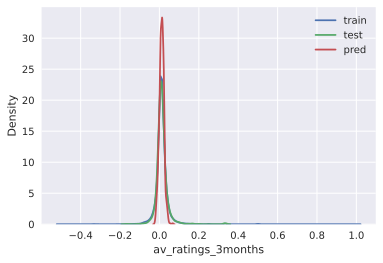

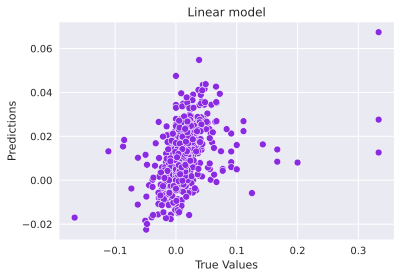

In [57]:
target_distr_linear(y_train, y_test, y_pred)   

In [58]:
calc_metrics(y_test, y_pred)

*** VAL **: 
MSE:   0.0009218307915026483
RMSE:  0.03036166648098632
R2:    0.14772205684460604
MAE:   0.015303117958258743
MedAE: 0.009027515512551945
------------------------------


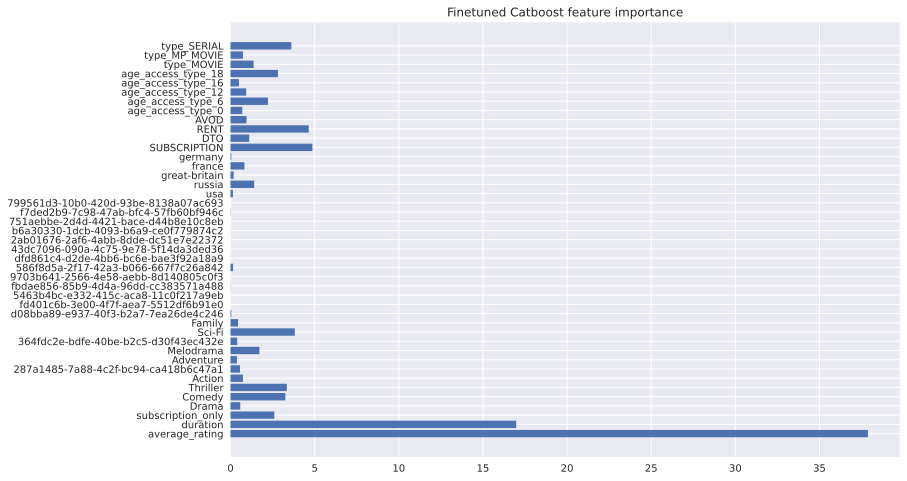

In [59]:
get_feature_imp(best_cat, train_dataset)

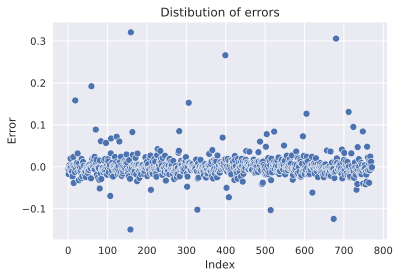

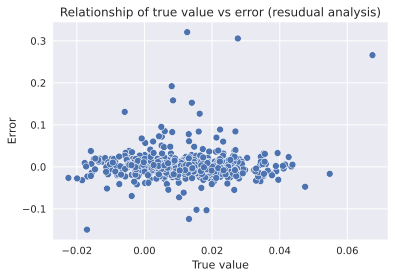

In [60]:
errors = y_test - y_pred
draw_res_analys(errors, y_pred)

# Other models

### knn imp

In [49]:
from sklearn.impute import KNNImputer

In [50]:
imputer = KNNImputer()

imputer.fit(X_train[['average_rating']])

KNNImputer()

In [51]:
train = imputer.transform(X_train[['average_rating']])
test = imputer.transform(X_test[['average_rating']])

In [52]:
X_train['average_rating'] = train

In [53]:
X_test['average_rating'] = test

# KNN Regressor

In [99]:
def target_distr_linear(train_label, test_label, predicted_dv): 
    sns.kdeplot(train_label, label='train')
    sns.kdeplot(test_label, label='test')
    sns.kdeplot(predicted_dv, label='pred')
    plt.legend()
    plt.show()

    sns.scatterplot(test_label, predicted_dv, color='blueviolet')
    plt.title('Linear model')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.show()

In [100]:
from scipy.stats import norm

def draw_histogram(data):
    f,ax_hist = plt.subplots(1)
    sns.distplot(data, hist=True,  kde=True, rug=True, bins=10, fit=norm, ax=ax_hist);
    plt.xlabel("values")
    plt.title("Distribution") 

    mean=data.mean()

    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean={mean:.3f}")
    ax_hist.legend()

    plt.show()

In [101]:
from sklearn.inspection import permutation_importance

def get_fi_knn(model,X_train, y_train, top15=None):
    plt.figure(figsize=(25,9))
    coef_table = pd.DataFrame(list(X_train.columns)).copy()
    results = permutation_importance(model, X_train, y_train, scoring='neg_mean_absolute_error', n_repeats=1)

    importance = results.importances_mean
    coef_table.insert(len(coef_table.columns),"Coefs",np.abs(importance).transpose())

    if top15 =='yes':
        coef_table = coef_table.sort_values(by='Coefs', ascending=False)[:15]


    sns.barplot(x=0, y='Coefs', data=coef_table)
    plt.title('Feature importance')
    plt.xlabel('features')
    plt.ylabel('abs_weight')
    plt.xticks(rotation=65)
    plt.show()

In [102]:
def draw_res_analys(errors, pred):
    sns.scatterplot(list(range(len(errors))),errors);
    plt.title("Distibution of errors")
    plt.ylabel('Error');
    plt.xlabel('Index');
    plt.show();

    sns.scatterplot(pred,errors);
    plt.title('Relationship of true value vs error (resudual analysis)')
    plt.ylabel('Error');
    plt.xlabel('True value');
    plt.show();

In [66]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [104]:
params = [
    {
        'n_neighbors': [i for i in range(2, 50, 2)],
        'weights': ['uniform', 'distance'],
        'leaf_size' : [2,5,10,30,50]
    }
]

In [117]:
knn_reg_model = KNeighborsRegressor()

cv = KFold(n_splits=5, shuffle=True, random_state=42)
gs = RandomizedSearchCV(knn_reg_model, params, 
                  n_jobs=-1, 
                  scoring=['neg_mean_absolute_error', 'r2'], 
                  refit='neg_mean_absolute_error', 
                  cv=cv)

In [119]:
%%time
gs.fit(X_train, y_train);

CPU times: user 214 ms, sys: 1.51 s, total: 1.72 s
Wall time: 1min


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=KNeighborsRegressor(), n_jobs=-1,
                   param_distributions=[{'leaf_size': [2, 5, 10, 30, 50],
                                         'n_neighbors': [2, 4, 6, 8, 10, 12, 14,
                                                         16, 18, 20, 22, 24, 26,
                                                         28, 30, 32, 34, 36, 38,
                                                         40, 42, 44, 46, 48],
                                         'weights': ['uniform', 'distance']}],
                   refit='neg_mean_absolute_error',
                   scoring=['neg_mean_absolute_error', 'r2'])

In [120]:
gs.best_params_

{'weights': 'uniform', 'n_neighbors': 48, 'leaf_size': 2}

In [121]:
knn_reg_model = KNeighborsRegressor(leaf_size=2, n_neighbors=48, weights='uniform')
knn_reg_model.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=2, n_neighbors=48)

In [122]:
pred = knn_reg_model.predict(X_test)

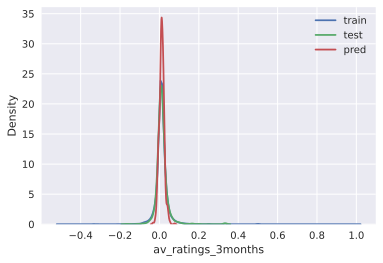

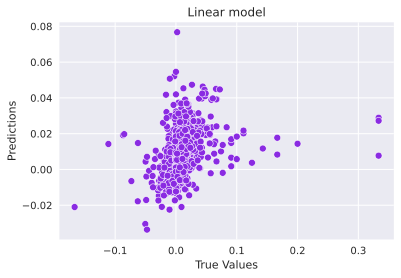

In [123]:
target_distr_linear(y_train, y_test, pred)   

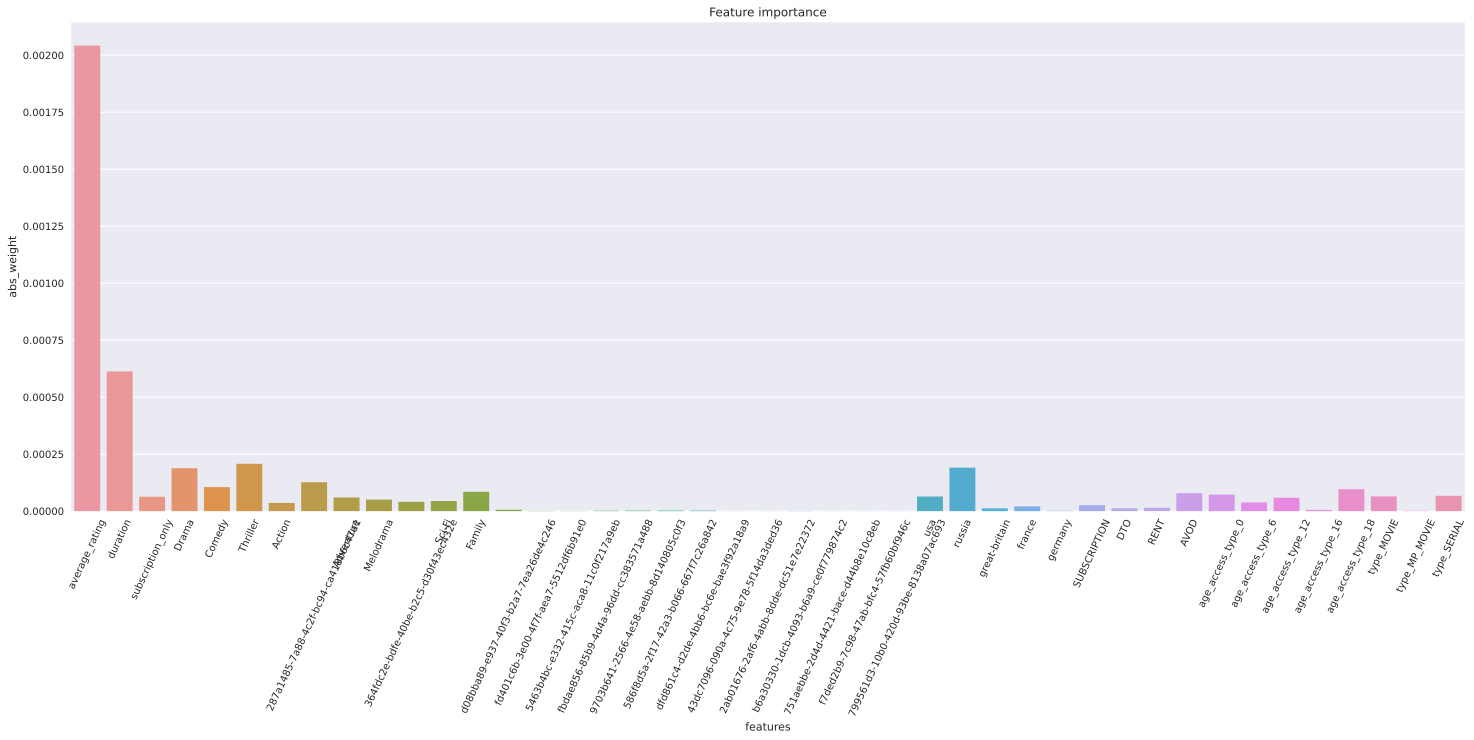

In [124]:
get_fi_knn(knn_reg_model, X_train, y_train)

**Detecting heteroscedasticity**

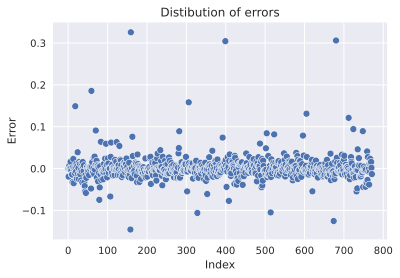

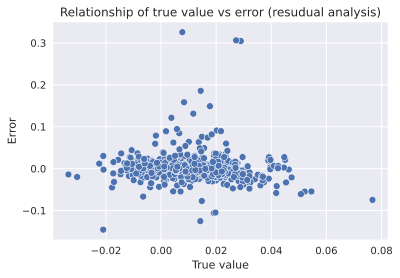

In [125]:
errors = y_test - pred
draw_res_analys(errors, pred)

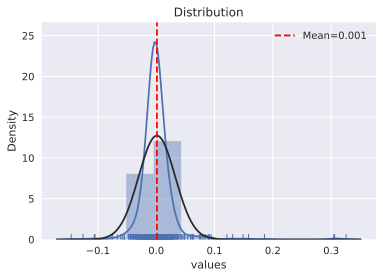

In [126]:
error = y_test - pred
draw_histogram(error)

In [127]:
calc_metrics(y_test, pred)

*** VAL **: 
MSE:   0.0009825993417867057
RMSE:  0.03134644065578588
R2:    0.09153854082187962
MAE:   0.01600137885488513
MedAE: 0.00941467907690283
------------------------------


## Boosting Regressor - XGBRegressor

In [79]:
def get_feature_importance(model, top15=None):
    plt.figure(figsize=(12,8))
    coef_table = pd.DataFrame(list(X_train.columns)).copy()
    coef_table.insert(len(coef_table.columns),"Coefs",np.abs(model.feature_importances_).transpose())

    if top15 =='yes':
        coef_table = coef_table.sort_values(by='Coefs', ascending=False)[:15]


    sns.barplot(x=0, y='Coefs', data=coef_table)
    plt.title('Feature importance')
    plt.xlabel('features')
    plt.ylabel('abs_weight')
    plt.xticks(rotation=90)
    plt.show()

In [62]:
!pip install xgboost

In [63]:
import xgboost as xgb

In [64]:
params = [
              {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500, 1000]}
        ]

In [67]:
xgbr_model = xgb.XGBRegressor() 

cv = KFold(n_splits=5, shuffle=True, random_state=42)
gs = RandomizedSearchCV(xgbr_model, params, 
#                   n_jobs=-1, 
                  scoring=['neg_mean_absolute_error', 'r2'], 
                  refit='neg_mean_absolute_error', 
                  cv=cv)

In [68]:
%%time
gs.fit(X_train, y_train)

CPU times: user 18min 2s, sys: 5.01 s, total: 18min 7s
Wall time: 4min 49s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_const...
                                          predictor=None, random_state=None,
                                          reg_alpha=None, reg_lambda=None, ...),
                   param_distributions=[{'colsample_bytree': [0.7],
                                         'learning_rate': [0.03, 0.05, 0.07],
                                         'max_depth': [5, 6, 7],
                                         'min_child_weight': [4],
                                         'n_estimators': [500, 1000],
                                         'nthread': [4],
                                         'objective': ['reg:squarederror'],
                                         'subsample': [0.7]}],
                   refit='neg_mean_absolute_error',
                   scoring=['neg_mean_absolute_error', 'r2'])

In [69]:
gs.best_params_

{'subsample': 0.7,
 'objective': 'reg:squarederror',
 'nthread': 4,
 'n_estimators': 500,
 'min_child_weight': 4,
 'max_depth': 6,
 'learning_rate': 0.03,
 'colsample_bytree': 0.7}

In [70]:
xgbr_model = xgb.XGBRegressor(colsample_bytree=0.7,
                              learning_rate=0.03,
                              max_depth=6,
                              min_child_weight=4,
                              n_estimators=500,
                              nthread=4,
                              objective ='reg:squarederror',
                              subsample=0.7) 
xgbr_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=4,
             nthread=4, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, ...)

In [71]:
pred = xgbr_model.predict(X_test)

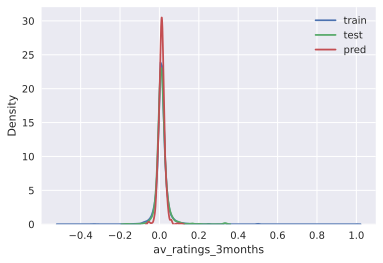

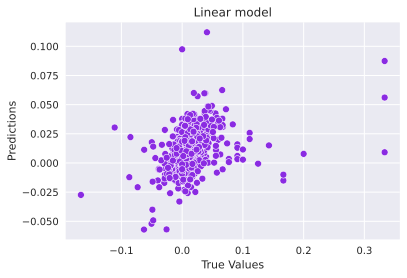

In [72]:
target_distr_linear(y_train, y_test, pred)   

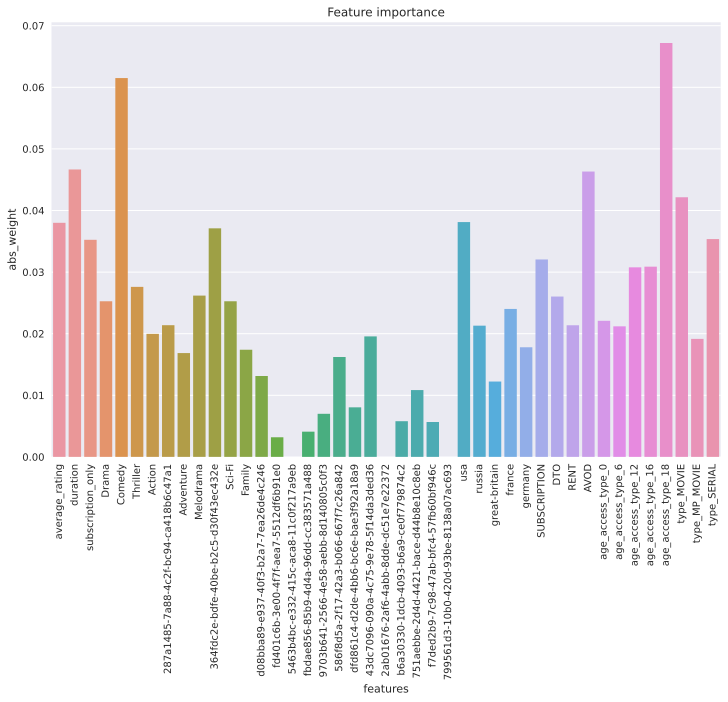

In [80]:
get_feature_importance(xgbr_model)

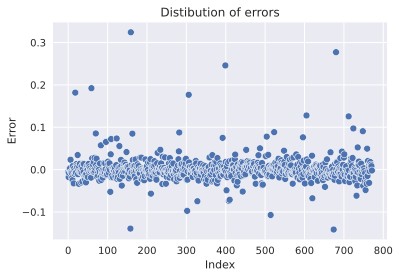

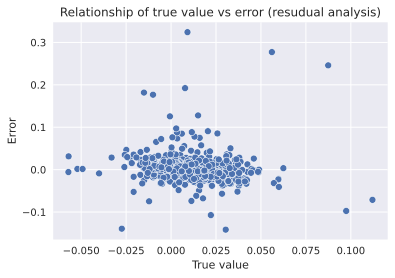

In [74]:
errors = y_test - pred
draw_res_analys(errors, pred) 

In [75]:
calc_metrics(y_test, pred)

*** VAL **: 
MSE:   0.0009493734645506103
RMSE:  0.030811904591417427
R2:    0.12225749984488343
MAE:   0.016132311409122926
MedAE: 0.009577549323280171
------------------------------


## Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
params = [
    {
        'max_depth': range(20, 50),
        'n_estimators': range(100, 161)

    }
]

In [58]:
rf_model = RandomForestRegressor(random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
gs = RandomizedSearchCV(rf_model, params, 
                  n_jobs=-1, 
                  scoring=['neg_mean_absolute_error', 'r2'], 
                  refit='neg_mean_absolute_error', 
                  cv=cv)

In [59]:
%%time
gs.fit(X_train, y_train);

CPU times: user 7.43 s, sys: 996 ms, total: 8.42 s
Wall time: 4min 21s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
                   param_distributions=[{'max_depth': range(20, 50),
                                         'n_estimators': range(100, 161)}],
                   refit='neg_mean_absolute_error',
                   scoring=['neg_mean_absolute_error', 'r2'])

In [60]:
gs.best_params_

{'n_estimators': 158, 'max_depth': 20}

In [62]:
rf_model = RandomForestRegressor(random_state=42, max_depth=20, n_estimators=158)
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=158, random_state=42)

In [63]:
pred = rf_model.predict(X_test)

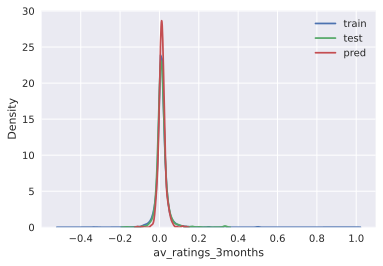

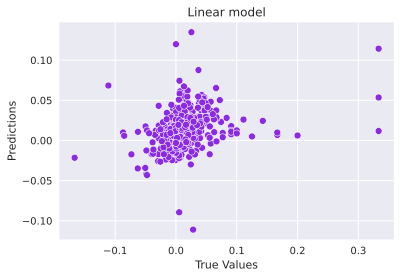

In [64]:
target_distr_linear(y_train, y_test, pred)   

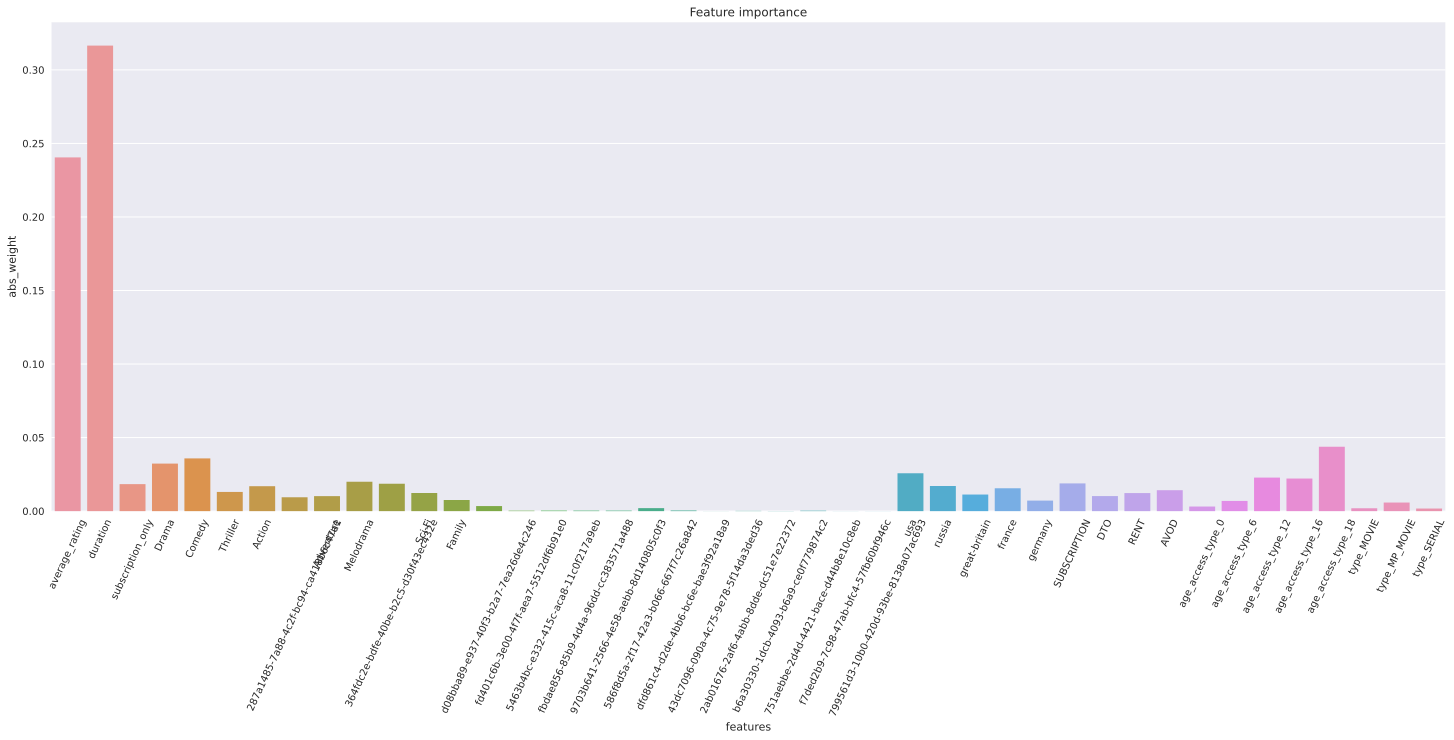

In [67]:
get_feature_importance(rf_model)

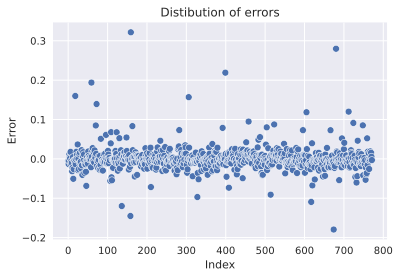

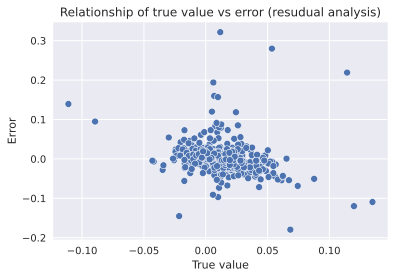

In [68]:
errors = y_test - pred

draw_res_analys(errors, pred) # 

In [69]:
calc_metrics(y_test, pred)

*** VAL **: 
MSE:   0.0010274475649188607
RMSE:  0.032053822937660036
R2:    0.050074150916937454
MAE:   0.017227748754344685
MedAE: 0.009651932018210373
------------------------------


## SVM Regressor

In [70]:
from sklearn.svm import LinearSVR

In [71]:
params = [
    {
        'C': [0.001,0.01,0.1,1,10,100,1000],
        'tol' : [1e-4, 1e-3]
    }
]

In [72]:
svr_model = LinearSVR(random_state=42)

cv = KFold(n_splits=5, shuffle=True, random_state=42)
gs = RandomizedSearchCV(svr_model, params, 
                  n_jobs=-1, 
                  scoring=['neg_mean_absolute_error', 'r2'], 
                  refit='neg_mean_absolute_error', 
                  cv=cv)

In [73]:
%%time
gs.fit(X_train, y_train);

CPU times: user 468 ms, sys: 1.25 s, total: 1.72 s
Wall time: 1min 5s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LinearSVR(random_state=42), n_jobs=-1,
                   param_distributions=[{'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                               1000],
                                         'tol': [0.0001, 0.001]}],
                   refit='neg_mean_absolute_error',
                   scoring=['neg_mean_absolute_error', 'r2'])

In [74]:
gs.best_params_

{'tol': 0.0001, 'C': 0.001}

In [75]:
svr_model =  LinearSVR(C=0.001, tol=0.0001, random_state=42)
svr_model.fit(X_train, y_train)

LinearSVR(C=0.001, random_state=42)

In [76]:
pred = svr_model.predict(X_test)

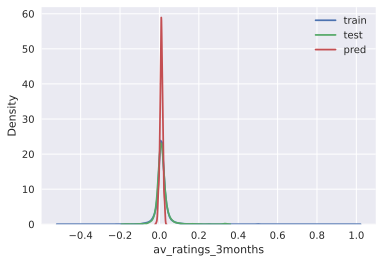

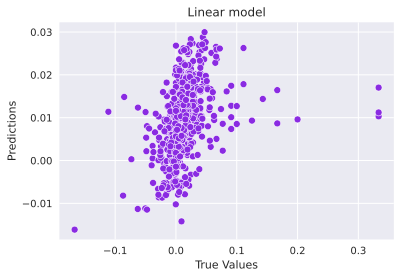

In [77]:
target_distr_linear(y_train, y_test, pred)  

In [78]:
def get_feat_imp_coef(model, top15=None):
    plt.figure(figsize=(25,9))
    coef_table = pd.DataFrame(list(X_train.columns)).copy()
    coef_table.insert(len(coef_table.columns),"Coefs",np.abs(model.coef_).transpose())

    if top15 =='yes':
        coef_table = coef_table.sort_values(by='Coefs', ascending=False)[:15]


    sns.barplot(x=0, y='Coefs', data=coef_table)
    plt.title('Feature importance')
    plt.xlabel('features')
    plt.ylabel('abs_weight')
    plt.xticks(rotation=65)
    plt.show()

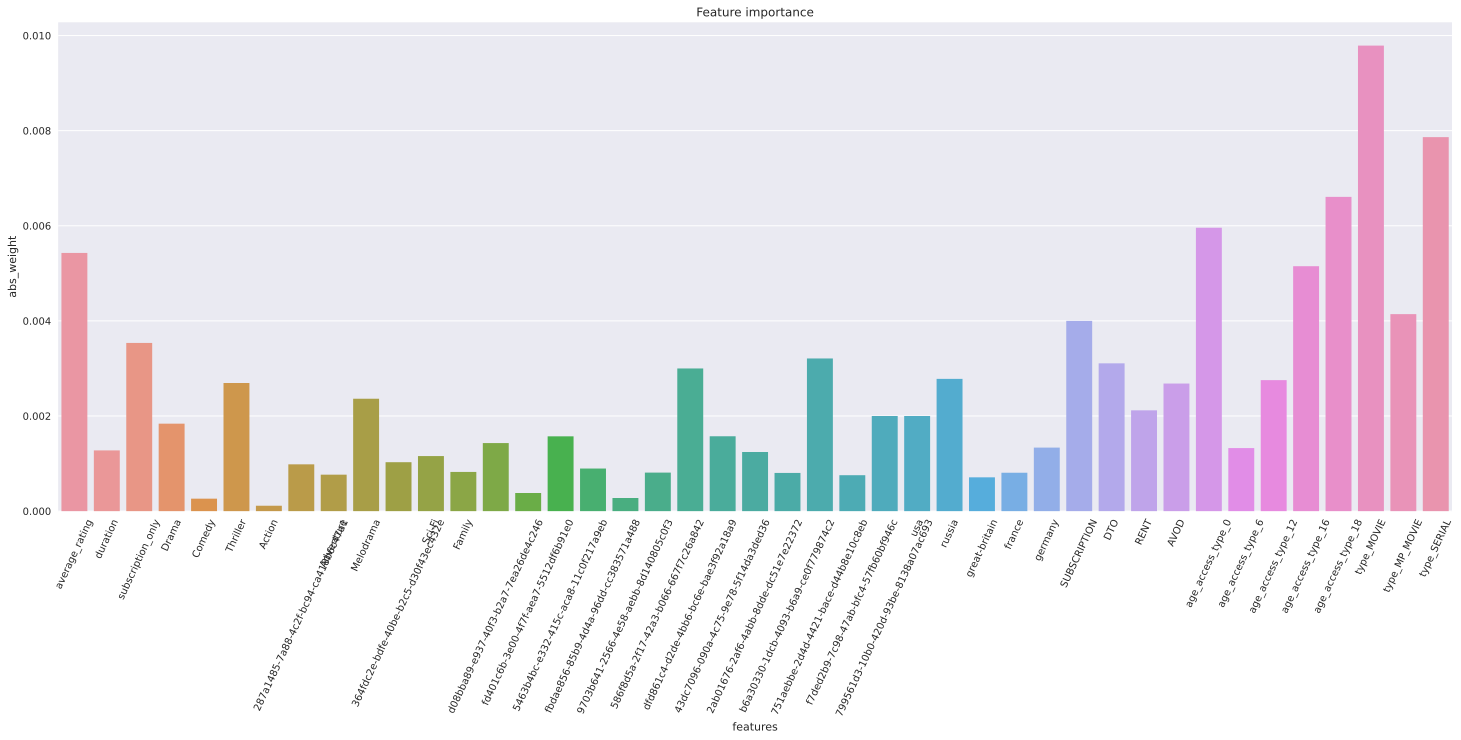

In [79]:
get_feat_imp_coef(svr_model)

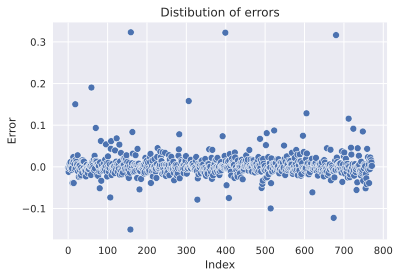

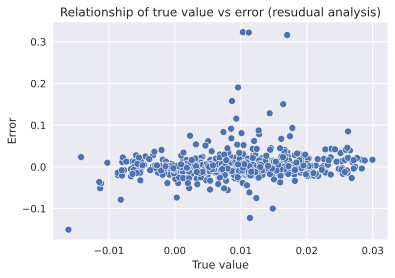

In [80]:
errors = y_test - pred
draw_res_analys(errors, pred)

In [81]:
calc_metrics(y_test, pred)

*** VAL **: 
MSE:   0.0009712271432144664
RMSE:  0.031164517374964534
R2:    0.10205269818963658
MAE:   0.015242461147090687
MedAE: 0.00811683502320917
------------------------------
